In [18]:
import pandas as pd
import numpy as np
import importlib
import gc
import sys
sys.path.append('./scripts')  
import model_lgb
import graficos
import feature_engineering
importlib.reload(model_lgb)
importlib.reload(feature_engineering)
importlib.reload(graficos)

<module 'graficos' from 'c:\\Users\\Usuario\\Documents\\Universidad\\austral\\2025\\Lab3\\Lab3-MCD\\notebooks\\entregable\\./scripts\\graficos.py'>

In [21]:
if ESTOY_EN_KAGGLE:
    df = pd.read_csv("./datasets/periodo_x_producto_con_target_transformado_con_feature_engineering_201912.csv", sep=',', encoding='utf-8')
else:
    df = pd.read_csv("./datasets/periodo_x_producto_con_target_transformado_con_feature_engineering.csv", sep=',', encoding='utf-8')
df

,product_id,periodo,nacimiento_producto,muerte_producto,mes_n,total_meses,producto_nuevo,ciclo_de_vida_inicial,sku_size,stock_final,...,tn_lag_12_season_adj_add,tn_lag_12_season_adj_mul,tn_lag_12_season_adj_add_norm,tn_lag_12_season_adj_mul_norm,dtw_cluster,dist_to_centroid,simil_to_top,corr_tn_dolar,corr_tn_ipc,corr_tn_dolar_x_prod
0,20001,201701,201701,201912,1,36,0,0,3000.0,0.0,...,0.0,0.0,0.0,0.0,41,3.489215,0.000000,NaN,NaN,0.343657
1,20001,201702,201701,201912,2,36,0,0,3000.0,0.0,...,0.0,0.0,0.0,0.0,41,3.489215,0.000000,NaN,NaN,0.343657
2,20001,201703,201701,201912,3,36,0,0,3000.0,0.0,...,0.0,0.0,0.0,0.0,41,3.489215,0.000000,NaN,NaN,0.343657
3,20001,201704,201701,201912,4,36,0,0,3000.0,0.0,...,0.0,0.0,0.0,0.0,41,3.489215,0.000000,NaN,NaN,0.343657
4,20001,201705,201701,201912,5,36,0,0,3000.0,0.0,...,0.0,0.0,0.0,0.0,41,3.489215,0.000000,NaN,NaN,0.343657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31357,21281,201704,201702,201708,3,7,1,1,0.0,0.0,...,0.0,0.0,0.0,0.0,37,2.317218,2258.537821,-0.125809,-0.067496,0.204382
31358,21281,201705,201702,201708,4,7,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,37,2.317218,2258.537821,-0.098866,-0.047311,0.204382
31359,21281,201706,201702,201708,5,7,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,37,2.317218,2258.537821,-0.377332,-0.420269,0.204382
31360,21281,201707,201702,201708,6,7,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,37,2.317218,2258.537821,-0.337101,-0.376122,0.204382


In [22]:
neural_prophet_fe = pd.read_csv("./datasets/features_neuralprophet_completo.csv", sep=',', encoding='utf-8')
neural_prophet_fe['ds'] = pd.to_datetime(neural_prophet_fe['ds'], errors='coerce')
# Versión alternativa más robusta:
neural_prophet_fe['periodo'] = neural_prophet_fe['ds'].apply(
    lambda x: x.year * 100 + x.month if pd.notnull(x) else None
)
neural_prophet_fe = neural_prophet_fe[['periodo', 'product_id', 'trend', "season_yearly", "season_monthly"]]
df = df.merge(neural_prophet_fe, on=['periodo', 'product_id'], how='left')

In [23]:
prophet_fe = pd.read_csv("./datasets/prophet_features_tn_zscore.csv", sep=',', encoding='utf-8')
prophet_fe['ds'] = pd.to_datetime(prophet_fe['ds'], errors='coerce')
prophet_fe['periodo'] = prophet_fe['ds'].apply(
    lambda x: x.year * 100 + x.month if pd.notnull(x) else None
)
prophet_fe = prophet_fe[['periodo', 'product_id', 'trend_add', "yearly_add", "additive_terms", 'trend_mult', 'yearly_mult', 'multiplicative_terms']]
df = df.merge(neural_prophet_fe, on=['periodo', 'product_id'], how='left')

In [ ]:
# # neural = pd.read_csv("../model_neural_prophet/features_neuralprophet.csv", sep=',', encoding='utf-8')
# neural = pd.read_csv("../model_neural_prophet/features_neuralprophet_completo.csv", sep=',', encoding='utf-8')

# neural['ds'] = pd.to_datetime(neural['ds'], errors='coerce')

# # Versión alternativa más robusta:
# neural['periodo'] = neural['ds'].apply(
#     lambda x: x.year * 100 + x.month if pd.notnull(x) else None
# )

# neural = neural[['periodo', 'product_id', 'trend', "season_yearly", "season_monthly"]]

# df = df.merge(neural, on=['periodo', 'product_id'], how='left')

In [75]:
# #
# # clusters = pd.read_csv("./datasets/clusters.csv", sep=',', encoding='utf-8')
# # df = df.merge(clusters, on='product_id', how='left')

# # 


# #
# df = feature_engineering.dwt_features_serie(df)

# #
# df = feature_engineering.chatGPT_features_serie(df, "tn_zscore")

# #
# df = feature_engineering.get_rolling_medians(df, "tn_zscore", 201912)
# df = feature_engineering.get_rolling_skewness(df, "tn_zscore", 201912)
# df = feature_engineering.get_autocorrelaciones(df, "tn_zscore", 201912)
# #
# # df = feature_engineering.get_lags(df, "stock_final_zscore", 201912)
# # df = feature_engineering.get_delta_lags(df, "stock_final_zscore", 201912)
# # df = feature_engineering.get_rolling_means(df, "stock_final_zscore", 201912)
# # df = feature_engineering.get_rolling_stds(df, "stock_final_zscore", 201912)
# # df = feature_engineering.get_rolling_mins(df, "stock_final_zscore", 201912)
# # df = feature_engineering.get_rolling_maxs(df, "stock_final_zscore", 201912)
# # df = feature_engineering.get_rolling_skewness(df, "stock_final_zscore", 201912)
# # df = feature_engineering.get_autocorrelaciones(df, "stock_final_zscore", 201912)
# #
# df = feature_engineering.get_mes_receso_escolar(df)
# df = feature_engineering.mes_con_feriado(df)


# #  stock final
# df = feature_engineering.get_lagsEspecificos(df, col='stock_final_zscore')
# df = feature_engineering.get_delta_lags_especificos(df, col='stock_final_zscore')
# df = feature_engineering.get_rolling_means_especificos(df, col='stock_final_zscore')
# df = feature_engineering.get_rolling_stds_especificos(df, col='stock_final_zscore')
# df = feature_engineering.get_rolling_medians_especificos(df, col='stock_final_zscore')
# df = feature_engineering.get_rolling_mins_especificos(df, col='stock_final_zscore')
# df = feature_engineering.get_rolling_maxs_especificos(df, col='stock_final_zscore')
# df = feature_engineering.get_rolling_skewness_especificos(df, col='stock_final_zscore')

# #  cust_request_qty
# df = feature_engineering.get_lagsEspecificos(df, col='cust_request_qty_zscore')
# df = feature_engineering.get_delta_lags_especificos(df, col='cust_request_qty_zscore')
# df = feature_engineering.get_rolling_means_especificos(df, col='cust_request_qty_zscore')
# df = feature_engineering.get_rolling_stds_especificos(df, col='cust_request_qty_zscore')
# df = feature_engineering.get_rolling_medians_especificos(df, col='cust_request_qty_zscore')
# df = feature_engineering.get_rolling_mins_especificos(df, col='cust_request_qty_zscore')
# df = feature_engineering.get_rolling_maxs_especificos(df, col='cust_request_qty_zscore')
# df = feature_engineering.get_rolling_skewness_especificos(df, col='cust_request_qty_zscore')


# df




In [74]:
# df['ipc'] = df['ipc'].str.replace(',', '.').astype(float)
# df['dolar'] = df['dolar'].str.replace(',', '.').astype(float)
# df.drop(columns=['ds'], inplace=True)
# df.fillna(0, inplace=True) ##### EXPERIMENTAR
# df = feature_engineering.correlacion_exogenas(df)

In [24]:
##### SPLIT DATASET #####
if ESTOY_EN_KAGGLE:
    train = df[df['periodo'] <= 201912]
    test = df[df['periodo'] == 201912]
else:    
    train = df[df['periodo'] <= 201910]
    test = df[df['periodo'] == 201910]

print("El dataset de train tiene {} filas y {} columnas".format(train.shape[0], train.shape[1]))
print("El dataset de train tiene {} filas y {} columnas".format(test.shape[0], test.shape[1]))

El dataset de train tiene 31362 filas y 590 columnas
El dataset de train tiene 886 filas y 590 columnas


##### Train 1

- Sin semillero en optuna
- Con semillero en prediccion
- 50 iteraciones.

In [ ]:
##### Entrenamiento 1
model_lgb.optimizar_con_optuna(train, version='v1')

[I 2025-06-15 16:10:37,355] A new study created in memory with name: no-name-6f5a758a-2575-43de-a555-f41fd74fcee7


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.5508, Parámetros={'num_leaves': 17, 'learning_rate': 0.28403203141749855, 'feature_fraction': 0.7742723610239932, 'bagging_fraction': 0.9448298617751271, 'bagging_freq': 6, 'lambda_l1': 0.0022061237642984803, 'lambda_l2': 2.4962532657096865e-06, 'min_child_samples': 50, 'max_depth': 3, 'max_bin': 483, 'min_data_in_leaf': 82, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.5068, Parámetros={'num_leaves': 145, 'learning_rate': 0.032193392653351506, 'feature_fraction': 0.9672272599035762, 'bagging_fraction': 0.7822812362188019, 'bagging_freq': 10, 'lambda_l1': 0.00020650983181624136, 'lambda_l2': 0.00011947871647886059, 'min_child_samples': 15, 'max_depth': 6, 'max_bin': 464, 'min_data_in_leaf': 88, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.5068, Parámetros={'num_leaves': 145, 'learning_rate': 0.032193392653351506, 'feature_fraction': 0.9672272599035762, 'bagging_fraction': 0.7822812362188019, 'bagging_freq': 10, 'lambda_l1': 0.00020650983181624136, 'lambda_l2': 0.00011947871647886059, 'min_child_samples': 15, 'max_depth': 6, 'max_bin': 464, 'min_data_in_leaf': 88, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.5068, Parámetros={'num_leaves': 145, 'learning_rate': 0.032193392653351506, 'feature_fraction': 0.9672272599035762, 'bagging_fraction': 0.7822812362188019, 'bagging_freq': 10, 'lambda_l1': 0.00020650983181624136, 'lambda_l2': 0.00011947871647886059, 'min_child_samples': 15, 'max_depth': 6, 'max_bin': 464, 'min_data_in_leaf': 88, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.5068, Parámetros={'num_leaves': 145, 'learning_rate': 0.032193392653351506, 'feature_fraction': 0.9672272599035762, 'bagging_fraction': 0.7822812362188019, 'bagging_freq': 10, 'lambda_l1': 0.00020650983181624136, 'lambda_l2': 0.00011947871647886059, 'min_child_samples': 15, 'max_depth': 6, 'max_bin': 464, 'min_data_in_leaf': 88, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.5068, Parámetros={'num_leaves': 145, 'learning_rate': 0.032193392653351506, 'feature_fraction': 0.9672272599035762, 'bagging_fraction': 0.7822812362188019, 'bagging_freq': 10, 'lambda_l1': 0.00020650983181624136, 'lambda_l2': 0.00011947871647886059, 'min_child_samples': 15, 'max_depth': 6, 'max_bin': 464, 'min_data_in_leaf': 88, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4860, Parámetros={'num_leaves': 18, 'learning_rate': 0.20384997808516375, 'feature_fraction': 0.6433712090472726, 'bagging_fraction': 0.9126533285129359, 'bagging_freq': 6, 'lambda_l1': 1.2712528474305713, 'lambda_l2': 0.0002728064114386467, 'min_child_samples': 4, 'max_depth': 6, 'max_bin': 272, 'min_data_in_leaf': 4, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4860, Parámetros={'num_leaves': 18, 'learning_rate': 0.20384997808516375, 'feature_fraction': 0.6433712090472726, 'bagging_fraction': 0.9126533285129359, 'bagging_freq': 6, 'lambda_l1': 1.2712528474305713, 'lambda_l2': 0.0002728064114386467, 'min_child_samples': 4, 'max_depth': 6, 'max_bin': 272, 'min_data_in_leaf': 4, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4860, Parámetros={'num_leaves': 18, 'learning_rate': 0.20384997808516375, 'feature_fraction': 0.6433712090472726, 'bagging_fraction': 0.9126533285129359, 'bagging_freq': 6, 'lambda_l1': 1.2712528474305713, 'lambda_l2': 0.0002728064114386467, 'min_child_samples': 4, 'max_depth': 6, 'max_bin': 272, 'min_data_in_leaf': 4, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4860, Parámetros={'num_leaves': 18, 'learning_rate': 0.20384997808516375, 'feature_fraction': 0.6433712090472726, 'bagging_fraction': 0.9126533285129359, 'bagging_freq': 6, 'lambda_l1': 1.2712528474305713, 'lambda_l2': 0.0002728064114386467, 'min_child_samples': 4, 'max_depth': 6, 'max_bin': 272, 'min_data_in_leaf': 4, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4860, Parámetros={'num_leaves': 18, 'learning_rate': 0.20384997808516375, 'feature_fraction': 0.6433712090472726, 'bagging_fraction': 0.9126533285129359, 'bagging_freq': 6, 'lambda_l1': 1.2712528474305713, 'lambda_l2': 0.0002728064114386467, 'min_child_samples': 4, 'max_depth': 6, 'max_bin': 272, 'min_data_in_leaf': 4, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4860, Parámetros={'num_leaves': 18, 'learning_rate': 0.20384997808516375, 'feature_fraction': 0.6433712090472726, 'bagging_fraction': 0.9126533285129359, 'bagging_freq': 6, 'lambda_l1': 1.2712528474305713, 'lambda_l2': 0.0002728064114386467, 'min_child_samples': 4, 'max_depth': 6, 'max_bin': 272, 'min_data_in_leaf': 4, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4860, Parámetros={'num_leaves': 18, 'learning_rate': 0.20384997808516375, 'feature_fraction': 0.6433712090472726, 'bagging_fraction': 0.9126533285129359, 'bagging_freq': 6, 'lambda_l1': 1.2712528474305713, 'lambda_l2': 0.0002728064114386467, 'min_child_samples': 4, 'max_depth': 6, 'max_bin': 272, 'min_data_in_leaf': 4, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4860, Parámetros={'num_leaves': 18, 'learning_rate': 0.20384997808516375, 'feature_fraction': 0.6433712090472726, 'bagging_fraction': 0.9126533285129359, 'bagging_freq': 6, 'lambda_l1': 1.2712528474305713, 'lambda_l2': 0.0002728064114386467, 'min_child_samples': 4, 'max_depth': 6, 'max_bin': 272, 'min_data_in_leaf': 4, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4860, Parámetros={'num_leaves': 18, 'learning_rate': 0.20384997808516375, 'feature_fraction': 0.6433712090472726, 'bagging_fraction': 0.9126533285129359, 'bagging_freq': 6, 'lambda_l1': 1.2712528474305713, 'lambda_l2': 0.0002728064114386467, 'min_child_samples': 4, 'max_depth': 6, 'max_bin': 272, 'min_data_in_leaf': 4, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4860, Parámetros={'num_leaves': 18, 'learning_rate': 0.20384997808516375, 'feature_fraction': 0.6433712090472726, 'bagging_fraction': 0.9126533285129359, 'bagging_freq': 6, 'lambda_l1': 1.2712528474305713, 'lambda_l2': 0.0002728064114386467, 'min_child_samples': 4, 'max_depth': 6, 'max_bin': 272, 'min_data_in_leaf': 4, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4860, Parámetros={'num_leaves': 18, 'learning_rate': 0.20384997808516375, 'feature_fraction': 0.6433712090472726, 'bagging_fraction': 0.9126533285129359, 'bagging_freq': 6, 'lambda_l1': 1.2712528474305713, 'lambda_l2': 0.0002728064114386467, 'min_child_samples': 4, 'max_depth': 6, 'max_bin': 272, 'min_data_in_leaf': 4, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4860, Parámetros={'num_leaves': 18, 'learning_rate': 0.20384997808516375, 'feature_fraction': 0.6433712090472726, 'bagging_fraction': 0.9126533285129359, 'bagging_freq': 6, 'lambda_l1': 1.2712528474305713, 'lambda_l2': 0.0002728064114386467, 'min_child_samples': 4, 'max_depth': 6, 'max_bin': 272, 'min_data_in_leaf': 4, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4779, Parámetros={'num_leaves': 116, 'learning_rate': 0.07029532412495142, 'feature_fraction': 0.6713634572239958, 'bagging_fraction': 0.7344874308141575, 'bagging_freq': 6, 'lambda_l1': 9.144562211892725e-06, 'lambda_l2': 1.7330885204617232e-06, 'min_child_samples': 23, 'max_depth': 12, 'max_bin': 169, 'min_data_in_leaf': 31, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4779, Parámetros={'num_leaves': 116, 'learning_rate': 0.07029532412495142, 'feature_fraction': 0.6713634572239958, 'bagging_fraction': 0.7344874308141575, 'bagging_freq': 6, 'lambda_l1': 9.144562211892725e-06, 'lambda_l2': 1.7330885204617232e-06, 'min_child_samples': 23, 'max_depth': 12, 'max_bin': 169, 'min_data_in_leaf': 31, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4779, Parámetros={'num_leaves': 116, 'learning_rate': 0.07029532412495142, 'feature_fraction': 0.6713634572239958, 'bagging_fraction': 0.7344874308141575, 'bagging_freq': 6, 'lambda_l1': 9.144562211892725e-06, 'lambda_l2': 1.7330885204617232e-06, 'min_child_samples': 23, 'max_depth': 12, 'max_bin': 169, 'min_data_in_leaf': 31, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4779, Parámetros={'num_leaves': 116, 'learning_rate': 0.07029532412495142, 'feature_fraction': 0.6713634572239958, 'bagging_fraction': 0.7344874308141575, 'bagging_freq': 6, 'lambda_l1': 9.144562211892725e-06, 'lambda_l2': 1.7330885204617232e-06, 'min_child_samples': 23, 'max_depth': 12, 'max_bin': 169, 'min_data_in_leaf': 31, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4779, Parámetros={'num_leaves': 116, 'learning_rate': 0.07029532412495142, 'feature_fraction': 0.6713634572239958, 'bagging_fraction': 0.7344874308141575, 'bagging_freq': 6, 'lambda_l1': 9.144562211892725e-06, 'lambda_l2': 1.7330885204617232e-06, 'min_child_samples': 23, 'max_depth': 12, 'max_bin': 169, 'min_data_in_leaf': 31, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4779, Parámetros={'num_leaves': 116, 'learning_rate': 0.07029532412495142, 'feature_fraction': 0.6713634572239958, 'bagging_fraction': 0.7344874308141575, 'bagging_freq': 6, 'lambda_l1': 9.144562211892725e-06, 'lambda_l2': 1.7330885204617232e-06, 'min_child_samples': 23, 'max_depth': 12, 'max_bin': 169, 'min_data_in_leaf': 31, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4779, Parámetros={'num_leaves': 116, 'learning_rate': 0.07029532412495142, 'feature_fraction': 0.6713634572239958, 'bagging_fraction': 0.7344874308141575, 'bagging_freq': 6, 'lambda_l1': 9.144562211892725e-06, 'lambda_l2': 1.7330885204617232e-06, 'min_child_samples': 23, 'max_depth': 12, 'max_bin': 169, 'min_data_in_leaf': 31, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4779, Parámetros={'num_leaves': 116, 'learning_rate': 0.07029532412495142, 'feature_fraction': 0.6713634572239958, 'bagging_fraction': 0.7344874308141575, 'bagging_freq': 6, 'lambda_l1': 9.144562211892725e-06, 'lambda_l2': 1.7330885204617232e-06, 'min_child_samples': 23, 'max_depth': 12, 'max_bin': 169, 'min_data_in_leaf': 31, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4779, Parámetros={'num_leaves': 116, 'learning_rate': 0.07029532412495142, 'feature_fraction': 0.6713634572239958, 'bagging_fraction': 0.7344874308141575, 'bagging_freq': 6, 'lambda_l1': 9.144562211892725e-06, 'lambda_l2': 1.7330885204617232e-06, 'min_child_samples': 23, 'max_depth': 12, 'max_bin': 169, 'min_data_in_leaf': 31, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4779, Parámetros={'num_leaves': 116, 'learning_rate': 0.07029532412495142, 'feature_fraction': 0.6713634572239958, 'bagging_fraction': 0.7344874308141575, 'bagging_freq': 6, 'lambda_l1': 9.144562211892725e-06, 'lambda_l2': 1.7330885204617232e-06, 'min_child_samples': 23, 'max_depth': 12, 'max_bin': 169, 'min_data_in_leaf': 31, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4779, Parámetros={'num_leaves': 116, 'learning_rate': 0.07029532412495142, 'feature_fraction': 0.6713634572239958, 'bagging_fraction': 0.7344874308141575, 'bagging_freq': 6, 'lambda_l1': 9.144562211892725e-06, 'lambda_l2': 1.7330885204617232e-06, 'min_child_samples': 23, 'max_depth': 12, 'max_bin': 169, 'min_data_in_leaf': 31, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4779, Parámetros={'num_leaves': 116, 'learning_rate': 0.07029532412495142, 'feature_fraction': 0.6713634572239958, 'bagging_fraction': 0.7344874308141575, 'bagging_freq': 6, 'lambda_l1': 9.144562211892725e-06, 'lambda_l2': 1.7330885204617232e-06, 'min_child_samples': 23, 'max_depth': 12, 'max_bin': 169, 'min_data_in_leaf': 31, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4779, Parámetros={'num_leaves': 116, 'learning_rate': 0.07029532412495142, 'feature_fraction': 0.6713634572239958, 'bagging_fraction': 0.7344874308141575, 'bagging_freq': 6, 'lambda_l1': 9.144562211892725e-06, 'lambda_l2': 1.7330885204617232e-06, 'min_child_samples': 23, 'max_depth': 12, 'max_bin': 169, 'min_data_in_leaf': 31, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4692, Parámetros={'num_leaves': 101, 'learning_rate': 0.043600962798741955, 'feature_fraction': 0.7048375632739321, 'bagging_fraction': 0.867481325961025, 'bagging_freq': 7, 'lambda_l1': 5.435785174956182e-06, 'lambda_l2': 0.0020365173853980553, 'min_child_samples': 8, 'max_depth': 8, 'max_bin': 461, 'min_data_in_leaf': 9, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4692, Parámetros={'num_leaves': 101, 'learning_rate': 0.043600962798741955, 'feature_fraction': 0.7048375632739321, 'bagging_fraction': 0.867481325961025, 'bagging_freq': 7, 'lambda_l1': 5.435785174956182e-06, 'lambda_l2': 0.0020365173853980553, 'min_child_samples': 8, 'max_depth': 8, 'max_bin': 461, 'min_data_in_leaf': 9, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4692, Parámetros={'num_leaves': 101, 'learning_rate': 0.043600962798741955, 'feature_fraction': 0.7048375632739321, 'bagging_fraction': 0.867481325961025, 'bagging_freq': 7, 'lambda_l1': 5.435785174956182e-06, 'lambda_l2': 0.0020365173853980553, 'min_child_samples': 8, 'max_depth': 8, 'max_bin': 461, 'min_data_in_leaf': 9, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4692, Parámetros={'num_leaves': 101, 'learning_rate': 0.043600962798741955, 'feature_fraction': 0.7048375632739321, 'bagging_fraction': 0.867481325961025, 'bagging_freq': 7, 'lambda_l1': 5.435785174956182e-06, 'lambda_l2': 0.0020365173853980553, 'min_child_samples': 8, 'max_depth': 8, 'max_bin': 461, 'min_data_in_leaf': 9, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4692, Parámetros={'num_leaves': 101, 'learning_rate': 0.043600962798741955, 'feature_fraction': 0.7048375632739321, 'bagging_fraction': 0.867481325961025, 'bagging_freq': 7, 'lambda_l1': 5.435785174956182e-06, 'lambda_l2': 0.0020365173853980553, 'min_child_samples': 8, 'max_depth': 8, 'max_bin': 461, 'min_data_in_leaf': 9, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4692, Parámetros={'num_leaves': 101, 'learning_rate': 0.043600962798741955, 'feature_fraction': 0.7048375632739321, 'bagging_fraction': 0.867481325961025, 'bagging_freq': 7, 'lambda_l1': 5.435785174956182e-06, 'lambda_l2': 0.0020365173853980553, 'min_child_samples': 8, 'max_depth': 8, 'max_bin': 461, 'min_data_in_leaf': 9, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4692, Parámetros={'num_leaves': 101, 'learning_rate': 0.043600962798741955, 'feature_fraction': 0.7048375632739321, 'bagging_fraction': 0.867481325961025, 'bagging_freq': 7, 'lambda_l1': 5.435785174956182e-06, 'lambda_l2': 0.0020365173853980553, 'min_child_samples': 8, 'max_depth': 8, 'max_bin': 461, 'min_data_in_leaf': 9, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4692, Parámetros={'num_leaves': 101, 'learning_rate': 0.043600962798741955, 'feature_fraction': 0.7048375632739321, 'bagging_fraction': 0.867481325961025, 'bagging_freq': 7, 'lambda_l1': 5.435785174956182e-06, 'lambda_l2': 0.0020365173853980553, 'min_child_samples': 8, 'max_depth': 8, 'max_bin': 461, 'min_data_in_leaf': 9, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4692, Parámetros={'num_leaves': 101, 'learning_rate': 0.043600962798741955, 'feature_fraction': 0.7048375632739321, 'bagging_fraction': 0.867481325961025, 'bagging_freq': 7, 'lambda_l1': 5.435785174956182e-06, 'lambda_l2': 0.0020365173853980553, 'min_child_samples': 8, 'max_depth': 8, 'max_bin': 461, 'min_data_in_leaf': 9, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4692, Parámetros={'num_leaves': 101, 'learning_rate': 0.043600962798741955, 'feature_fraction': 0.7048375632739321, 'bagging_fraction': 0.867481325961025, 'bagging_freq': 7, 'lambda_l1': 5.435785174956182e-06, 'lambda_l2': 0.0020365173853980553, 'min_child_samples': 8, 'max_depth': 8, 'max_bin': 461, 'min_data_in_leaf': 9, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4692, Parámetros={'num_leaves': 101, 'learning_rate': 0.043600962798741955, 'feature_fraction': 0.7048375632739321, 'bagging_fraction': 0.867481325961025, 'bagging_freq': 7, 'lambda_l1': 5.435785174956182e-06, 'lambda_l2': 0.0020365173853980553, 'min_child_samples': 8, 'max_depth': 8, 'max_bin': 461, 'min_data_in_leaf': 9, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4692, Parámetros={'num_leaves': 101, 'learning_rate': 0.043600962798741955, 'feature_fraction': 0.7048375632739321, 'bagging_fraction': 0.867481325961025, 'bagging_freq': 7, 'lambda_l1': 5.435785174956182e-06, 'lambda_l2': 0.0020365173853980553, 'min_child_samples': 8, 'max_depth': 8, 'max_bin': 461, 'min_data_in_leaf': 9, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4692, Parámetros={'num_leaves': 101, 'learning_rate': 0.043600962798741955, 'feature_fraction': 0.7048375632739321, 'bagging_fraction': 0.867481325961025, 'bagging_freq': 7, 'lambda_l1': 5.435785174956182e-06, 'lambda_l2': 0.0020365173853980553, 'min_child_samples': 8, 'max_depth': 8, 'max_bin': 461, 'min_data_in_leaf': 9, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4692, Parámetros={'num_leaves': 101, 'learning_rate': 0.043600962798741955, 'feature_fraction': 0.7048375632739321, 'bagging_fraction': 0.867481325961025, 'bagging_freq': 7, 'lambda_l1': 5.435785174956182e-06, 'lambda_l2': 0.0020365173853980553, 'min_child_samples': 8, 'max_depth': 8, 'max_bin': 461, 'min_data_in_leaf': 9, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4692, Parámetros={'num_leaves': 101, 'learning_rate': 0.043600962798741955, 'feature_fraction': 0.7048375632739321, 'bagging_fraction': 0.867481325961025, 'bagging_freq': 7, 'lambda_l1': 5.435785174956182e-06, 'lambda_l2': 0.0020365173853980553, 'min_child_samples': 8, 'max_depth': 8, 'max_bin': 461, 'min_data_in_leaf': 9, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4678, Parámetros={'num_leaves': 189, 'learning_rate': 0.0936859962234406, 'feature_fraction': 0.6224613816518707, 'bagging_fraction': 0.6827030485019208, 'bagging_freq': 4, 'lambda_l1': 1.9201519607202656e-06, 'lambda_l2': 1.6713651902359126e-06, 'min_child_samples': 35, 'max_depth': 4, 'max_bin': 122, 'min_data_in_leaf': 26, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4678, Parámetros={'num_leaves': 189, 'learning_rate': 0.0936859962234406, 'feature_fraction': 0.6224613816518707, 'bagging_fraction': 0.6827030485019208, 'bagging_freq': 4, 'lambda_l1': 1.9201519607202656e-06, 'lambda_l2': 1.6713651902359126e-06, 'min_child_samples': 35, 'max_depth': 4, 'max_bin': 122, 'min_data_in_leaf': 26, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4678, Parámetros={'num_leaves': 189, 'learning_rate': 0.0936859962234406, 'feature_fraction': 0.6224613816518707, 'bagging_fraction': 0.6827030485019208, 'bagging_freq': 4, 'lambda_l1': 1.9201519607202656e-06, 'lambda_l2': 1.6713651902359126e-06, 'min_child_samples': 35, 'max_depth': 4, 'max_bin': 122, 'min_data_in_leaf': 26, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4665, Parámetros={'num_leaves': 90, 'learning_rate': 0.052415526472638384, 'feature_fraction': 0.707257177865517, 'bagging_fraction': 0.6421156497304483, 'bagging_freq': 2, 'lambda_l1': 8.281915265472356e-08, 'lambda_l2': 4.942674574835118e-08, 'min_child_samples': 30, 'max_depth': 3, 'max_bin': 217, 'min_data_in_leaf': 17, 'extra_trees': False}
Mejores hiperparámetros: {'num_leaves': 90, 'learning_rate': 0.052415526472638384, 'feature_fraction': 0.707257177865517, 'bagging_fraction': 0.6421156497304483, 'bagging_freq': 2, 'lambda_l1': 8.281915265472356e-08, 'lambda_l2': 4.942674574835118e-08, 'min_child_samples': 30, 'max_depth': 3, 'max_bin': 217, 'min_data_in_leaf': 17, 'extra_trees': False}


In [50]:
test['target']

33       0.281125
69       0.177542
105      0.015896
141     -0.189256
177     -0.269215
           ...   
31269   -0.436252
31279   -0.941507
31295    0.000000
31323   -1.070528
31352   -0.821303
Name: target, Length: 916, dtype: float64

In [65]:
df_pred_201912 = model_lgb.semillerio_en_prediccion(train, test)

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\callback.py:341: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\callback.py:341: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\callback.py:341: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\callback.py:341: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\sit

In [53]:
df_pred_201912

,periodo,product_id,target,pred
33,201910,20001,0.281125,-0.261016
69,201910,20002,0.177542,0.202874
105,201910,20003,0.015896,-0.257282
141,201910,20004,-0.189256,-0.903300
177,201910,20005,-0.269215,-0.984110
...,...,...,...,...
31269,201910,21266,-0.436252,-0.189571
31279,201910,21267,-0.941507,0.539105
31295,201910,21269,0.000000,0.604015
31323,201910,21271,-1.070528,-0.476353


In [61]:
df_pred_201912_real = model_lgb.desnormalizar(df_pred_201912)
df_pred_201912_real

,periodo,product_id,target,pred
0,201910,20001,1504.68856,1355.565121
1,201910,20002,1087.30855,1094.603730
2,201910,20003,892.50129,811.021639
3,201910,20004,637.90002,474.929008
4,201910,20005,593.24443,434.301657
...,...,...,...,...
775,201910,21263,0.01270,0.026795
776,201910,21265,0.05007,0.130173
777,201910,21266,0.05121,0.063978
778,201910,21267,0.01569,0.119962


In [63]:
total_error_rate = model_lgb.total_forecast_error(df_pred_201912_real)
total_error_rate

0.2942483411744829

##### Train 2

- Con semillero en optuna
- Con semillero en prediccion
- 50 iteraciones.

In [68]:
##### Entrenamiento 2
model_lgb.optimizar_con_optuna_con_semillerio(train, version='v2')

[I 2025-06-15 17:52:17,242] A new study created in memory with name: no-name-00392a3a-e446-4cd0-a77f-980007417308
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c

Mejor trial hasta ahora: RMSE=0.5205, Parámetros={'num_leaves': 162, 'learning_rate': 0.24388859999074375, 'feature_fraction': 0.9587082227780889, 'bagging_fraction': 0.719600041389775, 'bagging_freq': 6, 'lambda_l1': 0.00015707930606181185, 'lambda_l2': 2.3859627351050668e-08, 'min_child_samples': 37, 'max_depth': 3, 'max_bin': 422, 'min_data_in_leaf': 67, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.5205, Parámetros={'num_leaves': 162, 'learning_rate': 0.24388859999074375, 'feature_fraction': 0.9587082227780889, 'bagging_fraction': 0.719600041389775, 'bagging_freq': 6, 'lambda_l1': 0.00015707930606181185, 'lambda_l2': 2.3859627351050668e-08, 'min_child_samples': 37, 'max_depth': 3, 'max_bin': 422, 'min_data_in_leaf': 67, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.5174, Parámetros={'num_leaves': 88, 'learning_rate': 0.018148619527435298, 'feature_fraction': 0.7331772726784991, 'bagging_fraction': 0.5890575925345549, 'bagging_freq': 6, 'lambda_l1': 0.08782502528346073, 'lambda_l2': 7.703317587144348e-08, 'min_child_samples': 5, 'max_depth': 7, 'max_bin': 493, 'min_data_in_leaf': 77, 'extra_trees': True}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.5049, Parámetros={'num_leaves': 43, 'learning_rate': 0.028535675679557816, 'feature_fraction': 0.9139297413934301, 'bagging_fraction': 0.5236275740211975, 'bagging_freq': 10, 'lambda_l1': 0.004996771063701402, 'lambda_l2': 0.7196921694355832, 'min_child_samples': 20, 'max_depth': 8, 'max_bin': 396, 'min_data_in_leaf': 51, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4932, Parámetros={'num_leaves': 56, 'learning_rate': 0.09293250023413166, 'feature_fraction': 0.5303076606267193, 'bagging_fraction': 0.774783378611908, 'bagging_freq': 4, 'lambda_l1': 0.027649728761586195, 'lambda_l2': 0.0001052101618753153, 'min_child_samples': 38, 'max_depth': 12, 'max_bin': 115, 'min_data_in_leaf': 96, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4932, Parámetros={'num_leaves': 56, 'learning_rate': 0.09293250023413166, 'feature_fraction': 0.5303076606267193, 'bagging_fraction': 0.774783378611908, 'bagging_freq': 4, 'lambda_l1': 0.027649728761586195, 'lambda_l2': 0.0001052101618753153, 'min_child_samples': 38, 'max_depth': 12, 'max_bin': 115, 'min_data_in_leaf': 96, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4932, Parámetros={'num_leaves': 56, 'learning_rate': 0.09293250023413166, 'feature_fraction': 0.5303076606267193, 'bagging_fraction': 0.774783378611908, 'bagging_freq': 4, 'lambda_l1': 0.027649728761586195, 'lambda_l2': 0.0001052101618753153, 'min_child_samples': 38, 'max_depth': 12, 'max_bin': 115, 'min_data_in_leaf': 96, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4932, Parámetros={'num_leaves': 56, 'learning_rate': 0.09293250023413166, 'feature_fraction': 0.5303076606267193, 'bagging_fraction': 0.774783378611908, 'bagging_freq': 4, 'lambda_l1': 0.027649728761586195, 'lambda_l2': 0.0001052101618753153, 'min_child_samples': 38, 'max_depth': 12, 'max_bin': 115, 'min_data_in_leaf': 96, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4932, Parámetros={'num_leaves': 56, 'learning_rate': 0.09293250023413166, 'feature_fraction': 0.5303076606267193, 'bagging_fraction': 0.774783378611908, 'bagging_freq': 4, 'lambda_l1': 0.027649728761586195, 'lambda_l2': 0.0001052101618753153, 'min_child_samples': 38, 'max_depth': 12, 'max_bin': 115, 'min_data_in_leaf': 96, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4932, Parámetros={'num_leaves': 56, 'learning_rate': 0.09293250023413166, 'feature_fraction': 0.5303076606267193, 'bagging_fraction': 0.774783378611908, 'bagging_freq': 4, 'lambda_l1': 0.027649728761586195, 'lambda_l2': 0.0001052101618753153, 'min_child_samples': 38, 'max_depth': 12, 'max_bin': 115, 'min_data_in_leaf': 96, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4932, Parámetros={'num_leaves': 56, 'learning_rate': 0.09293250023413166, 'feature_fraction': 0.5303076606267193, 'bagging_fraction': 0.774783378611908, 'bagging_freq': 4, 'lambda_l1': 0.027649728761586195, 'lambda_l2': 0.0001052101618753153, 'min_child_samples': 38, 'max_depth': 12, 'max_bin': 115, 'min_data_in_leaf': 96, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4847, Parámetros={'num_leaves': 70, 'learning_rate': 0.06212468387668713, 'feature_fraction': 0.5043482013468584, 'bagging_fraction': 0.8454927576756383, 'bagging_freq': 4, 'lambda_l1': 2.2429501661448183e-05, 'lambda_l2': 0.01866867897343052, 'min_child_samples': 29, 'max_depth': 12, 'max_bin': 105, 'min_data_in_leaf': 94, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4716, Parámetros={'num_leaves': 64, 'learning_rate': 0.058770707388537353, 'feature_fraction': 0.5012508217811242, 'bagging_fraction': 0.8488261583894945, 'bagging_freq': 4, 'lambda_l1': 7.403397100073513e-06, 'lambda_l2': 0.006238215318145272, 'min_child_samples': 26, 'max_depth': 12, 'max_bin': 206, 'min_data_in_leaf': 10, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4716, Parámetros={'num_leaves': 64, 'learning_rate': 0.058770707388537353, 'feature_fraction': 0.5012508217811242, 'bagging_fraction': 0.8488261583894945, 'bagging_freq': 4, 'lambda_l1': 7.403397100073513e-06, 'lambda_l2': 0.006238215318145272, 'min_child_samples': 26, 'max_depth': 12, 'max_bin': 206, 'min_data_in_leaf': 10, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4716, Parámetros={'num_leaves': 64, 'learning_rate': 0.058770707388537353, 'feature_fraction': 0.5012508217811242, 'bagging_fraction': 0.8488261583894945, 'bagging_freq': 4, 'lambda_l1': 7.403397100073513e-06, 'lambda_l2': 0.006238215318145272, 'min_child_samples': 26, 'max_depth': 12, 'max_bin': 206, 'min_data_in_leaf': 10, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4716, Parámetros={'num_leaves': 64, 'learning_rate': 0.058770707388537353, 'feature_fraction': 0.5012508217811242, 'bagging_fraction': 0.8488261583894945, 'bagging_freq': 4, 'lambda_l1': 7.403397100073513e-06, 'lambda_l2': 0.006238215318145272, 'min_child_samples': 26, 'max_depth': 12, 'max_bin': 206, 'min_data_in_leaf': 10, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4716, Parámetros={'num_leaves': 64, 'learning_rate': 0.058770707388537353, 'feature_fraction': 0.5012508217811242, 'bagging_fraction': 0.8488261583894945, 'bagging_freq': 4, 'lambda_l1': 7.403397100073513e-06, 'lambda_l2': 0.006238215318145272, 'min_child_samples': 26, 'max_depth': 12, 'max_bin': 206, 'min_data_in_leaf': 10, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4716, Parámetros={'num_leaves': 64, 'learning_rate': 0.058770707388537353, 'feature_fraction': 0.5012508217811242, 'bagging_fraction': 0.8488261583894945, 'bagging_freq': 4, 'lambda_l1': 7.403397100073513e-06, 'lambda_l2': 0.006238215318145272, 'min_child_samples': 26, 'max_depth': 12, 'max_bin': 206, 'min_data_in_leaf': 10, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4716, Parámetros={'num_leaves': 64, 'learning_rate': 0.058770707388537353, 'feature_fraction': 0.5012508217811242, 'bagging_fraction': 0.8488261583894945, 'bagging_freq': 4, 'lambda_l1': 7.403397100073513e-06, 'lambda_l2': 0.006238215318145272, 'min_child_samples': 26, 'max_depth': 12, 'max_bin': 206, 'min_data_in_leaf': 10, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4716, Parámetros={'num_leaves': 64, 'learning_rate': 0.058770707388537353, 'feature_fraction': 0.5012508217811242, 'bagging_fraction': 0.8488261583894945, 'bagging_freq': 4, 'lambda_l1': 7.403397100073513e-06, 'lambda_l2': 0.006238215318145272, 'min_child_samples': 26, 'max_depth': 12, 'max_bin': 206, 'min_data_in_leaf': 10, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4716, Parámetros={'num_leaves': 64, 'learning_rate': 0.058770707388537353, 'feature_fraction': 0.5012508217811242, 'bagging_fraction': 0.8488261583894945, 'bagging_freq': 4, 'lambda_l1': 7.403397100073513e-06, 'lambda_l2': 0.006238215318145272, 'min_child_samples': 26, 'max_depth': 12, 'max_bin': 206, 'min_data_in_leaf': 10, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4716, Parámetros={'num_leaves': 64, 'learning_rate': 0.058770707388537353, 'feature_fraction': 0.5012508217811242, 'bagging_fraction': 0.8488261583894945, 'bagging_freq': 4, 'lambda_l1': 7.403397100073513e-06, 'lambda_l2': 0.006238215318145272, 'min_child_samples': 26, 'max_depth': 12, 'max_bin': 206, 'min_data_in_leaf': 10, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4716, Parámetros={'num_leaves': 64, 'learning_rate': 0.058770707388537353, 'feature_fraction': 0.5012508217811242, 'bagging_fraction': 0.8488261583894945, 'bagging_freq': 4, 'lambda_l1': 7.403397100073513e-06, 'lambda_l2': 0.006238215318145272, 'min_child_samples': 26, 'max_depth': 12, 'max_bin': 206, 'min_data_in_leaf': 10, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4716, Parámetros={'num_leaves': 64, 'learning_rate': 0.058770707388537353, 'feature_fraction': 0.5012508217811242, 'bagging_fraction': 0.8488261583894945, 'bagging_freq': 4, 'lambda_l1': 7.403397100073513e-06, 'lambda_l2': 0.006238215318145272, 'min_child_samples': 26, 'max_depth': 12, 'max_bin': 206, 'min_data_in_leaf': 10, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4716, Parámetros={'num_leaves': 64, 'learning_rate': 0.058770707388537353, 'feature_fraction': 0.5012508217811242, 'bagging_fraction': 0.8488261583894945, 'bagging_freq': 4, 'lambda_l1': 7.403397100073513e-06, 'lambda_l2': 0.006238215318145272, 'min_child_samples': 26, 'max_depth': 12, 'max_bin': 206, 'min_data_in_leaf': 10, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4716, Parámetros={'num_leaves': 64, 'learning_rate': 0.058770707388537353, 'feature_fraction': 0.5012508217811242, 'bagging_fraction': 0.8488261583894945, 'bagging_freq': 4, 'lambda_l1': 7.403397100073513e-06, 'lambda_l2': 0.006238215318145272, 'min_child_samples': 26, 'max_depth': 12, 'max_bin': 206, 'min_data_in_leaf': 10, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4716, Parámetros={'num_leaves': 64, 'learning_rate': 0.058770707388537353, 'feature_fraction': 0.5012508217811242, 'bagging_fraction': 0.8488261583894945, 'bagging_freq': 4, 'lambda_l1': 7.403397100073513e-06, 'lambda_l2': 0.006238215318145272, 'min_child_samples': 26, 'max_depth': 12, 'max_bin': 206, 'min_data_in_leaf': 10, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4716, Parámetros={'num_leaves': 64, 'learning_rate': 0.058770707388537353, 'feature_fraction': 0.5012508217811242, 'bagging_fraction': 0.8488261583894945, 'bagging_freq': 4, 'lambda_l1': 7.403397100073513e-06, 'lambda_l2': 0.006238215318145272, 'min_child_samples': 26, 'max_depth': 12, 'max_bin': 206, 'min_data_in_leaf': 10, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4716, Parámetros={'num_leaves': 64, 'learning_rate': 0.058770707388537353, 'feature_fraction': 0.5012508217811242, 'bagging_fraction': 0.8488261583894945, 'bagging_freq': 4, 'lambda_l1': 7.403397100073513e-06, 'lambda_l2': 0.006238215318145272, 'min_child_samples': 26, 'max_depth': 12, 'max_bin': 206, 'min_data_in_leaf': 10, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4716, Parámetros={'num_leaves': 64, 'learning_rate': 0.058770707388537353, 'feature_fraction': 0.5012508217811242, 'bagging_fraction': 0.8488261583894945, 'bagging_freq': 4, 'lambda_l1': 7.403397100073513e-06, 'lambda_l2': 0.006238215318145272, 'min_child_samples': 26, 'max_depth': 12, 'max_bin': 206, 'min_data_in_leaf': 10, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4716, Parámetros={'num_leaves': 64, 'learning_rate': 0.058770707388537353, 'feature_fraction': 0.5012508217811242, 'bagging_fraction': 0.8488261583894945, 'bagging_freq': 4, 'lambda_l1': 7.403397100073513e-06, 'lambda_l2': 0.006238215318145272, 'min_child_samples': 26, 'max_depth': 12, 'max_bin': 206, 'min_data_in_leaf': 10, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4716, Parámetros={'num_leaves': 64, 'learning_rate': 0.058770707388537353, 'feature_fraction': 0.5012508217811242, 'bagging_fraction': 0.8488261583894945, 'bagging_freq': 4, 'lambda_l1': 7.403397100073513e-06, 'lambda_l2': 0.006238215318145272, 'min_child_samples': 26, 'max_depth': 12, 'max_bin': 206, 'min_data_in_leaf': 10, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4699, Parámetros={'num_leaves': 89, 'learning_rate': 0.07272167748107176, 'feature_fraction': 0.5697886336859964, 'bagging_fraction': 0.7151126870016837, 'bagging_freq': 2, 'lambda_l1': 0.0014515372312623816, 'lambda_l2': 1.4109362814190305, 'min_child_samples': 35, 'max_depth': 3, 'max_bin': 195, 'min_data_in_leaf': 24, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4699, Parámetros={'num_leaves': 89, 'learning_rate': 0.07272167748107176, 'feature_fraction': 0.5697886336859964, 'bagging_fraction': 0.7151126870016837, 'bagging_freq': 2, 'lambda_l1': 0.0014515372312623816, 'lambda_l2': 1.4109362814190305, 'min_child_samples': 35, 'max_depth': 3, 'max_bin': 195, 'min_data_in_leaf': 24, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4699, Parámetros={'num_leaves': 89, 'learning_rate': 0.07272167748107176, 'feature_fraction': 0.5697886336859964, 'bagging_fraction': 0.7151126870016837, 'bagging_freq': 2, 'lambda_l1': 0.0014515372312623816, 'lambda_l2': 1.4109362814190305, 'min_child_samples': 35, 'max_depth': 3, 'max_bin': 195, 'min_data_in_leaf': 24, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4699, Parámetros={'num_leaves': 89, 'learning_rate': 0.07272167748107176, 'feature_fraction': 0.5697886336859964, 'bagging_fraction': 0.7151126870016837, 'bagging_freq': 2, 'lambda_l1': 0.0014515372312623816, 'lambda_l2': 1.4109362814190305, 'min_child_samples': 35, 'max_depth': 3, 'max_bin': 195, 'min_data_in_leaf': 24, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4699, Parámetros={'num_leaves': 89, 'learning_rate': 0.07272167748107176, 'feature_fraction': 0.5697886336859964, 'bagging_fraction': 0.7151126870016837, 'bagging_freq': 2, 'lambda_l1': 0.0014515372312623816, 'lambda_l2': 1.4109362814190305, 'min_child_samples': 35, 'max_depth': 3, 'max_bin': 195, 'min_data_in_leaf': 24, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4699, Parámetros={'num_leaves': 89, 'learning_rate': 0.07272167748107176, 'feature_fraction': 0.5697886336859964, 'bagging_fraction': 0.7151126870016837, 'bagging_freq': 2, 'lambda_l1': 0.0014515372312623816, 'lambda_l2': 1.4109362814190305, 'min_child_samples': 35, 'max_depth': 3, 'max_bin': 195, 'min_data_in_leaf': 24, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4699, Parámetros={'num_leaves': 89, 'learning_rate': 0.07272167748107176, 'feature_fraction': 0.5697886336859964, 'bagging_fraction': 0.7151126870016837, 'bagging_freq': 2, 'lambda_l1': 0.0014515372312623816, 'lambda_l2': 1.4109362814190305, 'min_child_samples': 35, 'max_depth': 3, 'max_bin': 195, 'min_data_in_leaf': 24, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4699, Parámetros={'num_leaves': 89, 'learning_rate': 0.07272167748107176, 'feature_fraction': 0.5697886336859964, 'bagging_fraction': 0.7151126870016837, 'bagging_freq': 2, 'lambda_l1': 0.0014515372312623816, 'lambda_l2': 1.4109362814190305, 'min_child_samples': 35, 'max_depth': 3, 'max_bin': 195, 'min_data_in_leaf': 24, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4699, Parámetros={'num_leaves': 89, 'learning_rate': 0.07272167748107176, 'feature_fraction': 0.5697886336859964, 'bagging_fraction': 0.7151126870016837, 'bagging_freq': 2, 'lambda_l1': 0.0014515372312623816, 'lambda_l2': 1.4109362814190305, 'min_child_samples': 35, 'max_depth': 3, 'max_bin': 195, 'min_data_in_leaf': 24, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4696, Parámetros={'num_leaves': 94, 'learning_rate': 0.09898730303109685, 'feature_fraction': 0.5519840658849873, 'bagging_fraction': 0.7348643163625421, 'bagging_freq': 2, 'lambda_l1': 0.0016364071143214387, 'lambda_l2': 4.721711826017691, 'min_child_samples': 36, 'max_depth': 3, 'max_bin': 253, 'min_data_in_leaf': 26, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4696, Parámetros={'num_leaves': 94, 'learning_rate': 0.09898730303109685, 'feature_fraction': 0.5519840658849873, 'bagging_fraction': 0.7348643163625421, 'bagging_freq': 2, 'lambda_l1': 0.0016364071143214387, 'lambda_l2': 4.721711826017691, 'min_child_samples': 36, 'max_depth': 3, 'max_bin': 253, 'min_data_in_leaf': 26, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4696, Parámetros={'num_leaves': 94, 'learning_rate': 0.09898730303109685, 'feature_fraction': 0.5519840658849873, 'bagging_fraction': 0.7348643163625421, 'bagging_freq': 2, 'lambda_l1': 0.0016364071143214387, 'lambda_l2': 4.721711826017691, 'min_child_samples': 36, 'max_depth': 3, 'max_bin': 253, 'min_data_in_leaf': 26, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4696, Parámetros={'num_leaves': 94, 'learning_rate': 0.09898730303109685, 'feature_fraction': 0.5519840658849873, 'bagging_fraction': 0.7348643163625421, 'bagging_freq': 2, 'lambda_l1': 0.0016364071143214387, 'lambda_l2': 4.721711826017691, 'min_child_samples': 36, 'max_depth': 3, 'max_bin': 253, 'min_data_in_leaf': 26, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4696, Parámetros={'num_leaves': 94, 'learning_rate': 0.09898730303109685, 'feature_fraction': 0.5519840658849873, 'bagging_fraction': 0.7348643163625421, 'bagging_freq': 2, 'lambda_l1': 0.0016364071143214387, 'lambda_l2': 4.721711826017691, 'min_child_samples': 36, 'max_depth': 3, 'max_bin': 253, 'min_data_in_leaf': 26, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4696, Parámetros={'num_leaves': 94, 'learning_rate': 0.09898730303109685, 'feature_fraction': 0.5519840658849873, 'bagging_fraction': 0.7348643163625421, 'bagging_freq': 2, 'lambda_l1': 0.0016364071143214387, 'lambda_l2': 4.721711826017691, 'min_child_samples': 36, 'max_depth': 3, 'max_bin': 253, 'min_data_in_leaf': 26, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4696, Parámetros={'num_leaves': 94, 'learning_rate': 0.09898730303109685, 'feature_fraction': 0.5519840658849873, 'bagging_fraction': 0.7348643163625421, 'bagging_freq': 2, 'lambda_l1': 0.0016364071143214387, 'lambda_l2': 4.721711826017691, 'min_child_samples': 36, 'max_depth': 3, 'max_bin': 253, 'min_data_in_leaf': 26, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4696, Parámetros={'num_leaves': 94, 'learning_rate': 0.09898730303109685, 'feature_fraction': 0.5519840658849873, 'bagging_fraction': 0.7348643163625421, 'bagging_freq': 2, 'lambda_l1': 0.0016364071143214387, 'lambda_l2': 4.721711826017691, 'min_child_samples': 36, 'max_depth': 3, 'max_bin': 253, 'min_data_in_leaf': 26, 'extra_trees': False}


c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: Futu

Mejor trial hasta ahora: RMSE=0.4696, Parámetros={'num_leaves': 94, 'learning_rate': 0.09898730303109685, 'feature_fraction': 0.5519840658849873, 'bagging_fraction': 0.7348643163625421, 'bagging_freq': 2, 'lambda_l1': 0.0016364071143214387, 'lambda_l2': 4.721711826017691, 'min_child_samples': 36, 'max_depth': 3, 'max_bin': 253, 'min_data_in_leaf': 26, 'extra_trees': False}
Mejores hiperparámetros: {'num_leaves': 94, 'learning_rate': 0.09898730303109685, 'feature_fraction': 0.5519840658849873, 'bagging_fraction': 0.7348643163625421, 'bagging_freq': 2, 'lambda_l1': 0.0016364071143214387, 'lambda_l2': 4.721711826017691, 'min_child_samples': 36, 'max_depth': 3, 'max_bin': 253, 'min_data_in_leaf': 26, 'extra_trees': False}


In [72]:
df_pred_201912 = model_lgb.semillerio_en_prediccion(train, test, version='v2')

c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\callback.py:341: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\callback.py:341: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\callback.py:341: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\callback.py:341: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")
c:\Users\Usuario\AppData\Local\Programs\Python\Python311\Lib\sit

In [73]:
df_pred_201912_real = model_lgb.desnormalizar(df_pred_201912)
df_pred_201912_real

,periodo,product_id,target,pred
0,201910,20001,1504.68856,1359.109492
1,201910,20002,1087.30855,1160.080721
2,201910,20003,892.50129,763.699789
3,201910,20004,637.90002,506.421364
4,201910,20005,593.24443,476.743932
...,...,...,...,...
775,201910,21263,0.01270,0.029532
776,201910,21265,0.05007,0.109281
777,201910,21266,0.05121,0.062524
778,201910,21267,0.01569,0.116495


In [74]:
total_error_rate = model_lgb.total_forecast_error(df_pred_201912_real)
total_error_rate

0.2846685058705882

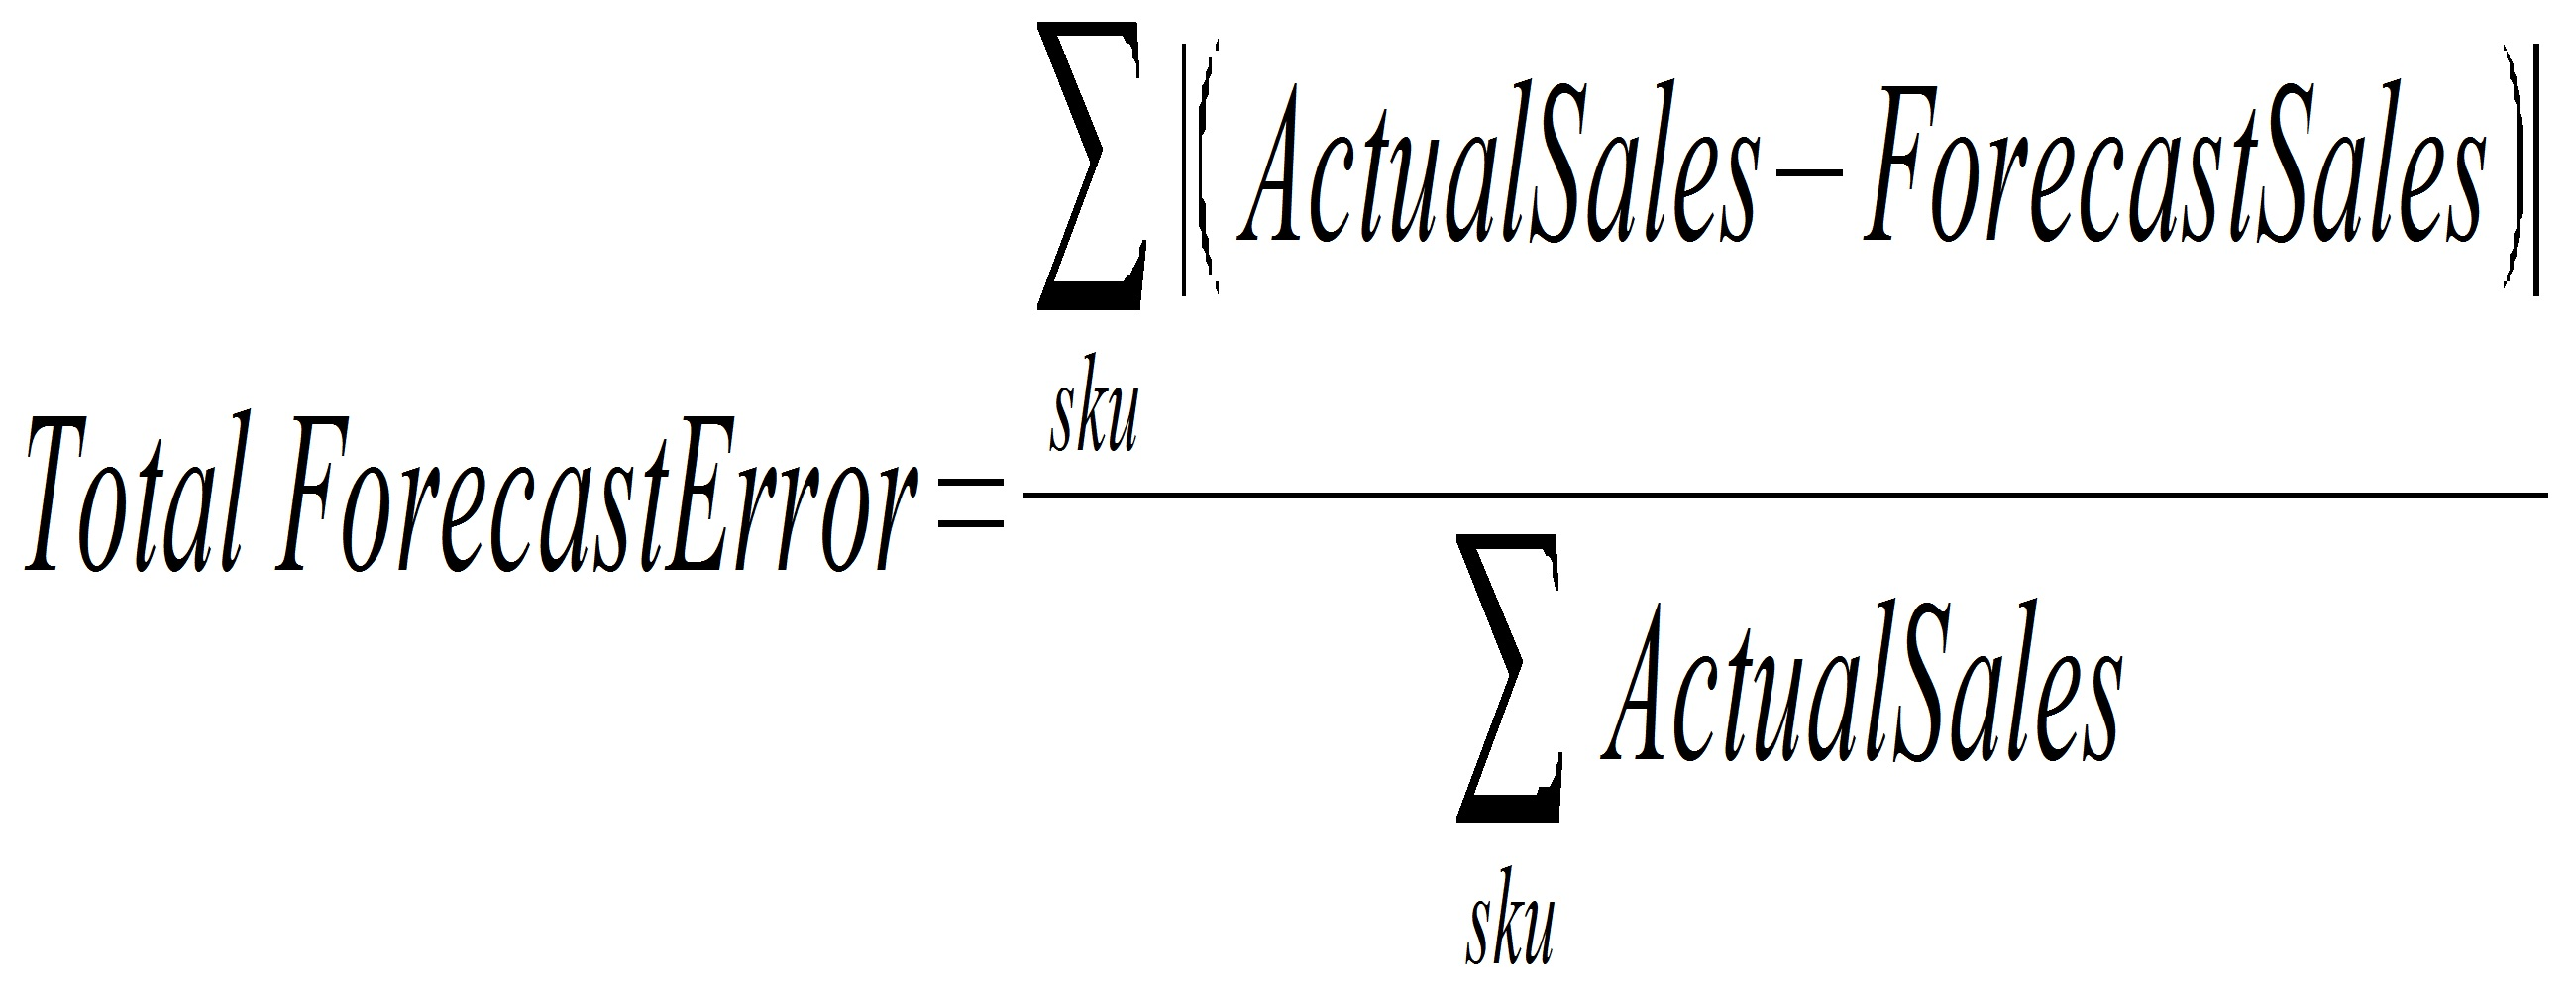

#### 1. Configuración de `TimeSeriesSplit` con `gap=1`
```python
tscv = TimeSeriesSplit(
    n_splits=5,
    test_size=1,  # Validar 1 mes (el mes+2 desde el último mes de entrenamiento)
    gap=1         # Respetar el mes intermedio (ej: entrenar hasta 201806, predecir 201808)
)
```


Supongamos que `train` tiene datos desde `201701` hasta `201909` (32 meses):

| Fold | Entrenamiento         | Validación (mes+2) | Explicación                                                                 |
|------|-----------------------|--------------------|-----------------------------------------------------------------------------|
| 1    | 201701 - 201712        | **201802**         | Entrena hasta 201712, salta 201801 (gap=1), predice 201802.                |
| 2    | 201701 - 201803        | **201805**         | Entrena hasta 201803, salta 201804 (gap=1), predice 201805.                |
| 3    | 201701 - 201806        | **201808**         | Entrena hasta 201806, salta 201807 (gap=1), predice 201808.                |
| 4    | 201701 - 201901        | **201903**         | Entrena hasta 201901, salta 201902 (gap=1), predice 201903.                |
| 5    | 201701 - 201907        | **201909**         | Entrena hasta 201907, salta 201908 (gap=1), predice 201909 (último mes).   |


---

### **¿Por qué `gap=1` y no `gap=2`?**
- **Definición de `gap` en `TimeSeriesSplit`**:  
  El `gap` es el número de muestras **entre el final del entrenamiento y el inicio de la validación**.  
  - En tu caso:  
    - Si entrenas hasta `201806`, el siguiente mes (`201807`) es el `gap=1`, y el target es `201808`.  
    - Por lo tanto, `gap=1` asegura que la validación comience en `201808` (no en `201809`).  

---

In [ ]:
graficos.graficar_780(df_pred_201912_real)

##### Train 3

Con nuevas FE

In [50]:
##### Entrenamiento 1
model_lgb.optimizar_con_optuna(train, version='v3')

[I 2025-06-19 11:21:03,266] A new study created in memory with name: no-name-2048331b-539f-453b-8f40-131405d683b3
[I 2025-06-19 11:21:30,342] Trial 0 finished with value: 0.03667774264888754 and parameters: {'num_leaves': 19, 'learning_rate': 0.040882862040610354, 'feature_fraction': 0.763690876954301, 'bagging_fraction': 0.5630052447002251, 'bagging_freq': 9, 'lambda_l1': 4.520453618795036e-06, 'lambda_l2': 2.1940101426724516e-07, 'min_child_samples': 50, 'max_depth': 9, 'max_bin': 181, 'min_data_in_leaf': 15, 'extra_trees': False}. Best is trial 0 with value: 0.03667774264888754.


Mejor trial hasta ahora: RMSE=0.0367, Parámetros={'num_leaves': 19, 'learning_rate': 0.040882862040610354, 'feature_fraction': 0.763690876954301, 'bagging_fraction': 0.5630052447002251, 'bagging_freq': 9, 'lambda_l1': 4.520453618795036e-06, 'lambda_l2': 2.1940101426724516e-07, 'min_child_samples': 50, 'max_depth': 9, 'max_bin': 181, 'min_data_in_leaf': 15, 'extra_trees': False}


[I 2025-06-19 11:22:38,924] Trial 1 finished with value: 0.03483846470488776 and parameters: {'num_leaves': 97, 'learning_rate': 0.04233756873920091, 'feature_fraction': 0.5308347414626781, 'bagging_fraction': 0.7962219827383252, 'bagging_freq': 2, 'lambda_l1': 0.18981210286206968, 'lambda_l2': 2.6998619911721806, 'min_child_samples': 11, 'max_depth': 10, 'max_bin': 342, 'min_data_in_leaf': 74, 'extra_trees': False}. Best is trial 1 with value: 0.03483846470488776.


Mejor trial hasta ahora: RMSE=0.0348, Parámetros={'num_leaves': 97, 'learning_rate': 0.04233756873920091, 'feature_fraction': 0.5308347414626781, 'bagging_fraction': 0.7962219827383252, 'bagging_freq': 2, 'lambda_l1': 0.18981210286206968, 'lambda_l2': 2.6998619911721806, 'min_child_samples': 11, 'max_depth': 10, 'max_bin': 342, 'min_data_in_leaf': 74, 'extra_trees': False}


[I 2025-06-19 11:23:21,522] Trial 2 finished with value: 0.015079527816778366 and parameters: {'num_leaves': 136, 'learning_rate': 0.18626324513434867, 'feature_fraction': 0.9188564287188621, 'bagging_fraction': 0.6540711184956016, 'bagging_freq': 3, 'lambda_l1': 4.357161877148115e-06, 'lambda_l2': 0.026945336271170395, 'min_child_samples': 13, 'max_depth': 14, 'max_bin': 274, 'min_data_in_leaf': 13, 'extra_trees': True}. Best is trial 2 with value: 0.015079527816778366.


Mejor trial hasta ahora: RMSE=0.0151, Parámetros={'num_leaves': 136, 'learning_rate': 0.18626324513434867, 'feature_fraction': 0.9188564287188621, 'bagging_fraction': 0.6540711184956016, 'bagging_freq': 3, 'lambda_l1': 4.357161877148115e-06, 'lambda_l2': 0.026945336271170395, 'min_child_samples': 13, 'max_depth': 14, 'max_bin': 274, 'min_data_in_leaf': 13, 'extra_trees': True}


[I 2025-06-19 11:24:38,229] Trial 3 finished with value: 0.041573450503539486 and parameters: {'num_leaves': 149, 'learning_rate': 0.015713721856971428, 'feature_fraction': 0.809707712837018, 'bagging_fraction': 0.9423497638862095, 'bagging_freq': 2, 'lambda_l1': 0.0014447860960125265, 'lambda_l2': 2.939658253294808e-07, 'min_child_samples': 14, 'max_depth': 5, 'max_bin': 321, 'min_data_in_leaf': 65, 'extra_trees': False}. Best is trial 2 with value: 0.015079527816778366.


Mejor trial hasta ahora: RMSE=0.0151, Parámetros={'num_leaves': 136, 'learning_rate': 0.18626324513434867, 'feature_fraction': 0.9188564287188621, 'bagging_fraction': 0.6540711184956016, 'bagging_freq': 3, 'lambda_l1': 4.357161877148115e-06, 'lambda_l2': 0.026945336271170395, 'min_child_samples': 13, 'max_depth': 14, 'max_bin': 274, 'min_data_in_leaf': 13, 'extra_trees': True}


[I 2025-06-19 11:25:19,934] Trial 4 finished with value: 0.04194778570256469 and parameters: {'num_leaves': 20, 'learning_rate': 0.025957789845666907, 'feature_fraction': 0.7948233452553138, 'bagging_fraction': 0.8284643737209365, 'bagging_freq': 5, 'lambda_l1': 1.1564511356405091e-06, 'lambda_l2': 8.346021137291579e-08, 'min_child_samples': 19, 'max_depth': 5, 'max_bin': 219, 'min_data_in_leaf': 94, 'extra_trees': False}. Best is trial 2 with value: 0.015079527816778366.


Mejor trial hasta ahora: RMSE=0.0151, Parámetros={'num_leaves': 136, 'learning_rate': 0.18626324513434867, 'feature_fraction': 0.9188564287188621, 'bagging_fraction': 0.6540711184956016, 'bagging_freq': 3, 'lambda_l1': 4.357161877148115e-06, 'lambda_l2': 0.026945336271170395, 'min_child_samples': 13, 'max_depth': 14, 'max_bin': 274, 'min_data_in_leaf': 13, 'extra_trees': True}


[I 2025-06-19 11:25:52,411] Trial 5 finished with value: 0.0076851420701814456 and parameters: {'num_leaves': 190, 'learning_rate': 0.279773361757418, 'feature_fraction': 0.5021533334220548, 'bagging_fraction': 0.7157394714778146, 'bagging_freq': 5, 'lambda_l1': 0.03675031637408391, 'lambda_l2': 0.008177578003692836, 'min_child_samples': 22, 'max_depth': 13, 'max_bin': 244, 'min_data_in_leaf': 66, 'extra_trees': False}. Best is trial 5 with value: 0.0076851420701814456.


Mejor trial hasta ahora: RMSE=0.0077, Parámetros={'num_leaves': 190, 'learning_rate': 0.279773361757418, 'feature_fraction': 0.5021533334220548, 'bagging_fraction': 0.7157394714778146, 'bagging_freq': 5, 'lambda_l1': 0.03675031637408391, 'lambda_l2': 0.008177578003692836, 'min_child_samples': 22, 'max_depth': 13, 'max_bin': 244, 'min_data_in_leaf': 66, 'extra_trees': False}


[I 2025-06-19 11:26:49,111] Trial 6 finished with value: 0.015823101703226157 and parameters: {'num_leaves': 132, 'learning_rate': 0.07909526413387008, 'feature_fraction': 0.5673369184266744, 'bagging_fraction': 0.8133428377374946, 'bagging_freq': 5, 'lambda_l1': 1.521230746828629, 'lambda_l2': 9.116334642638676e-07, 'min_child_samples': 29, 'max_depth': 13, 'max_bin': 377, 'min_data_in_leaf': 84, 'extra_trees': False}. Best is trial 5 with value: 0.0076851420701814456.


Mejor trial hasta ahora: RMSE=0.0077, Parámetros={'num_leaves': 190, 'learning_rate': 0.279773361757418, 'feature_fraction': 0.5021533334220548, 'bagging_fraction': 0.7157394714778146, 'bagging_freq': 5, 'lambda_l1': 0.03675031637408391, 'lambda_l2': 0.008177578003692836, 'min_child_samples': 22, 'max_depth': 13, 'max_bin': 244, 'min_data_in_leaf': 66, 'extra_trees': False}


[I 2025-06-19 11:28:17,635] Trial 7 finished with value: 0.033593061084218036 and parameters: {'num_leaves': 112, 'learning_rate': 0.034284745797840376, 'feature_fraction': 0.7207317132381406, 'bagging_fraction': 0.9011308438754857, 'bagging_freq': 5, 'lambda_l1': 0.10607328134099843, 'lambda_l2': 6.863480538548933e-05, 'min_child_samples': 43, 'max_depth': 13, 'max_bin': 482, 'min_data_in_leaf': 13, 'extra_trees': True}. Best is trial 5 with value: 0.0076851420701814456.


Mejor trial hasta ahora: RMSE=0.0077, Parámetros={'num_leaves': 190, 'learning_rate': 0.279773361757418, 'feature_fraction': 0.5021533334220548, 'bagging_fraction': 0.7157394714778146, 'bagging_freq': 5, 'lambda_l1': 0.03675031637408391, 'lambda_l2': 0.008177578003692836, 'min_child_samples': 22, 'max_depth': 13, 'max_bin': 244, 'min_data_in_leaf': 66, 'extra_trees': False}


[I 2025-06-19 11:28:53,625] Trial 8 finished with value: 0.040136939702666845 and parameters: {'num_leaves': 91, 'learning_rate': 0.05286848112909398, 'feature_fraction': 0.6144433273630383, 'bagging_fraction': 0.8382010883946341, 'bagging_freq': 2, 'lambda_l1': 0.07728953579954984, 'lambda_l2': 2.9656193734942707e-07, 'min_child_samples': 49, 'max_depth': 5, 'max_bin': 329, 'min_data_in_leaf': 44, 'extra_trees': False}. Best is trial 5 with value: 0.0076851420701814456.


Mejor trial hasta ahora: RMSE=0.0077, Parámetros={'num_leaves': 190, 'learning_rate': 0.279773361757418, 'feature_fraction': 0.5021533334220548, 'bagging_fraction': 0.7157394714778146, 'bagging_freq': 5, 'lambda_l1': 0.03675031637408391, 'lambda_l2': 0.008177578003692836, 'min_child_samples': 22, 'max_depth': 13, 'max_bin': 244, 'min_data_in_leaf': 66, 'extra_trees': False}


[I 2025-06-19 11:29:24,679] Trial 9 finished with value: 0.018449583411496228 and parameters: {'num_leaves': 135, 'learning_rate': 0.12711553376575618, 'feature_fraction': 0.6976417463847895, 'bagging_fraction': 0.7720950765977155, 'bagging_freq': 9, 'lambda_l1': 2.3330924597832056e-05, 'lambda_l2': 2.1916669429867604e-07, 'min_child_samples': 32, 'max_depth': 13, 'max_bin': 319, 'min_data_in_leaf': 95, 'extra_trees': True}. Best is trial 5 with value: 0.0076851420701814456.


Mejor trial hasta ahora: RMSE=0.0077, Parámetros={'num_leaves': 190, 'learning_rate': 0.279773361757418, 'feature_fraction': 0.5021533334220548, 'bagging_fraction': 0.7157394714778146, 'bagging_freq': 5, 'lambda_l1': 0.03675031637408391, 'lambda_l2': 0.008177578003692836, 'min_child_samples': 22, 'max_depth': 13, 'max_bin': 244, 'min_data_in_leaf': 66, 'extra_trees': False}


[I 2025-06-19 11:29:47,461] Trial 10 finished with value: 0.01272012652229305 and parameters: {'num_leaves': 195, 'learning_rate': 0.2921895956516383, 'feature_fraction': 0.9620240204173134, 'bagging_fraction': 0.6704293768160805, 'bagging_freq': 7, 'lambda_l1': 0.0011157369604509696, 'lambda_l2': 0.002985256145319786, 'min_child_samples': 1, 'max_depth': 10, 'max_bin': 127, 'min_data_in_leaf': 43, 'extra_trees': True}. Best is trial 5 with value: 0.0076851420701814456.


Mejor trial hasta ahora: RMSE=0.0077, Parámetros={'num_leaves': 190, 'learning_rate': 0.279773361757418, 'feature_fraction': 0.5021533334220548, 'bagging_fraction': 0.7157394714778146, 'bagging_freq': 5, 'lambda_l1': 0.03675031637408391, 'lambda_l2': 0.008177578003692836, 'min_child_samples': 22, 'max_depth': 13, 'max_bin': 244, 'min_data_in_leaf': 66, 'extra_trees': False}


[I 2025-06-19 11:30:08,466] Trial 11 finished with value: 0.0013927590655116347 and parameters: {'num_leaves': 197, 'learning_rate': 0.2732572456291797, 'feature_fraction': 0.993928047358697, 'bagging_fraction': 0.6678133309899154, 'bagging_freq': 7, 'lambda_l1': 0.0016920306614273727, 'lambda_l2': 0.0049830111435581635, 'min_child_samples': 1, 'max_depth': 10, 'max_bin': 135, 'min_data_in_leaf': 37, 'extra_trees': True}. Best is trial 11 with value: 0.0013927590655116347.


Mejor trial hasta ahora: RMSE=0.0014, Parámetros={'num_leaves': 197, 'learning_rate': 0.2732572456291797, 'feature_fraction': 0.993928047358697, 'bagging_fraction': 0.6678133309899154, 'bagging_freq': 7, 'lambda_l1': 0.0016920306614273727, 'lambda_l2': 0.0049830111435581635, 'min_child_samples': 1, 'max_depth': 10, 'max_bin': 135, 'min_data_in_leaf': 37, 'extra_trees': True}


[I 2025-06-19 11:30:26,723] Trial 12 finished with value: 0.004496506049522333 and parameters: {'num_leaves': 196, 'learning_rate': 0.2991787215092369, 'feature_fraction': 0.8702457652412771, 'bagging_fraction': 0.673786211534464, 'bagging_freq': 7, 'lambda_l1': 0.0055625442244658044, 'lambda_l2': 0.17460536623201753, 'min_child_samples': 2, 'max_depth': 8, 'max_bin': 103, 'min_data_in_leaf': 33, 'extra_trees': True}. Best is trial 11 with value: 0.0013927590655116347.


Mejor trial hasta ahora: RMSE=0.0014, Parámetros={'num_leaves': 197, 'learning_rate': 0.2732572456291797, 'feature_fraction': 0.993928047358697, 'bagging_fraction': 0.6678133309899154, 'bagging_freq': 7, 'lambda_l1': 0.0016920306614273727, 'lambda_l2': 0.0049830111435581635, 'min_child_samples': 1, 'max_depth': 10, 'max_bin': 135, 'min_data_in_leaf': 37, 'extra_trees': True}


[I 2025-06-19 11:30:49,494] Trial 13 finished with value: 0.042152787089394024 and parameters: {'num_leaves': 177, 'learning_rate': 0.12292413041481308, 'feature_fraction': 0.9951472237480137, 'bagging_fraction': 0.5535922476724646, 'bagging_freq': 7, 'lambda_l1': 0.00021609585874240422, 'lambda_l2': 0.7130437901064522, 'min_child_samples': 2, 'max_depth': 8, 'max_bin': 102, 'min_data_in_leaf': 33, 'extra_trees': True}. Best is trial 11 with value: 0.0013927590655116347.


Mejor trial hasta ahora: RMSE=0.0014, Parámetros={'num_leaves': 197, 'learning_rate': 0.2732572456291797, 'feature_fraction': 0.993928047358697, 'bagging_fraction': 0.6678133309899154, 'bagging_freq': 7, 'lambda_l1': 0.0016920306614273727, 'lambda_l2': 0.0049830111435581635, 'min_child_samples': 1, 'max_depth': 10, 'max_bin': 135, 'min_data_in_leaf': 37, 'extra_trees': True}


[I 2025-06-19 11:31:08,494] Trial 14 finished with value: 0.07652377432162244 and parameters: {'num_leaves': 165, 'learning_rate': 0.17541332108786267, 'feature_fraction': 0.8798530057591811, 'bagging_fraction': 0.6275157296567087, 'bagging_freq': 7, 'lambda_l1': 1.1028865309350065e-08, 'lambda_l2': 0.00018069428719538657, 'min_child_samples': 8, 'max_depth': 7, 'max_bin': 163, 'min_data_in_leaf': 29, 'extra_trees': True}. Best is trial 11 with value: 0.0013927590655116347.


Mejor trial hasta ahora: RMSE=0.0014, Parámetros={'num_leaves': 197, 'learning_rate': 0.2732572456291797, 'feature_fraction': 0.993928047358697, 'bagging_fraction': 0.6678133309899154, 'bagging_freq': 7, 'lambda_l1': 0.0016920306614273727, 'lambda_l2': 0.0049830111435581635, 'min_child_samples': 1, 'max_depth': 10, 'max_bin': 135, 'min_data_in_leaf': 37, 'extra_trees': True}


[I 2025-06-19 11:31:32,732] Trial 15 finished with value: 0.008682724709689007 and parameters: {'num_leaves': 75, 'learning_rate': 0.09163230229014598, 'feature_fraction': 0.8656665993947149, 'bagging_fraction': 0.7164693474102657, 'bagging_freq': 10, 'lambda_l1': 0.00804928075356021, 'lambda_l2': 0.2609280415984481, 'min_child_samples': 7, 'max_depth': 7, 'max_bin': 158, 'min_data_in_leaf': 27, 'extra_trees': True}. Best is trial 11 with value: 0.0013927590655116347.


Mejor trial hasta ahora: RMSE=0.0014, Parámetros={'num_leaves': 197, 'learning_rate': 0.2732572456291797, 'feature_fraction': 0.993928047358697, 'bagging_fraction': 0.6678133309899154, 'bagging_freq': 7, 'lambda_l1': 0.0016920306614273727, 'lambda_l2': 0.0049830111435581635, 'min_child_samples': 1, 'max_depth': 10, 'max_bin': 135, 'min_data_in_leaf': 37, 'extra_trees': True}


[I 2025-06-19 11:31:48,441] Trial 16 finished with value: 0.010124217786311108 and parameters: {'num_leaves': 170, 'learning_rate': 0.19406150164489744, 'feature_fraction': 0.9357528158201845, 'bagging_fraction': 0.603818721119002, 'bagging_freq': 8, 'lambda_l1': 2.9134140461004807, 'lambda_l2': 0.07926055313797276, 'min_child_samples': 1, 'max_depth': 3, 'max_bin': 205, 'min_data_in_leaf': 2, 'extra_trees': True}. Best is trial 11 with value: 0.0013927590655116347.


Mejor trial hasta ahora: RMSE=0.0014, Parámetros={'num_leaves': 197, 'learning_rate': 0.2732572456291797, 'feature_fraction': 0.993928047358697, 'bagging_fraction': 0.6678133309899154, 'bagging_freq': 7, 'lambda_l1': 0.0016920306614273727, 'lambda_l2': 0.0049830111435581635, 'min_child_samples': 1, 'max_depth': 10, 'max_bin': 135, 'min_data_in_leaf': 37, 'extra_trees': True}


[I 2025-06-19 11:32:55,621] Trial 17 finished with value: 0.042401605849848804 and parameters: {'num_leaves': 199, 'learning_rate': 0.013213014844232783, 'feature_fraction': 0.8636540939301068, 'bagging_fraction': 0.5184981139535301, 'bagging_freq': 6, 'lambda_l1': 0.0001294460181282403, 'lambda_l2': 0.0021545764887744966, 'min_child_samples': 19, 'max_depth': 11, 'max_bin': 102, 'min_data_in_leaf': 55, 'extra_trees': True}. Best is trial 11 with value: 0.0013927590655116347.


Mejor trial hasta ahora: RMSE=0.0014, Parámetros={'num_leaves': 197, 'learning_rate': 0.2732572456291797, 'feature_fraction': 0.993928047358697, 'bagging_fraction': 0.6678133309899154, 'bagging_freq': 7, 'lambda_l1': 0.0016920306614273727, 'lambda_l2': 0.0049830111435581635, 'min_child_samples': 1, 'max_depth': 10, 'max_bin': 135, 'min_data_in_leaf': 37, 'extra_trees': True}


[I 2025-06-19 11:33:36,045] Trial 18 finished with value: 0.034352567142711704 and parameters: {'num_leaves': 55, 'learning_rate': 0.07812593938951508, 'feature_fraction': 0.9894744319138521, 'bagging_fraction': 0.7142313152512891, 'bagging_freq': 4, 'lambda_l1': 0.0038365436628382847, 'lambda_l2': 9.701188911393846, 'min_child_samples': 6, 'max_depth': 11, 'max_bin': 418, 'min_data_in_leaf': 55, 'extra_trees': True}. Best is trial 11 with value: 0.0013927590655116347.


Mejor trial hasta ahora: RMSE=0.0014, Parámetros={'num_leaves': 197, 'learning_rate': 0.2732572456291797, 'feature_fraction': 0.993928047358697, 'bagging_fraction': 0.6678133309899154, 'bagging_freq': 7, 'lambda_l1': 0.0016920306614273727, 'lambda_l2': 0.0049830111435581635, 'min_child_samples': 1, 'max_depth': 10, 'max_bin': 135, 'min_data_in_leaf': 37, 'extra_trees': True}


[I 2025-06-19 11:34:00,349] Trial 19 finished with value: 0.03933033642201804 and parameters: {'num_leaves': 156, 'learning_rate': 0.2875456526301174, 'feature_fraction': 0.9197979120298138, 'bagging_fraction': 0.5841330788312313, 'bagging_freq': 8, 'lambda_l1': 1.2224657351704435e-07, 'lambda_l2': 1.875439670689738e-05, 'min_child_samples': 36, 'max_depth': 15, 'max_bin': 143, 'min_data_in_leaf': 38, 'extra_trees': True}. Best is trial 11 with value: 0.0013927590655116347.


Mejor trial hasta ahora: RMSE=0.0014, Parámetros={'num_leaves': 197, 'learning_rate': 0.2732572456291797, 'feature_fraction': 0.993928047358697, 'bagging_fraction': 0.6678133309899154, 'bagging_freq': 7, 'lambda_l1': 0.0016920306614273727, 'lambda_l2': 0.0049830111435581635, 'min_child_samples': 1, 'max_depth': 10, 'max_bin': 135, 'min_data_in_leaf': 37, 'extra_trees': True}


[I 2025-06-19 11:34:28,590] Trial 20 finished with value: 0.02272424322942759 and parameters: {'num_leaves': 185, 'learning_rate': 0.13665411548035247, 'feature_fraction': 0.8421709342237984, 'bagging_fraction': 0.6796693102761814, 'bagging_freq': 6, 'lambda_l1': 9.261350222479215e-05, 'lambda_l2': 6.17543751839829e-06, 'min_child_samples': 16, 'max_depth': 8, 'max_bin': 249, 'min_data_in_leaf': 25, 'extra_trees': True}. Best is trial 11 with value: 0.0013927590655116347.


Mejor trial hasta ahora: RMSE=0.0014, Parámetros={'num_leaves': 197, 'learning_rate': 0.2732572456291797, 'feature_fraction': 0.993928047358697, 'bagging_fraction': 0.6678133309899154, 'bagging_freq': 7, 'lambda_l1': 0.0016920306614273727, 'lambda_l2': 0.0049830111435581635, 'min_child_samples': 1, 'max_depth': 10, 'max_bin': 135, 'min_data_in_leaf': 37, 'extra_trees': True}


[I 2025-06-19 11:35:02,535] Trial 21 finished with value: 0.01032996167383571 and parameters: {'num_leaves': 200, 'learning_rate': 0.23461978047010554, 'feature_fraction': 0.643844850950507, 'bagging_fraction': 0.7400794218262245, 'bagging_freq': 4, 'lambda_l1': 0.020550349774279476, 'lambda_l2': 0.006431207493299545, 'min_child_samples': 22, 'max_depth': 12, 'max_bin': 211, 'min_data_in_leaf': 64, 'extra_trees': False}. Best is trial 11 with value: 0.0013927590655116347.


Mejor trial hasta ahora: RMSE=0.0014, Parámetros={'num_leaves': 197, 'learning_rate': 0.2732572456291797, 'feature_fraction': 0.993928047358697, 'bagging_fraction': 0.6678133309899154, 'bagging_freq': 7, 'lambda_l1': 0.0016920306614273727, 'lambda_l2': 0.0049830111435581635, 'min_child_samples': 1, 'max_depth': 10, 'max_bin': 135, 'min_data_in_leaf': 37, 'extra_trees': True}


[I 2025-06-19 11:35:46,561] Trial 22 finished with value: 0.08087783151966932 and parameters: {'num_leaves': 179, 'learning_rate': 0.23226095834786795, 'feature_fraction': 0.6695228742540447, 'bagging_fraction': 0.6823558591016146, 'bagging_freq': 6, 'lambda_l1': 0.49828321360768113, 'lambda_l2': 0.0008943087504689809, 'min_child_samples': 24, 'max_depth': 15, 'max_bin': 251, 'min_data_in_leaf': 48, 'extra_trees': False}. Best is trial 11 with value: 0.0013927590655116347.


Mejor trial hasta ahora: RMSE=0.0014, Parámetros={'num_leaves': 197, 'learning_rate': 0.2732572456291797, 'feature_fraction': 0.993928047358697, 'bagging_fraction': 0.6678133309899154, 'bagging_freq': 7, 'lambda_l1': 0.0016920306614273727, 'lambda_l2': 0.0049830111435581635, 'min_child_samples': 1, 'max_depth': 10, 'max_bin': 135, 'min_data_in_leaf': 37, 'extra_trees': True}


[I 2025-06-19 11:36:09,062] Trial 23 finished with value: 0.008442416692903538 and parameters: {'num_leaves': 183, 'learning_rate': 0.28890162920347257, 'feature_fraction': 0.5063752588839797, 'bagging_fraction': 0.6307628079818197, 'bagging_freq': 8, 'lambda_l1': 9.888811546664897, 'lambda_l2': 0.02685994310185549, 'min_child_samples': 6, 'max_depth': 9, 'max_bin': 129, 'min_data_in_leaf': 67, 'extra_trees': False}. Best is trial 11 with value: 0.0013927590655116347.


Mejor trial hasta ahora: RMSE=0.0014, Parámetros={'num_leaves': 197, 'learning_rate': 0.2732572456291797, 'feature_fraction': 0.993928047358697, 'bagging_fraction': 0.6678133309899154, 'bagging_freq': 7, 'lambda_l1': 0.0016920306614273727, 'lambda_l2': 0.0049830111435581635, 'min_child_samples': 1, 'max_depth': 10, 'max_bin': 135, 'min_data_in_leaf': 37, 'extra_trees': True}


[I 2025-06-19 11:36:33,120] Trial 24 finished with value: 0.009083658640721113 and parameters: {'num_leaves': 155, 'learning_rate': 0.15807263693667084, 'feature_fraction': 0.7465589448343943, 'bagging_fraction': 0.7561725872480142, 'bagging_freq': 4, 'lambda_l1': 0.032050296135946954, 'lambda_l2': 0.016876443077108744, 'min_child_samples': 38, 'max_depth': 11, 'max_bin': 177, 'min_data_in_leaf': 55, 'extra_trees': True}. Best is trial 11 with value: 0.0013927590655116347.


Mejor trial hasta ahora: RMSE=0.0014, Parámetros={'num_leaves': 197, 'learning_rate': 0.2732572456291797, 'feature_fraction': 0.993928047358697, 'bagging_fraction': 0.6678133309899154, 'bagging_freq': 7, 'lambda_l1': 0.0016920306614273727, 'lambda_l2': 0.0049830111435581635, 'min_child_samples': 1, 'max_depth': 10, 'max_bin': 135, 'min_data_in_leaf': 37, 'extra_trees': True}


[I 2025-06-19 11:37:06,314] Trial 25 finished with value: 0.011834593217799692 and parameters: {'num_leaves': 118, 'learning_rate': 0.1044828867217643, 'feature_fraction': 0.8989011146478224, 'bagging_fraction': 0.9966718629618094, 'bagging_freq': 7, 'lambda_l1': 0.0007190408892733445, 'lambda_l2': 0.24177855565703274, 'min_child_samples': 9, 'max_depth': 7, 'max_bin': 282, 'min_data_in_leaf': 77, 'extra_trees': True}. Best is trial 11 with value: 0.0013927590655116347.


Mejor trial hasta ahora: RMSE=0.0014, Parámetros={'num_leaves': 197, 'learning_rate': 0.2732572456291797, 'feature_fraction': 0.993928047358697, 'bagging_fraction': 0.6678133309899154, 'bagging_freq': 7, 'lambda_l1': 0.0016920306614273727, 'lambda_l2': 0.0049830111435581635, 'min_child_samples': 1, 'max_depth': 10, 'max_bin': 135, 'min_data_in_leaf': 37, 'extra_trees': True}


[I 2025-06-19 11:37:43,679] Trial 26 finished with value: 0.003293888903547748 and parameters: {'num_leaves': 190, 'learning_rate': 0.21290000676843973, 'feature_fraction': 0.819623587895346, 'bagging_fraction': 0.7068785728680304, 'bagging_freq': 9, 'lambda_l1': 0.003914932290845928, 'lambda_l2': 0.0007890545859324009, 'min_child_samples': 29, 'max_depth': 12, 'max_bin': 189, 'min_data_in_leaf': 36, 'extra_trees': False}. Best is trial 11 with value: 0.0013927590655116347.


Mejor trial hasta ahora: RMSE=0.0014, Parámetros={'num_leaves': 197, 'learning_rate': 0.2732572456291797, 'feature_fraction': 0.993928047358697, 'bagging_fraction': 0.6678133309899154, 'bagging_freq': 7, 'lambda_l1': 0.0016920306614273727, 'lambda_l2': 0.0049830111435581635, 'min_child_samples': 1, 'max_depth': 10, 'max_bin': 135, 'min_data_in_leaf': 37, 'extra_trees': True}


[I 2025-06-19 11:38:07,127] Trial 27 finished with value: 0.021361631592466398 and parameters: {'num_leaves': 165, 'learning_rate': 0.2139913392008499, 'feature_fraction': 0.8070420956807177, 'bagging_fraction': 0.8613397410667076, 'bagging_freq': 10, 'lambda_l1': 0.005758277752579284, 'lambda_l2': 0.0005253820832637232, 'min_child_samples': 29, 'max_depth': 10, 'max_bin': 124, 'min_data_in_leaf': 21, 'extra_trees': True}. Best is trial 11 with value: 0.0013927590655116347.


Mejor trial hasta ahora: RMSE=0.0014, Parámetros={'num_leaves': 197, 'learning_rate': 0.2732572456291797, 'feature_fraction': 0.993928047358697, 'bagging_fraction': 0.6678133309899154, 'bagging_freq': 7, 'lambda_l1': 0.0016920306614273727, 'lambda_l2': 0.0049830111435581635, 'min_child_samples': 1, 'max_depth': 10, 'max_bin': 135, 'min_data_in_leaf': 37, 'extra_trees': True}


[I 2025-06-19 11:38:50,569] Trial 28 finished with value: 0.02738895078402457 and parameters: {'num_leaves': 145, 'learning_rate': 0.1435636049709049, 'feature_fraction': 0.8341242733496108, 'bagging_fraction': 0.6369232741477376, 'bagging_freq': 9, 'lambda_l1': 0.002248711821771042, 'lambda_l2': 8.031278810975481e-05, 'min_child_samples': 27, 'max_depth': 12, 'max_bin': 183, 'min_data_in_leaf': 35, 'extra_trees': False}. Best is trial 11 with value: 0.0013927590655116347.


Mejor trial hasta ahora: RMSE=0.0014, Parámetros={'num_leaves': 197, 'learning_rate': 0.2732572456291797, 'feature_fraction': 0.993928047358697, 'bagging_fraction': 0.6678133309899154, 'bagging_freq': 7, 'lambda_l1': 0.0016920306614273727, 'lambda_l2': 0.0049830111435581635, 'min_child_samples': 1, 'max_depth': 10, 'max_bin': 135, 'min_data_in_leaf': 37, 'extra_trees': True}


[I 2025-06-19 11:39:41,270] Trial 29 finished with value: 0.06892969630958148 and parameters: {'num_leaves': 171, 'learning_rate': 0.06596421286033012, 'feature_fraction': 0.9416068777037052, 'bagging_fraction': 0.504340439825359, 'bagging_freq': 9, 'lambda_l1': 4.446165052235294e-05, 'lambda_l2': 1.2191644444435473e-08, 'min_child_samples': 34, 'max_depth': 9, 'max_bin': 189, 'min_data_in_leaf': 17, 'extra_trees': False}. Best is trial 11 with value: 0.0013927590655116347.


Mejor trial hasta ahora: RMSE=0.0014, Parámetros={'num_leaves': 197, 'learning_rate': 0.2732572456291797, 'feature_fraction': 0.993928047358697, 'bagging_fraction': 0.6678133309899154, 'bagging_freq': 7, 'lambda_l1': 0.0016920306614273727, 'lambda_l2': 0.0049830111435581635, 'min_child_samples': 1, 'max_depth': 10, 'max_bin': 135, 'min_data_in_leaf': 37, 'extra_trees': True}


[I 2025-06-19 11:39:58,114] Trial 30 finished with value: 0.0284487772473965 and parameters: {'num_leaves': 43, 'learning_rate': 0.22032936482017923, 'feature_fraction': 0.7737360794978354, 'bagging_fraction': 0.5713077253347036, 'bagging_freq': 8, 'lambda_l1': 9.564852819412737e-06, 'lambda_l2': 0.07083164040505686, 'min_child_samples': 40, 'max_depth': 8, 'max_bin': 160, 'min_data_in_leaf': 41, 'extra_trees': True}. Best is trial 11 with value: 0.0013927590655116347.


Mejor trial hasta ahora: RMSE=0.0014, Parámetros={'num_leaves': 197, 'learning_rate': 0.2732572456291797, 'feature_fraction': 0.993928047358697, 'bagging_fraction': 0.6678133309899154, 'bagging_freq': 7, 'lambda_l1': 0.0016920306614273727, 'lambda_l2': 0.0049830111435581635, 'min_child_samples': 1, 'max_depth': 10, 'max_bin': 135, 'min_data_in_leaf': 37, 'extra_trees': True}


[I 2025-06-19 11:40:40,733] Trial 31 finished with value: 0.0007687801225215294 and parameters: {'num_leaves': 189, 'learning_rate': 0.29353613572059023, 'feature_fraction': 0.7465607468446418, 'bagging_fraction': 0.7129536340741796, 'bagging_freq': 6, 'lambda_l1': 0.0169453305276147, 'lambda_l2': 0.0069368204080285795, 'min_child_samples': 4, 'max_depth': 12, 'max_bin': 216, 'min_data_in_leaf': 48, 'extra_trees': False}. Best is trial 31 with value: 0.0007687801225215294.


Mejor trial hasta ahora: RMSE=0.0008, Parámetros={'num_leaves': 189, 'learning_rate': 0.29353613572059023, 'feature_fraction': 0.7465607468446418, 'bagging_fraction': 0.7129536340741796, 'bagging_freq': 6, 'lambda_l1': 0.0169453305276147, 'lambda_l2': 0.0069368204080285795, 'min_child_samples': 4, 'max_depth': 12, 'max_bin': 216, 'min_data_in_leaf': 48, 'extra_trees': False}


[I 2025-06-19 11:41:11,129] Trial 32 finished with value: 0.043085144040251634 and parameters: {'num_leaves': 189, 'learning_rate': 0.2453678750180522, 'feature_fraction': 0.7639812595122774, 'bagging_fraction': 0.7047188783469732, 'bagging_freq': 7, 'lambda_l1': 0.0004688610717702534, 'lambda_l2': 0.0010653275883352087, 'min_child_samples': 4, 'max_depth': 12, 'max_bin': 225, 'min_data_in_leaf': 48, 'extra_trees': False}. Best is trial 31 with value: 0.0007687801225215294.


Mejor trial hasta ahora: RMSE=0.0008, Parámetros={'num_leaves': 189, 'learning_rate': 0.29353613572059023, 'feature_fraction': 0.7465607468446418, 'bagging_fraction': 0.7129536340741796, 'bagging_freq': 6, 'lambda_l1': 0.0169453305276147, 'lambda_l2': 0.0069368204080285795, 'min_child_samples': 4, 'max_depth': 12, 'max_bin': 216, 'min_data_in_leaf': 48, 'extra_trees': False}


[I 2025-06-19 11:41:42,822] Trial 33 finished with value: 0.0035500154801562495 and parameters: {'num_leaves': 180, 'learning_rate': 0.17979560212682824, 'feature_fraction': 0.7422319793338402, 'bagging_fraction': 0.7867407995154945, 'bagging_freq': 6, 'lambda_l1': 0.014028218586906357, 'lambda_l2': 2.0648836953768455, 'min_child_samples': 10, 'max_depth': 10, 'max_bin': 145, 'min_data_in_leaf': 32, 'extra_trees': False}. Best is trial 31 with value: 0.0007687801225215294.


Mejor trial hasta ahora: RMSE=0.0008, Parámetros={'num_leaves': 189, 'learning_rate': 0.29353613572059023, 'feature_fraction': 0.7465607468446418, 'bagging_fraction': 0.7129536340741796, 'bagging_freq': 6, 'lambda_l1': 0.0169453305276147, 'lambda_l2': 0.0069368204080285795, 'min_child_samples': 4, 'max_depth': 12, 'max_bin': 216, 'min_data_in_leaf': 48, 'extra_trees': False}


[I 2025-06-19 11:42:42,286] Trial 34 finished with value: 0.013523819014500763 and parameters: {'num_leaves': 161, 'learning_rate': 0.175161242578983, 'feature_fraction': 0.7334696998211252, 'bagging_fraction': 0.7851213109146452, 'bagging_freq': 6, 'lambda_l1': 0.24714007576518343, 'lambda_l2': 0.5500545156112837, 'min_child_samples': 11, 'max_depth': 10, 'max_bin': 195, 'min_data_in_leaf': 6, 'extra_trees': False}. Best is trial 31 with value: 0.0007687801225215294.


Mejor trial hasta ahora: RMSE=0.0008, Parámetros={'num_leaves': 189, 'learning_rate': 0.29353613572059023, 'feature_fraction': 0.7465607468446418, 'bagging_fraction': 0.7129536340741796, 'bagging_freq': 6, 'lambda_l1': 0.0169453305276147, 'lambda_l2': 0.0069368204080285795, 'min_child_samples': 4, 'max_depth': 12, 'max_bin': 216, 'min_data_in_leaf': 48, 'extra_trees': False}


[I 2025-06-19 11:43:27,800] Trial 35 finished with value: 0.033235483658874694 and parameters: {'num_leaves': 178, 'learning_rate': 0.10872084870858575, 'feature_fraction': 0.7013606637885604, 'bagging_fraction': 0.7489683731460214, 'bagging_freq': 3, 'lambda_l1': 0.01961678556978659, 'lambda_l2': 2.7175083802163655, 'min_child_samples': 16, 'max_depth': 14, 'max_bin': 150, 'min_data_in_leaf': 21, 'extra_trees': False}. Best is trial 31 with value: 0.0007687801225215294.


Mejor trial hasta ahora: RMSE=0.0008, Parámetros={'num_leaves': 189, 'learning_rate': 0.29353613572059023, 'feature_fraction': 0.7465607468446418, 'bagging_fraction': 0.7129536340741796, 'bagging_freq': 6, 'lambda_l1': 0.0169453305276147, 'lambda_l2': 0.0069368204080285795, 'min_child_samples': 4, 'max_depth': 12, 'max_bin': 216, 'min_data_in_leaf': 48, 'extra_trees': False}


[I 2025-06-19 11:44:12,934] Trial 36 finished with value: 0.039550174178026684 and parameters: {'num_leaves': 143, 'learning_rate': 0.18725117148690787, 'feature_fraction': 0.7773049760328641, 'bagging_fraction': 0.8638241762055852, 'bagging_freq': 10, 'lambda_l1': 0.41416463382635504, 'lambda_l2': 0.000248672756278139, 'min_child_samples': 11, 'max_depth': 11, 'max_bin': 282, 'min_data_in_leaf': 51, 'extra_trees': False}. Best is trial 31 with value: 0.0007687801225215294.


Mejor trial hasta ahora: RMSE=0.0008, Parámetros={'num_leaves': 189, 'learning_rate': 0.29353613572059023, 'feature_fraction': 0.7465607468446418, 'bagging_fraction': 0.7129536340741796, 'bagging_freq': 6, 'lambda_l1': 0.0169453305276147, 'lambda_l2': 0.0069368204080285795, 'min_child_samples': 4, 'max_depth': 12, 'max_bin': 216, 'min_data_in_leaf': 48, 'extra_trees': False}


[I 2025-06-19 11:45:50,110] Trial 37 finished with value: 0.04516219345452878 and parameters: {'num_leaves': 125, 'learning_rate': 0.0249520557976155, 'feature_fraction': 0.5986773734503821, 'bagging_fraction': 0.7866660679136951, 'bagging_freq': 1, 'lambda_l1': 0.013698933251921968, 'lambda_l2': 7.224101931451162e-06, 'min_child_samples': 13, 'max_depth': 10, 'max_bin': 230, 'min_data_in_leaf': 40, 'extra_trees': False}. Best is trial 31 with value: 0.0007687801225215294.


Mejor trial hasta ahora: RMSE=0.0008, Parámetros={'num_leaves': 189, 'learning_rate': 0.29353613572059023, 'feature_fraction': 0.7465607468446418, 'bagging_fraction': 0.7129536340741796, 'bagging_freq': 6, 'lambda_l1': 0.0169453305276147, 'lambda_l2': 0.0069368204080285795, 'min_child_samples': 4, 'max_depth': 12, 'max_bin': 216, 'min_data_in_leaf': 48, 'extra_trees': False}


[I 2025-06-19 11:46:23,382] Trial 38 finished with value: 0.017606186733400475 and parameters: {'num_leaves': 172, 'learning_rate': 0.1582903259637502, 'feature_fraction': 0.6712936828867666, 'bagging_fraction': 0.7375380197317796, 'bagging_freq': 6, 'lambda_l1': 0.0728026135924048, 'lambda_l2': 0.007441115868843408, 'min_child_samples': 4, 'max_depth': 14, 'max_bin': 175, 'min_data_in_leaf': 61, 'extra_trees': False}. Best is trial 31 with value: 0.0007687801225215294.


Mejor trial hasta ahora: RMSE=0.0008, Parámetros={'num_leaves': 189, 'learning_rate': 0.29353613572059023, 'feature_fraction': 0.7465607468446418, 'bagging_fraction': 0.7129536340741796, 'bagging_freq': 6, 'lambda_l1': 0.0169453305276147, 'lambda_l2': 0.0069368204080285795, 'min_child_samples': 4, 'max_depth': 12, 'max_bin': 216, 'min_data_in_leaf': 48, 'extra_trees': False}


[I 2025-06-19 11:47:07,998] Trial 39 finished with value: 0.023297989278297883 and parameters: {'num_leaves': 98, 'learning_rate': 0.2422897543581316, 'feature_fraction': 0.8292343284692114, 'bagging_fraction': 0.8013330211343331, 'bagging_freq': 5, 'lambda_l1': 0.0025098185686036343, 'lambda_l2': 2.5682698693318717, 'min_child_samples': 19, 'max_depth': 12, 'max_bin': 266, 'min_data_in_leaf': 31, 'extra_trees': False}. Best is trial 31 with value: 0.0007687801225215294.


Mejor trial hasta ahora: RMSE=0.0008, Parámetros={'num_leaves': 189, 'learning_rate': 0.29353613572059023, 'feature_fraction': 0.7465607468446418, 'bagging_fraction': 0.7129536340741796, 'bagging_freq': 6, 'lambda_l1': 0.0169453305276147, 'lambda_l2': 0.0069368204080285795, 'min_child_samples': 4, 'max_depth': 12, 'max_bin': 216, 'min_data_in_leaf': 48, 'extra_trees': False}


[I 2025-06-19 11:47:58,741] Trial 40 finished with value: 0.05222846080071739 and parameters: {'num_leaves': 187, 'learning_rate': 0.04486530908653438, 'feature_fraction': 0.7961735904977938, 'bagging_fraction': 0.6989070710563818, 'bagging_freq': 8, 'lambda_l1': 0.0004703340310354555, 'lambda_l2': 0.05587769240194416, 'min_child_samples': 30, 'max_depth': 11, 'max_bin': 140, 'min_data_in_leaf': 22, 'extra_trees': False}. Best is trial 31 with value: 0.0007687801225215294.


Mejor trial hasta ahora: RMSE=0.0008, Parámetros={'num_leaves': 189, 'learning_rate': 0.29353613572059023, 'feature_fraction': 0.7465607468446418, 'bagging_fraction': 0.7129536340741796, 'bagging_freq': 6, 'lambda_l1': 0.0169453305276147, 'lambda_l2': 0.0069368204080285795, 'min_child_samples': 4, 'max_depth': 12, 'max_bin': 216, 'min_data_in_leaf': 48, 'extra_trees': False}


[I 2025-06-19 11:48:19,035] Trial 41 finished with value: 0.024326670022972945 and parameters: {'num_leaves': 192, 'learning_rate': 0.2924136074012696, 'feature_fraction': 0.7217825389437241, 'bagging_fraction': 0.653008341310993, 'bagging_freq': 7, 'lambda_l1': 0.0069235073835216075, 'lambda_l2': 1.727379856569764, 'min_child_samples': 4, 'max_depth': 9, 'max_bin': 117, 'min_data_in_leaf': 37, 'extra_trees': False}. Best is trial 31 with value: 0.0007687801225215294.


Mejor trial hasta ahora: RMSE=0.0008, Parámetros={'num_leaves': 189, 'learning_rate': 0.29353613572059023, 'feature_fraction': 0.7465607468446418, 'bagging_fraction': 0.7129536340741796, 'bagging_freq': 6, 'lambda_l1': 0.0169453305276147, 'lambda_l2': 0.0069368204080285795, 'min_child_samples': 4, 'max_depth': 12, 'max_bin': 216, 'min_data_in_leaf': 48, 'extra_trees': False}


[I 2025-06-19 11:48:35,896] Trial 42 finished with value: 0.018004881452938278 and parameters: {'num_leaves': 200, 'learning_rate': 0.2007705464867087, 'feature_fraction': 0.9648394083476496, 'bagging_fraction': 0.6032353446534477, 'bagging_freq': 5, 'lambda_l1': 0.0014229609029241285, 'lambda_l2': 0.2280522318000243, 'min_child_samples': 3, 'max_depth': 6, 'max_bin': 103, 'min_data_in_leaf': 46, 'extra_trees': False}. Best is trial 31 with value: 0.0007687801225215294.


Mejor trial hasta ahora: RMSE=0.0008, Parámetros={'num_leaves': 189, 'learning_rate': 0.29353613572059023, 'feature_fraction': 0.7465607468446418, 'bagging_fraction': 0.7129536340741796, 'bagging_freq': 6, 'lambda_l1': 0.0169453305276147, 'lambda_l2': 0.0069368204080285795, 'min_child_samples': 4, 'max_depth': 12, 'max_bin': 216, 'min_data_in_leaf': 48, 'extra_trees': False}


[I 2025-06-19 11:49:07,761] Trial 43 finished with value: 0.04064554698032292 and parameters: {'num_leaves': 191, 'learning_rate': 0.2577474841656361, 'feature_fraction': 0.8993749763756621, 'bagging_fraction': 0.6601614027951896, 'bagging_freq': 6, 'lambda_l1': 0.06367485831148051, 'lambda_l2': 0.003450963430114065, 'min_child_samples': 10, 'max_depth': 8, 'max_bin': 361, 'min_data_in_leaf': 33, 'extra_trees': False}. Best is trial 31 with value: 0.0007687801225215294.


Mejor trial hasta ahora: RMSE=0.0008, Parámetros={'num_leaves': 189, 'learning_rate': 0.29353613572059023, 'feature_fraction': 0.7465607468446418, 'bagging_fraction': 0.7129536340741796, 'bagging_freq': 6, 'lambda_l1': 0.0169453305276147, 'lambda_l2': 0.0069368204080285795, 'min_child_samples': 4, 'max_depth': 12, 'max_bin': 216, 'min_data_in_leaf': 48, 'extra_trees': False}


[I 2025-06-19 11:49:34,661] Trial 44 finished with value: 0.05901990530268224 and parameters: {'num_leaves': 180, 'learning_rate': 0.1593763795548072, 'feature_fraction': 0.784561133941483, 'bagging_fraction': 0.7678867537113625, 'bagging_freq': 7, 'lambda_l1': 0.17251273669298556, 'lambda_l2': 7.967020785143112, 'min_child_samples': 6, 'max_depth': 10, 'max_bin': 141, 'min_data_in_leaf': 43, 'extra_trees': False}. Best is trial 31 with value: 0.0007687801225215294.


Mejor trial hasta ahora: RMSE=0.0008, Parámetros={'num_leaves': 189, 'learning_rate': 0.29353613572059023, 'feature_fraction': 0.7465607468446418, 'bagging_fraction': 0.7129536340741796, 'bagging_freq': 6, 'lambda_l1': 0.0169453305276147, 'lambda_l2': 0.0069368204080285795, 'min_child_samples': 4, 'max_depth': 12, 'max_bin': 216, 'min_data_in_leaf': 48, 'extra_trees': False}


[I 2025-06-19 11:50:02,502] Trial 45 finished with value: 0.006299250366398909 and parameters: {'num_leaves': 151, 'learning_rate': 0.21264134511658445, 'feature_fraction': 0.7520906327893627, 'bagging_fraction': 0.7244720907219816, 'bagging_freq': 9, 'lambda_l1': 0.008945051487797862, 'lambda_l2': 0.014589008786261553, 'min_child_samples': 1, 'max_depth': 13, 'max_bin': 166, 'min_data_in_leaf': 27, 'extra_trees': True}. Best is trial 31 with value: 0.0007687801225215294.


Mejor trial hasta ahora: RMSE=0.0008, Parámetros={'num_leaves': 189, 'learning_rate': 0.29353613572059023, 'feature_fraction': 0.7465607468446418, 'bagging_fraction': 0.7129536340741796, 'bagging_freq': 6, 'lambda_l1': 0.0169453305276147, 'lambda_l2': 0.0069368204080285795, 'min_child_samples': 4, 'max_depth': 12, 'max_bin': 216, 'min_data_in_leaf': 48, 'extra_trees': False}


[I 2025-06-19 11:51:12,230] Trial 46 finished with value: 0.03799892291587778 and parameters: {'num_leaves': 193, 'learning_rate': 0.021882954296519132, 'feature_fraction': 0.819343167582662, 'bagging_fraction': 0.69180595871334, 'bagging_freq': 8, 'lambda_l1': 0.0011763726050961724, 'lambda_l2': 0.09136088263480291, 'min_child_samples': 13, 'max_depth': 14, 'max_bin': 118, 'min_data_in_leaf': 10, 'extra_trees': True}. Best is trial 31 with value: 0.0007687801225215294.


Mejor trial hasta ahora: RMSE=0.0008, Parámetros={'num_leaves': 189, 'learning_rate': 0.29353613572059023, 'feature_fraction': 0.7465607468446418, 'bagging_fraction': 0.7129536340741796, 'bagging_freq': 6, 'lambda_l1': 0.0169453305276147, 'lambda_l2': 0.0069368204080285795, 'min_child_samples': 4, 'max_depth': 12, 'max_bin': 216, 'min_data_in_leaf': 48, 'extra_trees': False}


[I 2025-06-19 11:52:01,618] Trial 47 finished with value: 0.000511081446909171 and parameters: {'num_leaves': 169, 'learning_rate': 0.2605158473882071, 'feature_fraction': 0.8578038204402463, 'bagging_fraction': 0.8162535031158583, 'bagging_freq': 5, 'lambda_l1': 0.034777313376685305, 'lambda_l2': 0.5986739718458707, 'min_child_samples': 8, 'max_depth': 12, 'max_bin': 199, 'min_data_in_leaf': 16, 'extra_trees': False}. Best is trial 47 with value: 0.000511081446909171.


Mejor trial hasta ahora: RMSE=0.0005, Parámetros={'num_leaves': 169, 'learning_rate': 0.2605158473882071, 'feature_fraction': 0.8578038204402463, 'bagging_fraction': 0.8162535031158583, 'bagging_freq': 5, 'lambda_l1': 0.034777313376685305, 'lambda_l2': 0.5986739718458707, 'min_child_samples': 8, 'max_depth': 12, 'max_bin': 199, 'min_data_in_leaf': 16, 'extra_trees': False}


[I 2025-06-19 11:52:51,703] Trial 48 finished with value: 0.005967235105756378 and parameters: {'num_leaves': 171, 'learning_rate': 0.2569365380777272, 'feature_fraction': 0.8504074739307909, 'bagging_fraction': 0.8340608275374448, 'bagging_freq': 4, 'lambda_l1': 1.0949979201487523, 'lambda_l2': 1.1007509413637246, 'min_child_samples': 16, 'max_depth': 13, 'max_bin': 205, 'min_data_in_leaf': 17, 'extra_trees': False}. Best is trial 47 with value: 0.000511081446909171.


Mejor trial hasta ahora: RMSE=0.0005, Parámetros={'num_leaves': 169, 'learning_rate': 0.2605158473882071, 'feature_fraction': 0.8578038204402463, 'bagging_fraction': 0.8162535031158583, 'bagging_freq': 5, 'lambda_l1': 0.034777313376685305, 'lambda_l2': 0.5986739718458707, 'min_child_samples': 8, 'max_depth': 12, 'max_bin': 199, 'min_data_in_leaf': 16, 'extra_trees': False}


[I 2025-06-19 11:56:54,140] Trial 49 finished with value: 0.050380031602009955 and parameters: {'num_leaves': 161, 'learning_rate': 0.010056157169761363, 'feature_fraction': 0.6845747274503942, 'bagging_fraction': 0.9010990974111477, 'bagging_freq': 5, 'lambda_l1': 0.040193226721884016, 'lambda_l2': 0.0016990082159174442, 'min_child_samples': 9, 'max_depth': 12, 'max_bin': 232, 'min_data_in_leaf': 10, 'extra_trees': False}. Best is trial 47 with value: 0.000511081446909171.


Mejor trial hasta ahora: RMSE=0.0005, Parámetros={'num_leaves': 169, 'learning_rate': 0.2605158473882071, 'feature_fraction': 0.8578038204402463, 'bagging_fraction': 0.8162535031158583, 'bagging_freq': 5, 'lambda_l1': 0.034777313376685305, 'lambda_l2': 0.5986739718458707, 'min_child_samples': 8, 'max_depth': 12, 'max_bin': 199, 'min_data_in_leaf': 16, 'extra_trees': False}
Mejores hiperparámetros: {'num_leaves': 169, 'learning_rate': 0.2605158473882071, 'feature_fraction': 0.8578038204402463, 'bagging_fraction': 0.8162535031158583, 'bagging_freq': 5, 'lambda_l1': 0.034777313376685305, 'lambda_l2': 0.5986739718458707, 'min_child_samples': 8, 'max_depth': 12, 'max_bin': 199, 'min_data_in_leaf': 16, 'extra_trees': False}


In [51]:
df_pred_201912 = model_lgb.semillerio_en_prediccion(train, test, version='v3')

c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")
c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")
c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")
c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")
c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early

In [52]:
df_pred_201912

,periodo,product_id,target,pred
33,201910,20001,0.281125,-0.000269
69,201910,20002,0.177542,0.405697
105,201910,20003,0.015896,-0.706577
141,201910,20004,-0.189256,-0.516924
177,201910,20005,-0.269215,-0.924074
...,...,...,...,...
31269,201910,21266,-0.436252,-0.260121
31279,201910,21267,-0.941507,-0.146029
31295,201910,21269,0.000000,0.273935
31323,201910,21271,-1.070528,-0.291729


In [53]:
df_pred_201912_real = model_lgb.desnormalizar(df_pred_201912)
df_pred_201912_real

,periodo,product_id,target,pred
0,201910,20001,1504.68856,1427.287216
1,201910,20002,1087.30855,1153.013861
2,201910,20003,892.50129,677.012450
3,201910,20004,637.90002,563.114090
4,201910,20005,593.24443,447.649329
...,...,...,...,...
775,201910,21263,0.01270,0.029959
776,201910,21265,0.05007,0.092511
777,201910,21266,0.05121,0.060326
778,201910,21267,0.01569,0.071712


In [54]:
total_error_rate = model_lgb.total_forecast_error(df_pred_201912_real)
total_error_rate

0.30597956017518496

##### Train 4

Sin FE en stock

In [60]:
##### Entrenamiento 1
model_lgb.optimizar_con_optuna(train, version='v4')

[I 2025-06-19 12:28:05,961] A new study created in memory with name: no-name-b7a5586e-0a0a-474c-9870-50269578d6fe
[I 2025-06-19 12:29:14,933] Trial 0 finished with value: 0.0450436800852353 and parameters: {'num_leaves': 95, 'learning_rate': 0.018023837640341895, 'feature_fraction': 0.7834263069699609, 'bagging_fraction': 0.6209980418413273, 'bagging_freq': 1, 'lambda_l1': 3.0340297988734225e-08, 'lambda_l2': 1.6959162341555947e-05, 'min_child_samples': 31, 'max_depth': 12, 'max_bin': 153, 'min_data_in_leaf': 14, 'extra_trees': True}. Best is trial 0 with value: 0.0450436800852353.


Mejor trial hasta ahora: RMSE=0.0450, Parámetros={'num_leaves': 95, 'learning_rate': 0.018023837640341895, 'feature_fraction': 0.7834263069699609, 'bagging_fraction': 0.6209980418413273, 'bagging_freq': 1, 'lambda_l1': 3.0340297988734225e-08, 'lambda_l2': 1.6959162341555947e-05, 'min_child_samples': 31, 'max_depth': 12, 'max_bin': 153, 'min_data_in_leaf': 14, 'extra_trees': True}


[I 2025-06-19 12:30:07,200] Trial 1 finished with value: 0.024903430318415302 and parameters: {'num_leaves': 116, 'learning_rate': 0.04717412594701597, 'feature_fraction': 0.6939014476424492, 'bagging_fraction': 0.9821562190701129, 'bagging_freq': 8, 'lambda_l1': 1.8048041674030888e-06, 'lambda_l2': 6.596882329986397e-06, 'min_child_samples': 11, 'max_depth': 10, 'max_bin': 229, 'min_data_in_leaf': 35, 'extra_trees': True}. Best is trial 1 with value: 0.024903430318415302.


Mejor trial hasta ahora: RMSE=0.0249, Parámetros={'num_leaves': 116, 'learning_rate': 0.04717412594701597, 'feature_fraction': 0.6939014476424492, 'bagging_fraction': 0.9821562190701129, 'bagging_freq': 8, 'lambda_l1': 1.8048041674030888e-06, 'lambda_l2': 6.596882329986397e-06, 'min_child_samples': 11, 'max_depth': 10, 'max_bin': 229, 'min_data_in_leaf': 35, 'extra_trees': True}


[I 2025-06-19 12:30:58,126] Trial 2 finished with value: 0.06966399084511157 and parameters: {'num_leaves': 151, 'learning_rate': 0.015776969225148894, 'feature_fraction': 0.9902617408710257, 'bagging_fraction': 0.9504566883373233, 'bagging_freq': 8, 'lambda_l1': 0.019342786220775343, 'lambda_l2': 0.18149219137051956, 'min_child_samples': 20, 'max_depth': 6, 'max_bin': 157, 'min_data_in_leaf': 83, 'extra_trees': True}. Best is trial 1 with value: 0.024903430318415302.


Mejor trial hasta ahora: RMSE=0.0249, Parámetros={'num_leaves': 116, 'learning_rate': 0.04717412594701597, 'feature_fraction': 0.6939014476424492, 'bagging_fraction': 0.9821562190701129, 'bagging_freq': 8, 'lambda_l1': 1.8048041674030888e-06, 'lambda_l2': 6.596882329986397e-06, 'min_child_samples': 11, 'max_depth': 10, 'max_bin': 229, 'min_data_in_leaf': 35, 'extra_trees': True}


[I 2025-06-19 12:31:38,205] Trial 3 finished with value: 0.03465119239933097 and parameters: {'num_leaves': 75, 'learning_rate': 0.04259610716738723, 'feature_fraction': 0.5649462788793456, 'bagging_fraction': 0.5838846008431113, 'bagging_freq': 10, 'lambda_l1': 1.0317316939412381e-08, 'lambda_l2': 0.0019869625957039012, 'min_child_samples': 28, 'max_depth': 15, 'max_bin': 268, 'min_data_in_leaf': 17, 'extra_trees': True}. Best is trial 1 with value: 0.024903430318415302.


Mejor trial hasta ahora: RMSE=0.0249, Parámetros={'num_leaves': 116, 'learning_rate': 0.04717412594701597, 'feature_fraction': 0.6939014476424492, 'bagging_fraction': 0.9821562190701129, 'bagging_freq': 8, 'lambda_l1': 1.8048041674030888e-06, 'lambda_l2': 6.596882329986397e-06, 'min_child_samples': 11, 'max_depth': 10, 'max_bin': 229, 'min_data_in_leaf': 35, 'extra_trees': True}


[I 2025-06-19 12:32:33,035] Trial 4 finished with value: 0.0544547185409223 and parameters: {'num_leaves': 110, 'learning_rate': 0.017172201311806707, 'feature_fraction': 0.8837151706828599, 'bagging_fraction': 0.7684501419990639, 'bagging_freq': 9, 'lambda_l1': 0.006833272791491924, 'lambda_l2': 2.8920957255144673e-05, 'min_child_samples': 5, 'max_depth': 8, 'max_bin': 171, 'min_data_in_leaf': 81, 'extra_trees': False}. Best is trial 1 with value: 0.024903430318415302.


Mejor trial hasta ahora: RMSE=0.0249, Parámetros={'num_leaves': 116, 'learning_rate': 0.04717412594701597, 'feature_fraction': 0.6939014476424492, 'bagging_fraction': 0.9821562190701129, 'bagging_freq': 8, 'lambda_l1': 1.8048041674030888e-06, 'lambda_l2': 6.596882329986397e-06, 'min_child_samples': 11, 'max_depth': 10, 'max_bin': 229, 'min_data_in_leaf': 35, 'extra_trees': True}


[I 2025-06-19 12:33:04,055] Trial 5 finished with value: 0.018209412256707795 and parameters: {'num_leaves': 183, 'learning_rate': 0.044241314554981766, 'feature_fraction': 0.7124394324310218, 'bagging_fraction': 0.9914995490295344, 'bagging_freq': 8, 'lambda_l1': 0.0438819400691961, 'lambda_l2': 0.0012294571005219608, 'min_child_samples': 37, 'max_depth': 6, 'max_bin': 184, 'min_data_in_leaf': 28, 'extra_trees': True}. Best is trial 5 with value: 0.018209412256707795.


Mejor trial hasta ahora: RMSE=0.0182, Parámetros={'num_leaves': 183, 'learning_rate': 0.044241314554981766, 'feature_fraction': 0.7124394324310218, 'bagging_fraction': 0.9914995490295344, 'bagging_freq': 8, 'lambda_l1': 0.0438819400691961, 'lambda_l2': 0.0012294571005219608, 'min_child_samples': 37, 'max_depth': 6, 'max_bin': 184, 'min_data_in_leaf': 28, 'extra_trees': True}


[I 2025-06-19 12:33:26,887] Trial 6 finished with value: 0.022035276455231553 and parameters: {'num_leaves': 170, 'learning_rate': 0.056618303077006625, 'feature_fraction': 0.628527278656535, 'bagging_fraction': 0.6456911441665091, 'bagging_freq': 2, 'lambda_l1': 2.824211939223913e-07, 'lambda_l2': 0.0003752162282461832, 'min_child_samples': 18, 'max_depth': 6, 'max_bin': 171, 'min_data_in_leaf': 70, 'extra_trees': False}. Best is trial 5 with value: 0.018209412256707795.


Mejor trial hasta ahora: RMSE=0.0182, Parámetros={'num_leaves': 183, 'learning_rate': 0.044241314554981766, 'feature_fraction': 0.7124394324310218, 'bagging_fraction': 0.9914995490295344, 'bagging_freq': 8, 'lambda_l1': 0.0438819400691961, 'lambda_l2': 0.0012294571005219608, 'min_child_samples': 37, 'max_depth': 6, 'max_bin': 184, 'min_data_in_leaf': 28, 'extra_trees': True}


[I 2025-06-19 12:33:54,144] Trial 7 finished with value: 0.024782420672230708 and parameters: {'num_leaves': 15, 'learning_rate': 0.10156392163390913, 'feature_fraction': 0.901037917727685, 'bagging_fraction': 0.9754935635594091, 'bagging_freq': 9, 'lambda_l1': 0.004350517253228079, 'lambda_l2': 1.132164099331974e-07, 'min_child_samples': 32, 'max_depth': 7, 'max_bin': 442, 'min_data_in_leaf': 97, 'extra_trees': True}. Best is trial 5 with value: 0.018209412256707795.


Mejor trial hasta ahora: RMSE=0.0182, Parámetros={'num_leaves': 183, 'learning_rate': 0.044241314554981766, 'feature_fraction': 0.7124394324310218, 'bagging_fraction': 0.9914995490295344, 'bagging_freq': 8, 'lambda_l1': 0.0438819400691961, 'lambda_l2': 0.0012294571005219608, 'min_child_samples': 37, 'max_depth': 6, 'max_bin': 184, 'min_data_in_leaf': 28, 'extra_trees': True}


[I 2025-06-19 12:34:21,032] Trial 8 finished with value: 0.048170519718766194 and parameters: {'num_leaves': 87, 'learning_rate': 0.060827916499511574, 'feature_fraction': 0.8231522376602056, 'bagging_fraction': 0.5088932909064803, 'bagging_freq': 10, 'lambda_l1': 4.043834594646346e-08, 'lambda_l2': 0.010167518451392007, 'min_child_samples': 24, 'max_depth': 8, 'max_bin': 419, 'min_data_in_leaf': 99, 'extra_trees': True}. Best is trial 5 with value: 0.018209412256707795.


Mejor trial hasta ahora: RMSE=0.0182, Parámetros={'num_leaves': 183, 'learning_rate': 0.044241314554981766, 'feature_fraction': 0.7124394324310218, 'bagging_fraction': 0.9914995490295344, 'bagging_freq': 8, 'lambda_l1': 0.0438819400691961, 'lambda_l2': 0.0012294571005219608, 'min_child_samples': 37, 'max_depth': 6, 'max_bin': 184, 'min_data_in_leaf': 28, 'extra_trees': True}


[I 2025-06-19 12:34:34,456] Trial 9 finished with value: 0.03294905078051535 and parameters: {'num_leaves': 85, 'learning_rate': 0.18191844308922944, 'feature_fraction': 0.6357876331193131, 'bagging_fraction': 0.8985214199746497, 'bagging_freq': 10, 'lambda_l1': 4.6746541364812085e-08, 'lambda_l2': 0.25630039481689476, 'min_child_samples': 14, 'max_depth': 7, 'max_bin': 139, 'min_data_in_leaf': 97, 'extra_trees': True}. Best is trial 5 with value: 0.018209412256707795.


Mejor trial hasta ahora: RMSE=0.0182, Parámetros={'num_leaves': 183, 'learning_rate': 0.044241314554981766, 'feature_fraction': 0.7124394324310218, 'bagging_fraction': 0.9914995490295344, 'bagging_freq': 8, 'lambda_l1': 0.0438819400691961, 'lambda_l2': 0.0012294571005219608, 'min_child_samples': 37, 'max_depth': 6, 'max_bin': 184, 'min_data_in_leaf': 28, 'extra_trees': True}


[I 2025-06-19 12:34:51,911] Trial 10 finished with value: 0.02197455655603786 and parameters: {'num_leaves': 192, 'learning_rate': 0.2738864456749313, 'feature_fraction': 0.5401470292160317, 'bagging_fraction': 0.82340473153877, 'bagging_freq': 5, 'lambda_l1': 4.388698435087563, 'lambda_l2': 6.160407405894831e-08, 'min_child_samples': 49, 'max_depth': 3, 'max_bin': 340, 'min_data_in_leaf': 43, 'extra_trees': False}. Best is trial 5 with value: 0.018209412256707795.


Mejor trial hasta ahora: RMSE=0.0182, Parámetros={'num_leaves': 183, 'learning_rate': 0.044241314554981766, 'feature_fraction': 0.7124394324310218, 'bagging_fraction': 0.9914995490295344, 'bagging_freq': 8, 'lambda_l1': 0.0438819400691961, 'lambda_l2': 0.0012294571005219608, 'min_child_samples': 37, 'max_depth': 6, 'max_bin': 184, 'min_data_in_leaf': 28, 'extra_trees': True}


[I 2025-06-19 12:35:06,994] Trial 11 finished with value: 0.03817935841484534 and parameters: {'num_leaves': 200, 'learning_rate': 0.2725179575729069, 'feature_fraction': 0.5311702787097802, 'bagging_fraction': 0.8353086263822338, 'bagging_freq': 5, 'lambda_l1': 8.94610872041808, 'lambda_l2': 2.2290802908382386e-08, 'min_child_samples': 49, 'max_depth': 3, 'max_bin': 369, 'min_data_in_leaf': 47, 'extra_trees': False}. Best is trial 5 with value: 0.018209412256707795.


Mejor trial hasta ahora: RMSE=0.0182, Parámetros={'num_leaves': 183, 'learning_rate': 0.044241314554981766, 'feature_fraction': 0.7124394324310218, 'bagging_fraction': 0.9914995490295344, 'bagging_freq': 8, 'lambda_l1': 0.0438819400691961, 'lambda_l2': 0.0012294571005219608, 'min_child_samples': 37, 'max_depth': 6, 'max_bin': 184, 'min_data_in_leaf': 28, 'extra_trees': True}


[I 2025-06-19 12:35:23,590] Trial 12 finished with value: 0.0734451250630418 and parameters: {'num_leaves': 198, 'learning_rate': 0.11570732996588029, 'feature_fraction': 0.7049125800048209, 'bagging_fraction': 0.8243009150379191, 'bagging_freq': 5, 'lambda_l1': 3.4611266628796384, 'lambda_l2': 7.794263060712153e-07, 'min_child_samples': 47, 'max_depth': 3, 'max_bin': 326, 'min_data_in_leaf': 33, 'extra_trees': False}. Best is trial 5 with value: 0.018209412256707795.


Mejor trial hasta ahora: RMSE=0.0182, Parámetros={'num_leaves': 183, 'learning_rate': 0.044241314554981766, 'feature_fraction': 0.7124394324310218, 'bagging_fraction': 0.9914995490295344, 'bagging_freq': 8, 'lambda_l1': 0.0438819400691961, 'lambda_l2': 0.0012294571005219608, 'min_child_samples': 37, 'max_depth': 6, 'max_bin': 184, 'min_data_in_leaf': 28, 'extra_trees': True}


[I 2025-06-19 12:35:56,282] Trial 13 finished with value: 0.08745067755664229 and parameters: {'num_leaves': 157, 'learning_rate': 0.023348416048727064, 'feature_fraction': 0.5039172887962406, 'bagging_fraction': 0.7262094216642809, 'bagging_freq': 6, 'lambda_l1': 0.7145263268823095, 'lambda_l2': 0.01649324376242535, 'min_child_samples': 42, 'max_depth': 4, 'max_bin': 238, 'min_data_in_leaf': 53, 'extra_trees': False}. Best is trial 5 with value: 0.018209412256707795.


Mejor trial hasta ahora: RMSE=0.0182, Parámetros={'num_leaves': 183, 'learning_rate': 0.044241314554981766, 'feature_fraction': 0.7124394324310218, 'bagging_fraction': 0.9914995490295344, 'bagging_freq': 8, 'lambda_l1': 0.0438819400691961, 'lambda_l2': 0.0012294571005219608, 'min_child_samples': 37, 'max_depth': 6, 'max_bin': 184, 'min_data_in_leaf': 28, 'extra_trees': True}


[I 2025-06-19 12:36:48,140] Trial 14 finished with value: 0.035320195906076365 and parameters: {'num_leaves': 175, 'learning_rate': 0.02950999231700334, 'feature_fraction': 0.6077933899211516, 'bagging_fraction': 0.8902004875857907, 'bagging_freq': 3, 'lambda_l1': 0.1757635794634757, 'lambda_l2': 2.7173808410096156, 'min_child_samples': 40, 'max_depth': 5, 'max_bin': 489, 'min_data_in_leaf': 30, 'extra_trees': False}. Best is trial 5 with value: 0.018209412256707795.


Mejor trial hasta ahora: RMSE=0.0182, Parámetros={'num_leaves': 183, 'learning_rate': 0.044241314554981766, 'feature_fraction': 0.7124394324310218, 'bagging_fraction': 0.9914995490295344, 'bagging_freq': 8, 'lambda_l1': 0.0438819400691961, 'lambda_l2': 0.0012294571005219608, 'min_child_samples': 37, 'max_depth': 6, 'max_bin': 184, 'min_data_in_leaf': 28, 'extra_trees': True}


[I 2025-06-19 12:41:06,822] Trial 15 finished with value: 0.03595069364751668 and parameters: {'num_leaves': 138, 'learning_rate': 0.010745934290026992, 'feature_fraction': 0.7085784512520589, 'bagging_fraction': 0.7239565990638773, 'bagging_freq': 6, 'lambda_l1': 9.01658542523823e-05, 'lambda_l2': 0.00028101117463975693, 'min_child_samples': 38, 'max_depth': 10, 'max_bin': 321, 'min_data_in_leaf': 1, 'extra_trees': False}. Best is trial 5 with value: 0.018209412256707795.


Mejor trial hasta ahora: RMSE=0.0182, Parámetros={'num_leaves': 183, 'learning_rate': 0.044241314554981766, 'feature_fraction': 0.7124394324310218, 'bagging_fraction': 0.9914995490295344, 'bagging_freq': 8, 'lambda_l1': 0.0438819400691961, 'lambda_l2': 0.0012294571005219608, 'min_child_samples': 37, 'max_depth': 6, 'max_bin': 184, 'min_data_in_leaf': 28, 'extra_trees': True}


[I 2025-06-19 12:41:29,368] Trial 16 finished with value: 0.013632824546917194 and parameters: {'num_leaves': 130, 'learning_rate': 0.09423297626125139, 'feature_fraction': 0.5726614270617877, 'bagging_fraction': 0.867190246642898, 'bagging_freq': 4, 'lambda_l1': 0.00011739712334526251, 'lambda_l2': 4.089926785061318e-07, 'min_child_samples': 36, 'max_depth': 5, 'max_bin': 358, 'min_data_in_leaf': 49, 'extra_trees': False}. Best is trial 16 with value: 0.013632824546917194.


Mejor trial hasta ahora: RMSE=0.0136, Parámetros={'num_leaves': 130, 'learning_rate': 0.09423297626125139, 'feature_fraction': 0.5726614270617877, 'bagging_fraction': 0.867190246642898, 'bagging_freq': 4, 'lambda_l1': 0.00011739712334526251, 'lambda_l2': 4.089926785061318e-07, 'min_child_samples': 36, 'max_depth': 5, 'max_bin': 358, 'min_data_in_leaf': 49, 'extra_trees': False}


[I 2025-06-19 12:41:45,579] Trial 17 finished with value: 0.021462717432529657 and parameters: {'num_leaves': 58, 'learning_rate': 0.09825810489444092, 'feature_fraction': 0.7613987994789123, 'bagging_fraction': 0.9127455159807824, 'bagging_freq': 4, 'lambda_l1': 8.413217202080084e-05, 'lambda_l2': 1.1861150852593773e-06, 'min_child_samples': 35, 'max_depth': 5, 'max_bin': 103, 'min_data_in_leaf': 61, 'extra_trees': True}. Best is trial 16 with value: 0.013632824546917194.


Mejor trial hasta ahora: RMSE=0.0136, Parámetros={'num_leaves': 130, 'learning_rate': 0.09423297626125139, 'feature_fraction': 0.5726614270617877, 'bagging_fraction': 0.867190246642898, 'bagging_freq': 4, 'lambda_l1': 0.00011739712334526251, 'lambda_l2': 4.089926785061318e-07, 'min_child_samples': 36, 'max_depth': 5, 'max_bin': 358, 'min_data_in_leaf': 49, 'extra_trees': False}


[I 2025-06-19 12:42:31,495] Trial 18 finished with value: 0.009215753611958562 and parameters: {'num_leaves': 137, 'learning_rate': 0.0815453638707438, 'feature_fraction': 0.6675198162142315, 'bagging_fraction': 0.9285952481738613, 'bagging_freq': 7, 'lambda_l1': 0.0007606597024447919, 'lambda_l2': 0.0001566742046223442, 'min_child_samples': 44, 'max_depth': 12, 'max_bin': 390, 'min_data_in_leaf': 20, 'extra_trees': True}. Best is trial 18 with value: 0.009215753611958562.


Mejor trial hasta ahora: RMSE=0.0092, Parámetros={'num_leaves': 137, 'learning_rate': 0.0815453638707438, 'feature_fraction': 0.6675198162142315, 'bagging_fraction': 0.9285952481738613, 'bagging_freq': 7, 'lambda_l1': 0.0007606597024447919, 'lambda_l2': 0.0001566742046223442, 'min_child_samples': 44, 'max_depth': 12, 'max_bin': 390, 'min_data_in_leaf': 20, 'extra_trees': True}


[I 2025-06-19 12:43:44,379] Trial 19 finished with value: 0.045957696128016735 and parameters: {'num_leaves': 131, 'learning_rate': 0.16815871109718256, 'feature_fraction': 0.6090015886103048, 'bagging_fraction': 0.7791619787779315, 'bagging_freq': 7, 'lambda_l1': 0.0009456588585763957, 'lambda_l2': 7.027094250558444e-07, 'min_child_samples': 44, 'max_depth': 13, 'max_bin': 387, 'min_data_in_leaf': 3, 'extra_trees': False}. Best is trial 18 with value: 0.009215753611958562.


Mejor trial hasta ahora: RMSE=0.0092, Parámetros={'num_leaves': 137, 'learning_rate': 0.0815453638707438, 'feature_fraction': 0.6675198162142315, 'bagging_fraction': 0.9285952481738613, 'bagging_freq': 7, 'lambda_l1': 0.0007606597024447919, 'lambda_l2': 0.0001566742046223442, 'min_child_samples': 44, 'max_depth': 12, 'max_bin': 390, 'min_data_in_leaf': 20, 'extra_trees': True}


[I 2025-06-19 12:45:08,678] Trial 20 finished with value: 0.06582727171311757 and parameters: {'num_leaves': 132, 'learning_rate': 0.07327373183621949, 'feature_fraction': 0.661502064640378, 'bagging_fraction': 0.8642343599654894, 'bagging_freq': 3, 'lambda_l1': 2.7591159174819674e-05, 'lambda_l2': 3.649754913042961e-05, 'min_child_samples': 26, 'max_depth': 12, 'max_bin': 465, 'min_data_in_leaf': 20, 'extra_trees': False}. Best is trial 18 with value: 0.009215753611958562.


Mejor trial hasta ahora: RMSE=0.0092, Parámetros={'num_leaves': 137, 'learning_rate': 0.0815453638707438, 'feature_fraction': 0.6675198162142315, 'bagging_fraction': 0.9285952481738613, 'bagging_freq': 7, 'lambda_l1': 0.0007606597024447919, 'lambda_l2': 0.0001566742046223442, 'min_child_samples': 44, 'max_depth': 12, 'max_bin': 390, 'min_data_in_leaf': 20, 'extra_trees': True}


[I 2025-06-19 12:46:31,293] Trial 21 finished with value: 0.023546990687502715 and parameters: {'num_leaves': 169, 'learning_rate': 0.03368697683324782, 'feature_fraction': 0.5741691147402963, 'bagging_fraction': 0.9425076700434138, 'bagging_freq': 7, 'lambda_l1': 0.06929493275904147, 'lambda_l2': 0.0002898132925090459, 'min_child_samples': 38, 'max_depth': 15, 'max_bin': 280, 'min_data_in_leaf': 27, 'extra_trees': True}. Best is trial 18 with value: 0.009215753611958562.


Mejor trial hasta ahora: RMSE=0.0092, Parámetros={'num_leaves': 137, 'learning_rate': 0.0815453638707438, 'feature_fraction': 0.6675198162142315, 'bagging_fraction': 0.9285952481738613, 'bagging_freq': 7, 'lambda_l1': 0.0007606597024447919, 'lambda_l2': 0.0001566742046223442, 'min_child_samples': 44, 'max_depth': 12, 'max_bin': 390, 'min_data_in_leaf': 20, 'extra_trees': True}


[I 2025-06-19 12:47:11,881] Trial 22 finished with value: 0.03078999753141584 and parameters: {'num_leaves': 146, 'learning_rate': 0.0780447466227202, 'feature_fraction': 0.7234109964871414, 'bagging_fraction': 0.9926524232557219, 'bagging_freq': 7, 'lambda_l1': 0.0009857368880216886, 'lambda_l2': 0.002569073100537745, 'min_child_samples': 35, 'max_depth': 9, 'max_bin': 397, 'min_data_in_leaf': 38, 'extra_trees': True}. Best is trial 18 with value: 0.009215753611958562.


Mejor trial hasta ahora: RMSE=0.0092, Parámetros={'num_leaves': 137, 'learning_rate': 0.0815453638707438, 'feature_fraction': 0.6675198162142315, 'bagging_fraction': 0.9285952481738613, 'bagging_freq': 7, 'lambda_l1': 0.0007606597024447919, 'lambda_l2': 0.0001566742046223442, 'min_child_samples': 44, 'max_depth': 12, 'max_bin': 390, 'min_data_in_leaf': 20, 'extra_trees': True}


[I 2025-06-19 12:47:36,028] Trial 23 finished with value: 0.02376029238669223 and parameters: {'num_leaves': 116, 'learning_rate': 0.14556147485594464, 'feature_fraction': 0.663885128156842, 'bagging_fraction': 0.9432529742641863, 'bagging_freq': 4, 'lambda_l1': 5.096527705758911e-06, 'lambda_l2': 3.7588752407e-06, 'min_child_samples': 45, 'max_depth': 11, 'max_bin': 354, 'min_data_in_leaf': 58, 'extra_trees': True}. Best is trial 18 with value: 0.009215753611958562.


Mejor trial hasta ahora: RMSE=0.0092, Parámetros={'num_leaves': 137, 'learning_rate': 0.0815453638707438, 'feature_fraction': 0.6675198162142315, 'bagging_fraction': 0.9285952481738613, 'bagging_freq': 7, 'lambda_l1': 0.0007606597024447919, 'lambda_l2': 0.0001566742046223442, 'min_child_samples': 44, 'max_depth': 12, 'max_bin': 390, 'min_data_in_leaf': 20, 'extra_trees': True}


[I 2025-06-19 12:47:58,587] Trial 24 finished with value: 0.023054782021127262 and parameters: {'num_leaves': 176, 'learning_rate': 0.0773198918760001, 'feature_fraction': 0.8139620989427084, 'bagging_fraction': 0.8636475610490052, 'bagging_freq': 8, 'lambda_l1': 0.0005053759717982756, 'lambda_l2': 9.783833544899815e-05, 'min_child_samples': 33, 'max_depth': 5, 'max_bin': 217, 'min_data_in_leaf': 23, 'extra_trees': True}. Best is trial 18 with value: 0.009215753611958562.


Mejor trial hasta ahora: RMSE=0.0092, Parámetros={'num_leaves': 137, 'learning_rate': 0.0815453638707438, 'feature_fraction': 0.6675198162142315, 'bagging_fraction': 0.9285952481738613, 'bagging_freq': 7, 'lambda_l1': 0.0007606597024447919, 'lambda_l2': 0.0001566742046223442, 'min_child_samples': 44, 'max_depth': 12, 'max_bin': 390, 'min_data_in_leaf': 20, 'extra_trees': True}


[I 2025-06-19 12:49:18,201] Trial 25 finished with value: 0.021168629046823307 and parameters: {'num_leaves': 164, 'learning_rate': 0.039597145637681574, 'feature_fraction': 0.5830077405082275, 'bagging_fraction': 0.927200658732399, 'bagging_freq': 6, 'lambda_l1': 1.4143329333024281e-05, 'lambda_l2': 0.03695445717468198, 'min_child_samples': 41, 'max_depth': 14, 'max_bin': 423, 'min_data_in_leaf': 9, 'extra_trees': True}. Best is trial 18 with value: 0.009215753611958562.


Mejor trial hasta ahora: RMSE=0.0092, Parámetros={'num_leaves': 137, 'learning_rate': 0.0815453638707438, 'feature_fraction': 0.6675198162142315, 'bagging_fraction': 0.9285952481738613, 'bagging_freq': 7, 'lambda_l1': 0.0007606597024447919, 'lambda_l2': 0.0001566742046223442, 'min_child_samples': 44, 'max_depth': 12, 'max_bin': 390, 'min_data_in_leaf': 20, 'extra_trees': True}


[I 2025-06-19 12:49:43,113] Trial 26 finished with value: 0.00903100773644106 and parameters: {'num_leaves': 123, 'learning_rate': 0.13043825868893855, 'feature_fraction': 0.6636967666360913, 'bagging_fraction': 0.9975537898972182, 'bagging_freq': 4, 'lambda_l1': 0.005423376145295481, 'lambda_l2': 0.0020107275757705145, 'min_child_samples': 36, 'max_depth': 7, 'max_bin': 298, 'min_data_in_leaf': 40, 'extra_trees': True}. Best is trial 26 with value: 0.00903100773644106.


Mejor trial hasta ahora: RMSE=0.0090, Parámetros={'num_leaves': 123, 'learning_rate': 0.13043825868893855, 'feature_fraction': 0.6636967666360913, 'bagging_fraction': 0.9975537898972182, 'bagging_freq': 4, 'lambda_l1': 0.005423376145295481, 'lambda_l2': 0.0020107275757705145, 'min_child_samples': 36, 'max_depth': 7, 'max_bin': 298, 'min_data_in_leaf': 40, 'extra_trees': True}


[I 2025-06-19 12:50:00,889] Trial 27 finished with value: 0.021799799965227316 and parameters: {'num_leaves': 122, 'learning_rate': 0.13967696367876084, 'feature_fraction': 0.6599357225619182, 'bagging_fraction': 0.8525527745031131, 'bagging_freq': 4, 'lambda_l1': 0.0001789957522393125, 'lambda_l2': 3.3208099434631464, 'min_child_samples': 30, 'max_depth': 8, 'max_bin': 289, 'min_data_in_leaf': 41, 'extra_trees': True}. Best is trial 26 with value: 0.00903100773644106.


Mejor trial hasta ahora: RMSE=0.0090, Parámetros={'num_leaves': 123, 'learning_rate': 0.13043825868893855, 'feature_fraction': 0.6636967666360913, 'bagging_fraction': 0.9975537898972182, 'bagging_freq': 4, 'lambda_l1': 0.005423376145295481, 'lambda_l2': 0.0020107275757705145, 'min_child_samples': 36, 'max_depth': 7, 'max_bin': 298, 'min_data_in_leaf': 40, 'extra_trees': True}


[I 2025-06-19 12:50:23,236] Trial 28 finished with value: 0.01991638494341204 and parameters: {'num_leaves': 97, 'learning_rate': 0.21409058694585442, 'feature_fraction': 0.5054446158553965, 'bagging_fraction': 0.801371474943753, 'bagging_freq': 3, 'lambda_l1': 0.0033069604874495805, 'lambda_l2': 2.2399859702656998e-07, 'min_child_samples': 44, 'max_depth': 9, 'max_bin': 314, 'min_data_in_leaf': 66, 'extra_trees': False}. Best is trial 26 with value: 0.00903100773644106.


Mejor trial hasta ahora: RMSE=0.0090, Parámetros={'num_leaves': 123, 'learning_rate': 0.13043825868893855, 'feature_fraction': 0.6636967666360913, 'bagging_fraction': 0.9975537898972182, 'bagging_freq': 4, 'lambda_l1': 0.005423376145295481, 'lambda_l2': 0.0020107275757705145, 'min_child_samples': 36, 'max_depth': 7, 'max_bin': 298, 'min_data_in_leaf': 40, 'extra_trees': True}


[I 2025-06-19 12:51:10,092] Trial 29 finished with value: 0.02431591423221527 and parameters: {'num_leaves': 101, 'learning_rate': 0.11181288143676701, 'feature_fraction': 0.7677600293810521, 'bagging_fraction': 0.8998513859337081, 'bagging_freq': 1, 'lambda_l1': 9.884729973547998e-07, 'lambda_l2': 1.1979625005299084e-08, 'min_child_samples': 24, 'max_depth': 13, 'max_bin': 369, 'min_data_in_leaf': 14, 'extra_trees': True}. Best is trial 26 with value: 0.00903100773644106.


Mejor trial hasta ahora: RMSE=0.0090, Parámetros={'num_leaves': 123, 'learning_rate': 0.13043825868893855, 'feature_fraction': 0.6636967666360913, 'bagging_fraction': 0.9975537898972182, 'bagging_freq': 4, 'lambda_l1': 0.005423376145295481, 'lambda_l2': 0.0020107275757705145, 'min_child_samples': 36, 'max_depth': 7, 'max_bin': 298, 'min_data_in_leaf': 40, 'extra_trees': True}


[I 2025-06-19 12:51:46,569] Trial 30 finished with value: 0.016447650124131786 and parameters: {'num_leaves': 49, 'learning_rate': 0.06585776145422033, 'feature_fraction': 0.8080432996072059, 'bagging_fraction': 0.6688928147109443, 'bagging_freq': 2, 'lambda_l1': 3.111651308219295e-05, 'lambda_l2': 1.0106762942173118e-05, 'min_child_samples': 31, 'max_depth': 11, 'max_bin': 399, 'min_data_in_leaf': 51, 'extra_trees': True}. Best is trial 26 with value: 0.00903100773644106.


Mejor trial hasta ahora: RMSE=0.0090, Parámetros={'num_leaves': 123, 'learning_rate': 0.13043825868893855, 'feature_fraction': 0.6636967666360913, 'bagging_fraction': 0.9975537898972182, 'bagging_freq': 4, 'lambda_l1': 0.005423376145295481, 'lambda_l2': 0.0020107275757705145, 'min_child_samples': 36, 'max_depth': 7, 'max_bin': 298, 'min_data_in_leaf': 40, 'extra_trees': True}


[I 2025-06-19 12:52:16,597] Trial 31 finished with value: 0.035943234950936626 and parameters: {'num_leaves': 39, 'learning_rate': 0.07073232085556233, 'feature_fraction': 0.7970365825397491, 'bagging_fraction': 0.6785602056538528, 'bagging_freq': 2, 'lambda_l1': 3.3068927469680784e-05, 'lambda_l2': 9.575719506778854e-06, 'min_child_samples': 29, 'max_depth': 11, 'max_bin': 396, 'min_data_in_leaf': 53, 'extra_trees': True}. Best is trial 26 with value: 0.00903100773644106.


Mejor trial hasta ahora: RMSE=0.0090, Parámetros={'num_leaves': 123, 'learning_rate': 0.13043825868893855, 'feature_fraction': 0.6636967666360913, 'bagging_fraction': 0.9975537898972182, 'bagging_freq': 4, 'lambda_l1': 0.005423376145295481, 'lambda_l2': 0.0020107275757705145, 'min_child_samples': 36, 'max_depth': 7, 'max_bin': 298, 'min_data_in_leaf': 40, 'extra_trees': True}


[I 2025-06-19 12:52:53,541] Trial 32 finished with value: 0.015338789929561072 and parameters: {'num_leaves': 66, 'learning_rate': 0.09015451528603809, 'feature_fraction': 0.8536304854815994, 'bagging_fraction': 0.5900645666337874, 'bagging_freq': 1, 'lambda_l1': 0.0020384459298712987, 'lambda_l2': 4.369841054251732e-06, 'min_child_samples': 34, 'max_depth': 11, 'max_bin': 445, 'min_data_in_leaf': 47, 'extra_trees': True}. Best is trial 26 with value: 0.00903100773644106.


Mejor trial hasta ahora: RMSE=0.0090, Parámetros={'num_leaves': 123, 'learning_rate': 0.13043825868893855, 'feature_fraction': 0.6636967666360913, 'bagging_fraction': 0.9975537898972182, 'bagging_freq': 4, 'lambda_l1': 0.005423376145295481, 'lambda_l2': 0.0020107275757705145, 'min_child_samples': 36, 'max_depth': 7, 'max_bin': 298, 'min_data_in_leaf': 40, 'extra_trees': True}


[I 2025-06-19 12:53:37,688] Trial 33 finished with value: 0.0009856150916004573 and parameters: {'num_leaves': 122, 'learning_rate': 0.08876453537025195, 'feature_fraction': 0.8589943889672143, 'bagging_fraction': 0.5824708559021197, 'bagging_freq': 1, 'lambda_l1': 0.014431041018364732, 'lambda_l2': 2.0433752407505154e-06, 'min_child_samples': 35, 'max_depth': 12, 'max_bin': 444, 'min_data_in_leaf': 42, 'extra_trees': True}. Best is trial 33 with value: 0.0009856150916004573.


Mejor trial hasta ahora: RMSE=0.0010, Parámetros={'num_leaves': 122, 'learning_rate': 0.08876453537025195, 'feature_fraction': 0.8589943889672143, 'bagging_fraction': 0.5824708559021197, 'bagging_freq': 1, 'lambda_l1': 0.014431041018364732, 'lambda_l2': 2.0433752407505154e-06, 'min_child_samples': 35, 'max_depth': 12, 'max_bin': 444, 'min_data_in_leaf': 42, 'extra_trees': True}


[I 2025-06-19 12:54:20,056] Trial 34 finished with value: 0.006335151351445302 and parameters: {'num_leaves': 123, 'learning_rate': 0.12598663758285675, 'feature_fraction': 0.944318369479242, 'bagging_fraction': 0.5086834227432324, 'bagging_freq': 4, 'lambda_l1': 0.008117774806444973, 'lambda_l2': 9.512369358225222e-05, 'min_child_samples': 39, 'max_depth': 13, 'max_bin': 473, 'min_data_in_leaf': 39, 'extra_trees': True}. Best is trial 33 with value: 0.0009856150916004573.


Mejor trial hasta ahora: RMSE=0.0010, Parámetros={'num_leaves': 122, 'learning_rate': 0.08876453537025195, 'feature_fraction': 0.8589943889672143, 'bagging_fraction': 0.5824708559021197, 'bagging_freq': 1, 'lambda_l1': 0.014431041018364732, 'lambda_l2': 2.0433752407505154e-06, 'min_child_samples': 35, 'max_depth': 12, 'max_bin': 444, 'min_data_in_leaf': 42, 'extra_trees': True}


[I 2025-06-19 12:55:01,195] Trial 35 finished with value: 0.01259887713600874 and parameters: {'num_leaves': 108, 'learning_rate': 0.13545402849388322, 'feature_fraction': 0.9632432682467904, 'bagging_fraction': 0.5131847025810938, 'bagging_freq': 3, 'lambda_l1': 0.014107530264152594, 'lambda_l2': 9.266756653404307e-05, 'min_child_samples': 40, 'max_depth': 13, 'max_bin': 494, 'min_data_in_leaf': 39, 'extra_trees': True}. Best is trial 33 with value: 0.0009856150916004573.


Mejor trial hasta ahora: RMSE=0.0010, Parámetros={'num_leaves': 122, 'learning_rate': 0.08876453537025195, 'feature_fraction': 0.8589943889672143, 'bagging_fraction': 0.5824708559021197, 'bagging_freq': 1, 'lambda_l1': 0.014431041018364732, 'lambda_l2': 2.0433752407505154e-06, 'min_child_samples': 35, 'max_depth': 12, 'max_bin': 444, 'min_data_in_leaf': 42, 'extra_trees': True}


[I 2025-06-19 12:55:24,599] Trial 36 finished with value: 0.02858156115315514 and parameters: {'num_leaves': 145, 'learning_rate': 0.22060937816275192, 'feature_fraction': 0.937268023248167, 'bagging_fraction': 0.5729561251316053, 'bagging_freq': 1, 'lambda_l1': 0.20753401270265773, 'lambda_l2': 0.001179096120912916, 'min_child_samples': 46, 'max_depth': 12, 'max_bin': 460, 'min_data_in_leaf': 34, 'extra_trees': True}. Best is trial 33 with value: 0.0009856150916004573.


Mejor trial hasta ahora: RMSE=0.0010, Parámetros={'num_leaves': 122, 'learning_rate': 0.08876453537025195, 'feature_fraction': 0.8589943889672143, 'bagging_fraction': 0.5824708559021197, 'bagging_freq': 1, 'lambda_l1': 0.014431041018364732, 'lambda_l2': 2.0433752407505154e-06, 'min_child_samples': 35, 'max_depth': 12, 'max_bin': 444, 'min_data_in_leaf': 42, 'extra_trees': True}


[I 2025-06-19 12:56:22,840] Trial 37 finished with value: 0.03976879417330137 and parameters: {'num_leaves': 115, 'learning_rate': 0.05346315738643206, 'feature_fraction': 0.9987873139139197, 'bagging_fraction': 0.5355426762399874, 'bagging_freq': 5, 'lambda_l1': 0.020068687365340697, 'lambda_l2': 0.0056240282227499215, 'min_child_samples': 43, 'max_depth': 14, 'max_bin': 476, 'min_data_in_leaf': 23, 'extra_trees': True}. Best is trial 33 with value: 0.0009856150916004573.


Mejor trial hasta ahora: RMSE=0.0010, Parámetros={'num_leaves': 122, 'learning_rate': 0.08876453537025195, 'feature_fraction': 0.8589943889672143, 'bagging_fraction': 0.5824708559021197, 'bagging_freq': 1, 'lambda_l1': 0.014431041018364732, 'lambda_l2': 2.0433752407505154e-06, 'min_child_samples': 35, 'max_depth': 12, 'max_bin': 444, 'min_data_in_leaf': 42, 'extra_trees': True}


[I 2025-06-19 12:57:04,251] Trial 38 finished with value: 0.032324044877615685 and parameters: {'num_leaves': 126, 'learning_rate': 0.1685231659358713, 'feature_fraction': 0.9166106035901558, 'bagging_fraction': 0.5573985420708288, 'bagging_freq': 2, 'lambda_l1': 0.009351348404478795, 'lambda_l2': 4.582696585559772e-05, 'min_child_samples': 27, 'max_depth': 10, 'max_bin': 441, 'min_data_in_leaf': 9, 'extra_trees': True}. Best is trial 33 with value: 0.0009856150916004573.


Mejor trial hasta ahora: RMSE=0.0010, Parámetros={'num_leaves': 122, 'learning_rate': 0.08876453537025195, 'feature_fraction': 0.8589943889672143, 'bagging_fraction': 0.5824708559021197, 'bagging_freq': 1, 'lambda_l1': 0.014431041018364732, 'lambda_l2': 2.0433752407505154e-06, 'min_child_samples': 35, 'max_depth': 12, 'max_bin': 444, 'min_data_in_leaf': 42, 'extra_trees': True}


[I 2025-06-19 12:57:31,141] Trial 39 finished with value: 0.051047393596299506 and parameters: {'num_leaves': 156, 'learning_rate': 0.05093579897730841, 'feature_fraction': 0.8515473650089459, 'bagging_fraction': 0.6344626854758117, 'bagging_freq': 8, 'lambda_l1': 0.06741526121922253, 'lambda_l2': 0.0600439508962236, 'min_child_samples': 8, 'max_depth': 14, 'max_bin': 251, 'min_data_in_leaf': 78, 'extra_trees': True}. Best is trial 33 with value: 0.0009856150916004573.


Mejor trial hasta ahora: RMSE=0.0010, Parámetros={'num_leaves': 122, 'learning_rate': 0.08876453537025195, 'feature_fraction': 0.8589943889672143, 'bagging_fraction': 0.5824708559021197, 'bagging_freq': 1, 'lambda_l1': 0.014431041018364732, 'lambda_l2': 2.0433752407505154e-06, 'min_child_samples': 35, 'max_depth': 12, 'max_bin': 444, 'min_data_in_leaf': 42, 'extra_trees': True}


[I 2025-06-19 12:57:54,526] Trial 40 finished with value: 0.04507074401125734 and parameters: {'num_leaves': 140, 'learning_rate': 0.12016351627683623, 'feature_fraction': 0.9538043431456947, 'bagging_fraction': 0.5988151150004051, 'bagging_freq': 7, 'lambda_l1': 0.6953922361540255, 'lambda_l2': 0.0005486900596601703, 'min_child_samples': 38, 'max_depth': 12, 'max_bin': 419, 'min_data_in_leaf': 44, 'extra_trees': True}. Best is trial 33 with value: 0.0009856150916004573.


Mejor trial hasta ahora: RMSE=0.0010, Parámetros={'num_leaves': 122, 'learning_rate': 0.08876453537025195, 'feature_fraction': 0.8589943889672143, 'bagging_fraction': 0.5824708559021197, 'bagging_freq': 1, 'lambda_l1': 0.014431041018364732, 'lambda_l2': 2.0433752407505154e-06, 'min_child_samples': 35, 'max_depth': 12, 'max_bin': 444, 'min_data_in_leaf': 42, 'extra_trees': True}


[I 2025-06-19 12:58:23,329] Trial 41 finished with value: 0.025104396000266926 and parameters: {'num_leaves': 103, 'learning_rate': 0.1355618856663526, 'feature_fraction': 0.9739057351825965, 'bagging_fraction': 0.5093279433213027, 'bagging_freq': 3, 'lambda_l1': 0.012803541644339929, 'lambda_l2': 0.00011691846248875123, 'min_child_samples': 40, 'max_depth': 13, 'max_bin': 490, 'min_data_in_leaf': 39, 'extra_trees': True}. Best is trial 33 with value: 0.0009856150916004573.


Mejor trial hasta ahora: RMSE=0.0010, Parámetros={'num_leaves': 122, 'learning_rate': 0.08876453537025195, 'feature_fraction': 0.8589943889672143, 'bagging_fraction': 0.5824708559021197, 'bagging_freq': 1, 'lambda_l1': 0.014431041018364732, 'lambda_l2': 2.0433752407505154e-06, 'min_child_samples': 35, 'max_depth': 12, 'max_bin': 444, 'min_data_in_leaf': 42, 'extra_trees': True}


[I 2025-06-19 12:58:51,584] Trial 42 finished with value: 0.03096260685026695 and parameters: {'num_leaves': 107, 'learning_rate': 0.2068365588840552, 'feature_fraction': 0.8864930911446048, 'bagging_fraction': 0.5355905076126602, 'bagging_freq': 4, 'lambda_l1': 0.0020752131989446965, 'lambda_l2': 8.449906710123809e-05, 'min_child_samples': 41, 'max_depth': 15, 'max_bin': 494, 'min_data_in_leaf': 37, 'extra_trees': True}. Best is trial 33 with value: 0.0009856150916004573.


Mejor trial hasta ahora: RMSE=0.0010, Parámetros={'num_leaves': 122, 'learning_rate': 0.08876453537025195, 'feature_fraction': 0.8589943889672143, 'bagging_fraction': 0.5824708559021197, 'bagging_freq': 1, 'lambda_l1': 0.014431041018364732, 'lambda_l2': 2.0433752407505154e-06, 'min_child_samples': 35, 'max_depth': 12, 'max_bin': 444, 'min_data_in_leaf': 42, 'extra_trees': True}


[I 2025-06-19 12:59:24,840] Trial 43 finished with value: 0.010989133171623191 and parameters: {'num_leaves': 81, 'learning_rate': 0.08726255291528846, 'feature_fraction': 0.7331988801133884, 'bagging_fraction': 0.5274129426569163, 'bagging_freq': 3, 'lambda_l1': 0.02698212926201381, 'lambda_l2': 2.1234678443357676e-06, 'min_child_samples': 47, 'max_depth': 13, 'max_bin': 460, 'min_data_in_leaf': 31, 'extra_trees': True}. Best is trial 33 with value: 0.0009856150916004573.


Mejor trial hasta ahora: RMSE=0.0010, Parámetros={'num_leaves': 122, 'learning_rate': 0.08876453537025195, 'feature_fraction': 0.8589943889672143, 'bagging_fraction': 0.5824708559021197, 'bagging_freq': 1, 'lambda_l1': 0.014431041018364732, 'lambda_l2': 2.0433752407505154e-06, 'min_child_samples': 35, 'max_depth': 12, 'max_bin': 444, 'min_data_in_leaf': 42, 'extra_trees': True}


[I 2025-06-19 13:00:01,047] Trial 44 finished with value: 0.03543750663156038 and parameters: {'num_leaves': 79, 'learning_rate': 0.0855792939484872, 'feature_fraction': 0.7325958130719443, 'bagging_fraction': 0.614716055340164, 'bagging_freq': 2, 'lambda_l1': 0.027360032664647812, 'lambda_l2': 3.5797398542855354e-06, 'min_child_samples': 50, 'max_depth': 12, 'max_bin': 430, 'min_data_in_leaf': 28, 'extra_trees': True}. Best is trial 33 with value: 0.0009856150916004573.


Mejor trial hasta ahora: RMSE=0.0010, Parámetros={'num_leaves': 122, 'learning_rate': 0.08876453537025195, 'feature_fraction': 0.8589943889672143, 'bagging_fraction': 0.5824708559021197, 'bagging_freq': 1, 'lambda_l1': 0.014431041018364732, 'lambda_l2': 2.0433752407505154e-06, 'min_child_samples': 35, 'max_depth': 12, 'max_bin': 444, 'min_data_in_leaf': 42, 'extra_trees': True}


[I 2025-06-19 13:00:49,276] Trial 45 finished with value: 0.01863144510568856 and parameters: {'num_leaves': 94, 'learning_rate': 0.11077163426571023, 'feature_fraction': 0.8479968567036461, 'bagging_fraction': 0.963788039060444, 'bagging_freq': 5, 'lambda_l1': 0.00034648899131035617, 'lambda_l2': 2.017774391487435e-05, 'min_child_samples': 47, 'max_depth': 14, 'max_bin': 460, 'min_data_in_leaf': 32, 'extra_trees': True}. Best is trial 33 with value: 0.0009856150916004573.


Mejor trial hasta ahora: RMSE=0.0010, Parámetros={'num_leaves': 122, 'learning_rate': 0.08876453537025195, 'feature_fraction': 0.8589943889672143, 'bagging_fraction': 0.5824708559021197, 'bagging_freq': 1, 'lambda_l1': 0.014431041018364732, 'lambda_l2': 2.0433752407505154e-06, 'min_child_samples': 35, 'max_depth': 12, 'max_bin': 444, 'min_data_in_leaf': 42, 'extra_trees': True}


[I 2025-06-19 13:01:11,883] Trial 46 finished with value: 0.04937210727170597 and parameters: {'num_leaves': 121, 'learning_rate': 0.06070700636948889, 'feature_fraction': 0.6832018918035078, 'bagging_fraction': 0.549445679926507, 'bagging_freq': 9, 'lambda_l1': 0.21815280532510292, 'lambda_l2': 5.812658182986434e-08, 'min_child_samples': 20, 'max_depth': 7, 'max_bin': 472, 'min_data_in_leaf': 24, 'extra_trees': True}. Best is trial 33 with value: 0.0009856150916004573.


Mejor trial hasta ahora: RMSE=0.0010, Parámetros={'num_leaves': 122, 'learning_rate': 0.08876453537025195, 'feature_fraction': 0.8589943889672143, 'bagging_fraction': 0.5824708559021197, 'bagging_freq': 1, 'lambda_l1': 0.014431041018364732, 'lambda_l2': 2.0433752407505154e-06, 'min_child_samples': 35, 'max_depth': 12, 'max_bin': 444, 'min_data_in_leaf': 42, 'extra_trees': True}


[I 2025-06-19 13:01:41,281] Trial 47 finished with value: 0.013567749370591728 and parameters: {'num_leaves': 89, 'learning_rate': 0.09064496834782612, 'feature_fraction': 0.7377396854634806, 'bagging_fraction': 0.5029830154955872, 'bagging_freq': 6, 'lambda_l1': 0.0067542061475908905, 'lambda_l2': 2.083767043469922e-06, 'min_child_samples': 47, 'max_depth': 10, 'max_bin': 447, 'min_data_in_leaf': 17, 'extra_trees': True}. Best is trial 33 with value: 0.0009856150916004573.


Mejor trial hasta ahora: RMSE=0.0010, Parámetros={'num_leaves': 122, 'learning_rate': 0.08876453537025195, 'feature_fraction': 0.8589943889672143, 'bagging_fraction': 0.5824708559021197, 'bagging_freq': 1, 'lambda_l1': 0.014431041018364732, 'lambda_l2': 2.0433752407505154e-06, 'min_child_samples': 35, 'max_depth': 12, 'max_bin': 444, 'min_data_in_leaf': 42, 'extra_trees': True}


[I 2025-06-19 13:02:00,984] Trial 48 finished with value: 0.015217953987291661 and parameters: {'num_leaves': 74, 'learning_rate': 0.16403429908051423, 'feature_fraction': 0.6765296932897318, 'bagging_fraction': 0.5727493711643343, 'bagging_freq': 4, 'lambda_l1': 0.048261700134823865, 'lambda_l2': 0.003433658461852192, 'min_child_samples': 32, 'max_depth': 13, 'max_bin': 413, 'min_data_in_leaf': 34, 'extra_trees': True}. Best is trial 33 with value: 0.0009856150916004573.


Mejor trial hasta ahora: RMSE=0.0010, Parámetros={'num_leaves': 122, 'learning_rate': 0.08876453537025195, 'feature_fraction': 0.8589943889672143, 'bagging_fraction': 0.5824708559021197, 'bagging_freq': 1, 'lambda_l1': 0.014431041018364732, 'lambda_l2': 2.0433752407505154e-06, 'min_child_samples': 35, 'max_depth': 12, 'max_bin': 444, 'min_data_in_leaf': 42, 'extra_trees': True}


[I 2025-06-19 13:02:33,887] Trial 49 finished with value: 0.016054600245311208 and parameters: {'num_leaves': 137, 'learning_rate': 0.12569566953224365, 'feature_fraction': 0.6415592755840613, 'bagging_fraction': 0.9687801240671722, 'bagging_freq': 5, 'lambda_l1': 0.000761082108583417, 'lambda_l2': 0.43717620115785993, 'min_child_samples': 38, 'max_depth': 15, 'max_bin': 307, 'min_data_in_leaf': 45, 'extra_trees': True}. Best is trial 33 with value: 0.0009856150916004573.


Mejor trial hasta ahora: RMSE=0.0010, Parámetros={'num_leaves': 122, 'learning_rate': 0.08876453537025195, 'feature_fraction': 0.8589943889672143, 'bagging_fraction': 0.5824708559021197, 'bagging_freq': 1, 'lambda_l1': 0.014431041018364732, 'lambda_l2': 2.0433752407505154e-06, 'min_child_samples': 35, 'max_depth': 12, 'max_bin': 444, 'min_data_in_leaf': 42, 'extra_trees': True}
Mejores hiperparámetros: {'num_leaves': 122, 'learning_rate': 0.08876453537025195, 'feature_fraction': 0.8589943889672143, 'bagging_fraction': 0.5824708559021197, 'bagging_freq': 1, 'lambda_l1': 0.014431041018364732, 'lambda_l2': 2.0433752407505154e-06, 'min_child_samples': 35, 'max_depth': 12, 'max_bin': 444, 'min_data_in_leaf': 42, 'extra_trees': True}


In [61]:
df_pred_201912 = model_lgb.semillerio_en_prediccion(train, test, version='v4')

c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")
c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")
c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")
c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")
c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early

In [62]:
df_pred_201912_real = model_lgb.desnormalizar(df_pred_201912)
df_pred_201912_real

,periodo,product_id,target,pred
0,201910,20001,1504.68856,1369.145692
1,201910,20002,1087.30855,1081.163952
2,201910,20003,892.50129,764.574117
3,201910,20004,637.90002,498.394969
4,201910,20005,593.24443,452.910570
...,...,...,...,...
775,201910,21263,0.01270,0.033766
776,201910,21265,0.05007,0.095575
777,201910,21266,0.05121,0.086883
778,201910,21267,0.01569,0.070778


In [63]:
total_error_rate = model_lgb.total_forecast_error(df_pred_201912_real)
total_error_rate

0.2796975352806923

##### Train 5

Mismo que train 4 pero con cluster incluido.


In [70]:
##### Entrenamiento 1
model_lgb.optimizar_con_optuna(train, version='v5')

[I 2025-06-19 13:24:38,145] A new study created in memory with name: no-name-0717c644-395d-42d4-80fc-2289bbf28469
[I 2025-06-19 13:25:05,314] Trial 0 finished with value: 0.04854165315482152 and parameters: {'num_leaves': 177, 'learning_rate': 0.0766042223809576, 'feature_fraction': 0.6059673680109074, 'bagging_fraction': 0.5115491476838399, 'bagging_freq': 2, 'lambda_l1': 2.699136315673877e-06, 'lambda_l2': 2.999706185273824e-06, 'min_child_samples': 25, 'max_depth': 10, 'max_bin': 249, 'min_data_in_leaf': 86, 'extra_trees': False}. Best is trial 0 with value: 0.04854165315482152.


Mejor trial hasta ahora: RMSE=0.0485, Parámetros={'num_leaves': 177, 'learning_rate': 0.0766042223809576, 'feature_fraction': 0.6059673680109074, 'bagging_fraction': 0.5115491476838399, 'bagging_freq': 2, 'lambda_l1': 2.699136315673877e-06, 'lambda_l2': 2.999706185273824e-06, 'min_child_samples': 25, 'max_depth': 10, 'max_bin': 249, 'min_data_in_leaf': 86, 'extra_trees': False}


[I 2025-06-19 13:25:31,988] Trial 1 finished with value: 0.13649218700024607 and parameters: {'num_leaves': 62, 'learning_rate': 0.011027171999699853, 'feature_fraction': 0.7700899225636825, 'bagging_fraction': 0.5143318852908207, 'bagging_freq': 7, 'lambda_l1': 1.4740564629135691e-06, 'lambda_l2': 1.9099443755651707e-06, 'min_child_samples': 4, 'max_depth': 3, 'max_bin': 355, 'min_data_in_leaf': 64, 'extra_trees': False}. Best is trial 0 with value: 0.04854165315482152.


Mejor trial hasta ahora: RMSE=0.0485, Parámetros={'num_leaves': 177, 'learning_rate': 0.0766042223809576, 'feature_fraction': 0.6059673680109074, 'bagging_fraction': 0.5115491476838399, 'bagging_freq': 2, 'lambda_l1': 2.699136315673877e-06, 'lambda_l2': 2.999706185273824e-06, 'min_child_samples': 25, 'max_depth': 10, 'max_bin': 249, 'min_data_in_leaf': 86, 'extra_trees': False}


[I 2025-06-19 13:26:17,922] Trial 2 finished with value: 0.0009463943322158372 and parameters: {'num_leaves': 67, 'learning_rate': 0.18767305697923928, 'feature_fraction': 0.9073484123687448, 'bagging_fraction': 0.6674137766233619, 'bagging_freq': 9, 'lambda_l1': 2.5130221483429467, 'lambda_l2': 1.0034553210815203e-08, 'min_child_samples': 13, 'max_depth': 15, 'max_bin': 221, 'min_data_in_leaf': 83, 'extra_trees': False}. Best is trial 2 with value: 0.0009463943322158372.


Mejor trial hasta ahora: RMSE=0.0009, Parámetros={'num_leaves': 67, 'learning_rate': 0.18767305697923928, 'feature_fraction': 0.9073484123687448, 'bagging_fraction': 0.6674137766233619, 'bagging_freq': 9, 'lambda_l1': 2.5130221483429467, 'lambda_l2': 1.0034553210815203e-08, 'min_child_samples': 13, 'max_depth': 15, 'max_bin': 221, 'min_data_in_leaf': 83, 'extra_trees': False}


[I 2025-06-19 13:26:35,319] Trial 3 finished with value: 0.010439550832362626 and parameters: {'num_leaves': 176, 'learning_rate': 0.20092073499237512, 'feature_fraction': 0.5905494432144807, 'bagging_fraction': 0.8124039040404794, 'bagging_freq': 9, 'lambda_l1': 0.00033304023718876586, 'lambda_l2': 2.549275679958277e-06, 'min_child_samples': 16, 'max_depth': 6, 'max_bin': 142, 'min_data_in_leaf': 44, 'extra_trees': True}. Best is trial 2 with value: 0.0009463943322158372.


Mejor trial hasta ahora: RMSE=0.0009, Parámetros={'num_leaves': 67, 'learning_rate': 0.18767305697923928, 'feature_fraction': 0.9073484123687448, 'bagging_fraction': 0.6674137766233619, 'bagging_freq': 9, 'lambda_l1': 2.5130221483429467, 'lambda_l2': 1.0034553210815203e-08, 'min_child_samples': 13, 'max_depth': 15, 'max_bin': 221, 'min_data_in_leaf': 83, 'extra_trees': False}


[I 2025-06-19 13:27:58,813] Trial 4 finished with value: 0.038627997087056276 and parameters: {'num_leaves': 35, 'learning_rate': 0.03284657107665804, 'feature_fraction': 0.9394749676387845, 'bagging_fraction': 0.8600770007749614, 'bagging_freq': 8, 'lambda_l1': 0.00019206255671781178, 'lambda_l2': 5.0051605126795625e-08, 'min_child_samples': 6, 'max_depth': 15, 'max_bin': 332, 'min_data_in_leaf': 28, 'extra_trees': False}. Best is trial 2 with value: 0.0009463943322158372.


Mejor trial hasta ahora: RMSE=0.0009, Parámetros={'num_leaves': 67, 'learning_rate': 0.18767305697923928, 'feature_fraction': 0.9073484123687448, 'bagging_fraction': 0.6674137766233619, 'bagging_freq': 9, 'lambda_l1': 2.5130221483429467, 'lambda_l2': 1.0034553210815203e-08, 'min_child_samples': 13, 'max_depth': 15, 'max_bin': 221, 'min_data_in_leaf': 83, 'extra_trees': False}


[I 2025-06-19 13:28:53,531] Trial 5 finished with value: 0.03016685271976464 and parameters: {'num_leaves': 39, 'learning_rate': 0.10561142828017142, 'feature_fraction': 0.955957277777252, 'bagging_fraction': 0.9102963803279183, 'bagging_freq': 3, 'lambda_l1': 0.27478830268812293, 'lambda_l2': 7.027249493843164e-07, 'min_child_samples': 35, 'max_depth': 15, 'max_bin': 487, 'min_data_in_leaf': 82, 'extra_trees': False}. Best is trial 2 with value: 0.0009463943322158372.


Mejor trial hasta ahora: RMSE=0.0009, Parámetros={'num_leaves': 67, 'learning_rate': 0.18767305697923928, 'feature_fraction': 0.9073484123687448, 'bagging_fraction': 0.6674137766233619, 'bagging_freq': 9, 'lambda_l1': 2.5130221483429467, 'lambda_l2': 1.0034553210815203e-08, 'min_child_samples': 13, 'max_depth': 15, 'max_bin': 221, 'min_data_in_leaf': 83, 'extra_trees': False}


[I 2025-06-19 13:29:06,260] Trial 6 finished with value: 0.11741073324340454 and parameters: {'num_leaves': 198, 'learning_rate': 0.2713563034993442, 'feature_fraction': 0.9963352459324224, 'bagging_fraction': 0.6313003090133815, 'bagging_freq': 8, 'lambda_l1': 0.00011772960071603238, 'lambda_l2': 4.983000290899193, 'min_child_samples': 31, 'max_depth': 4, 'max_bin': 285, 'min_data_in_leaf': 72, 'extra_trees': False}. Best is trial 2 with value: 0.0009463943322158372.


Mejor trial hasta ahora: RMSE=0.0009, Parámetros={'num_leaves': 67, 'learning_rate': 0.18767305697923928, 'feature_fraction': 0.9073484123687448, 'bagging_fraction': 0.6674137766233619, 'bagging_freq': 9, 'lambda_l1': 2.5130221483429467, 'lambda_l2': 1.0034553210815203e-08, 'min_child_samples': 13, 'max_depth': 15, 'max_bin': 221, 'min_data_in_leaf': 83, 'extra_trees': False}


[I 2025-06-19 13:29:47,989] Trial 7 finished with value: 0.0035682728159131157 and parameters: {'num_leaves': 190, 'learning_rate': 0.18594669208731693, 'feature_fraction': 0.8020535637661564, 'bagging_fraction': 0.959668404047131, 'bagging_freq': 8, 'lambda_l1': 0.0007688861754118149, 'lambda_l2': 9.594849696094076e-06, 'min_child_samples': 23, 'max_depth': 14, 'max_bin': 413, 'min_data_in_leaf': 86, 'extra_trees': True}. Best is trial 2 with value: 0.0009463943322158372.


Mejor trial hasta ahora: RMSE=0.0009, Parámetros={'num_leaves': 67, 'learning_rate': 0.18767305697923928, 'feature_fraction': 0.9073484123687448, 'bagging_fraction': 0.6674137766233619, 'bagging_freq': 9, 'lambda_l1': 2.5130221483429467, 'lambda_l2': 1.0034553210815203e-08, 'min_child_samples': 13, 'max_depth': 15, 'max_bin': 221, 'min_data_in_leaf': 83, 'extra_trees': False}


[I 2025-06-19 13:30:01,241] Trial 8 finished with value: 0.07052691689634169 and parameters: {'num_leaves': 178, 'learning_rate': 0.20817189126358385, 'feature_fraction': 0.975939578369909, 'bagging_fraction': 0.6259575627084968, 'bagging_freq': 10, 'lambda_l1': 0.0009556521628938966, 'lambda_l2': 0.05227695762684079, 'min_child_samples': 26, 'max_depth': 3, 'max_bin': 476, 'min_data_in_leaf': 96, 'extra_trees': False}. Best is trial 2 with value: 0.0009463943322158372.


Mejor trial hasta ahora: RMSE=0.0009, Parámetros={'num_leaves': 67, 'learning_rate': 0.18767305697923928, 'feature_fraction': 0.9073484123687448, 'bagging_fraction': 0.6674137766233619, 'bagging_freq': 9, 'lambda_l1': 2.5130221483429467, 'lambda_l2': 1.0034553210815203e-08, 'min_child_samples': 13, 'max_depth': 15, 'max_bin': 221, 'min_data_in_leaf': 83, 'extra_trees': False}


[I 2025-06-19 13:30:34,529] Trial 9 finished with value: 0.05385116321842406 and parameters: {'num_leaves': 21, 'learning_rate': 0.09903482051271877, 'feature_fraction': 0.9370056384820528, 'bagging_fraction': 0.7566734874425842, 'bagging_freq': 7, 'lambda_l1': 0.0022105510815419523, 'lambda_l2': 0.02147123940648875, 'min_child_samples': 46, 'max_depth': 15, 'max_bin': 475, 'min_data_in_leaf': 64, 'extra_trees': False}. Best is trial 2 with value: 0.0009463943322158372.


Mejor trial hasta ahora: RMSE=0.0009, Parámetros={'num_leaves': 67, 'learning_rate': 0.18767305697923928, 'feature_fraction': 0.9073484123687448, 'bagging_fraction': 0.6674137766233619, 'bagging_freq': 9, 'lambda_l1': 2.5130221483429467, 'lambda_l2': 1.0034553210815203e-08, 'min_child_samples': 13, 'max_depth': 15, 'max_bin': 221, 'min_data_in_leaf': 83, 'extra_trees': False}


[I 2025-06-19 13:31:15,699] Trial 10 finished with value: 0.04554632375188602 and parameters: {'num_leaves': 107, 'learning_rate': 0.0346684641831466, 'feature_fraction': 0.846100975163987, 'bagging_fraction': 0.6600527070967608, 'bagging_freq': 5, 'lambda_l1': 5.4510819139655755, 'lambda_l2': 0.0007617983157108968, 'min_child_samples': 15, 'max_depth': 10, 'max_bin': 177, 'min_data_in_leaf': 5, 'extra_trees': True}. Best is trial 2 with value: 0.0009463943322158372.


Mejor trial hasta ahora: RMSE=0.0009, Parámetros={'num_leaves': 67, 'learning_rate': 0.18767305697923928, 'feature_fraction': 0.9073484123687448, 'bagging_fraction': 0.6674137766233619, 'bagging_freq': 9, 'lambda_l1': 2.5130221483429467, 'lambda_l2': 1.0034553210815203e-08, 'min_child_samples': 13, 'max_depth': 15, 'max_bin': 221, 'min_data_in_leaf': 83, 'extra_trees': False}


[I 2025-06-19 13:31:47,495] Trial 11 finished with value: 0.08588981205703658 and parameters: {'num_leaves': 103, 'learning_rate': 0.14508393021304244, 'feature_fraction': 0.8151978040222532, 'bagging_fraction': 0.9688784790822772, 'bagging_freq': 5, 'lambda_l1': 2.525329315391887e-08, 'lambda_l2': 3.052621407719767e-08, 'min_child_samples': 13, 'max_depth': 12, 'max_bin': 387, 'min_data_in_leaf': 100, 'extra_trees': True}. Best is trial 2 with value: 0.0009463943322158372.


Mejor trial hasta ahora: RMSE=0.0009, Parámetros={'num_leaves': 67, 'learning_rate': 0.18767305697923928, 'feature_fraction': 0.9073484123687448, 'bagging_fraction': 0.6674137766233619, 'bagging_freq': 9, 'lambda_l1': 2.5130221483429467, 'lambda_l2': 1.0034553210815203e-08, 'min_child_samples': 13, 'max_depth': 15, 'max_bin': 221, 'min_data_in_leaf': 83, 'extra_trees': False}


[I 2025-06-19 13:32:08,957] Trial 12 finished with value: 0.0004412384968009041 and parameters: {'num_leaves': 140, 'learning_rate': 0.2976137586265566, 'feature_fraction': 0.6549522920758555, 'bagging_fraction': 0.9987447885060523, 'bagging_freq': 10, 'lambda_l1': 0.19358525850054703, 'lambda_l2': 0.0001802716822427665, 'min_child_samples': 18, 'max_depth': 12, 'max_bin': 220, 'min_data_in_leaf': 44, 'extra_trees': True}. Best is trial 12 with value: 0.0004412384968009041.


Mejor trial hasta ahora: RMSE=0.0004, Parámetros={'num_leaves': 140, 'learning_rate': 0.2976137586265566, 'feature_fraction': 0.6549522920758555, 'bagging_fraction': 0.9987447885060523, 'bagging_freq': 10, 'lambda_l1': 0.19358525850054703, 'lambda_l2': 0.0001802716822427665, 'min_child_samples': 18, 'max_depth': 12, 'max_bin': 220, 'min_data_in_leaf': 44, 'extra_trees': True}


[I 2025-06-19 13:32:23,898] Trial 13 finished with value: 0.09003453798722483 and parameters: {'num_leaves': 140, 'learning_rate': 0.2922563047848106, 'feature_fraction': 0.6719710833340621, 'bagging_fraction': 0.7366166373070437, 'bagging_freq': 10, 'lambda_l1': 0.14450426614167605, 'lambda_l2': 0.00029514049860602165, 'min_child_samples': 12, 'max_depth': 12, 'max_bin': 229, 'min_data_in_leaf': 40, 'extra_trees': True}. Best is trial 12 with value: 0.0004412384968009041.


Mejor trial hasta ahora: RMSE=0.0004, Parámetros={'num_leaves': 140, 'learning_rate': 0.2976137586265566, 'feature_fraction': 0.6549522920758555, 'bagging_fraction': 0.9987447885060523, 'bagging_freq': 10, 'lambda_l1': 0.19358525850054703, 'lambda_l2': 0.0001802716822427665, 'min_child_samples': 18, 'max_depth': 12, 'max_bin': 220, 'min_data_in_leaf': 44, 'extra_trees': True}


[I 2025-06-19 13:32:39,442] Trial 14 finished with value: 0.05639814342580616 and parameters: {'num_leaves': 79, 'learning_rate': 0.048822828280868306, 'feature_fraction': 0.6849204108168936, 'bagging_fraction': 0.7112252461749383, 'bagging_freq': 10, 'lambda_l1': 8.01353637821741, 'lambda_l2': 0.00018918418904475634, 'min_child_samples': 19, 'max_depth': 12, 'max_bin': 102, 'min_data_in_leaf': 31, 'extra_trees': True}. Best is trial 12 with value: 0.0004412384968009041.


Mejor trial hasta ahora: RMSE=0.0004, Parámetros={'num_leaves': 140, 'learning_rate': 0.2976137586265566, 'feature_fraction': 0.6549522920758555, 'bagging_fraction': 0.9987447885060523, 'bagging_freq': 10, 'lambda_l1': 0.19358525850054703, 'lambda_l2': 0.0001802716822427665, 'min_child_samples': 18, 'max_depth': 12, 'max_bin': 220, 'min_data_in_leaf': 44, 'extra_trees': True}


[I 2025-06-19 13:33:29,421] Trial 15 finished with value: 0.03883251986911397 and parameters: {'num_leaves': 143, 'learning_rate': 0.016576462660876534, 'feature_fraction': 0.5338089274158766, 'bagging_fraction': 0.5802347527002434, 'bagging_freq': 6, 'lambda_l1': 0.14272998750830865, 'lambda_l2': 4.25596154583085, 'min_child_samples': 7, 'max_depth': 8, 'max_bin': 211, 'min_data_in_leaf': 14, 'extra_trees': True}. Best is trial 12 with value: 0.0004412384968009041.


Mejor trial hasta ahora: RMSE=0.0004, Parámetros={'num_leaves': 140, 'learning_rate': 0.2976137586265566, 'feature_fraction': 0.6549522920758555, 'bagging_fraction': 0.9987447885060523, 'bagging_freq': 10, 'lambda_l1': 0.19358525850054703, 'lambda_l2': 0.0001802716822427665, 'min_child_samples': 18, 'max_depth': 12, 'max_bin': 220, 'min_data_in_leaf': 44, 'extra_trees': True}


[I 2025-06-19 13:33:55,848] Trial 16 finished with value: 0.016554621841524085 and parameters: {'num_leaves': 134, 'learning_rate': 0.13012903624162578, 'feature_fraction': 0.8760370599691791, 'bagging_fraction': 0.8007591179038067, 'bagging_freq': 9, 'lambda_l1': 0.018080227485082603, 'lambda_l2': 1.0795796669574622e-08, 'min_child_samples': 41, 'max_depth': 13, 'max_bin': 282, 'min_data_in_leaf': 54, 'extra_trees': True}. Best is trial 12 with value: 0.0004412384968009041.


Mejor trial hasta ahora: RMSE=0.0004, Parámetros={'num_leaves': 140, 'learning_rate': 0.2976137586265566, 'feature_fraction': 0.6549522920758555, 'bagging_fraction': 0.9987447885060523, 'bagging_freq': 10, 'lambda_l1': 0.19358525850054703, 'lambda_l2': 0.0001802716822427665, 'min_child_samples': 18, 'max_depth': 12, 'max_bin': 220, 'min_data_in_leaf': 44, 'extra_trees': True}


[I 2025-06-19 13:34:26,233] Trial 17 finished with value: 0.030444256949058078 and parameters: {'num_leaves': 79, 'learning_rate': 0.0643780831757016, 'feature_fraction': 0.6890928114781077, 'bagging_fraction': 0.9956843318568964, 'bagging_freq': 4, 'lambda_l1': 1.4027954787051378, 'lambda_l2': 0.01879709707867527, 'min_child_samples': 1, 'max_depth': 8, 'max_bin': 179, 'min_data_in_leaf': 60, 'extra_trees': False}. Best is trial 12 with value: 0.0004412384968009041.


Mejor trial hasta ahora: RMSE=0.0004, Parámetros={'num_leaves': 140, 'learning_rate': 0.2976137586265566, 'feature_fraction': 0.6549522920758555, 'bagging_fraction': 0.9987447885060523, 'bagging_freq': 10, 'lambda_l1': 0.19358525850054703, 'lambda_l2': 0.0001802716822427665, 'min_child_samples': 18, 'max_depth': 12, 'max_bin': 220, 'min_data_in_leaf': 44, 'extra_trees': True}


[I 2025-06-19 13:34:44,001] Trial 18 finished with value: 0.0020814161127341974 and parameters: {'num_leaves': 123, 'learning_rate': 0.2935068385863477, 'feature_fraction': 0.7267638434366583, 'bagging_fraction': 0.9010854697224724, 'bagging_freq': 1, 'lambda_l1': 0.014112052626290741, 'lambda_l2': 4.054470353378387e-05, 'min_child_samples': 21, 'max_depth': 13, 'max_bin': 259, 'min_data_in_leaf': 75, 'extra_trees': True}. Best is trial 12 with value: 0.0004412384968009041.


Mejor trial hasta ahora: RMSE=0.0004, Parámetros={'num_leaves': 140, 'learning_rate': 0.2976137586265566, 'feature_fraction': 0.6549522920758555, 'bagging_fraction': 0.9987447885060523, 'bagging_freq': 10, 'lambda_l1': 0.19358525850054703, 'lambda_l2': 0.0001802716822427665, 'min_child_samples': 18, 'max_depth': 12, 'max_bin': 220, 'min_data_in_leaf': 44, 'extra_trees': True}


[I 2025-06-19 13:35:19,292] Trial 19 finished with value: 0.0630563466876583 and parameters: {'num_leaves': 87, 'learning_rate': 0.1606327898964105, 'feature_fraction': 0.8920690444623645, 'bagging_fraction': 0.6908076275758284, 'bagging_freq': 9, 'lambda_l1': 0.7895481800276671, 'lambda_l2': 2.2700028401755071e-07, 'min_child_samples': 30, 'max_depth': 10, 'max_bin': 325, 'min_data_in_leaf': 48, 'extra_trees': False}. Best is trial 12 with value: 0.0004412384968009041.


Mejor trial hasta ahora: RMSE=0.0004, Parámetros={'num_leaves': 140, 'learning_rate': 0.2976137586265566, 'feature_fraction': 0.6549522920758555, 'bagging_fraction': 0.9987447885060523, 'bagging_freq': 10, 'lambda_l1': 0.19358525850054703, 'lambda_l2': 0.0001802716822427665, 'min_child_samples': 18, 'max_depth': 12, 'max_bin': 220, 'min_data_in_leaf': 44, 'extra_trees': True}


[I 2025-06-19 13:35:43,861] Trial 20 finished with value: 0.02721332638786122 and parameters: {'num_leaves': 57, 'learning_rate': 0.09653284064559109, 'feature_fraction': 0.6209816512558166, 'bagging_fraction': 0.785571358593138, 'bagging_freq': 7, 'lambda_l1': 0.01035263314986957, 'lambda_l2': 0.17596408048138906, 'min_child_samples': 10, 'max_depth': 11, 'max_bin': 197, 'min_data_in_leaf': 32, 'extra_trees': True}. Best is trial 12 with value: 0.0004412384968009041.


Mejor trial hasta ahora: RMSE=0.0004, Parámetros={'num_leaves': 140, 'learning_rate': 0.2976137586265566, 'feature_fraction': 0.6549522920758555, 'bagging_fraction': 0.9987447885060523, 'bagging_freq': 10, 'lambda_l1': 0.19358525850054703, 'lambda_l2': 0.0001802716822427665, 'min_child_samples': 18, 'max_depth': 12, 'max_bin': 220, 'min_data_in_leaf': 44, 'extra_trees': True}


[I 2025-06-19 13:36:03,847] Trial 21 finished with value: 0.012549430083612511 and parameters: {'num_leaves': 126, 'learning_rate': 0.29627657686712167, 'feature_fraction': 0.7417743211431227, 'bagging_fraction': 0.9092715206029468, 'bagging_freq': 2, 'lambda_l1': 0.02999519021796601, 'lambda_l2': 3.383105865158795e-05, 'min_child_samples': 19, 'max_depth': 13, 'max_bin': 255, 'min_data_in_leaf': 74, 'extra_trees': True}. Best is trial 12 with value: 0.0004412384968009041.


Mejor trial hasta ahora: RMSE=0.0004, Parámetros={'num_leaves': 140, 'learning_rate': 0.2976137586265566, 'feature_fraction': 0.6549522920758555, 'bagging_fraction': 0.9987447885060523, 'bagging_freq': 10, 'lambda_l1': 0.19358525850054703, 'lambda_l2': 0.0001802716822427665, 'min_child_samples': 18, 'max_depth': 12, 'max_bin': 220, 'min_data_in_leaf': 44, 'extra_trees': True}


[I 2025-06-19 13:36:23,610] Trial 22 finished with value: 0.041068803707972515 and parameters: {'num_leaves': 153, 'learning_rate': 0.22258358155729452, 'feature_fraction': 0.7312379532127657, 'bagging_fraction': 0.9135699303678486, 'bagging_freq': 1, 'lambda_l1': 0.04166257321820212, 'lambda_l2': 0.0019007468209862022, 'min_child_samples': 20, 'max_depth': 14, 'max_bin': 144, 'min_data_in_leaf': 76, 'extra_trees': True}. Best is trial 12 with value: 0.0004412384968009041.


Mejor trial hasta ahora: RMSE=0.0004, Parámetros={'num_leaves': 140, 'learning_rate': 0.2976137586265566, 'feature_fraction': 0.6549522920758555, 'bagging_fraction': 0.9987447885060523, 'bagging_freq': 10, 'lambda_l1': 0.19358525850054703, 'lambda_l2': 0.0001802716822427665, 'min_child_samples': 18, 'max_depth': 12, 'max_bin': 220, 'min_data_in_leaf': 44, 'extra_trees': True}


[I 2025-06-19 13:36:39,133] Trial 23 finished with value: 0.05083796883179076 and parameters: {'num_leaves': 113, 'learning_rate': 0.2318559643691694, 'feature_fraction': 0.6464951639892655, 'bagging_fraction': 0.8396807475296773, 'bagging_freq': 1, 'lambda_l1': 1.42252881850071, 'lambda_l2': 4.754876777853484e-05, 'min_child_samples': 29, 'max_depth': 13, 'max_bin': 261, 'min_data_in_leaf': 91, 'extra_trees': True}. Best is trial 12 with value: 0.0004412384968009041.


Mejor trial hasta ahora: RMSE=0.0004, Parámetros={'num_leaves': 140, 'learning_rate': 0.2976137586265566, 'feature_fraction': 0.6549522920758555, 'bagging_fraction': 0.9987447885060523, 'bagging_freq': 10, 'lambda_l1': 0.19358525850054703, 'lambda_l2': 0.0001802716822427665, 'min_child_samples': 18, 'max_depth': 12, 'max_bin': 220, 'min_data_in_leaf': 44, 'extra_trees': True}


[I 2025-06-19 13:37:06,214] Trial 24 finished with value: 0.0454702741565917 and parameters: {'num_leaves': 120, 'learning_rate': 0.14669523825952663, 'feature_fraction': 0.5463438028538133, 'bagging_fraction': 0.8737499141721986, 'bagging_freq': 4, 'lambda_l1': 0.005108395704796458, 'lambda_l2': 0.002389961461741933, 'min_child_samples': 22, 'max_depth': 14, 'max_bin': 224, 'min_data_in_leaf': 54, 'extra_trees': True}. Best is trial 12 with value: 0.0004412384968009041.


Mejor trial hasta ahora: RMSE=0.0004, Parámetros={'num_leaves': 140, 'learning_rate': 0.2976137586265566, 'feature_fraction': 0.6549522920758555, 'bagging_fraction': 0.9987447885060523, 'bagging_freq': 10, 'lambda_l1': 0.19358525850054703, 'lambda_l2': 0.0001802716822427665, 'min_child_samples': 18, 'max_depth': 12, 'max_bin': 220, 'min_data_in_leaf': 44, 'extra_trees': True}


[I 2025-06-19 13:37:28,805] Trial 25 finished with value: 0.002398481759628679 and parameters: {'num_leaves': 159, 'learning_rate': 0.2852221239154247, 'feature_fraction': 0.7151238880125594, 'bagging_fraction': 0.9681238983726281, 'bagging_freq': 6, 'lambda_l1': 2.6494086661470613e-05, 'lambda_l2': 4.8104414382218174e-05, 'min_child_samples': 17, 'max_depth': 11, 'max_bin': 311, 'min_data_in_leaf': 69, 'extra_trees': True}. Best is trial 12 with value: 0.0004412384968009041.


Mejor trial hasta ahora: RMSE=0.0004, Parámetros={'num_leaves': 140, 'learning_rate': 0.2976137586265566, 'feature_fraction': 0.6549522920758555, 'bagging_fraction': 0.9987447885060523, 'bagging_freq': 10, 'lambda_l1': 0.19358525850054703, 'lambda_l2': 0.0001802716822427665, 'min_child_samples': 18, 'max_depth': 12, 'max_bin': 220, 'min_data_in_leaf': 44, 'extra_trees': True}


[I 2025-06-19 13:38:03,787] Trial 26 finished with value: 0.015608796692519532 and parameters: {'num_leaves': 98, 'learning_rate': 0.11708868438948657, 'feature_fraction': 0.7978774366189173, 'bagging_fraction': 0.9983650337483062, 'bagging_freq': 9, 'lambda_l1': 0.2736226615746961, 'lambda_l2': 2.970950547977563e-07, 'min_child_samples': 11, 'max_depth': 14, 'max_bin': 156, 'min_data_in_leaf': 39, 'extra_trees': False}. Best is trial 12 with value: 0.0004412384968009041.


Mejor trial hasta ahora: RMSE=0.0004, Parámetros={'num_leaves': 140, 'learning_rate': 0.2976137586265566, 'feature_fraction': 0.6549522920758555, 'bagging_fraction': 0.9987447885060523, 'bagging_freq': 10, 'lambda_l1': 0.19358525850054703, 'lambda_l2': 0.0001802716822427665, 'min_child_samples': 18, 'max_depth': 12, 'max_bin': 220, 'min_data_in_leaf': 44, 'extra_trees': True}


[I 2025-06-19 13:38:26,039] Trial 27 finished with value: 0.05380462562749043 and parameters: {'num_leaves': 64, 'learning_rate': 0.17351248655334445, 'feature_fraction': 0.7598112052172477, 'bagging_fraction': 0.9328749180745468, 'bagging_freq': 10, 'lambda_l1': 0.06299314723765619, 'lambda_l2': 0.005902594504591574, 'min_child_samples': 35, 'max_depth': 11, 'max_bin': 106, 'min_data_in_leaf': 80, 'extra_trees': True}. Best is trial 12 with value: 0.0004412384968009041.


Mejor trial hasta ahora: RMSE=0.0004, Parámetros={'num_leaves': 140, 'learning_rate': 0.2976137586265566, 'feature_fraction': 0.6549522920758555, 'bagging_fraction': 0.9987447885060523, 'bagging_freq': 10, 'lambda_l1': 0.19358525850054703, 'lambda_l2': 0.0001802716822427665, 'min_child_samples': 18, 'max_depth': 12, 'max_bin': 220, 'min_data_in_leaf': 44, 'extra_trees': True}


[I 2025-06-19 13:38:50,531] Trial 28 finished with value: 0.02158960948527417 and parameters: {'num_leaves': 163, 'learning_rate': 0.22404199556273746, 'feature_fraction': 0.6412681864761431, 'bagging_fraction': 0.8784197191006285, 'bagging_freq': 3, 'lambda_l1': 9.63458711429533, 'lambda_l2': 0.35771014817918173, 'min_child_samples': 10, 'max_depth': 8, 'max_bin': 245, 'min_data_in_leaf': 20, 'extra_trees': False}. Best is trial 12 with value: 0.0004412384968009041.


Mejor trial hasta ahora: RMSE=0.0004, Parámetros={'num_leaves': 140, 'learning_rate': 0.2976137586265566, 'feature_fraction': 0.6549522920758555, 'bagging_fraction': 0.9987447885060523, 'bagging_freq': 10, 'lambda_l1': 0.19358525850054703, 'lambda_l2': 0.0001802716822427665, 'min_child_samples': 18, 'max_depth': 12, 'max_bin': 220, 'min_data_in_leaf': 44, 'extra_trees': True}


[I 2025-06-19 13:39:11,587] Trial 29 finished with value: 0.04933220171544297 and parameters: {'num_leaves': 92, 'learning_rate': 0.08487289901155581, 'feature_fraction': 0.5623266819637055, 'bagging_fraction': 0.5250978586380568, 'bagging_freq': 2, 'lambda_l1': 0.8896822174292184, 'lambda_l2': 1.1147546104126245e-05, 'min_child_samples': 25, 'max_depth': 9, 'max_bin': 278, 'min_data_in_leaf': 89, 'extra_trees': False}. Best is trial 12 with value: 0.0004412384968009041.


Mejor trial hasta ahora: RMSE=0.0004, Parámetros={'num_leaves': 140, 'learning_rate': 0.2976137586265566, 'feature_fraction': 0.6549522920758555, 'bagging_fraction': 0.9987447885060523, 'bagging_freq': 10, 'lambda_l1': 0.19358525850054703, 'lambda_l2': 0.0001802716822427665, 'min_child_samples': 18, 'max_depth': 12, 'max_bin': 220, 'min_data_in_leaf': 44, 'extra_trees': True}


[I 2025-06-19 13:39:57,865] Trial 30 finished with value: 0.045152373059384944 and parameters: {'num_leaves': 125, 'learning_rate': 0.022079834387123017, 'feature_fraction': 0.501161704153454, 'bagging_fraction': 0.6047231161801453, 'bagging_freq': 8, 'lambda_l1': 0.006703172212025105, 'lambda_l2': 1.0115069040858915e-05, 'min_child_samples': 27, 'max_depth': 13, 'max_bin': 192, 'min_data_in_leaf': 58, 'extra_trees': True}. Best is trial 12 with value: 0.0004412384968009041.


Mejor trial hasta ahora: RMSE=0.0004, Parámetros={'num_leaves': 140, 'learning_rate': 0.2976137586265566, 'feature_fraction': 0.6549522920758555, 'bagging_fraction': 0.9987447885060523, 'bagging_freq': 10, 'lambda_l1': 0.19358525850054703, 'lambda_l2': 0.0001802716822427665, 'min_child_samples': 18, 'max_depth': 12, 'max_bin': 220, 'min_data_in_leaf': 44, 'extra_trees': True}


[I 2025-06-19 13:40:24,244] Trial 31 finished with value: 0.02371498729687416 and parameters: {'num_leaves': 157, 'learning_rate': 0.25816664135532547, 'feature_fraction': 0.7198531459003774, 'bagging_fraction': 0.9644753658900334, 'bagging_freq': 6, 'lambda_l1': 6.607248171265637e-06, 'lambda_l2': 0.00011958276231738354, 'min_child_samples': 16, 'max_depth': 11, 'max_bin': 314, 'min_data_in_leaf': 66, 'extra_trees': True}. Best is trial 12 with value: 0.0004412384968009041.


Mejor trial hasta ahora: RMSE=0.0004, Parámetros={'num_leaves': 140, 'learning_rate': 0.2976137586265566, 'feature_fraction': 0.6549522920758555, 'bagging_fraction': 0.9987447885060523, 'bagging_freq': 10, 'lambda_l1': 0.19358525850054703, 'lambda_l2': 0.0001802716822427665, 'min_child_samples': 18, 'max_depth': 12, 'max_bin': 220, 'min_data_in_leaf': 44, 'extra_trees': True}


[I 2025-06-19 13:40:49,953] Trial 32 finished with value: 0.022857459230014997 and parameters: {'num_leaves': 168, 'learning_rate': 0.2979922121811293, 'feature_fraction': 0.7149514221937042, 'bagging_fraction': 0.962564844061019, 'bagging_freq': 6, 'lambda_l1': 2.957749034927059e-05, 'lambda_l2': 5.216462833401434e-05, 'min_child_samples': 17, 'max_depth': 10, 'max_bin': 352, 'min_data_in_leaf': 69, 'extra_trees': True}. Best is trial 12 with value: 0.0004412384968009041.


Mejor trial hasta ahora: RMSE=0.0004, Parámetros={'num_leaves': 140, 'learning_rate': 0.2976137586265566, 'feature_fraction': 0.6549522920758555, 'bagging_fraction': 0.9987447885060523, 'bagging_freq': 10, 'lambda_l1': 0.19358525850054703, 'lambda_l2': 0.0001802716822427665, 'min_child_samples': 18, 'max_depth': 12, 'max_bin': 220, 'min_data_in_leaf': 44, 'extra_trees': True}


[I 2025-06-19 13:41:10,484] Trial 33 finished with value: 0.037731614041271296 and parameters: {'num_leaves': 150, 'learning_rate': 0.18578045451666253, 'feature_fraction': 0.7785647076969208, 'bagging_fraction': 0.9457795230116118, 'bagging_freq': 4, 'lambda_l1': 5.19415301865258e-07, 'lambda_l2': 1.2699066360615704e-06, 'min_child_samples': 22, 'max_depth': 12, 'max_bin': 238, 'min_data_in_leaf': 79, 'extra_trees': True}. Best is trial 12 with value: 0.0004412384968009041.


Mejor trial hasta ahora: RMSE=0.0004, Parámetros={'num_leaves': 140, 'learning_rate': 0.2976137586265566, 'feature_fraction': 0.6549522920758555, 'bagging_fraction': 0.9987447885060523, 'bagging_freq': 10, 'lambda_l1': 0.19358525850054703, 'lambda_l2': 0.0001802716822427665, 'min_child_samples': 18, 'max_depth': 12, 'max_bin': 220, 'min_data_in_leaf': 44, 'extra_trees': True}


[I 2025-06-19 13:41:33,314] Trial 34 finished with value: 0.04298531060496098 and parameters: {'num_leaves': 134, 'learning_rate': 0.23736678690876958, 'feature_fraction': 0.6115978283496659, 'bagging_fraction': 0.8353799427440839, 'bagging_freq': 9, 'lambda_l1': 3.0337637731723168e-05, 'lambda_l2': 4.461740685233439e-06, 'min_child_samples': 7, 'max_depth': 15, 'max_bin': 296, 'min_data_in_leaf': 83, 'extra_trees': True}. Best is trial 12 with value: 0.0004412384968009041.


Mejor trial hasta ahora: RMSE=0.0004, Parámetros={'num_leaves': 140, 'learning_rate': 0.2976137586265566, 'feature_fraction': 0.6549522920758555, 'bagging_fraction': 0.9987447885060523, 'bagging_freq': 10, 'lambda_l1': 0.19358525850054703, 'lambda_l2': 0.0001802716822427665, 'min_child_samples': 18, 'max_depth': 12, 'max_bin': 220, 'min_data_in_leaf': 44, 'extra_trees': True}


[I 2025-06-19 13:42:02,893] Trial 35 finished with value: 0.014754932183167382 and parameters: {'num_leaves': 113, 'learning_rate': 0.17837984180562289, 'feature_fraction': 0.7019228280199075, 'bagging_fraction': 0.9983380492022843, 'bagging_freq': 3, 'lambda_l1': 1.8503275911926618e-06, 'lambda_l2': 0.0006672669205292032, 'min_child_samples': 14, 'max_depth': 11, 'max_bin': 353, 'min_data_in_leaf': 45, 'extra_trees': True}. Best is trial 12 with value: 0.0004412384968009041.


Mejor trial hasta ahora: RMSE=0.0004, Parámetros={'num_leaves': 140, 'learning_rate': 0.2976137586265566, 'feature_fraction': 0.6549522920758555, 'bagging_fraction': 0.9987447885060523, 'bagging_freq': 10, 'lambda_l1': 0.19358525850054703, 'lambda_l2': 0.0001802716822427665, 'min_child_samples': 18, 'max_depth': 12, 'max_bin': 220, 'min_data_in_leaf': 44, 'extra_trees': True}


[I 2025-06-19 13:42:31,837] Trial 36 finished with value: 0.06117091174515844 and parameters: {'num_leaves': 182, 'learning_rate': 0.24650601732194716, 'feature_fraction': 0.6576432859713152, 'bagging_fraction': 0.90929778499337, 'bagging_freq': 8, 'lambda_l1': 7.19648007147721e-05, 'lambda_l2': 1.195082551892846e-07, 'min_child_samples': 18, 'max_depth': 13, 'max_bin': 271, 'min_data_in_leaf': 70, 'extra_trees': False}. Best is trial 12 with value: 0.0004412384968009041.


Mejor trial hasta ahora: RMSE=0.0004, Parámetros={'num_leaves': 140, 'learning_rate': 0.2976137586265566, 'feature_fraction': 0.6549522920758555, 'bagging_fraction': 0.9987447885060523, 'bagging_freq': 10, 'lambda_l1': 0.19358525850054703, 'lambda_l2': 0.0001802716822427665, 'min_child_samples': 18, 'max_depth': 12, 'max_bin': 220, 'min_data_in_leaf': 44, 'extra_trees': True}


[I 2025-06-19 13:43:04,606] Trial 37 finished with value: 0.03317707904067006 and parameters: {'num_leaves': 55, 'learning_rate': 0.13984865470213068, 'feature_fraction': 0.8394706136725691, 'bagging_fraction': 0.6826375730660402, 'bagging_freq': 7, 'lambda_l1': 2.370356507163028, 'lambda_l2': 2.8218971626263082e-05, 'min_child_samples': 23, 'max_depth': 14, 'max_bin': 315, 'min_data_in_leaf': 63, 'extra_trees': False}. Best is trial 12 with value: 0.0004412384968009041.


Mejor trial hasta ahora: RMSE=0.0004, Parámetros={'num_leaves': 140, 'learning_rate': 0.2976137586265566, 'feature_fraction': 0.6549522920758555, 'bagging_fraction': 0.9987447885060523, 'bagging_freq': 10, 'lambda_l1': 0.19358525850054703, 'lambda_l2': 0.0001802716822427665, 'min_child_samples': 18, 'max_depth': 12, 'max_bin': 220, 'min_data_in_leaf': 44, 'extra_trees': True}


[I 2025-06-19 13:44:16,859] Trial 38 finished with value: 0.04985896083521924 and parameters: {'num_leaves': 168, 'learning_rate': 0.01126458972428656, 'feature_fraction': 0.5793806376903073, 'bagging_fraction': 0.9345378872378544, 'bagging_freq': 5, 'lambda_l1': 0.00035615586069771203, 'lambda_l2': 2.5423171307918435e-06, 'min_child_samples': 5, 'max_depth': 6, 'max_bin': 392, 'min_data_in_leaf': 92, 'extra_trees': True}. Best is trial 12 with value: 0.0004412384968009041.


Mejor trial hasta ahora: RMSE=0.0004, Parámetros={'num_leaves': 140, 'learning_rate': 0.2976137586265566, 'feature_fraction': 0.6549522920758555, 'bagging_fraction': 0.9987447885060523, 'bagging_freq': 10, 'lambda_l1': 0.19358525850054703, 'lambda_l2': 0.0001802716822427665, 'min_child_samples': 18, 'max_depth': 12, 'max_bin': 220, 'min_data_in_leaf': 44, 'extra_trees': True}


[I 2025-06-19 13:44:35,174] Trial 39 finished with value: 0.016807310505431498 and parameters: {'num_leaves': 46, 'learning_rate': 0.19942756081921495, 'feature_fraction': 0.7696367703726313, 'bagging_fraction': 0.5696344955440237, 'bagging_freq': 7, 'lambda_l1': 5.545389127761228e-07, 'lambda_l2': 4.5022119863724673e-07, 'min_child_samples': 9, 'max_depth': 15, 'max_bin': 214, 'min_data_in_leaf': 53, 'extra_trees': False}. Best is trial 12 with value: 0.0004412384968009041.


Mejor trial hasta ahora: RMSE=0.0004, Parámetros={'num_leaves': 140, 'learning_rate': 0.2976137586265566, 'feature_fraction': 0.6549522920758555, 'bagging_fraction': 0.9987447885060523, 'bagging_freq': 10, 'lambda_l1': 0.19358525850054703, 'lambda_l2': 0.0001802716822427665, 'min_child_samples': 18, 'max_depth': 12, 'max_bin': 220, 'min_data_in_leaf': 44, 'extra_trees': True}


[I 2025-06-19 13:45:00,661] Trial 40 finished with value: 0.05132818659226063 and parameters: {'num_leaves': 23, 'learning_rate': 0.06184545246965392, 'feature_fraction': 0.8952934907893958, 'bagging_fraction': 0.7665925957157964, 'bagging_freq': 10, 'lambda_l1': 0.37012745493546345, 'lambda_l2': 0.00010680522588023204, 'min_child_samples': 3, 'max_depth': 12, 'max_bin': 299, 'min_data_in_leaf': 84, 'extra_trees': True}. Best is trial 12 with value: 0.0004412384968009041.


Mejor trial hasta ahora: RMSE=0.0004, Parámetros={'num_leaves': 140, 'learning_rate': 0.2976137586265566, 'feature_fraction': 0.6549522920758555, 'bagging_fraction': 0.9987447885060523, 'bagging_freq': 10, 'lambda_l1': 0.19358525850054703, 'lambda_l2': 0.0001802716822427665, 'min_child_samples': 18, 'max_depth': 12, 'max_bin': 220, 'min_data_in_leaf': 44, 'extra_trees': True}


[I 2025-06-19 13:45:30,451] Trial 41 finished with value: 0.015438400280645918 and parameters: {'num_leaves': 193, 'learning_rate': 0.19643181477334085, 'feature_fraction': 0.8079676926482242, 'bagging_fraction': 0.9729886204312277, 'bagging_freq': 8, 'lambda_l1': 0.0011817759994059572, 'lambda_l2': 0.0005845575674117613, 'min_child_samples': 23, 'max_depth': 14, 'max_bin': 451, 'min_data_in_leaf': 86, 'extra_trees': True}. Best is trial 12 with value: 0.0004412384968009041.


Mejor trial hasta ahora: RMSE=0.0004, Parámetros={'num_leaves': 140, 'learning_rate': 0.2976137586265566, 'feature_fraction': 0.6549522920758555, 'bagging_fraction': 0.9987447885060523, 'bagging_freq': 10, 'lambda_l1': 0.19358525850054703, 'lambda_l2': 0.0001802716822427665, 'min_child_samples': 18, 'max_depth': 12, 'max_bin': 220, 'min_data_in_leaf': 44, 'extra_trees': True}


[I 2025-06-19 13:46:00,332] Trial 42 finished with value: 0.003841829483973367 and parameters: {'num_leaves': 184, 'learning_rate': 0.27369647423005555, 'feature_fraction': 0.9294830505221319, 'bagging_fraction': 0.9435690206603228, 'bagging_freq': 9, 'lambda_l1': 0.00045138581843911173, 'lambda_l2': 8.188145018275319e-06, 'min_child_samples': 15, 'max_depth': 15, 'max_bin': 428, 'min_data_in_leaf': 96, 'extra_trees': True}. Best is trial 12 with value: 0.0004412384968009041.


Mejor trial hasta ahora: RMSE=0.0004, Parámetros={'num_leaves': 140, 'learning_rate': 0.2976137586265566, 'feature_fraction': 0.6549522920758555, 'bagging_fraction': 0.9987447885060523, 'bagging_freq': 10, 'lambda_l1': 0.19358525850054703, 'lambda_l2': 0.0001802716822427665, 'min_child_samples': 18, 'max_depth': 12, 'max_bin': 220, 'min_data_in_leaf': 44, 'extra_trees': True}


[I 2025-06-19 13:46:35,142] Trial 43 finished with value: 0.0184617721765387 and parameters: {'num_leaves': 192, 'learning_rate': 0.11981285201209232, 'feature_fraction': 0.8535942471705567, 'bagging_fraction': 0.8910732023949195, 'bagging_freq': 8, 'lambda_l1': 0.002717717361426832, 'lambda_l2': 1.0553125376799459e-06, 'min_child_samples': 25, 'max_depth': 14, 'max_bin': 401, 'min_data_in_leaf': 78, 'extra_trees': True}. Best is trial 12 with value: 0.0004412384968009041.


Mejor trial hasta ahora: RMSE=0.0004, Parámetros={'num_leaves': 140, 'learning_rate': 0.2976137586265566, 'feature_fraction': 0.6549522920758555, 'bagging_fraction': 0.9987447885060523, 'bagging_freq': 10, 'lambda_l1': 0.19358525850054703, 'lambda_l2': 0.0001802716822427665, 'min_child_samples': 18, 'max_depth': 12, 'max_bin': 220, 'min_data_in_leaf': 44, 'extra_trees': True}


[I 2025-06-19 13:47:05,001] Trial 44 finished with value: 0.015887911604318246 and parameters: {'num_leaves': 147, 'learning_rate': 0.1672109182169476, 'feature_fraction': 0.7439623397095323, 'bagging_fraction': 0.975819357496406, 'bagging_freq': 10, 'lambda_l1': 5.6052120013837135e-06, 'lambda_l2': 2.0156319006794913e-05, 'min_child_samples': 33, 'max_depth': 13, 'max_bin': 422, 'min_data_in_leaf': 72, 'extra_trees': True}. Best is trial 12 with value: 0.0004412384968009041.


Mejor trial hasta ahora: RMSE=0.0004, Parámetros={'num_leaves': 140, 'learning_rate': 0.2976137586265566, 'feature_fraction': 0.6549522920758555, 'bagging_fraction': 0.9987447885060523, 'bagging_freq': 10, 'lambda_l1': 0.19358525850054703, 'lambda_l2': 0.0001802716822427665, 'min_child_samples': 18, 'max_depth': 12, 'max_bin': 220, 'min_data_in_leaf': 44, 'extra_trees': True}


[I 2025-06-19 13:47:20,949] Trial 45 finished with value: 0.01075426430525333 and parameters: {'num_leaves': 173, 'learning_rate': 0.2542940551124017, 'feature_fraction': 0.6732726380417219, 'bagging_fraction': 0.8490903172715009, 'bagging_freq': 8, 'lambda_l1': 0.09693734417805576, 'lambda_l2': 8.918496110523747e-05, 'min_child_samples': 20, 'max_depth': 12, 'max_bin': 163, 'min_data_in_leaf': 88, 'extra_trees': True}. Best is trial 12 with value: 0.0004412384968009041.


Mejor trial hasta ahora: RMSE=0.0004, Parámetros={'num_leaves': 140, 'learning_rate': 0.2976137586265566, 'feature_fraction': 0.6549522920758555, 'bagging_fraction': 0.9987447885060523, 'bagging_freq': 10, 'lambda_l1': 0.19358525850054703, 'lambda_l2': 0.0001802716822427665, 'min_child_samples': 18, 'max_depth': 12, 'max_bin': 220, 'min_data_in_leaf': 44, 'extra_trees': True}


[I 2025-06-19 13:48:30,594] Trial 46 finished with value: 0.044838750599669595 and parameters: {'num_leaves': 136, 'learning_rate': 0.03696322112445082, 'feature_fraction': 0.7833112728461836, 'bagging_fraction': 0.6527437527917377, 'bagging_freq': 6, 'lambda_l1': 0.00013603154834450527, 'lambda_l2': 5.568292997509887e-08, 'min_child_samples': 27, 'max_depth': 15, 'max_bin': 341, 'min_data_in_leaf': 96, 'extra_trees': False}. Best is trial 12 with value: 0.0004412384968009041.


Mejor trial hasta ahora: RMSE=0.0004, Parámetros={'num_leaves': 140, 'learning_rate': 0.2976137586265566, 'feature_fraction': 0.6549522920758555, 'bagging_fraction': 0.9987447885060523, 'bagging_freq': 10, 'lambda_l1': 0.19358525850054703, 'lambda_l2': 0.0001802716822427665, 'min_child_samples': 18, 'max_depth': 12, 'max_bin': 220, 'min_data_in_leaf': 44, 'extra_trees': True}


[I 2025-06-19 13:48:47,026] Trial 47 finished with value: 0.03394262990495005 and parameters: {'num_leaves': 128, 'learning_rate': 0.15312950516452337, 'feature_fraction': 0.9769173196374139, 'bagging_fraction': 0.9531217581379366, 'bagging_freq': 9, 'lambda_l1': 2.88058874157959, 'lambda_l2': 1.0239045176934836e-08, 'min_child_samples': 13, 'max_depth': 9, 'max_bin': 206, 'min_data_in_leaf': 38, 'extra_trees': True}. Best is trial 12 with value: 0.0004412384968009041.


Mejor trial hasta ahora: RMSE=0.0004, Parámetros={'num_leaves': 140, 'learning_rate': 0.2976137586265566, 'feature_fraction': 0.6549522920758555, 'bagging_fraction': 0.9987447885060523, 'bagging_freq': 10, 'lambda_l1': 0.19358525850054703, 'lambda_l2': 0.0001802716822427665, 'min_child_samples': 18, 'max_depth': 12, 'max_bin': 220, 'min_data_in_leaf': 44, 'extra_trees': True}


[I 2025-06-19 13:49:11,552] Trial 48 finished with value: 0.10807818930555795 and parameters: {'num_leaves': 199, 'learning_rate': 0.20493915177121652, 'feature_fraction': 0.9205002715493205, 'bagging_fraction': 0.7203602429653696, 'bagging_freq': 7, 'lambda_l1': 0.34757893951241686, 'lambda_l2': 0.0003079355467051565, 'min_child_samples': 17, 'max_depth': 11, 'max_bin': 499, 'min_data_in_leaf': 59, 'extra_trees': True}. Best is trial 12 with value: 0.0004412384968009041.


Mejor trial hasta ahora: RMSE=0.0004, Parámetros={'num_leaves': 140, 'learning_rate': 0.2976137586265566, 'feature_fraction': 0.6549522920758555, 'bagging_fraction': 0.9987447885060523, 'bagging_freq': 10, 'lambda_l1': 0.19358525850054703, 'lambda_l2': 0.0001802716822427665, 'min_child_samples': 18, 'max_depth': 12, 'max_bin': 220, 'min_data_in_leaf': 44, 'extra_trees': True}


[I 2025-06-19 13:49:48,052] Trial 49 finished with value: 0.029560302926207448 and parameters: {'num_leaves': 159, 'learning_rate': 0.26419675315403524, 'feature_fraction': 0.8330015476355005, 'bagging_fraction': 0.9220233240073181, 'bagging_freq': 5, 'lambda_l1': 0.01888701484600537, 'lambda_l2': 0.0015411281425582717, 'min_child_samples': 20, 'max_depth': 13, 'max_bin': 365, 'min_data_in_leaf': 67, 'extra_trees': False}. Best is trial 12 with value: 0.0004412384968009041.


Mejor trial hasta ahora: RMSE=0.0004, Parámetros={'num_leaves': 140, 'learning_rate': 0.2976137586265566, 'feature_fraction': 0.6549522920758555, 'bagging_fraction': 0.9987447885060523, 'bagging_freq': 10, 'lambda_l1': 0.19358525850054703, 'lambda_l2': 0.0001802716822427665, 'min_child_samples': 18, 'max_depth': 12, 'max_bin': 220, 'min_data_in_leaf': 44, 'extra_trees': True}
Mejores hiperparámetros: {'num_leaves': 140, 'learning_rate': 0.2976137586265566, 'feature_fraction': 0.6549522920758555, 'bagging_fraction': 0.9987447885060523, 'bagging_freq': 10, 'lambda_l1': 0.19358525850054703, 'lambda_l2': 0.0001802716822427665, 'min_child_samples': 18, 'max_depth': 12, 'max_bin': 220, 'min_data_in_leaf': 44, 'extra_trees': True}


In [72]:
df_pred_201912 = model_lgb.semillerio_en_prediccion(train, test, version='v5')

c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")
c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")
c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")
c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")
c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early

In [73]:
df_pred_201912_real = model_lgb.desnormalizar(df_pred_201912)
df_pred_201912_real

,periodo,product_id,target,pred
0,201910,20001,1504.68856,1401.193518
1,201910,20002,1087.30855,1073.406824
2,201910,20003,892.50129,782.393455
3,201910,20004,637.90002,423.314896
4,201910,20005,593.24443,404.218510
...,...,...,...,...
775,201910,21263,0.01270,0.036481
776,201910,21265,0.05007,0.081884
777,201910,21266,0.05121,0.097741
778,201910,21267,0.01569,0.066174


In [74]:
total_error_rate = model_lgb.total_forecast_error(df_pred_201912_real)
total_error_rate

0.2823326099853699

##### Train 6

Con Neural Prophet

In [7]:
##### Entrenamiento 1
model_lgb.optimizar_con_optuna(train, version='v6')

[I 2025-06-20 09:33:23,213] A new study created in memory with name: no-name-6a8e0d8b-7480-4dca-95a6-5d6dcf72fbe1
[I 2025-06-20 09:33:54,531] Trial 0 finished with value: 0.011582282809005926 and parameters: {'num_leaves': 198, 'learning_rate': 0.12143616487481368, 'feature_fraction': 0.5215173968315115, 'bagging_fraction': 0.6491287013315237, 'bagging_freq': 5, 'lambda_l1': 8.161460471456686e-07, 'lambda_l2': 4.271122207676637e-08, 'min_child_samples': 18, 'max_depth': 10, 'max_bin': 340, 'min_data_in_leaf': 46, 'extra_trees': False}. Best is trial 0 with value: 0.011582282809005926.


Mejor trial hasta ahora: RMSE=0.0116, Parámetros={'num_leaves': 198, 'learning_rate': 0.12143616487481368, 'feature_fraction': 0.5215173968315115, 'bagging_fraction': 0.6491287013315237, 'bagging_freq': 5, 'lambda_l1': 8.161460471456686e-07, 'lambda_l2': 4.271122207676637e-08, 'min_child_samples': 18, 'max_depth': 10, 'max_bin': 340, 'min_data_in_leaf': 46, 'extra_trees': False}


[I 2025-06-20 09:34:21,040] Trial 1 finished with value: 0.02706251155754068 and parameters: {'num_leaves': 132, 'learning_rate': 0.2059068115275549, 'feature_fraction': 0.9367337729183542, 'bagging_fraction': 0.5828847827168286, 'bagging_freq': 5, 'lambda_l1': 1.6344067409607252e-05, 'lambda_l2': 0.0009871784614004671, 'min_child_samples': 39, 'max_depth': 13, 'max_bin': 216, 'min_data_in_leaf': 12, 'extra_trees': True}. Best is trial 0 with value: 0.011582282809005926.


Mejor trial hasta ahora: RMSE=0.0116, Parámetros={'num_leaves': 198, 'learning_rate': 0.12143616487481368, 'feature_fraction': 0.5215173968315115, 'bagging_fraction': 0.6491287013315237, 'bagging_freq': 5, 'lambda_l1': 8.161460471456686e-07, 'lambda_l2': 4.271122207676637e-08, 'min_child_samples': 18, 'max_depth': 10, 'max_bin': 340, 'min_data_in_leaf': 46, 'extra_trees': False}


[I 2025-06-20 09:35:09,677] Trial 2 finished with value: 0.03458501975108529 and parameters: {'num_leaves': 65, 'learning_rate': 0.17347875154388215, 'feature_fraction': 0.9306670831641934, 'bagging_fraction': 0.9296342118972621, 'bagging_freq': 2, 'lambda_l1': 1.8966669121955158e-05, 'lambda_l2': 0.2193399572154845, 'min_child_samples': 14, 'max_depth': 14, 'max_bin': 372, 'min_data_in_leaf': 17, 'extra_trees': False}. Best is trial 0 with value: 0.011582282809005926.


Mejor trial hasta ahora: RMSE=0.0116, Parámetros={'num_leaves': 198, 'learning_rate': 0.12143616487481368, 'feature_fraction': 0.5215173968315115, 'bagging_fraction': 0.6491287013315237, 'bagging_freq': 5, 'lambda_l1': 8.161460471456686e-07, 'lambda_l2': 4.271122207676637e-08, 'min_child_samples': 18, 'max_depth': 10, 'max_bin': 340, 'min_data_in_leaf': 46, 'extra_trees': False}


[I 2025-06-20 09:36:52,187] Trial 3 finished with value: 0.0183885198156735 and parameters: {'num_leaves': 197, 'learning_rate': 0.014813015025488723, 'feature_fraction': 0.6432249183517031, 'bagging_fraction': 0.9594022038279166, 'bagging_freq': 7, 'lambda_l1': 1.4624349072976807e-06, 'lambda_l2': 0.00019062663704651217, 'min_child_samples': 44, 'max_depth': 9, 'max_bin': 297, 'min_data_in_leaf': 19, 'extra_trees': True}. Best is trial 0 with value: 0.011582282809005926.


Mejor trial hasta ahora: RMSE=0.0116, Parámetros={'num_leaves': 198, 'learning_rate': 0.12143616487481368, 'feature_fraction': 0.5215173968315115, 'bagging_fraction': 0.6491287013315237, 'bagging_freq': 5, 'lambda_l1': 8.161460471456686e-07, 'lambda_l2': 4.271122207676637e-08, 'min_child_samples': 18, 'max_depth': 10, 'max_bin': 340, 'min_data_in_leaf': 46, 'extra_trees': False}


[I 2025-06-20 09:38:14,101] Trial 4 finished with value: 0.01903204604169767 and parameters: {'num_leaves': 199, 'learning_rate': 0.017974416036771804, 'feature_fraction': 0.8752352098635636, 'bagging_fraction': 0.9775259701229586, 'bagging_freq': 3, 'lambda_l1': 0.0324797595904912, 'lambda_l2': 1.1562766291807743e-08, 'min_child_samples': 50, 'max_depth': 9, 'max_bin': 170, 'min_data_in_leaf': 25, 'extra_trees': True}. Best is trial 0 with value: 0.011582282809005926.


Mejor trial hasta ahora: RMSE=0.0116, Parámetros={'num_leaves': 198, 'learning_rate': 0.12143616487481368, 'feature_fraction': 0.5215173968315115, 'bagging_fraction': 0.6491287013315237, 'bagging_freq': 5, 'lambda_l1': 8.161460471456686e-07, 'lambda_l2': 4.271122207676637e-08, 'min_child_samples': 18, 'max_depth': 10, 'max_bin': 340, 'min_data_in_leaf': 46, 'extra_trees': False}


[I 2025-06-20 09:38:34,430] Trial 5 finished with value: 0.041444909561863516 and parameters: {'num_leaves': 27, 'learning_rate': 0.1429162964471897, 'feature_fraction': 0.8940891428060799, 'bagging_fraction': 0.8590217479925114, 'bagging_freq': 2, 'lambda_l1': 0.00052033346731918, 'lambda_l2': 0.046722234722264805, 'min_child_samples': 17, 'max_depth': 10, 'max_bin': 312, 'min_data_in_leaf': 33, 'extra_trees': True}. Best is trial 0 with value: 0.011582282809005926.


Mejor trial hasta ahora: RMSE=0.0116, Parámetros={'num_leaves': 198, 'learning_rate': 0.12143616487481368, 'feature_fraction': 0.5215173968315115, 'bagging_fraction': 0.6491287013315237, 'bagging_freq': 5, 'lambda_l1': 8.161460471456686e-07, 'lambda_l2': 4.271122207676637e-08, 'min_child_samples': 18, 'max_depth': 10, 'max_bin': 340, 'min_data_in_leaf': 46, 'extra_trees': False}


[I 2025-06-20 09:38:50,312] Trial 6 finished with value: 0.02188609865659082 and parameters: {'num_leaves': 189, 'learning_rate': 0.17385849424884606, 'feature_fraction': 0.5601142133535095, 'bagging_fraction': 0.735146736654654, 'bagging_freq': 3, 'lambda_l1': 0.014211821737871427, 'lambda_l2': 0.11054155197127097, 'min_child_samples': 17, 'max_depth': 8, 'max_bin': 123, 'min_data_in_leaf': 92, 'extra_trees': True}. Best is trial 0 with value: 0.011582282809005926.


Mejor trial hasta ahora: RMSE=0.0116, Parámetros={'num_leaves': 198, 'learning_rate': 0.12143616487481368, 'feature_fraction': 0.5215173968315115, 'bagging_fraction': 0.6491287013315237, 'bagging_freq': 5, 'lambda_l1': 8.161460471456686e-07, 'lambda_l2': 4.271122207676637e-08, 'min_child_samples': 18, 'max_depth': 10, 'max_bin': 340, 'min_data_in_leaf': 46, 'extra_trees': False}


[I 2025-06-20 09:39:33,691] Trial 7 finished with value: 0.03238487746462062 and parameters: {'num_leaves': 51, 'learning_rate': 0.029482091001468303, 'feature_fraction': 0.6465355178210754, 'bagging_fraction': 0.6367250910452307, 'bagging_freq': 10, 'lambda_l1': 0.0019386294518682389, 'lambda_l2': 0.01015886887337035, 'min_child_samples': 31, 'max_depth': 13, 'max_bin': 176, 'min_data_in_leaf': 6, 'extra_trees': True}. Best is trial 0 with value: 0.011582282809005926.


Mejor trial hasta ahora: RMSE=0.0116, Parámetros={'num_leaves': 198, 'learning_rate': 0.12143616487481368, 'feature_fraction': 0.5215173968315115, 'bagging_fraction': 0.6491287013315237, 'bagging_freq': 5, 'lambda_l1': 8.161460471456686e-07, 'lambda_l2': 4.271122207676637e-08, 'min_child_samples': 18, 'max_depth': 10, 'max_bin': 340, 'min_data_in_leaf': 46, 'extra_trees': False}


[I 2025-06-20 09:40:33,081] Trial 8 finished with value: 0.04750125286110202 and parameters: {'num_leaves': 113, 'learning_rate': 0.029545454073694476, 'feature_fraction': 0.9171907319084975, 'bagging_fraction': 0.77570830765778, 'bagging_freq': 3, 'lambda_l1': 0.0023104951359558122, 'lambda_l2': 0.12388483067860888, 'min_child_samples': 6, 'max_depth': 7, 'max_bin': 294, 'min_data_in_leaf': 65, 'extra_trees': False}. Best is trial 0 with value: 0.011582282809005926.


Mejor trial hasta ahora: RMSE=0.0116, Parámetros={'num_leaves': 198, 'learning_rate': 0.12143616487481368, 'feature_fraction': 0.5215173968315115, 'bagging_fraction': 0.6491287013315237, 'bagging_freq': 5, 'lambda_l1': 8.161460471456686e-07, 'lambda_l2': 4.271122207676637e-08, 'min_child_samples': 18, 'max_depth': 10, 'max_bin': 340, 'min_data_in_leaf': 46, 'extra_trees': False}


[I 2025-06-20 09:43:20,700] Trial 9 finished with value: 0.016005054183903033 and parameters: {'num_leaves': 148, 'learning_rate': 0.044278393090479186, 'feature_fraction': 0.8662605631476029, 'bagging_fraction': 0.9971250742037425, 'bagging_freq': 10, 'lambda_l1': 5.1418316639543615, 'lambda_l2': 0.6271490049235715, 'min_child_samples': 4, 'max_depth': 11, 'max_bin': 379, 'min_data_in_leaf': 3, 'extra_trees': False}. Best is trial 0 with value: 0.011582282809005926.


Mejor trial hasta ahora: RMSE=0.0116, Parámetros={'num_leaves': 198, 'learning_rate': 0.12143616487481368, 'feature_fraction': 0.5215173968315115, 'bagging_fraction': 0.6491287013315237, 'bagging_freq': 5, 'lambda_l1': 8.161460471456686e-07, 'lambda_l2': 4.271122207676637e-08, 'min_child_samples': 18, 'max_depth': 10, 'max_bin': 340, 'min_data_in_leaf': 46, 'extra_trees': False}


[I 2025-06-20 09:43:33,679] Trial 10 finished with value: 0.07937759696268347 and parameters: {'num_leaves': 157, 'learning_rate': 0.08091479212703163, 'feature_fraction': 0.515127214934934, 'bagging_fraction': 0.5073242921810146, 'bagging_freq': 7, 'lambda_l1': 2.503351267737648e-08, 'lambda_l2': 2.1011570171541548e-08, 'min_child_samples': 27, 'max_depth': 3, 'max_bin': 498, 'min_data_in_leaf': 60, 'extra_trees': False}. Best is trial 0 with value: 0.011582282809005926.


Mejor trial hasta ahora: RMSE=0.0116, Parámetros={'num_leaves': 198, 'learning_rate': 0.12143616487481368, 'feature_fraction': 0.5215173968315115, 'bagging_fraction': 0.6491287013315237, 'bagging_freq': 5, 'lambda_l1': 8.161460471456686e-07, 'lambda_l2': 4.271122207676637e-08, 'min_child_samples': 18, 'max_depth': 10, 'max_bin': 340, 'min_data_in_leaf': 46, 'extra_trees': False}


[I 2025-06-20 09:44:49,667] Trial 11 finished with value: 0.04774812198649348 and parameters: {'num_leaves': 152, 'learning_rate': 0.0687566747374837, 'feature_fraction': 0.7978373264917357, 'bagging_fraction': 0.7134709636783323, 'bagging_freq': 10, 'lambda_l1': 6.9577735016629205, 'lambda_l2': 9.401903275990882, 'min_child_samples': 1, 'max_depth': 11, 'max_bin': 419, 'min_data_in_leaf': 43, 'extra_trees': False}. Best is trial 0 with value: 0.011582282809005926.


Mejor trial hasta ahora: RMSE=0.0116, Parámetros={'num_leaves': 198, 'learning_rate': 0.12143616487481368, 'feature_fraction': 0.5215173968315115, 'bagging_fraction': 0.6491287013315237, 'bagging_freq': 5, 'lambda_l1': 8.161460471456686e-07, 'lambda_l2': 4.271122207676637e-08, 'min_child_samples': 18, 'max_depth': 10, 'max_bin': 340, 'min_data_in_leaf': 46, 'extra_trees': False}


[I 2025-06-20 09:45:31,126] Trial 12 finished with value: 0.042907218093459 and parameters: {'num_leaves': 160, 'learning_rate': 0.04089650744907345, 'feature_fraction': 0.7541132137759774, 'bagging_fraction': 0.8335847543602151, 'bagging_freq': 6, 'lambda_l1': 4.915792112491367, 'lambda_l2': 2.809650689827952e-06, 'min_child_samples': 9, 'max_depth': 6, 'max_bin': 395, 'min_data_in_leaf': 81, 'extra_trees': False}. Best is trial 0 with value: 0.011582282809005926.


Mejor trial hasta ahora: RMSE=0.0116, Parámetros={'num_leaves': 198, 'learning_rate': 0.12143616487481368, 'feature_fraction': 0.5215173968315115, 'bagging_fraction': 0.6491287013315237, 'bagging_freq': 5, 'lambda_l1': 8.161460471456686e-07, 'lambda_l2': 4.271122207676637e-08, 'min_child_samples': 18, 'max_depth': 10, 'max_bin': 340, 'min_data_in_leaf': 46, 'extra_trees': False}


[I 2025-06-20 09:46:22,289] Trial 13 finished with value: 0.008394917707170584 and parameters: {'num_leaves': 95, 'learning_rate': 0.09356261929238892, 'feature_fraction': 0.8128792754053302, 'bagging_fraction': 0.653658577155705, 'bagging_freq': 8, 'lambda_l1': 1.4358393573662501e-08, 'lambda_l2': 1.80776491939626e-06, 'min_child_samples': 21, 'max_depth': 11, 'max_bin': 463, 'min_data_in_leaf': 43, 'extra_trees': False}. Best is trial 13 with value: 0.008394917707170584.


Mejor trial hasta ahora: RMSE=0.0084, Parámetros={'num_leaves': 95, 'learning_rate': 0.09356261929238892, 'feature_fraction': 0.8128792754053302, 'bagging_fraction': 0.653658577155705, 'bagging_freq': 8, 'lambda_l1': 1.4358393573662501e-08, 'lambda_l2': 1.80776491939626e-06, 'min_child_samples': 21, 'max_depth': 11, 'max_bin': 463, 'min_data_in_leaf': 43, 'extra_trees': False}


[I 2025-06-20 09:47:12,906] Trial 14 finished with value: 0.08484665567077265 and parameters: {'num_leaves': 88, 'learning_rate': 0.10119380359832397, 'feature_fraction': 0.6686674693518346, 'bagging_fraction': 0.6406991458851196, 'bagging_freq': 8, 'lambda_l1': 1.1288156843799308e-08, 'lambda_l2': 8.113798223019424e-07, 'min_child_samples': 22, 'max_depth': 15, 'max_bin': 499, 'min_data_in_leaf': 46, 'extra_trees': False}. Best is trial 13 with value: 0.008394917707170584.


Mejor trial hasta ahora: RMSE=0.0084, Parámetros={'num_leaves': 95, 'learning_rate': 0.09356261929238892, 'feature_fraction': 0.8128792754053302, 'bagging_fraction': 0.653658577155705, 'bagging_freq': 8, 'lambda_l1': 1.4358393573662501e-08, 'lambda_l2': 1.80776491939626e-06, 'min_child_samples': 21, 'max_depth': 11, 'max_bin': 463, 'min_data_in_leaf': 43, 'extra_trees': False}


[I 2025-06-20 09:47:56,411] Trial 15 finished with value: 0.03673748032984204 and parameters: {'num_leaves': 99, 'learning_rate': 0.29490433560830653, 'feature_fraction': 0.8017351534564577, 'bagging_fraction': 0.6702579161995958, 'bagging_freq': 5, 'lambda_l1': 2.875684070185176e-07, 'lambda_l2': 1.0276323609819123e-06, 'min_child_samples': 33, 'max_depth': 12, 'max_bin': 444, 'min_data_in_leaf': 61, 'extra_trees': False}. Best is trial 13 with value: 0.008394917707170584.


Mejor trial hasta ahora: RMSE=0.0084, Parámetros={'num_leaves': 95, 'learning_rate': 0.09356261929238892, 'feature_fraction': 0.8128792754053302, 'bagging_fraction': 0.653658577155705, 'bagging_freq': 8, 'lambda_l1': 1.4358393573662501e-08, 'lambda_l2': 1.80776491939626e-06, 'min_child_samples': 21, 'max_depth': 11, 'max_bin': 463, 'min_data_in_leaf': 43, 'extra_trees': False}


[I 2025-06-20 09:48:13,537] Trial 16 finished with value: 0.044007344450597036 and parameters: {'num_leaves': 82, 'learning_rate': 0.11394039660486788, 'feature_fraction': 0.7011967012418818, 'bagging_fraction': 0.5600530477935042, 'bagging_freq': 8, 'lambda_l1': 2.573354945925332e-07, 'lambda_l2': 1.282130062466862e-05, 'min_child_samples': 23, 'max_depth': 5, 'max_bin': 345, 'min_data_in_leaf': 35, 'extra_trees': False}. Best is trial 13 with value: 0.008394917707170584.


Mejor trial hasta ahora: RMSE=0.0084, Parámetros={'num_leaves': 95, 'learning_rate': 0.09356261929238892, 'feature_fraction': 0.8128792754053302, 'bagging_fraction': 0.653658577155705, 'bagging_freq': 8, 'lambda_l1': 1.4358393573662501e-08, 'lambda_l2': 1.80776491939626e-06, 'min_child_samples': 21, 'max_depth': 11, 'max_bin': 463, 'min_data_in_leaf': 43, 'extra_trees': False}


[I 2025-06-20 09:48:50,424] Trial 17 finished with value: 0.042531049403143804 and parameters: {'num_leaves': 121, 'learning_rate': 0.06289342924631411, 'feature_fraction': 0.581552444702643, 'bagging_fraction': 0.5906570377524502, 'bagging_freq': 4, 'lambda_l1': 5.8846434996996804e-06, 'lambda_l2': 1.45444749075589e-07, 'min_child_samples': 11, 'max_depth': 11, 'max_bin': 239, 'min_data_in_leaf': 70, 'extra_trees': False}. Best is trial 13 with value: 0.008394917707170584.


Mejor trial hasta ahora: RMSE=0.0084, Parámetros={'num_leaves': 95, 'learning_rate': 0.09356261929238892, 'feature_fraction': 0.8128792754053302, 'bagging_fraction': 0.653658577155705, 'bagging_freq': 8, 'lambda_l1': 1.4358393573662501e-08, 'lambda_l2': 1.80776491939626e-06, 'min_child_samples': 21, 'max_depth': 11, 'max_bin': 463, 'min_data_in_leaf': 43, 'extra_trees': False}


[I 2025-06-20 09:49:22,178] Trial 18 finished with value: 0.015449170390744412 and parameters: {'num_leaves': 174, 'learning_rate': 0.29064928490268543, 'feature_fraction': 0.8020760886731116, 'bagging_fraction': 0.7889131067427412, 'bagging_freq': 8, 'lambda_l1': 8.586037187229521e-08, 'lambda_l2': 2.4258465717525495e-05, 'min_child_samples': 20, 'max_depth': 8, 'max_bin': 440, 'min_data_in_leaf': 53, 'extra_trees': False}. Best is trial 13 with value: 0.008394917707170584.


Mejor trial hasta ahora: RMSE=0.0084, Parámetros={'num_leaves': 95, 'learning_rate': 0.09356261929238892, 'feature_fraction': 0.8128792754053302, 'bagging_fraction': 0.653658577155705, 'bagging_freq': 8, 'lambda_l1': 1.4358393573662501e-08, 'lambda_l2': 1.80776491939626e-06, 'min_child_samples': 21, 'max_depth': 11, 'max_bin': 463, 'min_data_in_leaf': 43, 'extra_trees': False}


[I 2025-06-20 09:49:42,856] Trial 19 finished with value: 0.041110993099715346 and parameters: {'num_leaves': 15, 'learning_rate': 0.09790550166638193, 'feature_fraction': 0.9980040806575285, 'bagging_fraction': 0.6997767103332009, 'bagging_freq': 6, 'lambda_l1': 7.604131979024868e-05, 'lambda_l2': 1.2162853537039246e-07, 'min_child_samples': 27, 'max_depth': 10, 'max_bin': 253, 'min_data_in_leaf': 76, 'extra_trees': False}. Best is trial 13 with value: 0.008394917707170584.


Mejor trial hasta ahora: RMSE=0.0084, Parámetros={'num_leaves': 95, 'learning_rate': 0.09356261929238892, 'feature_fraction': 0.8128792754053302, 'bagging_fraction': 0.653658577155705, 'bagging_freq': 8, 'lambda_l1': 1.4358393573662501e-08, 'lambda_l2': 1.80776491939626e-06, 'min_child_samples': 21, 'max_depth': 11, 'max_bin': 463, 'min_data_in_leaf': 43, 'extra_trees': False}


[I 2025-06-20 09:50:24,880] Trial 20 finished with value: 0.09642812235420435 and parameters: {'num_leaves': 65, 'learning_rate': 0.010428159872521756, 'feature_fraction': 0.7235203623393878, 'bagging_fraction': 0.5046634451151457, 'bagging_freq': 9, 'lambda_l1': 9.264869183237072e-07, 'lambda_l2': 1.2841874850026226e-07, 'min_child_samples': 32, 'max_depth': 4, 'max_bin': 462, 'min_data_in_leaf': 35, 'extra_trees': False}. Best is trial 13 with value: 0.008394917707170584.


Mejor trial hasta ahora: RMSE=0.0084, Parámetros={'num_leaves': 95, 'learning_rate': 0.09356261929238892, 'feature_fraction': 0.8128792754053302, 'bagging_fraction': 0.653658577155705, 'bagging_freq': 8, 'lambda_l1': 1.4358393573662501e-08, 'lambda_l2': 1.80776491939626e-06, 'min_child_samples': 21, 'max_depth': 11, 'max_bin': 463, 'min_data_in_leaf': 43, 'extra_trees': False}


[I 2025-06-20 09:50:48,660] Trial 21 finished with value: 0.07976769113680768 and parameters: {'num_leaves': 179, 'learning_rate': 0.26969838705029764, 'feature_fraction': 0.8148629993056659, 'bagging_fraction': 0.7663058785918686, 'bagging_freq': 8, 'lambda_l1': 4.0895735393006846e-08, 'lambda_l2': 7.593284806542087e-05, 'min_child_samples': 19, 'max_depth': 7, 'max_bin': 454, 'min_data_in_leaf': 50, 'extra_trees': False}. Best is trial 13 with value: 0.008394917707170584.


Mejor trial hasta ahora: RMSE=0.0084, Parámetros={'num_leaves': 95, 'learning_rate': 0.09356261929238892, 'feature_fraction': 0.8128792754053302, 'bagging_fraction': 0.653658577155705, 'bagging_freq': 8, 'lambda_l1': 1.4358393573662501e-08, 'lambda_l2': 1.80776491939626e-06, 'min_child_samples': 21, 'max_depth': 11, 'max_bin': 463, 'min_data_in_leaf': 43, 'extra_trees': False}


[I 2025-06-20 09:51:12,520] Trial 22 finished with value: 0.027381873554436588 and parameters: {'num_leaves': 176, 'learning_rate': 0.22660665218239506, 'feature_fraction': 0.7609639057551144, 'bagging_fraction': 0.8188110928667294, 'bagging_freq': 7, 'lambda_l1': 1.5255565335963496e-07, 'lambda_l2': 1.1834044284477002e-05, 'min_child_samples': 13, 'max_depth': 8, 'max_bin': 412, 'min_data_in_leaf': 54, 'extra_trees': False}. Best is trial 13 with value: 0.008394917707170584.


Mejor trial hasta ahora: RMSE=0.0084, Parámetros={'num_leaves': 95, 'learning_rate': 0.09356261929238892, 'feature_fraction': 0.8128792754053302, 'bagging_fraction': 0.653658577155705, 'bagging_freq': 8, 'lambda_l1': 1.4358393573662501e-08, 'lambda_l2': 1.80776491939626e-06, 'min_child_samples': 21, 'max_depth': 11, 'max_bin': 463, 'min_data_in_leaf': 43, 'extra_trees': False}


[I 2025-06-20 09:51:52,164] Trial 23 finished with value: 0.043151376765436913 and parameters: {'num_leaves': 136, 'learning_rate': 0.1319637593492932, 'feature_fraction': 0.8179175188367382, 'bagging_fraction': 0.8893234049600013, 'bagging_freq': 9, 'lambda_l1': 5.1707378842059655e-08, 'lambda_l2': 2.4829196172937438e-05, 'min_child_samples': 22, 'max_depth': 10, 'max_bin': 348, 'min_data_in_leaf': 41, 'extra_trees': False}. Best is trial 13 with value: 0.008394917707170584.


Mejor trial hasta ahora: RMSE=0.0084, Parámetros={'num_leaves': 95, 'learning_rate': 0.09356261929238892, 'feature_fraction': 0.8128792754053302, 'bagging_fraction': 0.653658577155705, 'bagging_freq': 8, 'lambda_l1': 1.4358393573662501e-08, 'lambda_l2': 1.80776491939626e-06, 'min_child_samples': 21, 'max_depth': 11, 'max_bin': 463, 'min_data_in_leaf': 43, 'extra_trees': False}


[I 2025-06-20 09:52:55,202] Trial 24 finished with value: 0.00808325656075438 and parameters: {'num_leaves': 173, 'learning_rate': 0.08526207155868203, 'feature_fraction': 0.85526541391597, 'bagging_fraction': 0.6558136911274037, 'bagging_freq': 6, 'lambda_l1': 2.330823429289042e-06, 'lambda_l2': 0.0014526188165998185, 'min_child_samples': 19, 'max_depth': 8, 'max_bin': 436, 'min_data_in_leaf': 52, 'extra_trees': False}. Best is trial 24 with value: 0.00808325656075438.


Mejor trial hasta ahora: RMSE=0.0081, Parámetros={'num_leaves': 173, 'learning_rate': 0.08526207155868203, 'feature_fraction': 0.85526541391597, 'bagging_fraction': 0.6558136911274037, 'bagging_freq': 6, 'lambda_l1': 2.330823429289042e-06, 'lambda_l2': 0.0014526188165998185, 'min_child_samples': 19, 'max_depth': 8, 'max_bin': 436, 'min_data_in_leaf': 52, 'extra_trees': False}


[I 2025-06-20 09:54:09,778] Trial 25 finished with value: 0.020204992395273215 and parameters: {'num_leaves': 100, 'learning_rate': 0.0500049342608543, 'feature_fraction': 0.846556419620724, 'bagging_fraction': 0.6482029742388442, 'bagging_freq': 5, 'lambda_l1': 1.938441614529545e-06, 'lambda_l2': 0.003359072285021144, 'min_child_samples': 26, 'max_depth': 12, 'max_bin': 340, 'min_data_in_leaf': 24, 'extra_trees': False}. Best is trial 24 with value: 0.00808325656075438.


Mejor trial hasta ahora: RMSE=0.0081, Parámetros={'num_leaves': 173, 'learning_rate': 0.08526207155868203, 'feature_fraction': 0.85526541391597, 'bagging_fraction': 0.6558136911274037, 'bagging_freq': 6, 'lambda_l1': 2.330823429289042e-06, 'lambda_l2': 0.0014526188165998185, 'min_child_samples': 19, 'max_depth': 8, 'max_bin': 436, 'min_data_in_leaf': 52, 'extra_trees': False}


[I 2025-06-20 09:54:45,102] Trial 26 finished with value: 0.047944426053220655 and parameters: {'num_leaves': 171, 'learning_rate': 0.0788050815787332, 'feature_fraction': 0.6915696965010256, 'bagging_fraction': 0.6056944504618902, 'bagging_freq': 4, 'lambda_l1': 0.000102657812387605, 'lambda_l2': 0.0009306196773360596, 'min_child_samples': 15, 'max_depth': 6, 'max_bin': 488, 'min_data_in_leaf': 31, 'extra_trees': False}. Best is trial 24 with value: 0.00808325656075438.


Mejor trial hasta ahora: RMSE=0.0081, Parámetros={'num_leaves': 173, 'learning_rate': 0.08526207155868203, 'feature_fraction': 0.85526541391597, 'bagging_fraction': 0.6558136911274037, 'bagging_freq': 6, 'lambda_l1': 2.330823429289042e-06, 'lambda_l2': 0.0014526188165998185, 'min_child_samples': 19, 'max_depth': 8, 'max_bin': 436, 'min_data_in_leaf': 52, 'extra_trees': False}


[I 2025-06-20 09:55:34,553] Trial 27 finished with value: 0.05034894996414598 and parameters: {'num_leaves': 134, 'learning_rate': 0.09298302389667538, 'feature_fraction': 0.9840810269039166, 'bagging_fraction': 0.691062687503011, 'bagging_freq': 6, 'lambda_l1': 1.0272219031661415e-08, 'lambda_l2': 1.8123029784382127e-06, 'min_child_samples': 9, 'max_depth': 9, 'max_bin': 422, 'min_data_in_leaf': 57, 'extra_trees': False}. Best is trial 24 with value: 0.00808325656075438.


Mejor trial hasta ahora: RMSE=0.0081, Parámetros={'num_leaves': 173, 'learning_rate': 0.08526207155868203, 'feature_fraction': 0.85526541391597, 'bagging_fraction': 0.6558136911274037, 'bagging_freq': 6, 'lambda_l1': 2.330823429289042e-06, 'lambda_l2': 0.0014526188165998185, 'min_child_samples': 19, 'max_depth': 8, 'max_bin': 436, 'min_data_in_leaf': 52, 'extra_trees': False}


[I 2025-06-20 09:56:35,265] Trial 28 finished with value: 0.025293978327993915 and parameters: {'num_leaves': 187, 'learning_rate': 0.05843987255023967, 'feature_fraction': 0.6192047284575402, 'bagging_fraction': 0.5485393428320156, 'bagging_freq': 1, 'lambda_l1': 8.377129981364982e-07, 'lambda_l2': 4.825891588738974e-08, 'min_child_samples': 24, 'max_depth': 12, 'max_bin': 464, 'min_data_in_leaf': 41, 'extra_trees': False}. Best is trial 24 with value: 0.00808325656075438.


Mejor trial hasta ahora: RMSE=0.0081, Parámetros={'num_leaves': 173, 'learning_rate': 0.08526207155868203, 'feature_fraction': 0.85526541391597, 'bagging_fraction': 0.6558136911274037, 'bagging_freq': 6, 'lambda_l1': 2.330823429289042e-06, 'lambda_l2': 0.0014526188165998185, 'min_child_samples': 19, 'max_depth': 8, 'max_bin': 436, 'min_data_in_leaf': 52, 'extra_trees': False}


[I 2025-06-20 09:57:00,806] Trial 29 finished with value: 0.039375000865797725 and parameters: {'num_leaves': 116, 'learning_rate': 0.14750874973742656, 'feature_fraction': 0.8383428072849262, 'bagging_fraction': 0.60929593738548, 'bagging_freq': 4, 'lambda_l1': 1.1090436056145755e-05, 'lambda_l2': 4.200935931153807e-07, 'min_child_samples': 36, 'max_depth': 13, 'max_bin': 373, 'min_data_in_leaf': 69, 'extra_trees': True}. Best is trial 24 with value: 0.00808325656075438.


Mejor trial hasta ahora: RMSE=0.0081, Parámetros={'num_leaves': 173, 'learning_rate': 0.08526207155868203, 'feature_fraction': 0.85526541391597, 'bagging_fraction': 0.6558136911274037, 'bagging_freq': 6, 'lambda_l1': 2.330823429289042e-06, 'lambda_l2': 0.0014526188165998185, 'min_child_samples': 19, 'max_depth': 8, 'max_bin': 436, 'min_data_in_leaf': 52, 'extra_trees': False}


[I 2025-06-20 09:57:18,554] Trial 30 finished with value: 0.04240484987772398 and parameters: {'num_leaves': 140, 'learning_rate': 0.19480213031774418, 'feature_fraction': 0.7753942618633985, 'bagging_fraction': 0.6734530238992735, 'bagging_freq': 7, 'lambda_l1': 4.415987997024427e-06, 'lambda_l2': 0.0008356352650902928, 'min_child_samples': 29, 'max_depth': 7, 'max_bin': 270, 'min_data_in_leaf': 92, 'extra_trees': False}. Best is trial 24 with value: 0.00808325656075438.


Mejor trial hasta ahora: RMSE=0.0081, Parámetros={'num_leaves': 173, 'learning_rate': 0.08526207155868203, 'feature_fraction': 0.85526541391597, 'bagging_fraction': 0.6558136911274037, 'bagging_freq': 6, 'lambda_l1': 2.330823429289042e-06, 'lambda_l2': 0.0014526188165998185, 'min_child_samples': 19, 'max_depth': 8, 'max_bin': 436, 'min_data_in_leaf': 52, 'extra_trees': False}


[I 2025-06-20 09:58:00,279] Trial 31 finished with value: 0.005178989257685183 and parameters: {'num_leaves': 167, 'learning_rate': 0.12253017489077708, 'feature_fraction': 0.7333603686379435, 'bagging_fraction': 0.74541236559591, 'bagging_freq': 9, 'lambda_l1': 1.1079993413886847e-07, 'lambda_l2': 0.0001416122919529077, 'min_child_samples': 19, 'max_depth': 8, 'max_bin': 420, 'min_data_in_leaf': 50, 'extra_trees': False}. Best is trial 31 with value: 0.005178989257685183.


Mejor trial hasta ahora: RMSE=0.0052, Parámetros={'num_leaves': 167, 'learning_rate': 0.12253017489077708, 'feature_fraction': 0.7333603686379435, 'bagging_fraction': 0.74541236559591, 'bagging_freq': 9, 'lambda_l1': 1.1079993413886847e-07, 'lambda_l2': 0.0001416122919529077, 'min_child_samples': 19, 'max_depth': 8, 'max_bin': 420, 'min_data_in_leaf': 50, 'extra_trees': False}


[I 2025-06-20 09:58:42,459] Trial 32 finished with value: 0.02888437763459132 and parameters: {'num_leaves': 167, 'learning_rate': 0.1259918318358281, 'feature_fraction': 0.9520042797207808, 'bagging_fraction': 0.7412293764133272, 'bagging_freq': 9, 'lambda_l1': 3.1492486228672396e-07, 'lambda_l2': 0.00019434439580310903, 'min_child_samples': 17, 'max_depth': 9, 'max_bin': 396, 'min_data_in_leaf': 50, 'extra_trees': False}. Best is trial 31 with value: 0.005178989257685183.


Mejor trial hasta ahora: RMSE=0.0052, Parámetros={'num_leaves': 167, 'learning_rate': 0.12253017489077708, 'feature_fraction': 0.7333603686379435, 'bagging_fraction': 0.74541236559591, 'bagging_freq': 9, 'lambda_l1': 1.1079993413886847e-07, 'lambda_l2': 0.0001416122919529077, 'min_child_samples': 19, 'max_depth': 8, 'max_bin': 420, 'min_data_in_leaf': 50, 'extra_trees': False}


[I 2025-06-20 09:59:26,831] Trial 33 finished with value: 0.02478289999802635 and parameters: {'num_leaves': 189, 'learning_rate': 0.07930353892219333, 'feature_fraction': 0.5136479557627004, 'bagging_fraction': 0.7187919942203601, 'bagging_freq': 6, 'lambda_l1': 5.286517526506584e-07, 'lambda_l2': 0.006354146086812177, 'min_child_samples': 13, 'max_depth': 10, 'max_bin': 474, 'min_data_in_leaf': 48, 'extra_trees': False}. Best is trial 31 with value: 0.005178989257685183.


Mejor trial hasta ahora: RMSE=0.0052, Parámetros={'num_leaves': 167, 'learning_rate': 0.12253017489077708, 'feature_fraction': 0.7333603686379435, 'bagging_fraction': 0.74541236559591, 'bagging_freq': 9, 'lambda_l1': 1.1079993413886847e-07, 'lambda_l2': 0.0001416122919529077, 'min_child_samples': 19, 'max_depth': 8, 'max_bin': 420, 'min_data_in_leaf': 50, 'extra_trees': False}


[I 2025-06-20 09:59:54,477] Trial 34 finished with value: 0.04343442117447213 and parameters: {'num_leaves': 196, 'learning_rate': 0.1642834814722118, 'feature_fraction': 0.7275473863106131, 'bagging_fraction': 0.6206053802414562, 'bagging_freq': 5, 'lambda_l1': 3.998319512584211e-05, 'lambda_l2': 4.128580631831005e-06, 'min_child_samples': 19, 'max_depth': 8, 'max_bin': 434, 'min_data_in_leaf': 39, 'extra_trees': False}. Best is trial 31 with value: 0.005178989257685183.


Mejor trial hasta ahora: RMSE=0.0052, Parámetros={'num_leaves': 167, 'learning_rate': 0.12253017489077708, 'feature_fraction': 0.7333603686379435, 'bagging_fraction': 0.74541236559591, 'bagging_freq': 9, 'lambda_l1': 1.1079993413886847e-07, 'lambda_l2': 0.0001416122919529077, 'min_child_samples': 19, 'max_depth': 8, 'max_bin': 420, 'min_data_in_leaf': 50, 'extra_trees': False}


[I 2025-06-20 10:00:14,356] Trial 35 finished with value: 0.026454628445240685 and parameters: {'num_leaves': 125, 'learning_rate': 0.1173703835910771, 'feature_fraction': 0.8844244294025098, 'bagging_fraction': 0.6669177200813654, 'bagging_freq': 9, 'lambda_l1': 3.6712223630404217e-06, 'lambda_l2': 0.0003562950483190006, 'min_child_samples': 21, 'max_depth': 6, 'max_bin': 320, 'min_data_in_leaf': 27, 'extra_trees': True}. Best is trial 31 with value: 0.005178989257685183.


Mejor trial hasta ahora: RMSE=0.0052, Parámetros={'num_leaves': 167, 'learning_rate': 0.12253017489077708, 'feature_fraction': 0.7333603686379435, 'bagging_fraction': 0.74541236559591, 'bagging_freq': 9, 'lambda_l1': 1.1079993413886847e-07, 'lambda_l2': 0.0001416122919529077, 'min_child_samples': 19, 'max_depth': 8, 'max_bin': 420, 'min_data_in_leaf': 50, 'extra_trees': False}


[I 2025-06-20 10:00:43,896] Trial 36 finished with value: 0.03152309294205726 and parameters: {'num_leaves': 72, 'learning_rate': 0.2205136066562175, 'feature_fraction': 0.9153644296490965, 'bagging_fraction': 0.5552001651383873, 'bagging_freq': 7, 'lambda_l1': 9.905047070889289e-08, 'lambda_l2': 0.030252066591662293, 'min_child_samples': 43, 'max_depth': 9, 'max_bin': 399, 'min_data_in_leaf': 17, 'extra_trees': False}. Best is trial 31 with value: 0.005178989257685183.


Mejor trial hasta ahora: RMSE=0.0052, Parámetros={'num_leaves': 167, 'learning_rate': 0.12253017489077708, 'feature_fraction': 0.7333603686379435, 'bagging_fraction': 0.74541236559591, 'bagging_freq': 9, 'lambda_l1': 1.1079993413886847e-07, 'lambda_l2': 0.0001416122919529077, 'min_child_samples': 19, 'max_depth': 8, 'max_bin': 420, 'min_data_in_leaf': 50, 'extra_trees': False}


[I 2025-06-20 10:01:18,700] Trial 37 finished with value: 0.023006607465140636 and parameters: {'num_leaves': 45, 'learning_rate': 0.10294801085832976, 'feature_fraction': 0.5958017516307906, 'bagging_fraction': 0.8002935078189447, 'bagging_freq': 8, 'lambda_l1': 2.0439772446706217e-05, 'lambda_l2': 7.626047158175321e-05, 'min_child_samples': 18, 'max_depth': 11, 'max_bin': 361, 'min_data_in_leaf': 58, 'extra_trees': True}. Best is trial 31 with value: 0.005178989257685183.


Mejor trial hasta ahora: RMSE=0.0052, Parámetros={'num_leaves': 167, 'learning_rate': 0.12253017489077708, 'feature_fraction': 0.7333603686379435, 'bagging_fraction': 0.74541236559591, 'bagging_freq': 9, 'lambda_l1': 1.1079993413886847e-07, 'lambda_l2': 0.0001416122919529077, 'min_child_samples': 19, 'max_depth': 8, 'max_bin': 420, 'min_data_in_leaf': 50, 'extra_trees': False}


[I 2025-06-20 10:01:40,560] Trial 38 finished with value: 0.03468974152843701 and parameters: {'num_leaves': 184, 'learning_rate': 0.1655557920421556, 'feature_fraction': 0.5547318533670115, 'bagging_fraction': 0.7486330465542986, 'bagging_freq': 4, 'lambda_l1': 2.0146059997418535e-08, 'lambda_l2': 0.0023054411659957676, 'min_child_samples': 15, 'max_depth': 14, 'max_bin': 110, 'min_data_in_leaf': 64, 'extra_trees': False}. Best is trial 31 with value: 0.005178989257685183.


Mejor trial hasta ahora: RMSE=0.0052, Parámetros={'num_leaves': 167, 'learning_rate': 0.12253017489077708, 'feature_fraction': 0.7333603686379435, 'bagging_fraction': 0.74541236559591, 'bagging_freq': 9, 'lambda_l1': 1.1079993413886847e-07, 'lambda_l2': 0.0001416122919529077, 'min_child_samples': 19, 'max_depth': 8, 'max_bin': 420, 'min_data_in_leaf': 50, 'extra_trees': False}


[I 2025-06-20 10:02:04,675] Trial 39 finished with value: 0.02402348856741713 and parameters: {'num_leaves': 162, 'learning_rate': 0.0782730190605299, 'feature_fraction': 0.9546234624650215, 'bagging_fraction': 0.6897194500900583, 'bagging_freq': 7, 'lambda_l1': 0.15930783397006068, 'lambda_l2': 1.293122827197446e-08, 'min_child_samples': 25, 'max_depth': 8, 'max_bin': 201, 'min_data_in_leaf': 28, 'extra_trees': True}. Best is trial 31 with value: 0.005178989257685183.


Mejor trial hasta ahora: RMSE=0.0052, Parámetros={'num_leaves': 167, 'learning_rate': 0.12253017489077708, 'feature_fraction': 0.7333603686379435, 'bagging_fraction': 0.74541236559591, 'bagging_freq': 9, 'lambda_l1': 1.1079993413886847e-07, 'lambda_l2': 0.0001416122919529077, 'min_child_samples': 19, 'max_depth': 8, 'max_bin': 420, 'min_data_in_leaf': 50, 'extra_trees': False}


[I 2025-06-20 10:04:49,988] Trial 40 finished with value: 0.029298951154325577 and parameters: {'num_leaves': 199, 'learning_rate': 0.026256943990964517, 'feature_fraction': 0.8601355035211455, 'bagging_fraction': 0.9248631031556207, 'bagging_freq': 10, 'lambda_l1': 1.4567502160745918e-06, 'lambda_l2': 3.7515809205278306e-07, 'min_child_samples': 10, 'max_depth': 10, 'max_bin': 319, 'min_data_in_leaf': 10, 'extra_trees': False}. Best is trial 31 with value: 0.005178989257685183.


Mejor trial hasta ahora: RMSE=0.0052, Parámetros={'num_leaves': 167, 'learning_rate': 0.12253017489077708, 'feature_fraction': 0.7333603686379435, 'bagging_fraction': 0.74541236559591, 'bagging_freq': 9, 'lambda_l1': 1.1079993413886847e-07, 'lambda_l2': 0.0001416122919529077, 'min_child_samples': 19, 'max_depth': 8, 'max_bin': 420, 'min_data_in_leaf': 50, 'extra_trees': False}


[I 2025-06-20 10:05:17,913] Trial 41 finished with value: 0.04560294188595117 and parameters: {'num_leaves': 173, 'learning_rate': 0.24967643132103662, 'feature_fraction': 0.7821867665607884, 'bagging_fraction': 0.8569110399687778, 'bagging_freq': 8, 'lambda_l1': 6.773259732750796e-08, 'lambda_l2': 4.157237881512712e-05, 'min_child_samples': 19, 'max_depth': 8, 'max_bin': 443, 'min_data_in_leaf': 53, 'extra_trees': False}. Best is trial 31 with value: 0.005178989257685183.


Mejor trial hasta ahora: RMSE=0.0052, Parámetros={'num_leaves': 167, 'learning_rate': 0.12253017489077708, 'feature_fraction': 0.7333603686379435, 'bagging_fraction': 0.74541236559591, 'bagging_freq': 9, 'lambda_l1': 1.1079993413886847e-07, 'lambda_l2': 0.0001416122919529077, 'min_child_samples': 19, 'max_depth': 8, 'max_bin': 420, 'min_data_in_leaf': 50, 'extra_trees': False}


[I 2025-06-20 10:05:46,173] Trial 42 finished with value: 0.0029821634061819916 and parameters: {'num_leaves': 145, 'learning_rate': 0.1970471646699889, 'feature_fraction': 0.8326580233528017, 'bagging_fraction': 0.7717601061973696, 'bagging_freq': 9, 'lambda_l1': 1.4592016030057398e-07, 'lambda_l2': 7.324344916084874e-06, 'min_child_samples': 21, 'max_depth': 7, 'max_bin': 433, 'min_data_in_leaf': 44, 'extra_trees': False}. Best is trial 42 with value: 0.0029821634061819916.


Mejor trial hasta ahora: RMSE=0.0030, Parámetros={'num_leaves': 145, 'learning_rate': 0.1970471646699889, 'feature_fraction': 0.8326580233528017, 'bagging_fraction': 0.7717601061973696, 'bagging_freq': 9, 'lambda_l1': 1.4592016030057398e-07, 'lambda_l2': 7.324344916084874e-06, 'min_child_samples': 21, 'max_depth': 7, 'max_bin': 433, 'min_data_in_leaf': 44, 'extra_trees': False}


[I 2025-06-20 10:06:16,224] Trial 43 finished with value: 0.013327650312580116 and parameters: {'num_leaves': 149, 'learning_rate': 0.1923608099770243, 'feature_fraction': 0.9065827613777367, 'bagging_fraction': 0.71611606591821, 'bagging_freq': 9, 'lambda_l1': 1.5387935552721357e-07, 'lambda_l2': 5.965406556457801e-06, 'min_child_samples': 16, 'max_depth': 7, 'max_bin': 476, 'min_data_in_leaf': 45, 'extra_trees': False}. Best is trial 42 with value: 0.0029821634061819916.


Mejor trial hasta ahora: RMSE=0.0030, Parámetros={'num_leaves': 145, 'learning_rate': 0.1970471646699889, 'feature_fraction': 0.8326580233528017, 'bagging_fraction': 0.7717601061973696, 'bagging_freq': 9, 'lambda_l1': 1.4592016030057398e-07, 'lambda_l2': 7.324344916084874e-06, 'min_child_samples': 21, 'max_depth': 7, 'max_bin': 433, 'min_data_in_leaf': 44, 'extra_trees': False}


[I 2025-06-20 10:06:47,232] Trial 44 finished with value: 0.052454535049245896 and parameters: {'num_leaves': 144, 'learning_rate': 0.08943593599268236, 'feature_fraction': 0.8480980162305577, 'bagging_fraction': 0.7636132095634233, 'bagging_freq': 10, 'lambda_l1': 0.0003260928587429331, 'lambda_l2': 9.960779210290862e-05, 'min_child_samples': 28, 'max_depth': 5, 'max_bin': 381, 'min_data_in_leaf': 38, 'extra_trees': False}. Best is trial 42 with value: 0.0029821634061819916.


Mejor trial hasta ahora: RMSE=0.0030, Parámetros={'num_leaves': 145, 'learning_rate': 0.1970471646699889, 'feature_fraction': 0.8326580233528017, 'bagging_fraction': 0.7717601061973696, 'bagging_freq': 9, 'lambda_l1': 1.4592016030057398e-07, 'lambda_l2': 7.324344916084874e-06, 'min_child_samples': 21, 'max_depth': 7, 'max_bin': 433, 'min_data_in_leaf': 44, 'extra_trees': False}


[I 2025-06-20 10:07:31,018] Trial 45 finished with value: 0.00249164885633831 and parameters: {'num_leaves': 163, 'learning_rate': 0.14682098321518924, 'feature_fraction': 0.8789102930010694, 'bagging_fraction': 0.644891247369037, 'bagging_freq': 9, 'lambda_l1': 3.878210321216473e-08, 'lambda_l2': 3.1721896409234933e-08, 'min_child_samples': 24, 'max_depth': 9, 'max_bin': 424, 'min_data_in_leaf': 44, 'extra_trees': False}. Best is trial 45 with value: 0.00249164885633831.


Mejor trial hasta ahora: RMSE=0.0025, Parámetros={'num_leaves': 163, 'learning_rate': 0.14682098321518924, 'feature_fraction': 0.8789102930010694, 'bagging_fraction': 0.644891247369037, 'bagging_freq': 9, 'lambda_l1': 3.878210321216473e-08, 'lambda_l2': 3.1721896409234933e-08, 'min_child_samples': 24, 'max_depth': 9, 'max_bin': 424, 'min_data_in_leaf': 44, 'extra_trees': False}


[I 2025-06-20 10:08:15,306] Trial 46 finished with value: 0.020390650427108824 and parameters: {'num_leaves': 157, 'learning_rate': 0.14523087283592914, 'feature_fraction': 0.8276390843392328, 'bagging_fraction': 0.6301430254823115, 'bagging_freq': 9, 'lambda_l1': 3.025438598107531e-08, 'lambda_l2': 0.0005190568857064918, 'min_child_samples': 23, 'max_depth': 9, 'max_bin': 420, 'min_data_in_leaf': 45, 'extra_trees': False}. Best is trial 45 with value: 0.00249164885633831.


Mejor trial hasta ahora: RMSE=0.0025, Parámetros={'num_leaves': 163, 'learning_rate': 0.14682098321518924, 'feature_fraction': 0.8789102930010694, 'bagging_fraction': 0.644891247369037, 'bagging_freq': 9, 'lambda_l1': 3.878210321216473e-08, 'lambda_l2': 3.1721896409234933e-08, 'min_child_samples': 24, 'max_depth': 9, 'max_bin': 424, 'min_data_in_leaf': 44, 'extra_trees': False}


[I 2025-06-20 10:08:51,596] Trial 47 finished with value: 0.04485467055244794 and parameters: {'num_leaves': 128, 'learning_rate': 0.06605117031076431, 'feature_fraction': 0.8825691061169456, 'bagging_fraction': 0.5777594398789209, 'bagging_freq': 10, 'lambda_l1': 1.6780600638110714e-08, 'lambda_l2': 4.1995638853599006e-08, 'min_child_samples': 25, 'max_depth': 6, 'max_bin': 407, 'min_data_in_leaf': 37, 'extra_trees': False}. Best is trial 45 with value: 0.00249164885633831.


Mejor trial hasta ahora: RMSE=0.0025, Parámetros={'num_leaves': 163, 'learning_rate': 0.14682098321518924, 'feature_fraction': 0.8789102930010694, 'bagging_fraction': 0.644891247369037, 'bagging_freq': 9, 'lambda_l1': 3.878210321216473e-08, 'lambda_l2': 3.1721896409234933e-08, 'min_child_samples': 24, 'max_depth': 9, 'max_bin': 424, 'min_data_in_leaf': 44, 'extra_trees': False}


[I 2025-06-20 10:09:18,686] Trial 48 finished with value: 0.06248160548614331 and parameters: {'num_leaves': 100, 'learning_rate': 0.11627608101385603, 'feature_fraction': 0.7370332362183871, 'bagging_fraction': 0.6591279773377701, 'bagging_freq': 9, 'lambda_l1': 4.07128810385808e-07, 'lambda_l2': 6.5103111876958666e-06, 'min_child_samples': 29, 'max_depth': 7, 'max_bin': 485, 'min_data_in_leaf': 56, 'extra_trees': False}. Best is trial 45 with value: 0.00249164885633831.


Mejor trial hasta ahora: RMSE=0.0025, Parámetros={'num_leaves': 163, 'learning_rate': 0.14682098321518924, 'feature_fraction': 0.8789102930010694, 'bagging_fraction': 0.644891247369037, 'bagging_freq': 9, 'lambda_l1': 3.878210321216473e-08, 'lambda_l2': 3.1721896409234933e-08, 'min_child_samples': 24, 'max_depth': 9, 'max_bin': 424, 'min_data_in_leaf': 44, 'extra_trees': False}


[I 2025-06-20 10:09:35,197] Trial 49 finished with value: 0.03317646050049357 and parameters: {'num_leaves': 165, 'learning_rate': 0.15172166348646196, 'feature_fraction': 0.7784531652636406, 'bagging_fraction': 0.7272945853288766, 'bagging_freq': 8, 'lambda_l1': 3.9123729820396596e-08, 'lambda_l2': 0.02700916170152583, 'min_child_samples': 12, 'max_depth': 5, 'max_bin': 424, 'min_data_in_leaf': 23, 'extra_trees': True}. Best is trial 45 with value: 0.00249164885633831.


Mejor trial hasta ahora: RMSE=0.0025, Parámetros={'num_leaves': 163, 'learning_rate': 0.14682098321518924, 'feature_fraction': 0.8789102930010694, 'bagging_fraction': 0.644891247369037, 'bagging_freq': 9, 'lambda_l1': 3.878210321216473e-08, 'lambda_l2': 3.1721896409234933e-08, 'min_child_samples': 24, 'max_depth': 9, 'max_bin': 424, 'min_data_in_leaf': 44, 'extra_trees': False}
Mejores hiperparámetros: {'num_leaves': 163, 'learning_rate': 0.14682098321518924, 'feature_fraction': 0.8789102930010694, 'bagging_fraction': 0.644891247369037, 'bagging_freq': 9, 'lambda_l1': 3.878210321216473e-08, 'lambda_l2': 3.1721896409234933e-08, 'min_child_samples': 24, 'max_depth': 9, 'max_bin': 424, 'min_data_in_leaf': 44, 'extra_trees': False}


In [11]:
df_pred_201912 = model_lgb.semillerio_en_prediccion(train, test, version='v6')

c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")
c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")
c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")
c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")
c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early

In [12]:
df_pred_201912_real = model_lgb.desnormalizar(df_pred_201912)
df_pred_201912_real

,periodo,product_id,target,pred
0,201910,20001,1504.68856,1494.501373
1,201910,20002,1087.30855,1242.107336
2,201910,20003,892.50129,826.052015
3,201910,20004,637.90002,481.934832
4,201910,20005,593.24443,390.702306
...,...,...,...,...
775,201910,21263,0.01270,0.034674
776,201910,21265,0.05007,0.125772
777,201910,21266,0.05121,0.072422
778,201910,21267,0.01569,0.069552


In [13]:
total_error_rate = model_lgb.total_forecast_error(df_pred_201912_real)
total_error_rate

0.31322594893614564

##### Train 7

Agregando FE de ChatGFT

In [48]:
##### Entrenamiento 1
model_lgb.optimizar_con_optuna(train, version='v7')

[I 2025-06-20 12:47:19,900] A new study created in memory with name: no-name-da12b805-15ad-4961-a07c-fe7e646190be
[I 2025-06-20 12:47:59,671] Trial 0 finished with value: 0.06346139431822606 and parameters: {'num_leaves': 42, 'learning_rate': 0.09960103683517173, 'feature_fraction': 0.5255066766778069, 'bagging_fraction': 0.7864033270894927, 'bagging_freq': 3, 'lambda_l1': 0.0001831657363222051, 'lambda_l2': 0.012703184655046967, 'min_child_samples': 3, 'max_depth': 8, 'max_bin': 366, 'min_data_in_leaf': 91, 'extra_trees': True}. Best is trial 0 with value: 0.06346139431822606.


Mejor trial hasta ahora: RMSE=0.0635, Parámetros={'num_leaves': 42, 'learning_rate': 0.09960103683517173, 'feature_fraction': 0.5255066766778069, 'bagging_fraction': 0.7864033270894927, 'bagging_freq': 3, 'lambda_l1': 0.0001831657363222051, 'lambda_l2': 0.012703184655046967, 'min_child_samples': 3, 'max_depth': 8, 'max_bin': 366, 'min_data_in_leaf': 91, 'extra_trees': True}


[I 2025-06-20 12:52:49,520] Trial 1 finished with value: 0.06576087417378541 and parameters: {'num_leaves': 86, 'learning_rate': 0.01421762262347853, 'feature_fraction': 0.9398221537216698, 'bagging_fraction': 0.7594385921968102, 'bagging_freq': 2, 'lambda_l1': 0.0010117416207917726, 'lambda_l2': 0.04281922878009432, 'min_child_samples': 38, 'max_depth': 13, 'max_bin': 406, 'min_data_in_leaf': 85, 'extra_trees': False}. Best is trial 0 with value: 0.06346139431822606.


Mejor trial hasta ahora: RMSE=0.0635, Parámetros={'num_leaves': 42, 'learning_rate': 0.09960103683517173, 'feature_fraction': 0.5255066766778069, 'bagging_fraction': 0.7864033270894927, 'bagging_freq': 3, 'lambda_l1': 0.0001831657363222051, 'lambda_l2': 0.012703184655046967, 'min_child_samples': 3, 'max_depth': 8, 'max_bin': 366, 'min_data_in_leaf': 91, 'extra_trees': True}


[I 2025-06-20 12:53:26,216] Trial 2 finished with value: 0.08407283158161366 and parameters: {'num_leaves': 171, 'learning_rate': 0.03849977157365143, 'feature_fraction': 0.5543976560813842, 'bagging_fraction': 0.6624513307312105, 'bagging_freq': 6, 'lambda_l1': 0.00013528925452273906, 'lambda_l2': 4.3712720817632386e-07, 'min_child_samples': 14, 'max_depth': 7, 'max_bin': 243, 'min_data_in_leaf': 73, 'extra_trees': True}. Best is trial 0 with value: 0.06346139431822606.


Mejor trial hasta ahora: RMSE=0.0635, Parámetros={'num_leaves': 42, 'learning_rate': 0.09960103683517173, 'feature_fraction': 0.5255066766778069, 'bagging_fraction': 0.7864033270894927, 'bagging_freq': 3, 'lambda_l1': 0.0001831657363222051, 'lambda_l2': 0.012703184655046967, 'min_child_samples': 3, 'max_depth': 8, 'max_bin': 366, 'min_data_in_leaf': 91, 'extra_trees': True}


[I 2025-06-20 12:54:07,600] Trial 3 finished with value: 0.02937588986797939 and parameters: {'num_leaves': 172, 'learning_rate': 0.23644963513032657, 'feature_fraction': 0.8530702919600645, 'bagging_fraction': 0.9579362413946853, 'bagging_freq': 3, 'lambda_l1': 0.006280218389710357, 'lambda_l2': 0.010883797064008572, 'min_child_samples': 46, 'max_depth': 6, 'max_bin': 242, 'min_data_in_leaf': 7, 'extra_trees': True}. Best is trial 3 with value: 0.02937588986797939.


Mejor trial hasta ahora: RMSE=0.0294, Parámetros={'num_leaves': 172, 'learning_rate': 0.23644963513032657, 'feature_fraction': 0.8530702919600645, 'bagging_fraction': 0.9579362413946853, 'bagging_freq': 3, 'lambda_l1': 0.006280218389710357, 'lambda_l2': 0.010883797064008572, 'min_child_samples': 46, 'max_depth': 6, 'max_bin': 242, 'min_data_in_leaf': 7, 'extra_trees': True}


[I 2025-06-20 12:55:38,959] Trial 4 finished with value: 0.0669187459763268 and parameters: {'num_leaves': 109, 'learning_rate': 0.011328476039895598, 'feature_fraction': 0.674895662665947, 'bagging_fraction': 0.6141529981616132, 'bagging_freq': 5, 'lambda_l1': 9.216253879274312, 'lambda_l2': 2.515984893647787e-08, 'min_child_samples': 50, 'max_depth': 15, 'max_bin': 310, 'min_data_in_leaf': 51, 'extra_trees': True}. Best is trial 3 with value: 0.02937588986797939.


Mejor trial hasta ahora: RMSE=0.0294, Parámetros={'num_leaves': 172, 'learning_rate': 0.23644963513032657, 'feature_fraction': 0.8530702919600645, 'bagging_fraction': 0.9579362413946853, 'bagging_freq': 3, 'lambda_l1': 0.006280218389710357, 'lambda_l2': 0.010883797064008572, 'min_child_samples': 46, 'max_depth': 6, 'max_bin': 242, 'min_data_in_leaf': 7, 'extra_trees': True}


[I 2025-06-20 12:56:59,504] Trial 5 finished with value: 0.06674286394738475 and parameters: {'num_leaves': 80, 'learning_rate': 0.016978663417704667, 'feature_fraction': 0.5919584159591746, 'bagging_fraction': 0.6324531531626028, 'bagging_freq': 1, 'lambda_l1': 7.317908862722563e-08, 'lambda_l2': 3.9469041044343216, 'min_child_samples': 37, 'max_depth': 12, 'max_bin': 399, 'min_data_in_leaf': 95, 'extra_trees': True}. Best is trial 3 with value: 0.02937588986797939.


Mejor trial hasta ahora: RMSE=0.0294, Parámetros={'num_leaves': 172, 'learning_rate': 0.23644963513032657, 'feature_fraction': 0.8530702919600645, 'bagging_fraction': 0.9579362413946853, 'bagging_freq': 3, 'lambda_l1': 0.006280218389710357, 'lambda_l2': 0.010883797064008572, 'min_child_samples': 46, 'max_depth': 6, 'max_bin': 242, 'min_data_in_leaf': 7, 'extra_trees': True}


[I 2025-06-20 12:57:56,238] Trial 6 finished with value: 0.0691038714555838 and parameters: {'num_leaves': 140, 'learning_rate': 0.16947110310207106, 'feature_fraction': 0.7601691409538454, 'bagging_fraction': 0.9687468254655669, 'bagging_freq': 5, 'lambda_l1': 6.887625958293731e-05, 'lambda_l2': 0.002458150783444848, 'min_child_samples': 26, 'max_depth': 8, 'max_bin': 376, 'min_data_in_leaf': 12, 'extra_trees': True}. Best is trial 3 with value: 0.02937588986797939.


Mejor trial hasta ahora: RMSE=0.0294, Parámetros={'num_leaves': 172, 'learning_rate': 0.23644963513032657, 'feature_fraction': 0.8530702919600645, 'bagging_fraction': 0.9579362413946853, 'bagging_freq': 3, 'lambda_l1': 0.006280218389710357, 'lambda_l2': 0.010883797064008572, 'min_child_samples': 46, 'max_depth': 6, 'max_bin': 242, 'min_data_in_leaf': 7, 'extra_trees': True}


[I 2025-06-20 12:58:45,785] Trial 7 finished with value: 0.035394052639214635 and parameters: {'num_leaves': 65, 'learning_rate': 0.21744072324628091, 'feature_fraction': 0.7336696681675782, 'bagging_fraction': 0.774165806672134, 'bagging_freq': 5, 'lambda_l1': 9.345118991205325, 'lambda_l2': 3.862097357046802e-08, 'min_child_samples': 19, 'max_depth': 10, 'max_bin': 150, 'min_data_in_leaf': 23, 'extra_trees': False}. Best is trial 3 with value: 0.02937588986797939.


Mejor trial hasta ahora: RMSE=0.0294, Parámetros={'num_leaves': 172, 'learning_rate': 0.23644963513032657, 'feature_fraction': 0.8530702919600645, 'bagging_fraction': 0.9579362413946853, 'bagging_freq': 3, 'lambda_l1': 0.006280218389710357, 'lambda_l2': 0.010883797064008572, 'min_child_samples': 46, 'max_depth': 6, 'max_bin': 242, 'min_data_in_leaf': 7, 'extra_trees': True}


[I 2025-06-20 12:59:23,624] Trial 8 finished with value: 0.06135331261154644 and parameters: {'num_leaves': 154, 'learning_rate': 0.12933292115775574, 'feature_fraction': 0.9283989490205657, 'bagging_fraction': 0.5122122455489433, 'bagging_freq': 8, 'lambda_l1': 0.01304981224312574, 'lambda_l2': 0.11029005496375786, 'min_child_samples': 14, 'max_depth': 11, 'max_bin': 144, 'min_data_in_leaf': 7, 'extra_trees': True}. Best is trial 3 with value: 0.02937588986797939.


Mejor trial hasta ahora: RMSE=0.0294, Parámetros={'num_leaves': 172, 'learning_rate': 0.23644963513032657, 'feature_fraction': 0.8530702919600645, 'bagging_fraction': 0.9579362413946853, 'bagging_freq': 3, 'lambda_l1': 0.006280218389710357, 'lambda_l2': 0.010883797064008572, 'min_child_samples': 46, 'max_depth': 6, 'max_bin': 242, 'min_data_in_leaf': 7, 'extra_trees': True}


[I 2025-06-20 13:00:14,023] Trial 9 finished with value: 0.02709006651809225 and parameters: {'num_leaves': 73, 'learning_rate': 0.26273690245163545, 'feature_fraction': 0.9260885621684694, 'bagging_fraction': 0.5870622436519253, 'bagging_freq': 10, 'lambda_l1': 0.0005717471630381791, 'lambda_l2': 0.0010530072838709585, 'min_child_samples': 7, 'max_depth': 14, 'max_bin': 392, 'min_data_in_leaf': 19, 'extra_trees': True}. Best is trial 9 with value: 0.02709006651809225.


Mejor trial hasta ahora: RMSE=0.0271, Parámetros={'num_leaves': 73, 'learning_rate': 0.26273690245163545, 'feature_fraction': 0.9260885621684694, 'bagging_fraction': 0.5870622436519253, 'bagging_freq': 10, 'lambda_l1': 0.0005717471630381791, 'lambda_l2': 0.0010530072838709585, 'min_child_samples': 7, 'max_depth': 14, 'max_bin': 392, 'min_data_in_leaf': 19, 'extra_trees': True}


[I 2025-06-20 13:00:49,066] Trial 10 finished with value: 0.09663548050493107 and parameters: {'num_leaves': 18, 'learning_rate': 0.058043428593710145, 'feature_fraction': 0.8536936392666493, 'bagging_fraction': 0.5020992209879502, 'bagging_freq': 10, 'lambda_l1': 2.7012825824125836e-07, 'lambda_l2': 1.2427378482844224e-05, 'min_child_samples': 3, 'max_depth': 3, 'max_bin': 499, 'min_data_in_leaf': 38, 'extra_trees': False}. Best is trial 9 with value: 0.02709006651809225.


Mejor trial hasta ahora: RMSE=0.0271, Parámetros={'num_leaves': 73, 'learning_rate': 0.26273690245163545, 'feature_fraction': 0.9260885621684694, 'bagging_fraction': 0.5870622436519253, 'bagging_freq': 10, 'lambda_l1': 0.0005717471630381791, 'lambda_l2': 0.0010530072838709585, 'min_child_samples': 7, 'max_depth': 14, 'max_bin': 392, 'min_data_in_leaf': 19, 'extra_trees': True}


[I 2025-06-20 13:01:14,408] Trial 11 finished with value: 0.06644179125770555 and parameters: {'num_leaves': 198, 'learning_rate': 0.28043743314154873, 'feature_fraction': 0.841974389047705, 'bagging_fraction': 0.9878454466148519, 'bagging_freq': 10, 'lambda_l1': 0.0371869954069692, 'lambda_l2': 0.00011212485647565425, 'min_child_samples': 49, 'max_depth': 5, 'max_bin': 228, 'min_data_in_leaf': 29, 'extra_trees': True}. Best is trial 9 with value: 0.02709006651809225.


Mejor trial hasta ahora: RMSE=0.0271, Parámetros={'num_leaves': 73, 'learning_rate': 0.26273690245163545, 'feature_fraction': 0.9260885621684694, 'bagging_fraction': 0.5870622436519253, 'bagging_freq': 10, 'lambda_l1': 0.0005717471630381791, 'lambda_l2': 0.0010530072838709585, 'min_child_samples': 7, 'max_depth': 14, 'max_bin': 392, 'min_data_in_leaf': 19, 'extra_trees': True}


[I 2025-06-20 13:02:15,072] Trial 12 finished with value: 0.0821006775374274 and parameters: {'num_leaves': 124, 'learning_rate': 0.08108882682463397, 'feature_fraction': 0.9951752151226606, 'bagging_fraction': 0.8971065822610522, 'bagging_freq': 3, 'lambda_l1': 0.07625089822037116, 'lambda_l2': 0.0001950505835898475, 'min_child_samples': 31, 'max_depth': 15, 'max_bin': 281, 'min_data_in_leaf': 1, 'extra_trees': True}. Best is trial 9 with value: 0.02709006651809225.


Mejor trial hasta ahora: RMSE=0.0271, Parámetros={'num_leaves': 73, 'learning_rate': 0.26273690245163545, 'feature_fraction': 0.9260885621684694, 'bagging_fraction': 0.5870622436519253, 'bagging_freq': 10, 'lambda_l1': 0.0005717471630381791, 'lambda_l2': 0.0010530072838709585, 'min_child_samples': 7, 'max_depth': 14, 'max_bin': 392, 'min_data_in_leaf': 19, 'extra_trees': True}


[I 2025-06-20 13:02:46,312] Trial 13 finished with value: 0.12745078489129746 and parameters: {'num_leaves': 197, 'learning_rate': 0.2917189252127429, 'feature_fraction': 0.856179446488342, 'bagging_fraction': 0.8665732439417543, 'bagging_freq': 8, 'lambda_l1': 4.195133063484108e-06, 'lambda_l2': 1.3907529626107833, 'min_child_samples': 42, 'max_depth': 6, 'max_bin': 479, 'min_data_in_leaf': 51, 'extra_trees': True}. Best is trial 9 with value: 0.02709006651809225.


Mejor trial hasta ahora: RMSE=0.0271, Parámetros={'num_leaves': 73, 'learning_rate': 0.26273690245163545, 'feature_fraction': 0.9260885621684694, 'bagging_fraction': 0.5870622436519253, 'bagging_freq': 10, 'lambda_l1': 0.0005717471630381791, 'lambda_l2': 0.0010530072838709585, 'min_child_samples': 7, 'max_depth': 14, 'max_bin': 392, 'min_data_in_leaf': 19, 'extra_trees': True}


[I 2025-06-20 13:03:29,150] Trial 14 finished with value: 0.1087639253962858 and parameters: {'num_leaves': 98, 'learning_rate': 0.03222567300178221, 'feature_fraction': 0.8103079795854644, 'bagging_fraction': 0.7002744276581393, 'bagging_freq': 7, 'lambda_l1': 0.49822250648273686, 'lambda_l2': 0.00172885614736343, 'min_child_samples': 9, 'max_depth': 4, 'max_bin': 197, 'min_data_in_leaf': 19, 'extra_trees': False}. Best is trial 9 with value: 0.02709006651809225.


Mejor trial hasta ahora: RMSE=0.0271, Parámetros={'num_leaves': 73, 'learning_rate': 0.26273690245163545, 'feature_fraction': 0.9260885621684694, 'bagging_fraction': 0.5870622436519253, 'bagging_freq': 10, 'lambda_l1': 0.0005717471630381791, 'lambda_l2': 0.0010530072838709585, 'min_child_samples': 7, 'max_depth': 14, 'max_bin': 392, 'min_data_in_leaf': 19, 'extra_trees': True}


[I 2025-06-20 13:04:03,478] Trial 15 finished with value: 0.04505343762166167 and parameters: {'num_leaves': 56, 'learning_rate': 0.1563661227997438, 'feature_fraction': 0.9123208229435521, 'bagging_fraction': 0.5521474858789446, 'bagging_freq': 3, 'lambda_l1': 0.0043176349635091794, 'lambda_l2': 9.430370232340334e-06, 'min_child_samples': 24, 'max_depth': 9, 'max_bin': 334, 'min_data_in_leaf': 37, 'extra_trees': True}. Best is trial 9 with value: 0.02709006651809225.


Mejor trial hasta ahora: RMSE=0.0271, Parámetros={'num_leaves': 73, 'learning_rate': 0.26273690245163545, 'feature_fraction': 0.9260885621684694, 'bagging_fraction': 0.5870622436519253, 'bagging_freq': 10, 'lambda_l1': 0.0005717471630381791, 'lambda_l2': 0.0010530072838709585, 'min_child_samples': 7, 'max_depth': 14, 'max_bin': 392, 'min_data_in_leaf': 19, 'extra_trees': True}


[I 2025-06-20 13:05:13,387] Trial 16 finished with value: 0.04764978153427267 and parameters: {'num_leaves': 166, 'learning_rate': 0.09799829091984422, 'feature_fraction': 0.9836882654762998, 'bagging_fraction': 0.8378925809438015, 'bagging_freq': 4, 'lambda_l1': 1.4444977848982441e-05, 'lambda_l2': 0.2377852017530774, 'min_child_samples': 31, 'max_depth': 13, 'max_bin': 447, 'min_data_in_leaf': 64, 'extra_trees': True}. Best is trial 9 with value: 0.02709006651809225.


Mejor trial hasta ahora: RMSE=0.0271, Parámetros={'num_leaves': 73, 'learning_rate': 0.26273690245163545, 'feature_fraction': 0.9260885621684694, 'bagging_fraction': 0.5870622436519253, 'bagging_freq': 10, 'lambda_l1': 0.0005717471630381791, 'lambda_l2': 0.0010530072838709585, 'min_child_samples': 7, 'max_depth': 14, 'max_bin': 392, 'min_data_in_leaf': 19, 'extra_trees': True}


[I 2025-06-20 13:05:35,653] Trial 17 finished with value: 0.06687095080541897 and parameters: {'num_leaves': 124, 'learning_rate': 0.20191519858561457, 'feature_fraction': 0.7848127728406857, 'bagging_fraction': 0.9264380462798085, 'bagging_freq': 1, 'lambda_l1': 1.6858181227032287e-06, 'lambda_l2': 0.00433792534246375, 'min_child_samples': 44, 'max_depth': 6, 'max_bin': 100, 'min_data_in_leaf': 18, 'extra_trees': True}. Best is trial 9 with value: 0.02709006651809225.


Mejor trial hasta ahora: RMSE=0.0271, Parámetros={'num_leaves': 73, 'learning_rate': 0.26273690245163545, 'feature_fraction': 0.9260885621684694, 'bagging_fraction': 0.5870622436519253, 'bagging_freq': 10, 'lambda_l1': 0.0005717471630381791, 'lambda_l2': 0.0010530072838709585, 'min_child_samples': 7, 'max_depth': 14, 'max_bin': 392, 'min_data_in_leaf': 19, 'extra_trees': True}


[I 2025-06-20 13:06:35,702] Trial 18 finished with value: 0.02472739047625533 and parameters: {'num_leaves': 29, 'learning_rate': 0.06659418608525268, 'feature_fraction': 0.6963100744823121, 'bagging_fraction': 0.7086869905586303, 'bagging_freq': 9, 'lambda_l1': 0.002196616354168638, 'lambda_l2': 1.2377169066188106e-05, 'min_child_samples': 11, 'max_depth': 10, 'max_bin': 268, 'min_data_in_leaf': 1, 'extra_trees': False}. Best is trial 18 with value: 0.02472739047625533.


Mejor trial hasta ahora: RMSE=0.0247, Parámetros={'num_leaves': 29, 'learning_rate': 0.06659418608525268, 'feature_fraction': 0.6963100744823121, 'bagging_fraction': 0.7086869905586303, 'bagging_freq': 9, 'lambda_l1': 0.002196616354168638, 'lambda_l2': 1.2377169066188106e-05, 'min_child_samples': 11, 'max_depth': 10, 'max_bin': 268, 'min_data_in_leaf': 1, 'extra_trees': False}


[I 2025-06-20 13:07:29,746] Trial 19 finished with value: 0.07878713279390859 and parameters: {'num_leaves': 17, 'learning_rate': 0.02674413599481869, 'feature_fraction': 0.6744288833464557, 'bagging_fraction': 0.5795982172083093, 'bagging_freq': 9, 'lambda_l1': 1.1228327338417967e-08, 'lambda_l2': 9.078247108416215e-06, 'min_child_samples': 8, 'max_depth': 14, 'max_bin': 291, 'min_data_in_leaf': 33, 'extra_trees': False}. Best is trial 18 with value: 0.02472739047625533.


Mejor trial hasta ahora: RMSE=0.0247, Parámetros={'num_leaves': 29, 'learning_rate': 0.06659418608525268, 'feature_fraction': 0.6963100744823121, 'bagging_fraction': 0.7086869905586303, 'bagging_freq': 9, 'lambda_l1': 0.002196616354168638, 'lambda_l2': 1.2377169066188106e-05, 'min_child_samples': 11, 'max_depth': 10, 'max_bin': 268, 'min_data_in_leaf': 1, 'extra_trees': False}


[I 2025-06-20 13:08:40,378] Trial 20 finished with value: 0.059424354471903605 and parameters: {'num_leaves': 37, 'learning_rate': 0.056754445521550706, 'feature_fraction': 0.6881572648857678, 'bagging_fraction': 0.6976312156527682, 'bagging_freq': 9, 'lambda_l1': 0.3597898570293122, 'lambda_l2': 2.2294616232692318e-06, 'min_child_samples': 9, 'max_depth': 11, 'max_bin': 337, 'min_data_in_leaf': 1, 'extra_trees': False}. Best is trial 18 with value: 0.02472739047625533.


Mejor trial hasta ahora: RMSE=0.0247, Parámetros={'num_leaves': 29, 'learning_rate': 0.06659418608525268, 'feature_fraction': 0.6963100744823121, 'bagging_fraction': 0.7086869905586303, 'bagging_freq': 9, 'lambda_l1': 0.002196616354168638, 'lambda_l2': 1.2377169066188106e-05, 'min_child_samples': 11, 'max_depth': 10, 'max_bin': 268, 'min_data_in_leaf': 1, 'extra_trees': False}


[I 2025-06-20 13:09:21,227] Trial 21 finished with value: 0.024831586625570147 and parameters: {'num_leaves': 69, 'learning_rate': 0.22888882731177698, 'feature_fraction': 0.8876559682526611, 'bagging_fraction': 0.7131020292825299, 'bagging_freq': 7, 'lambda_l1': 0.0019999622713544798, 'lambda_l2': 0.00020708542517934082, 'min_child_samples': 16, 'max_depth': 9, 'max_bin': 264, 'min_data_in_leaf': 11, 'extra_trees': False}. Best is trial 18 with value: 0.02472739047625533.


Mejor trial hasta ahora: RMSE=0.0247, Parámetros={'num_leaves': 29, 'learning_rate': 0.06659418608525268, 'feature_fraction': 0.6963100744823121, 'bagging_fraction': 0.7086869905586303, 'bagging_freq': 9, 'lambda_l1': 0.002196616354168638, 'lambda_l2': 1.2377169066188106e-05, 'min_child_samples': 11, 'max_depth': 10, 'max_bin': 268, 'min_data_in_leaf': 1, 'extra_trees': False}


[I 2025-06-20 13:10:14,186] Trial 22 finished with value: 0.04001132643226163 and parameters: {'num_leaves': 63, 'learning_rate': 0.12613640472956533, 'feature_fraction': 0.6275696126005667, 'bagging_fraction': 0.7099616585729298, 'bagging_freq': 7, 'lambda_l1': 0.0012339629925604359, 'lambda_l2': 0.00044113331263951483, 'min_child_samples': 16, 'max_depth': 10, 'max_bin': 273, 'min_data_in_leaf': 14, 'extra_trees': False}. Best is trial 18 with value: 0.02472739047625533.


Mejor trial hasta ahora: RMSE=0.0247, Parámetros={'num_leaves': 29, 'learning_rate': 0.06659418608525268, 'feature_fraction': 0.6963100744823121, 'bagging_fraction': 0.7086869905586303, 'bagging_freq': 9, 'lambda_l1': 0.002196616354168638, 'lambda_l2': 1.2377169066188106e-05, 'min_child_samples': 11, 'max_depth': 10, 'max_bin': 268, 'min_data_in_leaf': 1, 'extra_trees': False}


[I 2025-06-20 13:11:02,538] Trial 23 finished with value: 0.04884732425613553 and parameters: {'num_leaves': 39, 'learning_rate': 0.07892733332875056, 'feature_fraction': 0.9119228868252315, 'bagging_fraction': 0.8189958849915417, 'bagging_freq': 9, 'lambda_l1': 0.0009888243417985874, 'lambda_l2': 0.00011376504237267397, 'min_child_samples': 20, 'max_depth': 9, 'max_bin': 186, 'min_data_in_leaf': 28, 'extra_trees': False}. Best is trial 18 with value: 0.02472739047625533.


Mejor trial hasta ahora: RMSE=0.0247, Parámetros={'num_leaves': 29, 'learning_rate': 0.06659418608525268, 'feature_fraction': 0.6963100744823121, 'bagging_fraction': 0.7086869905586303, 'bagging_freq': 9, 'lambda_l1': 0.002196616354168638, 'lambda_l2': 1.2377169066188106e-05, 'min_child_samples': 11, 'max_depth': 10, 'max_bin': 268, 'min_data_in_leaf': 1, 'extra_trees': False}


[I 2025-06-20 13:11:43,436] Trial 24 finished with value: 0.04531349637675951 and parameters: {'num_leaves': 77, 'learning_rate': 0.1610994264387805, 'feature_fraction': 0.7250658687846816, 'bagging_fraction': 0.7318617177065995, 'bagging_freq': 8, 'lambda_l1': 2.3193882132852902e-05, 'lambda_l2': 4.7001649369028395e-07, 'min_child_samples': 1, 'max_depth': 12, 'max_bin': 323, 'min_data_in_leaf': 43, 'extra_trees': False}. Best is trial 18 with value: 0.02472739047625533.


Mejor trial hasta ahora: RMSE=0.0247, Parámetros={'num_leaves': 29, 'learning_rate': 0.06659418608525268, 'feature_fraction': 0.6963100744823121, 'bagging_fraction': 0.7086869905586303, 'bagging_freq': 9, 'lambda_l1': 0.002196616354168638, 'lambda_l2': 1.2377169066188106e-05, 'min_child_samples': 11, 'max_depth': 10, 'max_bin': 268, 'min_data_in_leaf': 1, 'extra_trees': False}


[I 2025-06-20 13:13:00,708] Trial 25 finished with value: 0.0337090769009893 and parameters: {'num_leaves': 52, 'learning_rate': 0.049164823513421496, 'feature_fraction': 0.9631421902137534, 'bagging_fraction': 0.6400683854557092, 'bagging_freq': 10, 'lambda_l1': 0.00048727681088058027, 'lambda_l2': 3.892279198811653e-05, 'min_child_samples': 7, 'max_depth': 10, 'max_bin': 262, 'min_data_in_leaf': 11, 'extra_trees': False}. Best is trial 18 with value: 0.02472739047625533.


Mejor trial hasta ahora: RMSE=0.0247, Parámetros={'num_leaves': 29, 'learning_rate': 0.06659418608525268, 'feature_fraction': 0.6963100744823121, 'bagging_fraction': 0.7086869905586303, 'bagging_freq': 9, 'lambda_l1': 0.002196616354168638, 'lambda_l2': 1.2377169066188106e-05, 'min_child_samples': 11, 'max_depth': 10, 'max_bin': 268, 'min_data_in_leaf': 1, 'extra_trees': False}


[I 2025-06-20 13:13:44,654] Trial 26 finished with value: 0.04147372005825878 and parameters: {'num_leaves': 31, 'learning_rate': 0.12168662043215461, 'feature_fraction': 0.8910546621116835, 'bagging_fraction': 0.5708367603545387, 'bagging_freq': 7, 'lambda_l1': 0.13650790430632376, 'lambda_l2': 0.0007922617324061022, 'min_child_samples': 12, 'max_depth': 8, 'max_bin': 439, 'min_data_in_leaf': 25, 'extra_trees': False}. Best is trial 18 with value: 0.02472739047625533.


Mejor trial hasta ahora: RMSE=0.0247, Parámetros={'num_leaves': 29, 'learning_rate': 0.06659418608525268, 'feature_fraction': 0.6963100744823121, 'bagging_fraction': 0.7086869905586303, 'bagging_freq': 9, 'lambda_l1': 0.002196616354168638, 'lambda_l2': 1.2377169066188106e-05, 'min_child_samples': 11, 'max_depth': 10, 'max_bin': 268, 'min_data_in_leaf': 1, 'extra_trees': False}


[I 2025-06-20 13:16:20,545] Trial 27 finished with value: 0.06650584400671346 and parameters: {'num_leaves': 95, 'learning_rate': 0.021556838224525122, 'feature_fraction': 0.8046672602587596, 'bagging_fraction': 0.6720678153818311, 'bagging_freq': 9, 'lambda_l1': 0.013063984434425207, 'lambda_l2': 7.654408653840966e-07, 'min_child_samples': 18, 'max_depth': 13, 'max_bin': 201, 'min_data_in_leaf': 1, 'extra_trees': False}. Best is trial 18 with value: 0.02472739047625533.


Mejor trial hasta ahora: RMSE=0.0247, Parámetros={'num_leaves': 29, 'learning_rate': 0.06659418608525268, 'feature_fraction': 0.6963100744823121, 'bagging_fraction': 0.7086869905586303, 'bagging_freq': 9, 'lambda_l1': 0.002196616354168638, 'lambda_l2': 1.2377169066188106e-05, 'min_child_samples': 11, 'max_depth': 10, 'max_bin': 268, 'min_data_in_leaf': 1, 'extra_trees': False}


[I 2025-06-20 13:17:15,497] Trial 28 finished with value: 0.010974542888628692 and parameters: {'num_leaves': 71, 'learning_rate': 0.2980331244245702, 'feature_fraction': 0.6228832532717345, 'bagging_fraction': 0.5940205232213436, 'bagging_freq': 6, 'lambda_l1': 2.7260037605701966e-05, 'lambda_l2': 2.1600704042228674e-05, 'min_child_samples': 24, 'max_depth': 11, 'max_bin': 366, 'min_data_in_leaf': 59, 'extra_trees': False}. Best is trial 28 with value: 0.010974542888628692.


Mejor trial hasta ahora: RMSE=0.0110, Parámetros={'num_leaves': 71, 'learning_rate': 0.2980331244245702, 'feature_fraction': 0.6228832532717345, 'bagging_fraction': 0.5940205232213436, 'bagging_freq': 6, 'lambda_l1': 2.7260037605701966e-05, 'lambda_l2': 2.1600704042228674e-05, 'min_child_samples': 24, 'max_depth': 11, 'max_bin': 366, 'min_data_in_leaf': 59, 'extra_trees': False}


[I 2025-06-20 13:17:56,799] Trial 29 finished with value: 0.04230527269865895 and parameters: {'num_leaves': 48, 'learning_rate': 0.1999408775383051, 'feature_fraction': 0.5168758041436989, 'bagging_fraction': 0.8042863966134657, 'bagging_freq': 6, 'lambda_l1': 4.7886435886066826e-05, 'lambda_l2': 1.231127299048915e-07, 'min_child_samples': 23, 'max_depth': 8, 'max_bin': 357, 'min_data_in_leaf': 62, 'extra_trees': False}. Best is trial 28 with value: 0.010974542888628692.


Mejor trial hasta ahora: RMSE=0.0110, Parámetros={'num_leaves': 71, 'learning_rate': 0.2980331244245702, 'feature_fraction': 0.6228832532717345, 'bagging_fraction': 0.5940205232213436, 'bagging_freq': 6, 'lambda_l1': 2.7260037605701966e-05, 'lambda_l2': 2.1600704042228674e-05, 'min_child_samples': 24, 'max_depth': 11, 'max_bin': 366, 'min_data_in_leaf': 59, 'extra_trees': False}


[I 2025-06-20 13:18:47,958] Trial 30 finished with value: 0.046066819417885096 and parameters: {'num_leaves': 27, 'learning_rate': 0.07633850440421673, 'feature_fraction': 0.6253423070173154, 'bagging_fraction': 0.5432215760737703, 'bagging_freq': 6, 'lambda_l1': 3.4640637812214273e-06, 'lambda_l2': 2.6409364689876382e-05, 'min_child_samples': 28, 'max_depth': 11, 'max_bin': 356, 'min_data_in_leaf': 80, 'extra_trees': False}. Best is trial 28 with value: 0.010974542888628692.


Mejor trial hasta ahora: RMSE=0.0110, Parámetros={'num_leaves': 71, 'learning_rate': 0.2980331244245702, 'feature_fraction': 0.6228832532717345, 'bagging_fraction': 0.5940205232213436, 'bagging_freq': 6, 'lambda_l1': 2.7260037605701966e-05, 'lambda_l2': 2.1600704042228674e-05, 'min_child_samples': 24, 'max_depth': 11, 'max_bin': 366, 'min_data_in_leaf': 59, 'extra_trees': False}


[I 2025-06-20 13:19:47,811] Trial 31 finished with value: 0.02234345598491989 and parameters: {'num_leaves': 73, 'learning_rate': 0.29861609092720276, 'feature_fraction': 0.6316822880342895, 'bagging_fraction': 0.5876748972720075, 'bagging_freq': 8, 'lambda_l1': 0.0002862837301735263, 'lambda_l2': 2.832397994265974e-06, 'min_child_samples': 6, 'max_depth': 12, 'max_bin': 385, 'min_data_in_leaf': 56, 'extra_trees': False}. Best is trial 28 with value: 0.010974542888628692.


Mejor trial hasta ahora: RMSE=0.0110, Parámetros={'num_leaves': 71, 'learning_rate': 0.2980331244245702, 'feature_fraction': 0.6228832532717345, 'bagging_fraction': 0.5940205232213436, 'bagging_freq': 6, 'lambda_l1': 2.7260037605701966e-05, 'lambda_l2': 2.1600704042228674e-05, 'min_child_samples': 24, 'max_depth': 11, 'max_bin': 366, 'min_data_in_leaf': 59, 'extra_trees': False}


[I 2025-06-20 13:21:04,274] Trial 32 finished with value: 0.04588446855153986 and parameters: {'num_leaves': 86, 'learning_rate': 0.2929610300713931, 'feature_fraction': 0.6331428594577979, 'bagging_fraction': 0.7511254352638536, 'bagging_freq': 7, 'lambda_l1': 0.0023078310452993352, 'lambda_l2': 3.982689143925177e-06, 'min_child_samples': 4, 'max_depth': 12, 'max_bin': 425, 'min_data_in_leaf': 59, 'extra_trees': False}. Best is trial 28 with value: 0.010974542888628692.


Mejor trial hasta ahora: RMSE=0.0110, Parámetros={'num_leaves': 71, 'learning_rate': 0.2980331244245702, 'feature_fraction': 0.6228832532717345, 'bagging_fraction': 0.5940205232213436, 'bagging_freq': 6, 'lambda_l1': 2.7260037605701966e-05, 'lambda_l2': 2.1600704042228674e-05, 'min_child_samples': 24, 'max_depth': 11, 'max_bin': 366, 'min_data_in_leaf': 59, 'extra_trees': False}


[I 2025-06-20 13:21:56,454] Trial 33 finished with value: 0.017753929273889656 and parameters: {'num_leaves': 66, 'learning_rate': 0.18824258277408543, 'feature_fraction': 0.5532592707590787, 'bagging_fraction': 0.6031676900076983, 'bagging_freq': 8, 'lambda_l1': 0.00015620596552643512, 'lambda_l2': 1.6674761988164584e-06, 'min_child_samples': 12, 'max_depth': 10, 'max_bin': 302, 'min_data_in_leaf': 71, 'extra_trees': False}. Best is trial 28 with value: 0.010974542888628692.


Mejor trial hasta ahora: RMSE=0.0110, Parámetros={'num_leaves': 71, 'learning_rate': 0.2980331244245702, 'feature_fraction': 0.6228832532717345, 'bagging_fraction': 0.5940205232213436, 'bagging_freq': 6, 'lambda_l1': 2.7260037605701966e-05, 'lambda_l2': 2.1600704042228674e-05, 'min_child_samples': 24, 'max_depth': 11, 'max_bin': 366, 'min_data_in_leaf': 59, 'extra_trees': False}


[I 2025-06-20 13:22:30,745] Trial 34 finished with value: 0.05528337905198807 and parameters: {'num_leaves': 54, 'learning_rate': 0.17984121580345422, 'feature_fraction': 0.5506224925330895, 'bagging_fraction': 0.6037458875719435, 'bagging_freq': 8, 'lambda_l1': 0.0002500974162685528, 'lambda_l2': 1.6494296714670546e-06, 'min_child_samples': 12, 'max_depth': 11, 'max_bin': 302, 'min_data_in_leaf': 71, 'extra_trees': False}. Best is trial 28 with value: 0.010974542888628692.


Mejor trial hasta ahora: RMSE=0.0110, Parámetros={'num_leaves': 71, 'learning_rate': 0.2980331244245702, 'feature_fraction': 0.6228832532717345, 'bagging_fraction': 0.5940205232213436, 'bagging_freq': 6, 'lambda_l1': 2.7260037605701966e-05, 'lambda_l2': 2.1600704042228674e-05, 'min_child_samples': 24, 'max_depth': 11, 'max_bin': 366, 'min_data_in_leaf': 59, 'extra_trees': False}


[I 2025-06-20 13:23:26,763] Trial 35 finished with value: 0.0459842205403584 and parameters: {'num_leaves': 104, 'learning_rate': 0.10586841760491658, 'feature_fraction': 0.5638560871208259, 'bagging_fraction': 0.6676342871671687, 'bagging_freq': 8, 'lambda_l1': 0.00014654429575129032, 'lambda_l2': 1.2199056810828085e-07, 'min_child_samples': 12, 'max_depth': 10, 'max_bin': 376, 'min_data_in_leaf': 71, 'extra_trees': False}. Best is trial 28 with value: 0.010974542888628692.


Mejor trial hasta ahora: RMSE=0.0110, Parámetros={'num_leaves': 71, 'learning_rate': 0.2980331244245702, 'feature_fraction': 0.6228832532717345, 'bagging_fraction': 0.5940205232213436, 'bagging_freq': 6, 'lambda_l1': 2.7260037605701966e-05, 'lambda_l2': 2.1600704042228674e-05, 'min_child_samples': 24, 'max_depth': 11, 'max_bin': 366, 'min_data_in_leaf': 59, 'extra_trees': False}


[I 2025-06-20 13:24:42,534] Trial 36 finished with value: 0.07395443527022556 and parameters: {'num_leaves': 89, 'learning_rate': 0.04450829977861912, 'feature_fraction': 0.5926730936811686, 'bagging_fraction': 0.6353983339842777, 'bagging_freq': 9, 'lambda_l1': 1.433540505993e-05, 'lambda_l2': 1.3024059761878912e-07, 'min_child_samples': 4, 'max_depth': 12, 'max_bin': 421, 'min_data_in_leaf': 88, 'extra_trees': False}. Best is trial 28 with value: 0.010974542888628692.


Mejor trial hasta ahora: RMSE=0.0110, Parámetros={'num_leaves': 71, 'learning_rate': 0.2980331244245702, 'feature_fraction': 0.6228832532717345, 'bagging_fraction': 0.5940205232213436, 'bagging_freq': 6, 'lambda_l1': 2.7260037605701966e-05, 'lambda_l2': 2.1600704042228674e-05, 'min_child_samples': 24, 'max_depth': 11, 'max_bin': 366, 'min_data_in_leaf': 59, 'extra_trees': False}


[I 2025-06-20 13:25:06,895] Trial 37 finished with value: 0.07931514614486479 and parameters: {'num_leaves': 42, 'learning_rate': 0.2417383826161161, 'feature_fraction': 0.7003762930576951, 'bagging_fraction': 0.5322390517184866, 'bagging_freq': 4, 'lambda_l1': 7.66067332907241e-07, 'lambda_l2': 5.0526699418934814e-05, 'min_child_samples': 37, 'max_depth': 7, 'max_bin': 315, 'min_data_in_leaf': 80, 'extra_trees': False}. Best is trial 28 with value: 0.010974542888628692.


Mejor trial hasta ahora: RMSE=0.0110, Parámetros={'num_leaves': 71, 'learning_rate': 0.2980331244245702, 'feature_fraction': 0.6228832532717345, 'bagging_fraction': 0.5940205232213436, 'bagging_freq': 6, 'lambda_l1': 2.7260037605701966e-05, 'lambda_l2': 2.1600704042228674e-05, 'min_child_samples': 24, 'max_depth': 11, 'max_bin': 366, 'min_data_in_leaf': 59, 'extra_trees': False}


[I 2025-06-20 13:25:35,518] Trial 38 finished with value: 0.06291524709399907 and parameters: {'num_leaves': 61, 'learning_rate': 0.15106611422319402, 'feature_fraction': 0.657575262001167, 'bagging_fraction': 0.617264075713635, 'bagging_freq': 6, 'lambda_l1': 5.020614472589376e-05, 'lambda_l2': 3.3279973030676485e-06, 'min_child_samples': 1, 'max_depth': 11, 'max_bin': 232, 'min_data_in_leaf': 57, 'extra_trees': False}. Best is trial 28 with value: 0.010974542888628692.


Mejor trial hasta ahora: RMSE=0.0110, Parámetros={'num_leaves': 71, 'learning_rate': 0.2980331244245702, 'feature_fraction': 0.6228832532717345, 'bagging_fraction': 0.5940205232213436, 'bagging_freq': 6, 'lambda_l1': 2.7260037605701966e-05, 'lambda_l2': 2.1600704042228674e-05, 'min_child_samples': 24, 'max_depth': 11, 'max_bin': 366, 'min_data_in_leaf': 59, 'extra_trees': False}


[I 2025-06-20 13:26:32,721] Trial 39 finished with value: 0.08501482693950829 and parameters: {'num_leaves': 114, 'learning_rate': 0.18935251322957897, 'feature_fraction': 0.5812777139052057, 'bagging_fraction': 0.652452599302682, 'bagging_freq': 8, 'lambda_l1': 0.00018330325994939055, 'lambda_l2': 1.6858705953497107e-05, 'min_child_samples': 22, 'max_depth': 10, 'max_bin': 348, 'min_data_in_leaf': 45, 'extra_trees': False}. Best is trial 28 with value: 0.010974542888628692.


Mejor trial hasta ahora: RMSE=0.0110, Parámetros={'num_leaves': 71, 'learning_rate': 0.2980331244245702, 'feature_fraction': 0.6228832532717345, 'bagging_fraction': 0.5940205232213436, 'bagging_freq': 6, 'lambda_l1': 2.7260037605701966e-05, 'lambda_l2': 2.1600704042228674e-05, 'min_child_samples': 24, 'max_depth': 11, 'max_bin': 366, 'min_data_in_leaf': 59, 'extra_trees': False}


[I 2025-06-20 13:29:02,963] Trial 40 finished with value: 0.06422418412060232 and parameters: {'num_leaves': 79, 'learning_rate': 0.014809140821908906, 'feature_fraction': 0.6084180842524091, 'bagging_fraction': 0.5985614099270004, 'bagging_freq': 4, 'lambda_l1': 0.009522832726852516, 'lambda_l2': 1.120545787477459e-08, 'min_child_samples': 6, 'max_depth': 7, 'max_bin': 405, 'min_data_in_leaf': 66, 'extra_trees': False}. Best is trial 28 with value: 0.010974542888628692.


Mejor trial hasta ahora: RMSE=0.0110, Parámetros={'num_leaves': 71, 'learning_rate': 0.2980331244245702, 'feature_fraction': 0.6228832532717345, 'bagging_fraction': 0.5940205232213436, 'bagging_freq': 6, 'lambda_l1': 2.7260037605701966e-05, 'lambda_l2': 2.1600704042228674e-05, 'min_child_samples': 24, 'max_depth': 11, 'max_bin': 366, 'min_data_in_leaf': 59, 'extra_trees': False}


[I 2025-06-20 13:29:53,079] Trial 41 finished with value: 0.046720757293402485 and parameters: {'num_leaves': 70, 'learning_rate': 0.23240646725580236, 'feature_fraction': 0.5452490264016419, 'bagging_fraction': 0.7206452632303973, 'bagging_freq': 7, 'lambda_l1': 0.004168407548762906, 'lambda_l2': 1.0068005527443443e-06, 'min_child_samples': 16, 'max_depth': 9, 'max_bin': 298, 'min_data_in_leaf': 55, 'extra_trees': False}. Best is trial 28 with value: 0.010974542888628692.


Mejor trial hasta ahora: RMSE=0.0110, Parámetros={'num_leaves': 71, 'learning_rate': 0.2980331244245702, 'feature_fraction': 0.6228832532717345, 'bagging_fraction': 0.5940205232213436, 'bagging_freq': 6, 'lambda_l1': 2.7260037605701966e-05, 'lambda_l2': 2.1600704042228674e-05, 'min_child_samples': 24, 'max_depth': 11, 'max_bin': 366, 'min_data_in_leaf': 59, 'extra_trees': False}


[I 2025-06-20 13:30:39,148] Trial 42 finished with value: 0.00654384370848699 and parameters: {'num_leaves': 67, 'learning_rate': 0.22708904860445508, 'feature_fraction': 0.505820451943036, 'bagging_fraction': 0.5619057283219462, 'bagging_freq': 7, 'lambda_l1': 0.00042189717447578236, 'lambda_l2': 6.158898192318512e-06, 'min_child_samples': 11, 'max_depth': 9, 'max_bin': 257, 'min_data_in_leaf': 46, 'extra_trees': False}. Best is trial 42 with value: 0.00654384370848699.


Mejor trial hasta ahora: RMSE=0.0065, Parámetros={'num_leaves': 67, 'learning_rate': 0.22708904860445508, 'feature_fraction': 0.505820451943036, 'bagging_fraction': 0.5619057283219462, 'bagging_freq': 7, 'lambda_l1': 0.00042189717447578236, 'lambda_l2': 6.158898192318512e-06, 'min_child_samples': 11, 'max_depth': 9, 'max_bin': 257, 'min_data_in_leaf': 46, 'extra_trees': False}


[I 2025-06-20 13:31:06,193] Trial 43 finished with value: 0.05030823487730668 and parameters: {'num_leaves': 85, 'learning_rate': 0.24501732610450982, 'feature_fraction': 0.5035024313198876, 'bagging_fraction': 0.557660089176298, 'bagging_freq': 5, 'lambda_l1': 0.0003573830772543912, 'lambda_l2': 4.743637260276862e-06, 'min_child_samples': 10, 'max_depth': 9, 'max_bin': 245, 'min_data_in_leaf': 76, 'extra_trees': False}. Best is trial 42 with value: 0.00654384370848699.


Mejor trial hasta ahora: RMSE=0.0065, Parámetros={'num_leaves': 67, 'learning_rate': 0.22708904860445508, 'feature_fraction': 0.505820451943036, 'bagging_fraction': 0.5619057283219462, 'bagging_freq': 7, 'lambda_l1': 0.00042189717447578236, 'lambda_l2': 6.158898192318512e-06, 'min_child_samples': 11, 'max_depth': 9, 'max_bin': 257, 'min_data_in_leaf': 46, 'extra_trees': False}


[I 2025-06-20 13:31:42,802] Trial 44 finished with value: 0.02991510011193014 and parameters: {'num_leaves': 28, 'learning_rate': 0.14725606271732258, 'feature_fraction': 0.5347940748517991, 'bagging_fraction': 0.6184420686762728, 'bagging_freq': 6, 'lambda_l1': 9.775080412459295e-05, 'lambda_l2': 1.7390123071404653e-07, 'min_child_samples': 14, 'max_depth': 13, 'max_bin': 379, 'min_data_in_leaf': 45, 'extra_trees': False}. Best is trial 42 with value: 0.00654384370848699.


Mejor trial hasta ahora: RMSE=0.0065, Parámetros={'num_leaves': 67, 'learning_rate': 0.22708904860445508, 'feature_fraction': 0.505820451943036, 'bagging_fraction': 0.5619057283219462, 'bagging_freq': 7, 'lambda_l1': 0.00042189717447578236, 'lambda_l2': 6.158898192318512e-06, 'min_child_samples': 11, 'max_depth': 9, 'max_bin': 257, 'min_data_in_leaf': 46, 'extra_trees': False}


[I 2025-06-20 13:32:10,144] Trial 45 finished with value: 0.04205196460381856 and parameters: {'num_leaves': 46, 'learning_rate': 0.26059950038375895, 'feature_fraction': 0.6529762176009777, 'bagging_fraction': 0.5168435443515244, 'bagging_freq': 8, 'lambda_l1': 5.608263728629518e-06, 'lambda_l2': 3.1755792168822896e-07, 'min_child_samples': 5, 'max_depth': 12, 'max_bin': 253, 'min_data_in_leaf': 95, 'extra_trees': False}. Best is trial 42 with value: 0.00654384370848699.


Mejor trial hasta ahora: RMSE=0.0065, Parámetros={'num_leaves': 67, 'learning_rate': 0.22708904860445508, 'feature_fraction': 0.505820451943036, 'bagging_fraction': 0.5619057283219462, 'bagging_freq': 7, 'lambda_l1': 0.00042189717447578236, 'lambda_l2': 6.158898192318512e-06, 'min_child_samples': 11, 'max_depth': 9, 'max_bin': 257, 'min_data_in_leaf': 46, 'extra_trees': False}


[I 2025-06-20 13:35:22,190] Trial 46 finished with value: 0.07210164736239978 and parameters: {'num_leaves': 60, 'learning_rate': 0.011311663300622398, 'feature_fraction': 0.572554608177629, 'bagging_fraction': 0.579515879296469, 'bagging_freq': 9, 'lambda_l1': 1.9929576474318922e-05, 'lambda_l2': 4.435834878231945e-05, 'min_child_samples': 10, 'max_depth': 10, 'max_bin': 222, 'min_data_in_leaf': 68, 'extra_trees': False}. Best is trial 42 with value: 0.00654384370848699.


Mejor trial hasta ahora: RMSE=0.0065, Parámetros={'num_leaves': 67, 'learning_rate': 0.22708904860445508, 'feature_fraction': 0.505820451943036, 'bagging_fraction': 0.5619057283219462, 'bagging_freq': 7, 'lambda_l1': 0.00042189717447578236, 'lambda_l2': 6.158898192318512e-06, 'min_child_samples': 11, 'max_depth': 9, 'max_bin': 257, 'min_data_in_leaf': 46, 'extra_trees': False}


[I 2025-06-20 13:36:25,363] Trial 47 finished with value: 0.027071112396527902 and parameters: {'num_leaves': 71, 'learning_rate': 0.18373154453593485, 'feature_fraction': 0.6045749795364737, 'bagging_fraction': 0.678429824997459, 'bagging_freq': 7, 'lambda_l1': 0.0005706553739157091, 'lambda_l2': 4.531826865170687e-08, 'min_child_samples': 19, 'max_depth': 8, 'max_bin': 285, 'min_data_in_leaf': 50, 'extra_trees': False}. Best is trial 42 with value: 0.00654384370848699.


Mejor trial hasta ahora: RMSE=0.0065, Parámetros={'num_leaves': 67, 'learning_rate': 0.22708904860445508, 'feature_fraction': 0.505820451943036, 'bagging_fraction': 0.5619057283219462, 'bagging_freq': 7, 'lambda_l1': 0.00042189717447578236, 'lambda_l2': 6.158898192318512e-06, 'min_child_samples': 11, 'max_depth': 9, 'max_bin': 257, 'min_data_in_leaf': 46, 'extra_trees': False}


[I 2025-06-20 13:37:46,725] Trial 48 finished with value: 0.04460219076445891 and parameters: {'num_leaves': 95, 'learning_rate': 0.21260019624193094, 'feature_fraction': 0.7224293638454403, 'bagging_fraction': 0.5305223911146313, 'bagging_freq': 5, 'lambda_l1': 0.0349246739248326, 'lambda_l2': 8.659850161859256e-06, 'min_child_samples': 29, 'max_depth': 11, 'max_bin': 316, 'min_data_in_leaf': 54, 'extra_trees': False}. Best is trial 42 with value: 0.00654384370848699.


Mejor trial hasta ahora: RMSE=0.0065, Parámetros={'num_leaves': 67, 'learning_rate': 0.22708904860445508, 'feature_fraction': 0.505820451943036, 'bagging_fraction': 0.5619057283219462, 'bagging_freq': 7, 'lambda_l1': 0.00042189717447578236, 'lambda_l2': 6.158898192318512e-06, 'min_child_samples': 11, 'max_depth': 9, 'max_bin': 257, 'min_data_in_leaf': 46, 'extra_trees': False}


[I 2025-06-20 13:38:39,824] Trial 49 finished with value: 0.024948777252731872 and parameters: {'num_leaves': 114, 'learning_rate': 0.2895968435432744, 'feature_fraction': 0.5167429122225684, 'bagging_fraction': 0.776235009125414, 'bagging_freq': 8, 'lambda_l1': 4.378844394411671e-05, 'lambda_l2': 1.5663070880073082e-06, 'min_child_samples': 14, 'max_depth': 14, 'max_bin': 387, 'min_data_in_leaf': 80, 'extra_trees': False}. Best is trial 42 with value: 0.00654384370848699.


Mejor trial hasta ahora: RMSE=0.0065, Parámetros={'num_leaves': 67, 'learning_rate': 0.22708904860445508, 'feature_fraction': 0.505820451943036, 'bagging_fraction': 0.5619057283219462, 'bagging_freq': 7, 'lambda_l1': 0.00042189717447578236, 'lambda_l2': 6.158898192318512e-06, 'min_child_samples': 11, 'max_depth': 9, 'max_bin': 257, 'min_data_in_leaf': 46, 'extra_trees': False}
Mejores hiperparámetros: {'num_leaves': 67, 'learning_rate': 0.22708904860445508, 'feature_fraction': 0.505820451943036, 'bagging_fraction': 0.5619057283219462, 'bagging_freq': 7, 'lambda_l1': 0.00042189717447578236, 'lambda_l2': 6.158898192318512e-06, 'min_child_samples': 11, 'max_depth': 9, 'max_bin': 257, 'min_data_in_leaf': 46, 'extra_trees': False}


In [49]:
df_pred_201912 = model_lgb.semillerio_en_prediccion(train, test, version='v7')

c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")
c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")
c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")
c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")
c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early

In [50]:
df_pred_201912_real = model_lgb.desnormalizar(df_pred_201912)
df_pred_201912_real

,periodo,product_id,target,pred
0,201910,20001,1504.68856,1115.201102
1,201910,20002,1087.30855,1063.096426
2,201910,20003,892.50129,694.831946
3,201910,20004,637.90002,430.578023
4,201910,20005,593.24443,492.540034
...,...,...,...,...
775,201910,21263,0.01270,0.022590
776,201910,21265,0.05007,0.089459
777,201910,21266,0.05121,0.065456
778,201910,21267,0.01569,0.059776


In [51]:
total_error_rate = model_lgb.total_forecast_error(df_pred_201912_real)
total_error_rate

0.2973489124829129

##### Train 8

Con correlacion dolar y otras yerbas

In [30]:
##### Entrenamiento 1
model_lgb.optimizar_con_optuna(train, version='v8')

[I 2025-06-21 11:09:08,047] A new study created in memory with name: no-name-17930375-71b4-44d3-85fc-5230a9b11611
[I 2025-06-21 11:09:59,793] Trial 0 finished with value: 0.08230105599525513 and parameters: {'num_leaves': 33, 'learning_rate': 0.018076039779608893, 'feature_fraction': 0.9601498858683412, 'bagging_fraction': 0.6312812336907329, 'bagging_freq': 6, 'lambda_l1': 0.0001197351890704351, 'lambda_l2': 3.207540406765937e-07, 'min_child_samples': 50, 'max_depth': 4, 'max_bin': 399, 'min_data_in_leaf': 75, 'extra_trees': False}. Best is trial 0 with value: 0.08230105599525513.


Mejor trial hasta ahora: RMSE=0.0823, Parámetros={'num_leaves': 33, 'learning_rate': 0.018076039779608893, 'feature_fraction': 0.9601498858683412, 'bagging_fraction': 0.6312812336907329, 'bagging_freq': 6, 'lambda_l1': 0.0001197351890704351, 'lambda_l2': 3.207540406765937e-07, 'min_child_samples': 50, 'max_depth': 4, 'max_bin': 399, 'min_data_in_leaf': 75, 'extra_trees': False}


[I 2025-06-21 11:10:34,840] Trial 1 finished with value: 0.011386303422367797 and parameters: {'num_leaves': 154, 'learning_rate': 0.22216755548878572, 'feature_fraction': 0.6773466708372244, 'bagging_fraction': 0.6166858517523577, 'bagging_freq': 5, 'lambda_l1': 2.5439700576017568e-08, 'lambda_l2': 5.694024126022257, 'min_child_samples': 20, 'max_depth': 14, 'max_bin': 363, 'min_data_in_leaf': 51, 'extra_trees': True}. Best is trial 1 with value: 0.011386303422367797.


Mejor trial hasta ahora: RMSE=0.0114, Parámetros={'num_leaves': 154, 'learning_rate': 0.22216755548878572, 'feature_fraction': 0.6773466708372244, 'bagging_fraction': 0.6166858517523577, 'bagging_freq': 5, 'lambda_l1': 2.5439700576017568e-08, 'lambda_l2': 5.694024126022257, 'min_child_samples': 20, 'max_depth': 14, 'max_bin': 363, 'min_data_in_leaf': 51, 'extra_trees': True}


[I 2025-06-21 11:11:47,661] Trial 2 finished with value: 0.041848075351117744 and parameters: {'num_leaves': 25, 'learning_rate': 0.018149016825458917, 'feature_fraction': 0.7335201686220828, 'bagging_fraction': 0.8626311651066219, 'bagging_freq': 4, 'lambda_l1': 3.547731998220372e-08, 'lambda_l2': 0.0001973024847327852, 'min_child_samples': 33, 'max_depth': 15, 'max_bin': 329, 'min_data_in_leaf': 63, 'extra_trees': True}. Best is trial 1 with value: 0.011386303422367797.


Mejor trial hasta ahora: RMSE=0.0114, Parámetros={'num_leaves': 154, 'learning_rate': 0.22216755548878572, 'feature_fraction': 0.6773466708372244, 'bagging_fraction': 0.6166858517523577, 'bagging_freq': 5, 'lambda_l1': 2.5439700576017568e-08, 'lambda_l2': 5.694024126022257, 'min_child_samples': 20, 'max_depth': 14, 'max_bin': 363, 'min_data_in_leaf': 51, 'extra_trees': True}


[I 2025-06-21 11:12:23,874] Trial 3 finished with value: 0.024487545404241386 and parameters: {'num_leaves': 76, 'learning_rate': 0.16839495028556137, 'feature_fraction': 0.5935401490490446, 'bagging_fraction': 0.7182007896816147, 'bagging_freq': 5, 'lambda_l1': 1.204749688256567e-07, 'lambda_l2': 6.9788529449184065, 'min_child_samples': 39, 'max_depth': 10, 'max_bin': 451, 'min_data_in_leaf': 50, 'extra_trees': True}. Best is trial 1 with value: 0.011386303422367797.


Mejor trial hasta ahora: RMSE=0.0114, Parámetros={'num_leaves': 154, 'learning_rate': 0.22216755548878572, 'feature_fraction': 0.6773466708372244, 'bagging_fraction': 0.6166858517523577, 'bagging_freq': 5, 'lambda_l1': 2.5439700576017568e-08, 'lambda_l2': 5.694024126022257, 'min_child_samples': 20, 'max_depth': 14, 'max_bin': 363, 'min_data_in_leaf': 51, 'extra_trees': True}


[I 2025-06-21 11:12:49,784] Trial 4 finished with value: 0.016022032938898645 and parameters: {'num_leaves': 24, 'learning_rate': 0.2507435960884643, 'feature_fraction': 0.5346137750943363, 'bagging_fraction': 0.8248839937064651, 'bagging_freq': 5, 'lambda_l1': 0.6061989657642555, 'lambda_l2': 1.0031297003606113e-06, 'min_child_samples': 38, 'max_depth': 3, 'max_bin': 319, 'min_data_in_leaf': 56, 'extra_trees': False}. Best is trial 1 with value: 0.011386303422367797.


Mejor trial hasta ahora: RMSE=0.0114, Parámetros={'num_leaves': 154, 'learning_rate': 0.22216755548878572, 'feature_fraction': 0.6773466708372244, 'bagging_fraction': 0.6166858517523577, 'bagging_freq': 5, 'lambda_l1': 2.5439700576017568e-08, 'lambda_l2': 5.694024126022257, 'min_child_samples': 20, 'max_depth': 14, 'max_bin': 363, 'min_data_in_leaf': 51, 'extra_trees': True}


[I 2025-06-21 11:13:21,751] Trial 5 finished with value: 0.10503620625718338 and parameters: {'num_leaves': 74, 'learning_rate': 0.025037308864566586, 'feature_fraction': 0.8147413506263663, 'bagging_fraction': 0.7431057088186308, 'bagging_freq': 8, 'lambda_l1': 5.630535197734536e-05, 'lambda_l2': 8.397046565499762, 'min_child_samples': 32, 'max_depth': 3, 'max_bin': 376, 'min_data_in_leaf': 11, 'extra_trees': False}. Best is trial 1 with value: 0.011386303422367797.


Mejor trial hasta ahora: RMSE=0.0114, Parámetros={'num_leaves': 154, 'learning_rate': 0.22216755548878572, 'feature_fraction': 0.6773466708372244, 'bagging_fraction': 0.6166858517523577, 'bagging_freq': 5, 'lambda_l1': 2.5439700576017568e-08, 'lambda_l2': 5.694024126022257, 'min_child_samples': 20, 'max_depth': 14, 'max_bin': 363, 'min_data_in_leaf': 51, 'extra_trees': True}


[I 2025-06-21 11:13:59,314] Trial 6 finished with value: 0.020316030079924365 and parameters: {'num_leaves': 49, 'learning_rate': 0.13608946382350942, 'feature_fraction': 0.5708987953415114, 'bagging_fraction': 0.8081908612566053, 'bagging_freq': 2, 'lambda_l1': 1.540777996029598, 'lambda_l2': 0.005090724446564738, 'min_child_samples': 25, 'max_depth': 9, 'max_bin': 258, 'min_data_in_leaf': 27, 'extra_trees': False}. Best is trial 1 with value: 0.011386303422367797.


Mejor trial hasta ahora: RMSE=0.0114, Parámetros={'num_leaves': 154, 'learning_rate': 0.22216755548878572, 'feature_fraction': 0.6773466708372244, 'bagging_fraction': 0.6166858517523577, 'bagging_freq': 5, 'lambda_l1': 2.5439700576017568e-08, 'lambda_l2': 5.694024126022257, 'min_child_samples': 20, 'max_depth': 14, 'max_bin': 363, 'min_data_in_leaf': 51, 'extra_trees': True}


[I 2025-06-21 11:14:34,288] Trial 7 finished with value: 0.06474655802594895 and parameters: {'num_leaves': 79, 'learning_rate': 0.17967079143025821, 'feature_fraction': 0.7539234490663278, 'bagging_fraction': 0.7567916925750444, 'bagging_freq': 9, 'lambda_l1': 0.0009477441829099388, 'lambda_l2': 0.00016237797939778817, 'min_child_samples': 45, 'max_depth': 14, 'max_bin': 147, 'min_data_in_leaf': 10, 'extra_trees': False}. Best is trial 1 with value: 0.011386303422367797.


Mejor trial hasta ahora: RMSE=0.0114, Parámetros={'num_leaves': 154, 'learning_rate': 0.22216755548878572, 'feature_fraction': 0.6773466708372244, 'bagging_fraction': 0.6166858517523577, 'bagging_freq': 5, 'lambda_l1': 2.5439700576017568e-08, 'lambda_l2': 5.694024126022257, 'min_child_samples': 20, 'max_depth': 14, 'max_bin': 363, 'min_data_in_leaf': 51, 'extra_trees': True}


[I 2025-06-21 11:15:19,541] Trial 8 finished with value: 0.018060476934478594 and parameters: {'num_leaves': 55, 'learning_rate': 0.030433771547987258, 'feature_fraction': 0.5960460612647669, 'bagging_fraction': 0.931466124526499, 'bagging_freq': 9, 'lambda_l1': 1.8130055497197635, 'lambda_l2': 0.058877019341370976, 'min_child_samples': 28, 'max_depth': 9, 'max_bin': 436, 'min_data_in_leaf': 61, 'extra_trees': True}. Best is trial 1 with value: 0.011386303422367797.


Mejor trial hasta ahora: RMSE=0.0114, Parámetros={'num_leaves': 154, 'learning_rate': 0.22216755548878572, 'feature_fraction': 0.6773466708372244, 'bagging_fraction': 0.6166858517523577, 'bagging_freq': 5, 'lambda_l1': 2.5439700576017568e-08, 'lambda_l2': 5.694024126022257, 'min_child_samples': 20, 'max_depth': 14, 'max_bin': 363, 'min_data_in_leaf': 51, 'extra_trees': True}


[I 2025-06-21 11:15:52,636] Trial 9 finished with value: 0.05417946930846146 and parameters: {'num_leaves': 42, 'learning_rate': 0.08588240049875066, 'feature_fraction': 0.6934922424378607, 'bagging_fraction': 0.7455823885389414, 'bagging_freq': 5, 'lambda_l1': 0.00015476468912442484, 'lambda_l2': 2.707939268061558e-06, 'min_child_samples': 27, 'max_depth': 6, 'max_bin': 488, 'min_data_in_leaf': 30, 'extra_trees': True}. Best is trial 1 with value: 0.011386303422367797.


Mejor trial hasta ahora: RMSE=0.0114, Parámetros={'num_leaves': 154, 'learning_rate': 0.22216755548878572, 'feature_fraction': 0.6773466708372244, 'bagging_fraction': 0.6166858517523577, 'bagging_freq': 5, 'lambda_l1': 2.5439700576017568e-08, 'lambda_l2': 5.694024126022257, 'min_child_samples': 20, 'max_depth': 14, 'max_bin': 363, 'min_data_in_leaf': 51, 'extra_trees': True}


[I 2025-06-21 11:16:30,053] Trial 10 finished with value: 0.013266933198462644 and parameters: {'num_leaves': 178, 'learning_rate': 0.053239972683558824, 'feature_fraction': 0.872302074364004, 'bagging_fraction': 0.5486733409681194, 'bagging_freq': 1, 'lambda_l1': 7.698380123002139e-07, 'lambda_l2': 0.09890669790871466, 'min_child_samples': 7, 'max_depth': 12, 'max_bin': 230, 'min_data_in_leaf': 87, 'extra_trees': True}. Best is trial 1 with value: 0.011386303422367797.


Mejor trial hasta ahora: RMSE=0.0114, Parámetros={'num_leaves': 154, 'learning_rate': 0.22216755548878572, 'feature_fraction': 0.6773466708372244, 'bagging_fraction': 0.6166858517523577, 'bagging_freq': 5, 'lambda_l1': 2.5439700576017568e-08, 'lambda_l2': 5.694024126022257, 'min_child_samples': 20, 'max_depth': 14, 'max_bin': 363, 'min_data_in_leaf': 51, 'extra_trees': True}


[I 2025-06-21 11:17:04,502] Trial 11 finished with value: 0.021670624400567152 and parameters: {'num_leaves': 173, 'learning_rate': 0.05200844475057594, 'feature_fraction': 0.9050374724316564, 'bagging_fraction': 0.5009888077234903, 'bagging_freq': 1, 'lambda_l1': 9.482020910646949e-07, 'lambda_l2': 0.1740117532408217, 'min_child_samples': 8, 'max_depth': 12, 'max_bin': 211, 'min_data_in_leaf': 98, 'extra_trees': True}. Best is trial 1 with value: 0.011386303422367797.


Mejor trial hasta ahora: RMSE=0.0114, Parámetros={'num_leaves': 154, 'learning_rate': 0.22216755548878572, 'feature_fraction': 0.6773466708372244, 'bagging_fraction': 0.6166858517523577, 'bagging_freq': 5, 'lambda_l1': 2.5439700576017568e-08, 'lambda_l2': 5.694024126022257, 'min_child_samples': 20, 'max_depth': 14, 'max_bin': 363, 'min_data_in_leaf': 51, 'extra_trees': True}


[I 2025-06-21 11:17:41,866] Trial 12 finished with value: 0.042193612180808984 and parameters: {'num_leaves': 163, 'learning_rate': 0.0584837243554732, 'feature_fraction': 0.8375489105484142, 'bagging_fraction': 0.5526846499733362, 'bagging_freq': 3, 'lambda_l1': 2.0497638512084274e-06, 'lambda_l2': 0.12377838516466795, 'min_child_samples': 10, 'max_depth': 12, 'max_bin': 221, 'min_data_in_leaf': 100, 'extra_trees': True}. Best is trial 1 with value: 0.011386303422367797.


Mejor trial hasta ahora: RMSE=0.0114, Parámetros={'num_leaves': 154, 'learning_rate': 0.22216755548878572, 'feature_fraction': 0.6773466708372244, 'bagging_fraction': 0.6166858517523577, 'bagging_freq': 5, 'lambda_l1': 2.5439700576017568e-08, 'lambda_l2': 5.694024126022257, 'min_child_samples': 20, 'max_depth': 14, 'max_bin': 363, 'min_data_in_leaf': 51, 'extra_trees': True}


[I 2025-06-21 11:18:48,199] Trial 13 finished with value: 0.0390623718725086 and parameters: {'num_leaves': 138, 'learning_rate': 0.010444698525660018, 'feature_fraction': 0.689133826797014, 'bagging_fraction': 0.6277653699944834, 'bagging_freq': 7, 'lambda_l1': 1.2198067634154876e-08, 'lambda_l2': 0.7420574809897932, 'min_child_samples': 17, 'max_depth': 13, 'max_bin': 139, 'min_data_in_leaf': 83, 'extra_trees': True}. Best is trial 1 with value: 0.011386303422367797.


Mejor trial hasta ahora: RMSE=0.0114, Parámetros={'num_leaves': 154, 'learning_rate': 0.22216755548878572, 'feature_fraction': 0.6773466708372244, 'bagging_fraction': 0.6166858517523577, 'bagging_freq': 5, 'lambda_l1': 2.5439700576017568e-08, 'lambda_l2': 5.694024126022257, 'min_child_samples': 20, 'max_depth': 14, 'max_bin': 363, 'min_data_in_leaf': 51, 'extra_trees': True}


[I 2025-06-21 11:19:41,572] Trial 14 finished with value: 0.02023802229900593 and parameters: {'num_leaves': 192, 'learning_rate': 0.08665452538429602, 'feature_fraction': 0.9891984350993583, 'bagging_fraction': 0.6153227013725542, 'bagging_freq': 1, 'lambda_l1': 2.0882408842409273e-06, 'lambda_l2': 0.006528036001049512, 'min_child_samples': 1, 'max_depth': 11, 'max_bin': 278, 'min_data_in_leaf': 44, 'extra_trees': True}. Best is trial 1 with value: 0.011386303422367797.


Mejor trial hasta ahora: RMSE=0.0114, Parámetros={'num_leaves': 154, 'learning_rate': 0.22216755548878572, 'feature_fraction': 0.6773466708372244, 'bagging_fraction': 0.6166858517523577, 'bagging_freq': 5, 'lambda_l1': 2.5439700576017568e-08, 'lambda_l2': 5.694024126022257, 'min_child_samples': 20, 'max_depth': 14, 'max_bin': 363, 'min_data_in_leaf': 51, 'extra_trees': True}


[I 2025-06-21 11:20:37,774] Trial 15 finished with value: 0.0062634282381360245 and parameters: {'num_leaves': 127, 'learning_rate': 0.04206172025420747, 'feature_fraction': 0.8682218680810825, 'bagging_fraction': 0.55788731711702, 'bagging_freq': 3, 'lambda_l1': 3.4251386612602057e-07, 'lambda_l2': 0.004180672263768268, 'min_child_samples': 17, 'max_depth': 15, 'max_bin': 357, 'min_data_in_leaf': 81, 'extra_trees': True}. Best is trial 15 with value: 0.0062634282381360245.


Mejor trial hasta ahora: RMSE=0.0063, Parámetros={'num_leaves': 127, 'learning_rate': 0.04206172025420747, 'feature_fraction': 0.8682218680810825, 'bagging_fraction': 0.55788731711702, 'bagging_freq': 3, 'lambda_l1': 3.4251386612602057e-07, 'lambda_l2': 0.004180672263768268, 'min_child_samples': 17, 'max_depth': 15, 'max_bin': 357, 'min_data_in_leaf': 81, 'extra_trees': True}


[I 2025-06-21 11:21:07,503] Trial 16 finished with value: 0.018239775990459697 and parameters: {'num_leaves': 121, 'learning_rate': 0.2937296116075848, 'feature_fraction': 0.6488265324167413, 'bagging_fraction': 0.6772312505246774, 'bagging_freq': 3, 'lambda_l1': 0.003223934869216832, 'lambda_l2': 1.2050108745710504e-05, 'min_child_samples': 18, 'max_depth': 15, 'max_bin': 370, 'min_data_in_leaf': 70, 'extra_trees': True}. Best is trial 15 with value: 0.0062634282381360245.


Mejor trial hasta ahora: RMSE=0.0063, Parámetros={'num_leaves': 127, 'learning_rate': 0.04206172025420747, 'feature_fraction': 0.8682218680810825, 'bagging_fraction': 0.55788731711702, 'bagging_freq': 3, 'lambda_l1': 3.4251386612602057e-07, 'lambda_l2': 0.004180672263768268, 'min_child_samples': 17, 'max_depth': 15, 'max_bin': 357, 'min_data_in_leaf': 81, 'extra_trees': True}


[I 2025-06-21 11:22:17,465] Trial 17 finished with value: 0.02138725853559516 and parameters: {'num_leaves': 134, 'learning_rate': 0.03324046081287443, 'feature_fraction': 0.7849084865602578, 'bagging_fraction': 0.5679247223432334, 'bagging_freq': 3, 'lambda_l1': 0.023759382813206956, 'lambda_l2': 2.090980145715241e-08, 'min_child_samples': 19, 'max_depth': 14, 'max_bin': 341, 'min_data_in_leaf': 36, 'extra_trees': True}. Best is trial 15 with value: 0.0062634282381360245.


Mejor trial hasta ahora: RMSE=0.0063, Parámetros={'num_leaves': 127, 'learning_rate': 0.04206172025420747, 'feature_fraction': 0.8682218680810825, 'bagging_fraction': 0.55788731711702, 'bagging_freq': 3, 'lambda_l1': 3.4251386612602057e-07, 'lambda_l2': 0.004180672263768268, 'min_child_samples': 17, 'max_depth': 15, 'max_bin': 357, 'min_data_in_leaf': 81, 'extra_trees': True}


[I 2025-06-21 11:22:47,693] Trial 18 finished with value: 0.02387216706633146 and parameters: {'num_leaves': 100, 'learning_rate': 0.09529773287307651, 'feature_fraction': 0.9062046742416253, 'bagging_fraction': 0.5022183740428523, 'bagging_freq': 7, 'lambda_l1': 1.1289907783969446e-05, 'lambda_l2': 0.005158187398065714, 'min_child_samples': 14, 'max_depth': 8, 'max_bin': 421, 'min_data_in_leaf': 83, 'extra_trees': True}. Best is trial 15 with value: 0.0062634282381360245.


Mejor trial hasta ahora: RMSE=0.0063, Parámetros={'num_leaves': 127, 'learning_rate': 0.04206172025420747, 'feature_fraction': 0.8682218680810825, 'bagging_fraction': 0.55788731711702, 'bagging_freq': 3, 'lambda_l1': 3.4251386612602057e-07, 'lambda_l2': 0.004180672263768268, 'min_child_samples': 17, 'max_depth': 15, 'max_bin': 357, 'min_data_in_leaf': 81, 'extra_trees': True}


[I 2025-06-21 11:24:03,110] Trial 19 finished with value: 0.0192074210635422 and parameters: {'num_leaves': 150, 'learning_rate': 0.045447688064018915, 'feature_fraction': 0.6514762513171899, 'bagging_fraction': 0.6797830873947418, 'bagging_freq': 4, 'lambda_l1': 6.114366505129535e-08, 'lambda_l2': 0.0007467720086530348, 'min_child_samples': 22, 'max_depth': 15, 'max_bin': 495, 'min_data_in_leaf': 22, 'extra_trees': True}. Best is trial 15 with value: 0.0062634282381360245.


Mejor trial hasta ahora: RMSE=0.0063, Parámetros={'num_leaves': 127, 'learning_rate': 0.04206172025420747, 'feature_fraction': 0.8682218680810825, 'bagging_fraction': 0.55788731711702, 'bagging_freq': 3, 'lambda_l1': 3.4251386612602057e-07, 'lambda_l2': 0.004180672263768268, 'min_child_samples': 17, 'max_depth': 15, 'max_bin': 357, 'min_data_in_leaf': 81, 'extra_trees': True}


[I 2025-06-21 11:24:58,697] Trial 20 finished with value: 0.03287621795817872 and parameters: {'num_leaves': 109, 'learning_rate': 0.12021415915029786, 'feature_fraction': 0.8441207639113528, 'bagging_fraction': 0.5867675375589781, 'bagging_freq': 6, 'lambda_l1': 2.2696985748071381e-07, 'lambda_l2': 4.302167565615193e-05, 'min_child_samples': 13, 'max_depth': 13, 'max_bin': 293, 'min_data_in_leaf': 1, 'extra_trees': True}. Best is trial 15 with value: 0.0062634282381360245.


Mejor trial hasta ahora: RMSE=0.0063, Parámetros={'num_leaves': 127, 'learning_rate': 0.04206172025420747, 'feature_fraction': 0.8682218680810825, 'bagging_fraction': 0.55788731711702, 'bagging_freq': 3, 'lambda_l1': 3.4251386612602057e-07, 'lambda_l2': 0.004180672263768268, 'min_child_samples': 17, 'max_depth': 15, 'max_bin': 357, 'min_data_in_leaf': 81, 'extra_trees': True}


[I 2025-06-21 11:25:42,734] Trial 21 finished with value: 0.026503636534148084 and parameters: {'num_leaves': 199, 'learning_rate': 0.06615860582221122, 'feature_fraction': 0.8893663320631588, 'bagging_fraction': 0.5420645683316757, 'bagging_freq': 2, 'lambda_l1': 1.0293127589984243e-08, 'lambda_l2': 1.256665446698588, 'min_child_samples': 2, 'max_depth': 13, 'max_bin': 226, 'min_data_in_leaf': 89, 'extra_trees': True}. Best is trial 15 with value: 0.0062634282381360245.


Mejor trial hasta ahora: RMSE=0.0063, Parámetros={'num_leaves': 127, 'learning_rate': 0.04206172025420747, 'feature_fraction': 0.8682218680810825, 'bagging_fraction': 0.55788731711702, 'bagging_freq': 3, 'lambda_l1': 3.4251386612602057e-07, 'lambda_l2': 0.004180672263768268, 'min_child_samples': 17, 'max_depth': 15, 'max_bin': 357, 'min_data_in_leaf': 81, 'extra_trees': True}


[I 2025-06-21 11:26:33,263] Trial 22 finished with value: 0.021027193711910506 and parameters: {'num_leaves': 181, 'learning_rate': 0.04033895707458204, 'feature_fraction': 0.8701430268513086, 'bagging_fraction': 0.6688895874303172, 'bagging_freq': 2, 'lambda_l1': 9.256795194424479e-06, 'lambda_l2': 0.021568757945193334, 'min_child_samples': 6, 'max_depth': 11, 'max_bin': 182, 'min_data_in_leaf': 72, 'extra_trees': True}. Best is trial 15 with value: 0.0062634282381360245.


Mejor trial hasta ahora: RMSE=0.0063, Parámetros={'num_leaves': 127, 'learning_rate': 0.04206172025420747, 'feature_fraction': 0.8682218680810825, 'bagging_fraction': 0.55788731711702, 'bagging_freq': 3, 'lambda_l1': 3.4251386612602057e-07, 'lambda_l2': 0.004180672263768268, 'min_child_samples': 17, 'max_depth': 15, 'max_bin': 357, 'min_data_in_leaf': 81, 'extra_trees': True}


[I 2025-06-21 11:27:09,685] Trial 23 finished with value: 0.003924048561932149 and parameters: {'num_leaves': 156, 'learning_rate': 0.06757473563819746, 'feature_fraction': 0.9311066999913749, 'bagging_fraction': 0.5908431037169181, 'bagging_freq': 4, 'lambda_l1': 4.593598725153723e-07, 'lambda_l2': 1.040975340922546, 'min_child_samples': 12, 'max_depth': 14, 'max_bin': 106, 'min_data_in_leaf': 92, 'extra_trees': True}. Best is trial 23 with value: 0.003924048561932149.


Mejor trial hasta ahora: RMSE=0.0039, Parámetros={'num_leaves': 156, 'learning_rate': 0.06757473563819746, 'feature_fraction': 0.9311066999913749, 'bagging_fraction': 0.5908431037169181, 'bagging_freq': 4, 'lambda_l1': 4.593598725153723e-07, 'lambda_l2': 1.040975340922546, 'min_child_samples': 12, 'max_depth': 14, 'max_bin': 106, 'min_data_in_leaf': 92, 'extra_trees': True}


[I 2025-06-21 11:27:48,436] Trial 24 finished with value: 0.00717377044309996 and parameters: {'num_leaves': 154, 'learning_rate': 0.20278990279609857, 'feature_fraction': 0.9369266662656881, 'bagging_fraction': 0.9940719591519489, 'bagging_freq': 4, 'lambda_l1': 3.2781519325881024e-07, 'lambda_l2': 1.5100069770492925, 'min_child_samples': 13, 'max_depth': 14, 'max_bin': 383, 'min_data_in_leaf': 93, 'extra_trees': True}. Best is trial 23 with value: 0.003924048561932149.


Mejor trial hasta ahora: RMSE=0.0039, Parámetros={'num_leaves': 156, 'learning_rate': 0.06757473563819746, 'feature_fraction': 0.9311066999913749, 'bagging_fraction': 0.5908431037169181, 'bagging_freq': 4, 'lambda_l1': 4.593598725153723e-07, 'lambda_l2': 1.040975340922546, 'min_child_samples': 12, 'max_depth': 14, 'max_bin': 106, 'min_data_in_leaf': 92, 'extra_trees': True}


[I 2025-06-21 11:28:46,435] Trial 25 finished with value: 0.02427523627648385 and parameters: {'num_leaves': 130, 'learning_rate': 0.0197559262556221, 'feature_fraction': 0.926787297272664, 'bagging_fraction': 0.9025449455271567, 'bagging_freq': 4, 'lambda_l1': 1.3028090678700759e-05, 'lambda_l2': 0.7862847120469109, 'min_child_samples': 13, 'max_depth': 14, 'max_bin': 101, 'min_data_in_leaf': 93, 'extra_trees': True}. Best is trial 23 with value: 0.003924048561932149.


Mejor trial hasta ahora: RMSE=0.0039, Parámetros={'num_leaves': 156, 'learning_rate': 0.06757473563819746, 'feature_fraction': 0.9311066999913749, 'bagging_fraction': 0.5908431037169181, 'bagging_freq': 4, 'lambda_l1': 4.593598725153723e-07, 'lambda_l2': 1.040975340922546, 'min_child_samples': 12, 'max_depth': 14, 'max_bin': 106, 'min_data_in_leaf': 92, 'extra_trees': True}


[I 2025-06-21 11:30:19,414] Trial 26 finished with value: 0.004658325371337844 and parameters: {'num_leaves': 111, 'learning_rate': 0.07248570926516192, 'feature_fraction': 0.9431544198345807, 'bagging_fraction': 0.9905062276410521, 'bagging_freq': 4, 'lambda_l1': 3.896804212019924e-07, 'lambda_l2': 0.0013602698110543505, 'min_child_samples': 15, 'max_depth': 15, 'max_bin': 400, 'min_data_in_leaf': 79, 'extra_trees': False}. Best is trial 23 with value: 0.003924048561932149.


Mejor trial hasta ahora: RMSE=0.0039, Parámetros={'num_leaves': 156, 'learning_rate': 0.06757473563819746, 'feature_fraction': 0.9311066999913749, 'bagging_fraction': 0.5908431037169181, 'bagging_freq': 4, 'lambda_l1': 4.593598725153723e-07, 'lambda_l2': 1.040975340922546, 'min_child_samples': 12, 'max_depth': 14, 'max_bin': 106, 'min_data_in_leaf': 92, 'extra_trees': True}


[I 2025-06-21 11:31:43,050] Trial 27 finished with value: 0.04582789302492027 and parameters: {'num_leaves': 97, 'learning_rate': 0.07099246003014452, 'feature_fraction': 0.9574497521233578, 'bagging_fraction': 0.9929499018148552, 'bagging_freq': 3, 'lambda_l1': 4.511587905002513e-06, 'lambda_l2': 0.0006100069324813932, 'min_child_samples': 22, 'max_depth': 15, 'max_bin': 411, 'min_data_in_leaf': 79, 'extra_trees': False}. Best is trial 23 with value: 0.003924048561932149.


Mejor trial hasta ahora: RMSE=0.0039, Parámetros={'num_leaves': 156, 'learning_rate': 0.06757473563819746, 'feature_fraction': 0.9311066999913749, 'bagging_fraction': 0.5908431037169181, 'bagging_freq': 4, 'lambda_l1': 4.593598725153723e-07, 'lambda_l2': 1.040975340922546, 'min_child_samples': 12, 'max_depth': 14, 'max_bin': 106, 'min_data_in_leaf': 92, 'extra_trees': True}


[I 2025-06-21 11:32:49,980] Trial 28 finished with value: 0.016436250437017436 and parameters: {'num_leaves': 117, 'learning_rate': 0.11129366675819463, 'feature_fraction': 0.9996208841052562, 'bagging_fraction': 0.8029404158319656, 'bagging_freq': 4, 'lambda_l1': 3.010207769693415e-07, 'lambda_l2': 0.003257749354692568, 'min_child_samples': 5, 'max_depth': 7, 'max_bin': 465, 'min_data_in_leaf': 69, 'extra_trees': False}. Best is trial 23 with value: 0.003924048561932149.


Mejor trial hasta ahora: RMSE=0.0039, Parámetros={'num_leaves': 156, 'learning_rate': 0.06757473563819746, 'feature_fraction': 0.9311066999913749, 'bagging_fraction': 0.5908431037169181, 'bagging_freq': 4, 'lambda_l1': 4.593598725153723e-07, 'lambda_l2': 1.040975340922546, 'min_child_samples': 12, 'max_depth': 14, 'max_bin': 106, 'min_data_in_leaf': 92, 'extra_trees': True}


[I 2025-06-21 11:33:49,972] Trial 29 finished with value: 0.04223259164051947 and parameters: {'num_leaves': 89, 'learning_rate': 0.03618527787345282, 'feature_fraction': 0.9606811331204113, 'bagging_fraction': 0.9309104456949373, 'bagging_freq': 6, 'lambda_l1': 6.51900874353085e-05, 'lambda_l2': 0.02788589795414651, 'min_child_samples': 15, 'max_depth': 5, 'max_bin': 401, 'min_data_in_leaf': 76, 'extra_trees': False}. Best is trial 23 with value: 0.003924048561932149.


Mejor trial hasta ahora: RMSE=0.0039, Parámetros={'num_leaves': 156, 'learning_rate': 0.06757473563819746, 'feature_fraction': 0.9311066999913749, 'bagging_fraction': 0.5908431037169181, 'bagging_freq': 4, 'lambda_l1': 4.593598725153723e-07, 'lambda_l2': 1.040975340922546, 'min_child_samples': 12, 'max_depth': 14, 'max_bin': 106, 'min_data_in_leaf': 92, 'extra_trees': True}


[I 2025-06-21 11:35:44,638] Trial 30 finished with value: 0.019613621828943332 and parameters: {'num_leaves': 141, 'learning_rate': 0.0261270201944198, 'feature_fraction': 0.7879161875289339, 'bagging_fraction': 0.5883900193358309, 'bagging_freq': 2, 'lambda_l1': 3.2770404168472574e-05, 'lambda_l2': 2.1849058940830024e-05, 'min_child_samples': 10, 'max_depth': 13, 'max_bin': 350, 'min_data_in_leaf': 79, 'extra_trees': False}. Best is trial 23 with value: 0.003924048561932149.


Mejor trial hasta ahora: RMSE=0.0039, Parámetros={'num_leaves': 156, 'learning_rate': 0.06757473563819746, 'feature_fraction': 0.9311066999913749, 'bagging_fraction': 0.5908431037169181, 'bagging_freq': 4, 'lambda_l1': 4.593598725153723e-07, 'lambda_l2': 1.040975340922546, 'min_child_samples': 12, 'max_depth': 14, 'max_bin': 106, 'min_data_in_leaf': 92, 'extra_trees': True}


[I 2025-06-21 11:37:20,250] Trial 31 finished with value: 0.01755081805623979 and parameters: {'num_leaves': 160, 'learning_rate': 0.07322913690197275, 'feature_fraction': 0.9392156894672946, 'bagging_fraction': 0.9852640513049761, 'bagging_freq': 4, 'lambda_l1': 3.981256064761639e-07, 'lambda_l2': 0.5044449623123416, 'min_child_samples': 11, 'max_depth': 15, 'max_bin': 392, 'min_data_in_leaf': 91, 'extra_trees': False}. Best is trial 23 with value: 0.003924048561932149.


Mejor trial hasta ahora: RMSE=0.0039, Parámetros={'num_leaves': 156, 'learning_rate': 0.06757473563819746, 'feature_fraction': 0.9311066999913749, 'bagging_fraction': 0.5908431037169181, 'bagging_freq': 4, 'lambda_l1': 4.593598725153723e-07, 'lambda_l2': 1.040975340922546, 'min_child_samples': 12, 'max_depth': 14, 'max_bin': 106, 'min_data_in_leaf': 92, 'extra_trees': True}


[I 2025-06-21 11:42:02,104] Trial 32 finished with value: 0.0296837550236477 and parameters: {'num_leaves': 119, 'learning_rate': 0.011279088879593571, 'feature_fraction': 0.9696169313856808, 'bagging_fraction': 0.9743452038596158, 'bagging_freq': 3, 'lambda_l1': 9.159898241465695e-08, 'lambda_l2': 2.496289668983353, 'min_child_samples': 16, 'max_depth': 14, 'max_bin': 315, 'min_data_in_leaf': 92, 'extra_trees': False}. Best is trial 23 with value: 0.003924048561932149.


Mejor trial hasta ahora: RMSE=0.0039, Parámetros={'num_leaves': 156, 'learning_rate': 0.06757473563819746, 'feature_fraction': 0.9311066999913749, 'bagging_fraction': 0.5908431037169181, 'bagging_freq': 4, 'lambda_l1': 4.593598725153723e-07, 'lambda_l2': 1.040975340922546, 'min_child_samples': 12, 'max_depth': 14, 'max_bin': 106, 'min_data_in_leaf': 92, 'extra_trees': True}


[I 2025-06-21 11:43:08,816] Trial 33 finished with value: 0.010452654871155573 and parameters: {'num_leaves': 147, 'learning_rate': 0.15734223981441817, 'feature_fraction': 0.9272641639509943, 'bagging_fraction': 0.9528989222250843, 'bagging_freq': 5, 'lambda_l1': 2.569656779104051e-06, 'lambda_l2': 0.0014408493277062058, 'min_child_samples': 21, 'max_depth': 14, 'max_bin': 385, 'min_data_in_leaf': 98, 'extra_trees': True}. Best is trial 23 with value: 0.003924048561932149.


Mejor trial hasta ahora: RMSE=0.0039, Parámetros={'num_leaves': 156, 'learning_rate': 0.06757473563819746, 'feature_fraction': 0.9311066999913749, 'bagging_fraction': 0.5908431037169181, 'bagging_freq': 4, 'lambda_l1': 4.593598725153723e-07, 'lambda_l2': 1.040975340922546, 'min_child_samples': 12, 'max_depth': 14, 'max_bin': 106, 'min_data_in_leaf': 92, 'extra_trees': True}


[I 2025-06-21 11:44:14,045] Trial 34 finished with value: 0.028298792157748737 and parameters: {'num_leaves': 169, 'learning_rate': 0.2011219445842872, 'feature_fraction': 0.8595567727291338, 'bagging_fraction': 0.8862020522561647, 'bagging_freq': 4, 'lambda_l1': 5.7469575082927845e-08, 'lambda_l2': 0.00018821143288377186, 'min_child_samples': 4, 'max_depth': 15, 'max_bin': 362, 'min_data_in_leaf': 63, 'extra_trees': True}. Best is trial 23 with value: 0.003924048561932149.


Mejor trial hasta ahora: RMSE=0.0039, Parámetros={'num_leaves': 156, 'learning_rate': 0.06757473563819746, 'feature_fraction': 0.9311066999913749, 'bagging_fraction': 0.5908431037169181, 'bagging_freq': 4, 'lambda_l1': 4.593598725153723e-07, 'lambda_l2': 1.040975340922546, 'min_child_samples': 12, 'max_depth': 14, 'max_bin': 106, 'min_data_in_leaf': 92, 'extra_trees': True}


[I 2025-06-21 11:45:26,671] Trial 35 finished with value: 0.01885132274064941 and parameters: {'num_leaves': 127, 'learning_rate': 0.04434225036621678, 'feature_fraction': 0.9182643126046632, 'bagging_fraction': 0.8747150310714166, 'bagging_freq': 6, 'lambda_l1': 5.850053829629343e-07, 'lambda_l2': 0.015375746202703378, 'min_child_samples': 24, 'max_depth': 11, 'max_bin': 426, 'min_data_in_leaf': 83, 'extra_trees': True}. Best is trial 23 with value: 0.003924048561932149.


Mejor trial hasta ahora: RMSE=0.0039, Parámetros={'num_leaves': 156, 'learning_rate': 0.06757473563819746, 'feature_fraction': 0.9311066999913749, 'bagging_fraction': 0.5908431037169181, 'bagging_freq': 4, 'lambda_l1': 4.593598725153723e-07, 'lambda_l2': 1.040975340922546, 'min_child_samples': 12, 'max_depth': 14, 'max_bin': 106, 'min_data_in_leaf': 92, 'extra_trees': True}


[I 2025-06-21 11:46:43,219] Trial 36 finished with value: 0.011977417681614266 and parameters: {'num_leaves': 154, 'learning_rate': 0.11495327739854078, 'feature_fraction': 0.8135627169472505, 'bagging_fraction': 0.8514467424385519, 'bagging_freq': 4, 'lambda_l1': 3.468686829191651e-08, 'lambda_l2': 0.31172088766691625, 'min_child_samples': 11, 'max_depth': 13, 'max_bin': 456, 'min_data_in_leaf': 95, 'extra_trees': False}. Best is trial 23 with value: 0.003924048561932149.


Mejor trial hasta ahora: RMSE=0.0039, Parámetros={'num_leaves': 156, 'learning_rate': 0.06757473563819746, 'feature_fraction': 0.9311066999913749, 'bagging_fraction': 0.5908431037169181, 'bagging_freq': 4, 'lambda_l1': 4.593598725153723e-07, 'lambda_l2': 1.040975340922546, 'min_child_samples': 12, 'max_depth': 14, 'max_bin': 106, 'min_data_in_leaf': 92, 'extra_trees': True}


[I 2025-06-21 11:48:43,974] Trial 37 finished with value: 0.015046326777731048 and parameters: {'num_leaves': 144, 'learning_rate': 0.01338742109890004, 'feature_fraction': 0.8931437014973931, 'bagging_fraction': 0.9497672450537644, 'bagging_freq': 5, 'lambda_l1': 0.00048445790073626106, 'lambda_l2': 2.9972721427299778, 'min_child_samples': 19, 'max_depth': 10, 'max_bin': 324, 'min_data_in_leaf': 86, 'extra_trees': True}. Best is trial 23 with value: 0.003924048561932149.


Mejor trial hasta ahora: RMSE=0.0039, Parámetros={'num_leaves': 156, 'learning_rate': 0.06757473563819746, 'feature_fraction': 0.9311066999913749, 'bagging_fraction': 0.5908431037169181, 'bagging_freq': 4, 'lambda_l1': 4.593598725153723e-07, 'lambda_l2': 1.040975340922546, 'min_child_samples': 12, 'max_depth': 14, 'max_bin': 106, 'min_data_in_leaf': 92, 'extra_trees': True}


[I 2025-06-21 11:50:01,036] Trial 38 finished with value: 0.07345656978900666 and parameters: {'num_leaves': 110, 'learning_rate': 0.026277233858163575, 'feature_fraction': 0.9483214110809197, 'bagging_fraction': 0.6547049728633945, 'bagging_freq': 3, 'lambda_l1': 1.448288386750673e-07, 'lambda_l2': 1.0194589231817772e-07, 'min_child_samples': 50, 'max_depth': 14, 'max_bin': 274, 'min_data_in_leaf': 55, 'extra_trees': False}. Best is trial 23 with value: 0.003924048561932149.


Mejor trial hasta ahora: RMSE=0.0039, Parámetros={'num_leaves': 156, 'learning_rate': 0.06757473563819746, 'feature_fraction': 0.9311066999913749, 'bagging_fraction': 0.5908431037169181, 'bagging_freq': 4, 'lambda_l1': 4.593598725153723e-07, 'lambda_l2': 1.040975340922546, 'min_child_samples': 12, 'max_depth': 14, 'max_bin': 106, 'min_data_in_leaf': 92, 'extra_trees': True}


[I 2025-06-21 11:50:34,334] Trial 39 finished with value: 0.004613104925316417 and parameters: {'num_leaves': 162, 'learning_rate': 0.22593415648323598, 'feature_fraction': 0.9770863649162834, 'bagging_fraction': 0.6991264252415939, 'bagging_freq': 5, 'lambda_l1': 0.03176048035243156, 'lambda_l2': 7.710180458651598, 'min_child_samples': 29, 'max_depth': 15, 'max_bin': 350, 'min_data_in_leaf': 75, 'extra_trees': True}. Best is trial 23 with value: 0.003924048561932149.


Mejor trial hasta ahora: RMSE=0.0039, Parámetros={'num_leaves': 156, 'learning_rate': 0.06757473563819746, 'feature_fraction': 0.9311066999913749, 'bagging_fraction': 0.5908431037169181, 'bagging_freq': 4, 'lambda_l1': 4.593598725153723e-07, 'lambda_l2': 1.040975340922546, 'min_child_samples': 12, 'max_depth': 14, 'max_bin': 106, 'min_data_in_leaf': 92, 'extra_trees': True}


[I 2025-06-21 11:51:00,259] Trial 40 finished with value: 0.09304568043942374 and parameters: {'num_leaves': 15, 'learning_rate': 0.15105914634350034, 'feature_fraction': 0.9807003935343673, 'bagging_fraction': 0.7206710172180992, 'bagging_freq': 10, 'lambda_l1': 0.1850894480842209, 'lambda_l2': 6.150746788971398, 'min_child_samples': 31, 'max_depth': 15, 'max_bin': 304, 'min_data_in_leaf': 65, 'extra_trees': False}. Best is trial 23 with value: 0.003924048561932149.


Mejor trial hasta ahora: RMSE=0.0039, Parámetros={'num_leaves': 156, 'learning_rate': 0.06757473563819746, 'feature_fraction': 0.9311066999913749, 'bagging_fraction': 0.5908431037169181, 'bagging_freq': 4, 'lambda_l1': 4.593598725153723e-07, 'lambda_l2': 1.040975340922546, 'min_child_samples': 12, 'max_depth': 14, 'max_bin': 106, 'min_data_in_leaf': 92, 'extra_trees': True}


[I 2025-06-21 11:51:29,997] Trial 41 finished with value: 0.01787680019231772 and parameters: {'num_leaves': 161, 'learning_rate': 0.2859484974852418, 'feature_fraction': 0.9414990906313699, 'bagging_fraction': 0.7805419712035344, 'bagging_freq': 5, 'lambda_l1': 0.01442908211605404, 'lambda_l2': 2.1124072613298033, 'min_child_samples': 37, 'max_depth': 14, 'max_bin': 362, 'min_data_in_leaf': 75, 'extra_trees': True}. Best is trial 23 with value: 0.003924048561932149.


Mejor trial hasta ahora: RMSE=0.0039, Parámetros={'num_leaves': 156, 'learning_rate': 0.06757473563819746, 'feature_fraction': 0.9311066999913749, 'bagging_fraction': 0.5908431037169181, 'bagging_freq': 4, 'lambda_l1': 4.593598725153723e-07, 'lambda_l2': 1.040975340922546, 'min_child_samples': 12, 'max_depth': 14, 'max_bin': 106, 'min_data_in_leaf': 92, 'extra_trees': True}


[I 2025-06-21 11:51:48,005] Trial 42 finished with value: 0.02040545362033718 and parameters: {'num_leaves': 186, 'learning_rate': 0.23698609099728815, 'feature_fraction': 0.9666535065833518, 'bagging_fraction': 0.7024844931289582, 'bagging_freq': 4, 'lambda_l1': 7.410088305259789, 'lambda_l2': 5.877168632429869, 'min_child_samples': 35, 'max_depth': 15, 'max_bin': 334, 'min_data_in_leaf': 80, 'extra_trees': True}. Best is trial 23 with value: 0.003924048561932149.


Mejor trial hasta ahora: RMSE=0.0039, Parámetros={'num_leaves': 156, 'learning_rate': 0.06757473563819746, 'feature_fraction': 0.9311066999913749, 'bagging_fraction': 0.5908431037169181, 'bagging_freq': 4, 'lambda_l1': 4.593598725153723e-07, 'lambda_l2': 1.040975340922546, 'min_child_samples': 12, 'max_depth': 14, 'max_bin': 106, 'min_data_in_leaf': 92, 'extra_trees': True}


[I 2025-06-21 11:52:26,971] Trial 43 finished with value: 0.041754893648833766 and parameters: {'num_leaves': 168, 'learning_rate': 0.18672555605826, 'feature_fraction': 0.9953233619245587, 'bagging_fraction': 0.6093777249191749, 'bagging_freq': 5, 'lambda_l1': 0.00624616199935684, 'lambda_l2': 0.05160599057381967, 'min_child_samples': 30, 'max_depth': 12, 'max_bin': 438, 'min_data_in_leaf': 87, 'extra_trees': True}. Best is trial 23 with value: 0.003924048561932149.


Mejor trial hasta ahora: RMSE=0.0039, Parámetros={'num_leaves': 156, 'learning_rate': 0.06757473563819746, 'feature_fraction': 0.9311066999913749, 'bagging_fraction': 0.5908431037169181, 'bagging_freq': 4, 'lambda_l1': 4.593598725153723e-07, 'lambda_l2': 1.040975340922546, 'min_child_samples': 12, 'max_depth': 14, 'max_bin': 106, 'min_data_in_leaf': 92, 'extra_trees': True}


[I 2025-06-21 11:52:58,509] Trial 44 finished with value: 0.011432088604530408 and parameters: {'num_leaves': 152, 'learning_rate': 0.21639335117386127, 'feature_fraction': 0.8903648686614792, 'bagging_fraction': 0.6466122338306401, 'bagging_freq': 6, 'lambda_l1': 0.10755774964469388, 'lambda_l2': 0.21904640621815083, 'min_child_samples': 25, 'max_depth': 13, 'max_bin': 381, 'min_data_in_leaf': 94, 'extra_trees': True}. Best is trial 23 with value: 0.003924048561932149.


Mejor trial hasta ahora: RMSE=0.0039, Parámetros={'num_leaves': 156, 'learning_rate': 0.06757473563819746, 'feature_fraction': 0.9311066999913749, 'bagging_fraction': 0.5908431037169181, 'bagging_freq': 4, 'lambda_l1': 4.593598725153723e-07, 'lambda_l2': 1.040975340922546, 'min_child_samples': 12, 'max_depth': 14, 'max_bin': 106, 'min_data_in_leaf': 92, 'extra_trees': True}


[I 2025-06-21 11:53:41,683] Trial 45 finished with value: 0.013212479652897402 and parameters: {'num_leaves': 62, 'learning_rate': 0.06103776345520529, 'feature_fraction': 0.9216950971120266, 'bagging_fraction': 0.5323075094880585, 'bagging_freq': 4, 'lambda_l1': 9.691996154269672e-07, 'lambda_l2': 7.436593324558516e-05, 'min_child_samples': 43, 'max_depth': 14, 'max_bin': 251, 'min_data_in_leaf': 67, 'extra_trees': True}. Best is trial 23 with value: 0.003924048561932149.


Mejor trial hasta ahora: RMSE=0.0039, Parámetros={'num_leaves': 156, 'learning_rate': 0.06757473563819746, 'feature_fraction': 0.9311066999913749, 'bagging_fraction': 0.5908431037169181, 'bagging_freq': 4, 'lambda_l1': 4.593598725153723e-07, 'lambda_l2': 1.040975340922546, 'min_child_samples': 12, 'max_depth': 14, 'max_bin': 106, 'min_data_in_leaf': 92, 'extra_trees': True}


[I 2025-06-21 11:54:25,981] Trial 46 finished with value: 0.03403284539399299 and parameters: {'num_leaves': 129, 'learning_rate': 0.10084841951323739, 'feature_fraction': 0.5087184382140229, 'bagging_fraction': 0.9073146965992903, 'bagging_freq': 7, 'lambda_l1': 0.0015072470015864922, 'lambda_l2': 1.6245869144123344, 'min_child_samples': 28, 'max_depth': 15, 'max_bin': 349, 'min_data_in_leaf': 73, 'extra_trees': True}. Best is trial 23 with value: 0.003924048561932149.


Mejor trial hasta ahora: RMSE=0.0039, Parámetros={'num_leaves': 156, 'learning_rate': 0.06757473563819746, 'feature_fraction': 0.9311066999913749, 'bagging_fraction': 0.5908431037169181, 'bagging_freq': 4, 'lambda_l1': 4.593598725153723e-07, 'lambda_l2': 1.040975340922546, 'min_child_samples': 12, 'max_depth': 14, 'max_bin': 106, 'min_data_in_leaf': 92, 'extra_trees': True}


[I 2025-06-21 11:55:12,830] Trial 47 finished with value: 0.011334492135070135 and parameters: {'num_leaves': 139, 'learning_rate': 0.1387846497275456, 'feature_fraction': 0.7388325439110532, 'bagging_fraction': 0.843551819782911, 'bagging_freq': 3, 'lambda_l1': 2.141756295046085e-08, 'lambda_l2': 9.026368099544788, 'min_child_samples': 8, 'max_depth': 14, 'max_bin': 400, 'min_data_in_leaf': 57, 'extra_trees': True}. Best is trial 23 with value: 0.003924048561932149.


Mejor trial hasta ahora: RMSE=0.0039, Parámetros={'num_leaves': 156, 'learning_rate': 0.06757473563819746, 'feature_fraction': 0.9311066999913749, 'bagging_fraction': 0.5908431037169181, 'bagging_freq': 4, 'lambda_l1': 4.593598725153723e-07, 'lambda_l2': 1.040975340922546, 'min_child_samples': 12, 'max_depth': 14, 'max_bin': 106, 'min_data_in_leaf': 92, 'extra_trees': True}


[I 2025-06-21 11:55:51,619] Trial 48 finished with value: 0.02215143606509694 and parameters: {'num_leaves': 155, 'learning_rate': 0.0787745365196057, 'feature_fraction': 0.8436117355628112, 'bagging_fraction': 0.7680252301584775, 'bagging_freq': 2, 'lambda_l1': 0.00014038131025015607, 'lambda_l2': 0.0019372146775913578, 'min_child_samples': 16, 'max_depth': 12, 'max_bin': 184, 'min_data_in_leaf': 100, 'extra_trees': True}. Best is trial 23 with value: 0.003924048561932149.


Mejor trial hasta ahora: RMSE=0.0039, Parámetros={'num_leaves': 156, 'learning_rate': 0.06757473563819746, 'feature_fraction': 0.9311066999913749, 'bagging_fraction': 0.5908431037169181, 'bagging_freq': 4, 'lambda_l1': 4.593598725153723e-07, 'lambda_l2': 1.040975340922546, 'min_child_samples': 12, 'max_depth': 14, 'max_bin': 106, 'min_data_in_leaf': 92, 'extra_trees': True}


[I 2025-06-21 11:57:18,221] Trial 49 finished with value: 0.02288272929970443 and parameters: {'num_leaves': 176, 'learning_rate': 0.04737754525100669, 'feature_fraction': 0.8138268020043297, 'bagging_fraction': 0.5880609727287399, 'bagging_freq': 3, 'lambda_l1': 1.6795880216881989e-07, 'lambda_l2': 5.852762938776168e-06, 'min_child_samples': 23, 'max_depth': 10, 'max_bin': 474, 'min_data_in_leaf': 45, 'extra_trees': False}. Best is trial 23 with value: 0.003924048561932149.


Mejor trial hasta ahora: RMSE=0.0039, Parámetros={'num_leaves': 156, 'learning_rate': 0.06757473563819746, 'feature_fraction': 0.9311066999913749, 'bagging_fraction': 0.5908431037169181, 'bagging_freq': 4, 'lambda_l1': 4.593598725153723e-07, 'lambda_l2': 1.040975340922546, 'min_child_samples': 12, 'max_depth': 14, 'max_bin': 106, 'min_data_in_leaf': 92, 'extra_trees': True}
Mejores hiperparámetros: {'num_leaves': 156, 'learning_rate': 0.06757473563819746, 'feature_fraction': 0.9311066999913749, 'bagging_fraction': 0.5908431037169181, 'bagging_freq': 4, 'lambda_l1': 4.593598725153723e-07, 'lambda_l2': 1.040975340922546, 'min_child_samples': 12, 'max_depth': 14, 'max_bin': 106, 'min_data_in_leaf': 92, 'extra_trees': True}


In [31]:
df_pred_201912 = model_lgb.semillerio_en_prediccion(train, test, version='v8')

WARNING - (py.warnings._showwarnmsg) - c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")

WARNING - (py.warnings._showwarnmsg) - c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")

WARNING - (py.warnings._showwarnmsg) - c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")

WARNING - (py.warnings._showwarnmsg) - c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disab

In [32]:
df_pred_201912_real = model_lgb.desnormalizar(df_pred_201912)
df_pred_201912_real

,periodo,product_id,target,pred
0,201910,20001,1504.68856,1165.739134
1,201910,20002,1087.30855,1106.523982
2,201910,20003,892.50129,777.255259
3,201910,20004,637.90002,463.148270
4,201910,20005,593.24443,582.994184
...,...,...,...,...
775,201910,21263,0.01270,0.023950
776,201910,21265,0.05007,0.083877
777,201910,21266,0.05121,0.070025
778,201910,21267,0.01569,0.057929


In [33]:
total_error_rate = model_lgb.total_forecast_error(df_pred_201912_real)
total_error_rate

np.float64(0.275270105977083)

<i>Probar eliminando tn.......</i>

##### Train 9

LGBM con features en stock y customer_qty

In [66]:
##### Entrenamiento 1
model_lgb.optimizar_con_optuna(train, version='v9')

[I 2025-06-21 13:27:59,636] A new study created in memory with name: no-name-f9bf8241-485b-4530-9f97-c072634a71a3
[I 2025-06-21 13:28:49,273] Trial 0 finished with value: 0.02083796369253961 and parameters: {'num_leaves': 45, 'learning_rate': 0.28235609920808147, 'feature_fraction': 0.7488853041293777, 'bagging_fraction': 0.9414554055108186, 'bagging_freq': 6, 'lambda_l1': 1.4505410835451826e-05, 'lambda_l2': 4.747125748794753e-08, 'min_child_samples': 37, 'max_depth': 13, 'max_bin': 410, 'min_data_in_leaf': 33, 'extra_trees': False}. Best is trial 0 with value: 0.02083796369253961.


Mejor trial hasta ahora: RMSE=0.0208, Parámetros={'num_leaves': 45, 'learning_rate': 0.28235609920808147, 'feature_fraction': 0.7488853041293777, 'bagging_fraction': 0.9414554055108186, 'bagging_freq': 6, 'lambda_l1': 1.4505410835451826e-05, 'lambda_l2': 4.747125748794753e-08, 'min_child_samples': 37, 'max_depth': 13, 'max_bin': 410, 'min_data_in_leaf': 33, 'extra_trees': False}


[I 2025-06-21 13:29:37,102] Trial 1 finished with value: 0.04165725325405549 and parameters: {'num_leaves': 77, 'learning_rate': 0.01982873139070982, 'feature_fraction': 0.5753559238558361, 'bagging_fraction': 0.5565263406426686, 'bagging_freq': 6, 'lambda_l1': 0.000842387863449253, 'lambda_l2': 0.0008701211177491355, 'min_child_samples': 33, 'max_depth': 5, 'max_bin': 111, 'min_data_in_leaf': 92, 'extra_trees': True}. Best is trial 0 with value: 0.02083796369253961.


Mejor trial hasta ahora: RMSE=0.0208, Parámetros={'num_leaves': 45, 'learning_rate': 0.28235609920808147, 'feature_fraction': 0.7488853041293777, 'bagging_fraction': 0.9414554055108186, 'bagging_freq': 6, 'lambda_l1': 1.4505410835451826e-05, 'lambda_l2': 4.747125748794753e-08, 'min_child_samples': 37, 'max_depth': 13, 'max_bin': 410, 'min_data_in_leaf': 33, 'extra_trees': False}


[I 2025-06-21 13:30:05,780] Trial 2 finished with value: 0.005560554388686531 and parameters: {'num_leaves': 147, 'learning_rate': 0.2413294662737581, 'feature_fraction': 0.9546474593453739, 'bagging_fraction': 0.5223724266089544, 'bagging_freq': 5, 'lambda_l1': 4.645202508848187e-05, 'lambda_l2': 1.7262326872446941e-07, 'min_child_samples': 34, 'max_depth': 9, 'max_bin': 152, 'min_data_in_leaf': 65, 'extra_trees': True}. Best is trial 2 with value: 0.005560554388686531.


Mejor trial hasta ahora: RMSE=0.0056, Parámetros={'num_leaves': 147, 'learning_rate': 0.2413294662737581, 'feature_fraction': 0.9546474593453739, 'bagging_fraction': 0.5223724266089544, 'bagging_freq': 5, 'lambda_l1': 4.645202508848187e-05, 'lambda_l2': 1.7262326872446941e-07, 'min_child_samples': 34, 'max_depth': 9, 'max_bin': 152, 'min_data_in_leaf': 65, 'extra_trees': True}


[I 2025-06-21 13:31:02,984] Trial 3 finished with value: 0.0462568484494411 and parameters: {'num_leaves': 23, 'learning_rate': 0.018475014859359314, 'feature_fraction': 0.5280827945753244, 'bagging_fraction': 0.5311798690927554, 'bagging_freq': 3, 'lambda_l1': 1.1943171063225921, 'lambda_l2': 5.7044351649834493e-05, 'min_child_samples': 23, 'max_depth': 5, 'max_bin': 378, 'min_data_in_leaf': 66, 'extra_trees': False}. Best is trial 2 with value: 0.005560554388686531.


Mejor trial hasta ahora: RMSE=0.0056, Parámetros={'num_leaves': 147, 'learning_rate': 0.2413294662737581, 'feature_fraction': 0.9546474593453739, 'bagging_fraction': 0.5223724266089544, 'bagging_freq': 5, 'lambda_l1': 4.645202508848187e-05, 'lambda_l2': 1.7262326872446941e-07, 'min_child_samples': 34, 'max_depth': 9, 'max_bin': 152, 'min_data_in_leaf': 65, 'extra_trees': True}


[I 2025-06-21 13:32:31,938] Trial 4 finished with value: 0.02394279971513321 and parameters: {'num_leaves': 44, 'learning_rate': 0.023813714528363058, 'feature_fraction': 0.9277830430197542, 'bagging_fraction': 0.7788206530296227, 'bagging_freq': 4, 'lambda_l1': 0.00010765264874291717, 'lambda_l2': 2.0394020144473597e-07, 'min_child_samples': 1, 'max_depth': 15, 'max_bin': 123, 'min_data_in_leaf': 67, 'extra_trees': False}. Best is trial 2 with value: 0.005560554388686531.


Mejor trial hasta ahora: RMSE=0.0056, Parámetros={'num_leaves': 147, 'learning_rate': 0.2413294662737581, 'feature_fraction': 0.9546474593453739, 'bagging_fraction': 0.5223724266089544, 'bagging_freq': 5, 'lambda_l1': 4.645202508848187e-05, 'lambda_l2': 1.7262326872446941e-07, 'min_child_samples': 34, 'max_depth': 9, 'max_bin': 152, 'min_data_in_leaf': 65, 'extra_trees': True}


[I 2025-06-21 13:33:24,438] Trial 5 finished with value: 0.051289432593373305 and parameters: {'num_leaves': 118, 'learning_rate': 0.04348007334495333, 'feature_fraction': 0.9783475482830404, 'bagging_fraction': 0.5960803969516635, 'bagging_freq': 10, 'lambda_l1': 1.1809155490340337e-05, 'lambda_l2': 4.309028514638627e-05, 'min_child_samples': 3, 'max_depth': 4, 'max_bin': 285, 'min_data_in_leaf': 5, 'extra_trees': True}. Best is trial 2 with value: 0.005560554388686531.


Mejor trial hasta ahora: RMSE=0.0056, Parámetros={'num_leaves': 147, 'learning_rate': 0.2413294662737581, 'feature_fraction': 0.9546474593453739, 'bagging_fraction': 0.5223724266089544, 'bagging_freq': 5, 'lambda_l1': 4.645202508848187e-05, 'lambda_l2': 1.7262326872446941e-07, 'min_child_samples': 34, 'max_depth': 9, 'max_bin': 152, 'min_data_in_leaf': 65, 'extra_trees': True}


[I 2025-06-21 13:35:10,255] Trial 6 finished with value: 0.0593812965749014 and parameters: {'num_leaves': 200, 'learning_rate': 0.01548869039006168, 'feature_fraction': 0.9081943694040759, 'bagging_fraction': 0.620061880611644, 'bagging_freq': 5, 'lambda_l1': 1.1738384167473825, 'lambda_l2': 0.053156535756182975, 'min_child_samples': 44, 'max_depth': 7, 'max_bin': 299, 'min_data_in_leaf': 25, 'extra_trees': False}. Best is trial 2 with value: 0.005560554388686531.


Mejor trial hasta ahora: RMSE=0.0056, Parámetros={'num_leaves': 147, 'learning_rate': 0.2413294662737581, 'feature_fraction': 0.9546474593453739, 'bagging_fraction': 0.5223724266089544, 'bagging_freq': 5, 'lambda_l1': 4.645202508848187e-05, 'lambda_l2': 1.7262326872446941e-07, 'min_child_samples': 34, 'max_depth': 9, 'max_bin': 152, 'min_data_in_leaf': 65, 'extra_trees': True}


[I 2025-06-21 13:35:43,930] Trial 7 finished with value: 0.003103837087899147 and parameters: {'num_leaves': 101, 'learning_rate': 0.18142802746491785, 'feature_fraction': 0.5993091104092556, 'bagging_fraction': 0.6898604412287513, 'bagging_freq': 4, 'lambda_l1': 7.881477212501725e-08, 'lambda_l2': 4.5603789757222083e-07, 'min_child_samples': 2, 'max_depth': 13, 'max_bin': 114, 'min_data_in_leaf': 62, 'extra_trees': False}. Best is trial 7 with value: 0.003103837087899147.


Mejor trial hasta ahora: RMSE=0.0031, Parámetros={'num_leaves': 101, 'learning_rate': 0.18142802746491785, 'feature_fraction': 0.5993091104092556, 'bagging_fraction': 0.6898604412287513, 'bagging_freq': 4, 'lambda_l1': 7.881477212501725e-08, 'lambda_l2': 4.5603789757222083e-07, 'min_child_samples': 2, 'max_depth': 13, 'max_bin': 114, 'min_data_in_leaf': 62, 'extra_trees': False}


[I 2025-06-21 13:37:18,910] Trial 8 finished with value: 0.00636216793439236 and parameters: {'num_leaves': 108, 'learning_rate': 0.04616809417857388, 'feature_fraction': 0.8616626973647346, 'bagging_fraction': 0.9970566839005981, 'bagging_freq': 2, 'lambda_l1': 0.11269856441019982, 'lambda_l2': 0.03001557163793952, 'min_child_samples': 14, 'max_depth': 14, 'max_bin': 432, 'min_data_in_leaf': 69, 'extra_trees': True}. Best is trial 7 with value: 0.003103837087899147.


Mejor trial hasta ahora: RMSE=0.0031, Parámetros={'num_leaves': 101, 'learning_rate': 0.18142802746491785, 'feature_fraction': 0.5993091104092556, 'bagging_fraction': 0.6898604412287513, 'bagging_freq': 4, 'lambda_l1': 7.881477212501725e-08, 'lambda_l2': 4.5603789757222083e-07, 'min_child_samples': 2, 'max_depth': 13, 'max_bin': 114, 'min_data_in_leaf': 62, 'extra_trees': False}


[I 2025-06-21 13:38:04,990] Trial 9 finished with value: 0.07889507778913991 and parameters: {'num_leaves': 88, 'learning_rate': 0.018404935074318556, 'feature_fraction': 0.9467495559124732, 'bagging_fraction': 0.7235000359402304, 'bagging_freq': 5, 'lambda_l1': 3.1500987429571343, 'lambda_l2': 0.00015660184255208764, 'min_child_samples': 1, 'max_depth': 5, 'max_bin': 219, 'min_data_in_leaf': 91, 'extra_trees': False}. Best is trial 7 with value: 0.003103837087899147.


Mejor trial hasta ahora: RMSE=0.0031, Parámetros={'num_leaves': 101, 'learning_rate': 0.18142802746491785, 'feature_fraction': 0.5993091104092556, 'bagging_fraction': 0.6898604412287513, 'bagging_freq': 4, 'lambda_l1': 7.881477212501725e-08, 'lambda_l2': 4.5603789757222083e-07, 'min_child_samples': 2, 'max_depth': 13, 'max_bin': 114, 'min_data_in_leaf': 62, 'extra_trees': False}


[I 2025-06-21 13:39:17,003] Trial 10 finished with value: 0.017263062365398606 and parameters: {'num_leaves': 158, 'learning_rate': 0.11186130311214533, 'feature_fraction': 0.6618956432762468, 'bagging_fraction': 0.8071392255014324, 'bagging_freq': 8, 'lambda_l1': 1.1451795938936498e-08, 'lambda_l2': 1.9314373101497921, 'min_child_samples': 17, 'max_depth': 11, 'max_bin': 212, 'min_data_in_leaf': 39, 'extra_trees': False}. Best is trial 7 with value: 0.003103837087899147.


Mejor trial hasta ahora: RMSE=0.0031, Parámetros={'num_leaves': 101, 'learning_rate': 0.18142802746491785, 'feature_fraction': 0.5993091104092556, 'bagging_fraction': 0.6898604412287513, 'bagging_freq': 4, 'lambda_l1': 7.881477212501725e-08, 'lambda_l2': 4.5603789757222083e-07, 'min_child_samples': 2, 'max_depth': 13, 'max_bin': 114, 'min_data_in_leaf': 62, 'extra_trees': False}


[I 2025-06-21 13:39:49,845] Trial 11 finished with value: 0.024685119437327516 and parameters: {'num_leaves': 157, 'learning_rate': 0.29185420688794533, 'feature_fraction': 0.8166816488444935, 'bagging_fraction': 0.6671534188908286, 'bagging_freq': 1, 'lambda_l1': 2.263045867392594e-08, 'lambda_l2': 1.290853992055024e-06, 'min_child_samples': 49, 'max_depth': 10, 'max_bin': 179, 'min_data_in_leaf': 51, 'extra_trees': True}. Best is trial 7 with value: 0.003103837087899147.


Mejor trial hasta ahora: RMSE=0.0031, Parámetros={'num_leaves': 101, 'learning_rate': 0.18142802746491785, 'feature_fraction': 0.5993091104092556, 'bagging_fraction': 0.6898604412287513, 'bagging_freq': 4, 'lambda_l1': 7.881477212501725e-08, 'lambda_l2': 4.5603789757222083e-07, 'min_child_samples': 2, 'max_depth': 13, 'max_bin': 114, 'min_data_in_leaf': 62, 'extra_trees': False}


[I 2025-06-21 13:40:16,189] Trial 12 finished with value: 0.08064362292626737 and parameters: {'num_leaves': 141, 'learning_rate': 0.15738893113295288, 'feature_fraction': 0.6671426926528139, 'bagging_fraction': 0.8559776717521607, 'bagging_freq': 8, 'lambda_l1': 5.522783518915818e-07, 'lambda_l2': 1.086165513000098e-08, 'min_child_samples': 30, 'max_depth': 8, 'max_bin': 157, 'min_data_in_leaf': 54, 'extra_trees': True}. Best is trial 7 with value: 0.003103837087899147.


Mejor trial hasta ahora: RMSE=0.0031, Parámetros={'num_leaves': 101, 'learning_rate': 0.18142802746491785, 'feature_fraction': 0.5993091104092556, 'bagging_fraction': 0.6898604412287513, 'bagging_freq': 4, 'lambda_l1': 7.881477212501725e-08, 'lambda_l2': 4.5603789757222083e-07, 'min_child_samples': 2, 'max_depth': 13, 'max_bin': 114, 'min_data_in_leaf': 62, 'extra_trees': False}


[I 2025-06-21 13:41:20,210] Trial 13 finished with value: 0.0053042218723846814 and parameters: {'num_leaves': 191, 'learning_rate': 0.11781391804003821, 'feature_fraction': 0.7641690577963675, 'bagging_fraction': 0.5002602421851955, 'bagging_freq': 3, 'lambda_l1': 0.004952206023591026, 'lambda_l2': 1.761291008232241e-06, 'min_child_samples': 15, 'max_depth': 12, 'max_bin': 497, 'min_data_in_leaf': 80, 'extra_trees': True}. Best is trial 7 with value: 0.003103837087899147.


Mejor trial hasta ahora: RMSE=0.0031, Parámetros={'num_leaves': 101, 'learning_rate': 0.18142802746491785, 'feature_fraction': 0.5993091104092556, 'bagging_fraction': 0.6898604412287513, 'bagging_freq': 4, 'lambda_l1': 7.881477212501725e-08, 'lambda_l2': 4.5603789757222083e-07, 'min_child_samples': 2, 'max_depth': 13, 'max_bin': 114, 'min_data_in_leaf': 62, 'extra_trees': False}


[I 2025-06-21 13:42:26,976] Trial 14 finished with value: 0.008045102447537675 and parameters: {'num_leaves': 195, 'learning_rate': 0.0932487480563312, 'feature_fraction': 0.7284702817400122, 'bagging_fraction': 0.6862389974362034, 'bagging_freq': 3, 'lambda_l1': 0.007150419715430049, 'lambda_l2': 2.198550911172497e-06, 'min_child_samples': 10, 'max_depth': 12, 'max_bin': 496, 'min_data_in_leaf': 81, 'extra_trees': True}. Best is trial 7 with value: 0.003103837087899147.


Mejor trial hasta ahora: RMSE=0.0031, Parámetros={'num_leaves': 101, 'learning_rate': 0.18142802746491785, 'feature_fraction': 0.5993091104092556, 'bagging_fraction': 0.6898604412287513, 'bagging_freq': 4, 'lambda_l1': 7.881477212501725e-08, 'lambda_l2': 4.5603789757222083e-07, 'min_child_samples': 2, 'max_depth': 13, 'max_bin': 114, 'min_data_in_leaf': 62, 'extra_trees': False}


[I 2025-06-21 13:43:22,985] Trial 15 finished with value: 0.021315268543085526 and parameters: {'num_leaves': 86, 'learning_rate': 0.084334982079744, 'feature_fraction': 0.6248939390140362, 'bagging_fraction': 0.6289627934158508, 'bagging_freq': 1, 'lambda_l1': 0.009170546825898497, 'lambda_l2': 2.598869008424303e-06, 'min_child_samples': 9, 'max_depth': 12, 'max_bin': 355, 'min_data_in_leaf': 100, 'extra_trees': False}. Best is trial 7 with value: 0.003103837087899147.


Mejor trial hasta ahora: RMSE=0.0031, Parámetros={'num_leaves': 101, 'learning_rate': 0.18142802746491785, 'feature_fraction': 0.5993091104092556, 'bagging_fraction': 0.6898604412287513, 'bagging_freq': 4, 'lambda_l1': 7.881477212501725e-08, 'lambda_l2': 4.5603789757222083e-07, 'min_child_samples': 2, 'max_depth': 13, 'max_bin': 114, 'min_data_in_leaf': 62, 'extra_trees': False}


[I 2025-06-21 13:44:42,085] Trial 16 finished with value: 0.01413320119407024 and parameters: {'num_leaves': 177, 'learning_rate': 0.1601188420007277, 'feature_fraction': 0.8037306464985149, 'bagging_fraction': 0.8550008202320849, 'bagging_freq': 3, 'lambda_l1': 0.0015053180156214315, 'lambda_l2': 1.270992769468785e-05, 'min_child_samples': 21, 'max_depth': 15, 'max_bin': 500, 'min_data_in_leaf': 78, 'extra_trees': True}. Best is trial 7 with value: 0.003103837087899147.


Mejor trial hasta ahora: RMSE=0.0031, Parámetros={'num_leaves': 101, 'learning_rate': 0.18142802746491785, 'feature_fraction': 0.5993091104092556, 'bagging_fraction': 0.6898604412287513, 'bagging_freq': 4, 'lambda_l1': 7.881477212501725e-08, 'lambda_l2': 4.5603789757222083e-07, 'min_child_samples': 2, 'max_depth': 13, 'max_bin': 114, 'min_data_in_leaf': 62, 'extra_trees': False}


[I 2025-06-21 13:45:41,577] Trial 17 finished with value: 0.013361955395649374 and parameters: {'num_leaves': 131, 'learning_rate': 0.06556894670781983, 'feature_fraction': 0.5047056764881979, 'bagging_fraction': 0.5024331788256429, 'bagging_freq': 7, 'lambda_l1': 5.787791607338206e-07, 'lambda_l2': 0.0010641124591592953, 'min_child_samples': 8, 'max_depth': 13, 'max_bin': 248, 'min_data_in_leaf': 78, 'extra_trees': False}. Best is trial 7 with value: 0.003103837087899147.


Mejor trial hasta ahora: RMSE=0.0031, Parámetros={'num_leaves': 101, 'learning_rate': 0.18142802746491785, 'feature_fraction': 0.5993091104092556, 'bagging_fraction': 0.6898604412287513, 'bagging_freq': 4, 'lambda_l1': 7.881477212501725e-08, 'lambda_l2': 4.5603789757222083e-07, 'min_child_samples': 2, 'max_depth': 13, 'max_bin': 114, 'min_data_in_leaf': 62, 'extra_trees': False}


[I 2025-06-21 13:46:23,623] Trial 18 finished with value: 0.006611596492801658 and parameters: {'num_leaves': 68, 'learning_rate': 0.15922963616983243, 'feature_fraction': 0.6918596523126772, 'bagging_fraction': 0.7310796030834471, 'bagging_freq': 4, 'lambda_l1': 7.327214462223765e-07, 'lambda_l2': 4.335605780964853e-07, 'min_child_samples': 15, 'max_depth': 10, 'max_bin': 333, 'min_data_in_leaf': 45, 'extra_trees': True}. Best is trial 7 with value: 0.003103837087899147.


Mejor trial hasta ahora: RMSE=0.0031, Parámetros={'num_leaves': 101, 'learning_rate': 0.18142802746491785, 'feature_fraction': 0.5993091104092556, 'bagging_fraction': 0.6898604412287513, 'bagging_freq': 4, 'lambda_l1': 7.881477212501725e-08, 'lambda_l2': 4.5603789757222083e-07, 'min_child_samples': 2, 'max_depth': 13, 'max_bin': 114, 'min_data_in_leaf': 62, 'extra_trees': False}


[I 2025-06-21 13:50:25,933] Trial 19 finished with value: 0.010009085085015131 and parameters: {'num_leaves': 176, 'learning_rate': 0.034354546015055616, 'feature_fraction': 0.6043049719249463, 'bagging_fraction': 0.5798158219843719, 'bagging_freq': 4, 'lambda_l1': 0.05219411323494, 'lambda_l2': 5.224514720728332e-06, 'min_child_samples': 6, 'max_depth': 13, 'max_bin': 447, 'min_data_in_leaf': 15, 'extra_trees': False}. Best is trial 7 with value: 0.003103837087899147.


Mejor trial hasta ahora: RMSE=0.0031, Parámetros={'num_leaves': 101, 'learning_rate': 0.18142802746491785, 'feature_fraction': 0.5993091104092556, 'bagging_fraction': 0.6898604412287513, 'bagging_freq': 4, 'lambda_l1': 7.881477212501725e-08, 'lambda_l2': 4.5603789757222083e-07, 'min_child_samples': 2, 'max_depth': 13, 'max_bin': 114, 'min_data_in_leaf': 62, 'extra_trees': False}


[I 2025-06-21 13:51:39,471] Trial 20 finished with value: 0.008858535857750089 and parameters: {'num_leaves': 121, 'learning_rate': 0.12526964626350318, 'feature_fraction': 0.7948841000478091, 'bagging_fraction': 0.668921496805425, 'bagging_freq': 2, 'lambda_l1': 9.606127018443793e-08, 'lambda_l2': 2.0101138671308395e-08, 'min_child_samples': 26, 'max_depth': 11, 'max_bin': 278, 'min_data_in_leaf': 60, 'extra_trees': False}. Best is trial 7 with value: 0.003103837087899147.


Mejor trial hasta ahora: RMSE=0.0031, Parámetros={'num_leaves': 101, 'learning_rate': 0.18142802746491785, 'feature_fraction': 0.5993091104092556, 'bagging_fraction': 0.6898604412287513, 'bagging_freq': 4, 'lambda_l1': 7.881477212501725e-08, 'lambda_l2': 4.5603789757222083e-07, 'min_child_samples': 2, 'max_depth': 13, 'max_bin': 114, 'min_data_in_leaf': 62, 'extra_trees': False}


[I 2025-06-21 13:52:08,833] Trial 21 finished with value: 0.011547792038704674 and parameters: {'num_leaves': 150, 'learning_rate': 0.19998297786303207, 'feature_fraction': 0.9929958271063102, 'bagging_fraction': 0.5083089124761017, 'bagging_freq': 5, 'lambda_l1': 9.257960826100543e-05, 'lambda_l2': 1.5878667313027074e-07, 'min_child_samples': 41, 'max_depth': 8, 'max_bin': 150, 'min_data_in_leaf': 59, 'extra_trees': True}. Best is trial 7 with value: 0.003103837087899147.


Mejor trial hasta ahora: RMSE=0.0031, Parámetros={'num_leaves': 101, 'learning_rate': 0.18142802746491785, 'feature_fraction': 0.5993091104092556, 'bagging_fraction': 0.6898604412287513, 'bagging_freq': 4, 'lambda_l1': 7.881477212501725e-08, 'lambda_l2': 4.5603789757222083e-07, 'min_child_samples': 2, 'max_depth': 13, 'max_bin': 114, 'min_data_in_leaf': 62, 'extra_trees': False}


[I 2025-06-21 13:53:33,420] Trial 22 finished with value: 0.028483232144857852 and parameters: {'num_leaves': 176, 'learning_rate': 0.010743052411538135, 'feature_fraction': 0.8729150448521608, 'bagging_fraction': 0.5528047313049123, 'bagging_freq': 4, 'lambda_l1': 1.9674068733218283e-05, 'lambda_l2': 9.129638346899195e-08, 'min_child_samples': 29, 'max_depth': 9, 'max_bin': 185, 'min_data_in_leaf': 75, 'extra_trees': True}. Best is trial 7 with value: 0.003103837087899147.


Mejor trial hasta ahora: RMSE=0.0031, Parámetros={'num_leaves': 101, 'learning_rate': 0.18142802746491785, 'feature_fraction': 0.5993091104092556, 'bagging_fraction': 0.6898604412287513, 'bagging_freq': 4, 'lambda_l1': 7.881477212501725e-08, 'lambda_l2': 4.5603789757222083e-07, 'min_child_samples': 2, 'max_depth': 13, 'max_bin': 114, 'min_data_in_leaf': 62, 'extra_trees': False}


[I 2025-06-21 13:53:55,907] Trial 23 finished with value: 0.027728170951948412 and parameters: {'num_leaves': 101, 'learning_rate': 0.21770855910717524, 'feature_fraction': 0.5731023049904049, 'bagging_fraction': 0.6158783925627881, 'bagging_freq': 2, 'lambda_l1': 2.662362540174354e-06, 'lambda_l2': 6.05595689727069e-07, 'min_child_samples': 19, 'max_depth': 7, 'max_bin': 104, 'min_data_in_leaf': 88, 'extra_trees': True}. Best is trial 7 with value: 0.003103837087899147.


Mejor trial hasta ahora: RMSE=0.0031, Parámetros={'num_leaves': 101, 'learning_rate': 0.18142802746491785, 'feature_fraction': 0.5993091104092556, 'bagging_fraction': 0.6898604412287513, 'bagging_freq': 4, 'lambda_l1': 7.881477212501725e-08, 'lambda_l2': 4.5603789757222083e-07, 'min_child_samples': 2, 'max_depth': 13, 'max_bin': 114, 'min_data_in_leaf': 62, 'extra_trees': False}


[I 2025-06-21 13:54:24,904] Trial 24 finished with value: 0.023530290540290124 and parameters: {'num_leaves': 140, 'learning_rate': 0.22608186552895956, 'feature_fraction': 0.7145918099518274, 'bagging_fraction': 0.5008013191206219, 'bagging_freq': 6, 'lambda_l1': 0.00039982930659335746, 'lambda_l2': 1.0723307673240316e-05, 'min_child_samples': 35, 'max_depth': 11, 'max_bin': 225, 'min_data_in_leaf': 61, 'extra_trees': True}. Best is trial 7 with value: 0.003103837087899147.


Mejor trial hasta ahora: RMSE=0.0031, Parámetros={'num_leaves': 101, 'learning_rate': 0.18142802746491785, 'feature_fraction': 0.5993091104092556, 'bagging_fraction': 0.6898604412287513, 'bagging_freq': 4, 'lambda_l1': 7.881477212501725e-08, 'lambda_l2': 4.5603789757222083e-07, 'min_child_samples': 2, 'max_depth': 13, 'max_bin': 114, 'min_data_in_leaf': 62, 'extra_trees': False}


[I 2025-06-21 13:54:51,875] Trial 25 finished with value: 0.03406227540596528 and parameters: {'num_leaves': 166, 'learning_rate': 0.07677222559688457, 'feature_fraction': 0.7800416367756129, 'bagging_fraction': 0.5620670934689406, 'bagging_freq': 7, 'lambda_l1': 0.004919722376190564, 'lambda_l2': 4.302673619828043e-07, 'min_child_samples': 12, 'max_depth': 9, 'max_bin': 146, 'min_data_in_leaf': 72, 'extra_trees': True}. Best is trial 7 with value: 0.003103837087899147.


Mejor trial hasta ahora: RMSE=0.0031, Parámetros={'num_leaves': 101, 'learning_rate': 0.18142802746491785, 'feature_fraction': 0.5993091104092556, 'bagging_fraction': 0.6898604412287513, 'bagging_freq': 4, 'lambda_l1': 7.881477212501725e-08, 'lambda_l2': 4.5603789757222083e-07, 'min_child_samples': 2, 'max_depth': 13, 'max_bin': 114, 'min_data_in_leaf': 62, 'extra_trees': False}


[I 2025-06-21 13:55:31,788] Trial 26 finished with value: 0.00268316097168516 and parameters: {'num_leaves': 187, 'learning_rate': 0.11264261876889446, 'feature_fraction': 0.8676500182303946, 'bagging_fraction': 0.6463590043240779, 'bagging_freq': 3, 'lambda_l1': 0.17023824757922248, 'lambda_l2': 5.931687512016808e-08, 'min_child_samples': 25, 'max_depth': 14, 'max_bin': 185, 'min_data_in_leaf': 84, 'extra_trees': True}. Best is trial 26 with value: 0.00268316097168516.


Mejor trial hasta ahora: RMSE=0.0027, Parámetros={'num_leaves': 187, 'learning_rate': 0.11264261876889446, 'feature_fraction': 0.8676500182303946, 'bagging_fraction': 0.6463590043240779, 'bagging_freq': 3, 'lambda_l1': 0.17023824757922248, 'lambda_l2': 5.931687512016808e-08, 'min_child_samples': 25, 'max_depth': 14, 'max_bin': 185, 'min_data_in_leaf': 84, 'extra_trees': True}


[I 2025-06-21 13:56:07,728] Trial 27 finished with value: 0.011183520808856299 and parameters: {'num_leaves': 186, 'learning_rate': 0.12464931708544857, 'feature_fraction': 0.8496107760102666, 'bagging_fraction': 0.6995010605357025, 'bagging_freq': 3, 'lambda_l1': 0.10426155860474812, 'lambda_l2': 4.5663983602168026e-08, 'min_child_samples': 24, 'max_depth': 14, 'max_bin': 248, 'min_data_in_leaf': 84, 'extra_trees': True}. Best is trial 26 with value: 0.00268316097168516.


Mejor trial hasta ahora: RMSE=0.0027, Parámetros={'num_leaves': 187, 'learning_rate': 0.11264261876889446, 'feature_fraction': 0.8676500182303946, 'bagging_fraction': 0.6463590043240779, 'bagging_freq': 3, 'lambda_l1': 0.17023824757922248, 'lambda_l2': 5.931687512016808e-08, 'min_child_samples': 25, 'max_depth': 14, 'max_bin': 185, 'min_data_in_leaf': 84, 'extra_trees': True}


[I 2025-06-21 13:57:09,801] Trial 28 finished with value: 0.028527999867785536 and parameters: {'num_leaves': 60, 'learning_rate': 0.05965236805960667, 'feature_fraction': 0.8939993626574461, 'bagging_fraction': 0.7651642618559606, 'bagging_freq': 2, 'lambda_l1': 0.029219773634235557, 'lambda_l2': 2.5249583358970367e-05, 'min_child_samples': 19, 'max_depth': 14, 'max_bin': 192, 'min_data_in_leaf': 97, 'extra_trees': False}. Best is trial 26 with value: 0.00268316097168516.


Mejor trial hasta ahora: RMSE=0.0027, Parámetros={'num_leaves': 187, 'learning_rate': 0.11264261876889446, 'feature_fraction': 0.8676500182303946, 'bagging_fraction': 0.6463590043240779, 'bagging_freq': 3, 'lambda_l1': 0.17023824757922248, 'lambda_l2': 5.931687512016808e-08, 'min_child_samples': 25, 'max_depth': 14, 'max_bin': 185, 'min_data_in_leaf': 84, 'extra_trees': True}


[I 2025-06-21 13:58:45,820] Trial 29 finished with value: 0.006495182228747068 and parameters: {'num_leaves': 103, 'learning_rate': 0.09893942061730557, 'feature_fraction': 0.7580760604394623, 'bagging_fraction': 0.6577332349853525, 'bagging_freq': 1, 'lambda_l1': 0.27394359946304025, 'lambda_l2': 2.9505168194250518e-08, 'min_child_samples': 6, 'max_depth': 13, 'max_bin': 407, 'min_data_in_leaf': 45, 'extra_trees': False}. Best is trial 26 with value: 0.00268316097168516.


Mejor trial hasta ahora: RMSE=0.0027, Parámetros={'num_leaves': 187, 'learning_rate': 0.11264261876889446, 'feature_fraction': 0.8676500182303946, 'bagging_fraction': 0.6463590043240779, 'bagging_freq': 3, 'lambda_l1': 0.17023824757922248, 'lambda_l2': 5.931687512016808e-08, 'min_child_samples': 25, 'max_depth': 14, 'max_bin': 185, 'min_data_in_leaf': 84, 'extra_trees': True}


[I 2025-06-21 13:59:14,224] Trial 30 finished with value: 0.0053782653322156015 and parameters: {'num_leaves': 127, 'learning_rate': 0.17628060390769087, 'feature_fraction': 0.7599165698303579, 'bagging_fraction': 0.8649248135085327, 'bagging_freq': 3, 'lambda_l1': 5.040015291337637, 'lambda_l2': 0.009163109048803433, 'min_child_samples': 27, 'max_depth': 12, 'max_bin': 340, 'min_data_in_leaf': 85, 'extra_trees': True}. Best is trial 26 with value: 0.00268316097168516.


Mejor trial hasta ahora: RMSE=0.0027, Parámetros={'num_leaves': 187, 'learning_rate': 0.11264261876889446, 'feature_fraction': 0.8676500182303946, 'bagging_fraction': 0.6463590043240779, 'bagging_freq': 3, 'lambda_l1': 0.17023824757922248, 'lambda_l2': 5.931687512016808e-08, 'min_child_samples': 25, 'max_depth': 14, 'max_bin': 185, 'min_data_in_leaf': 84, 'extra_trees': True}


[I 2025-06-21 13:59:40,123] Trial 31 finished with value: 0.04663000341942835 and parameters: {'num_leaves': 189, 'learning_rate': 0.17779747383081143, 'feature_fraction': 0.834095185889021, 'bagging_fraction': 0.8607786270217684, 'bagging_freq': 3, 'lambda_l1': 5.184699754034153, 'lambda_l2': 0.010337448091497968, 'min_child_samples': 29, 'max_depth': 12, 'max_bin': 348, 'min_data_in_leaf': 87, 'extra_trees': True}. Best is trial 26 with value: 0.00268316097168516.


Mejor trial hasta ahora: RMSE=0.0027, Parámetros={'num_leaves': 187, 'learning_rate': 0.11264261876889446, 'feature_fraction': 0.8676500182303946, 'bagging_fraction': 0.6463590043240779, 'bagging_freq': 3, 'lambda_l1': 0.17023824757922248, 'lambda_l2': 5.931687512016808e-08, 'min_child_samples': 25, 'max_depth': 14, 'max_bin': 185, 'min_data_in_leaf': 84, 'extra_trees': True}


[I 2025-06-21 14:00:26,122] Trial 32 finished with value: 0.01996828284084303 and parameters: {'num_leaves': 168, 'learning_rate': 0.1349747215654232, 'feature_fraction': 0.7353840052398439, 'bagging_fraction': 0.9456060607914374, 'bagging_freq': 4, 'lambda_l1': 0.4633532971187487, 'lambda_l2': 0.00274631850364644, 'min_child_samples': 25, 'max_depth': 14, 'max_bin': 461, 'min_data_in_leaf': 94, 'extra_trees': True}. Best is trial 26 with value: 0.00268316097168516.


Mejor trial hasta ahora: RMSE=0.0027, Parámetros={'num_leaves': 187, 'learning_rate': 0.11264261876889446, 'feature_fraction': 0.8676500182303946, 'bagging_fraction': 0.6463590043240779, 'bagging_freq': 3, 'lambda_l1': 0.17023824757922248, 'lambda_l2': 5.931687512016808e-08, 'min_child_samples': 25, 'max_depth': 14, 'max_bin': 185, 'min_data_in_leaf': 84, 'extra_trees': True}


[I 2025-06-21 14:01:12,821] Trial 33 finished with value: 0.02849730681062599 and parameters: {'num_leaves': 126, 'learning_rate': 0.25253567798455867, 'feature_fraction': 0.7815114362448812, 'bagging_fraction': 0.9024891886545382, 'bagging_freq': 2, 'lambda_l1': 0.0017375653341180739, 'lambda_l2': 0.0002706864190140978, 'min_child_samples': 40, 'max_depth': 12, 'max_bin': 396, 'min_data_in_leaf': 81, 'extra_trees': True}. Best is trial 26 with value: 0.00268316097168516.


Mejor trial hasta ahora: RMSE=0.0027, Parámetros={'num_leaves': 187, 'learning_rate': 0.11264261876889446, 'feature_fraction': 0.8676500182303946, 'bagging_fraction': 0.6463590043240779, 'bagging_freq': 3, 'lambda_l1': 0.17023824757922248, 'lambda_l2': 5.931687512016808e-08, 'min_child_samples': 25, 'max_depth': 14, 'max_bin': 185, 'min_data_in_leaf': 84, 'extra_trees': True}


[I 2025-06-21 14:01:47,988] Trial 34 finished with value: 0.029257361837456926 and parameters: {'num_leaves': 89, 'learning_rate': 0.07228572112960797, 'feature_fraction': 0.7618905622073642, 'bagging_fraction': 0.8065392815777754, 'bagging_freq': 3, 'lambda_l1': 9.23936102657554, 'lambda_l2': 0.6879447306256187, 'min_child_samples': 32, 'max_depth': 15, 'max_bin': 326, 'min_data_in_leaf': 86, 'extra_trees': True}. Best is trial 26 with value: 0.00268316097168516.


Mejor trial hasta ahora: RMSE=0.0027, Parámetros={'num_leaves': 187, 'learning_rate': 0.11264261876889446, 'feature_fraction': 0.8676500182303946, 'bagging_fraction': 0.6463590043240779, 'bagging_freq': 3, 'lambda_l1': 0.17023824757922248, 'lambda_l2': 5.931687512016808e-08, 'min_child_samples': 25, 'max_depth': 14, 'max_bin': 185, 'min_data_in_leaf': 84, 'extra_trees': True}


[I 2025-06-21 14:02:11,324] Trial 35 finished with value: 0.02378570461052441 and parameters: {'num_leaves': 16, 'learning_rate': 0.1080608646236476, 'feature_fraction': 0.6909535466180649, 'bagging_fraction': 0.7349747261096973, 'bagging_freq': 4, 'lambda_l1': 1.1400663669963942, 'lambda_l2': 0.1924916481870339, 'min_child_samples': 27, 'max_depth': 13, 'max_bin': 126, 'min_data_in_leaf': 75, 'extra_trees': True}. Best is trial 26 with value: 0.00268316097168516.


Mejor trial hasta ahora: RMSE=0.0027, Parámetros={'num_leaves': 187, 'learning_rate': 0.11264261876889446, 'feature_fraction': 0.8676500182303946, 'bagging_fraction': 0.6463590043240779, 'bagging_freq': 3, 'lambda_l1': 0.17023824757922248, 'lambda_l2': 5.931687512016808e-08, 'min_child_samples': 25, 'max_depth': 14, 'max_bin': 185, 'min_data_in_leaf': 84, 'extra_trees': True}


[I 2025-06-21 14:02:47,642] Trial 36 finished with value: 0.030851981514393688 and parameters: {'num_leaves': 44, 'learning_rate': 0.18717060516388323, 'feature_fraction': 0.6310471466552459, 'bagging_fraction': 0.8097352873300012, 'bagging_freq': 3, 'lambda_l1': 0.021832939515762123, 'lambda_l2': 0.003079005969875553, 'min_child_samples': 22, 'max_depth': 10, 'max_bin': 374, 'min_data_in_leaf': 71, 'extra_trees': True}. Best is trial 26 with value: 0.00268316097168516.


Mejor trial hasta ahora: RMSE=0.0027, Parámetros={'num_leaves': 187, 'learning_rate': 0.11264261876889446, 'feature_fraction': 0.8676500182303946, 'bagging_fraction': 0.6463590043240779, 'bagging_freq': 3, 'lambda_l1': 0.17023824757922248, 'lambda_l2': 5.931687512016808e-08, 'min_child_samples': 25, 'max_depth': 14, 'max_bin': 185, 'min_data_in_leaf': 84, 'extra_trees': True}


[I 2025-06-21 14:03:35,400] Trial 37 finished with value: 0.035084289497864615 and parameters: {'num_leaves': 187, 'learning_rate': 0.1415529707610749, 'feature_fraction': 0.833722891153206, 'bagging_fraction': 0.6409393118829488, 'bagging_freq': 6, 'lambda_l1': 0.23598286536239302, 'lambda_l2': 8.907480374440906, 'min_child_samples': 36, 'max_depth': 14, 'max_bin': 123, 'min_data_in_leaf': 94, 'extra_trees': False}. Best is trial 26 with value: 0.00268316097168516.


Mejor trial hasta ahora: RMSE=0.0027, Parámetros={'num_leaves': 187, 'learning_rate': 0.11264261876889446, 'feature_fraction': 0.8676500182303946, 'bagging_fraction': 0.6463590043240779, 'bagging_freq': 3, 'lambda_l1': 0.17023824757922248, 'lambda_l2': 5.931687512016808e-08, 'min_child_samples': 25, 'max_depth': 14, 'max_bin': 185, 'min_data_in_leaf': 84, 'extra_trees': True}


[I 2025-06-21 14:04:07,778] Trial 38 finished with value: 0.02519764040092352 and parameters: {'num_leaves': 110, 'learning_rate': 0.2575700686641054, 'feature_fraction': 0.545496174170252, 'bagging_fraction': 0.7024713912024648, 'bagging_freq': 5, 'lambda_l1': 2.086935351871473, 'lambda_l2': 8.405418744691039e-05, 'min_child_samples': 16, 'max_depth': 15, 'max_bin': 254, 'min_data_in_leaf': 64, 'extra_trees': True}. Best is trial 26 with value: 0.00268316097168516.


Mejor trial hasta ahora: RMSE=0.0027, Parámetros={'num_leaves': 187, 'learning_rate': 0.11264261876889446, 'feature_fraction': 0.8676500182303946, 'bagging_fraction': 0.6463590043240779, 'bagging_freq': 3, 'lambda_l1': 0.17023824757922248, 'lambda_l2': 5.931687512016808e-08, 'min_child_samples': 25, 'max_depth': 14, 'max_bin': 185, 'min_data_in_leaf': 84, 'extra_trees': True}


[I 2025-06-21 14:05:32,949] Trial 39 finished with value: 0.03547745040762598 and parameters: {'num_leaves': 76, 'learning_rate': 0.041788122490544165, 'feature_fraction': 0.9033612355889089, 'bagging_fraction': 0.5938456569887575, 'bagging_freq': 2, 'lambda_l1': 0.00016313643379828996, 'lambda_l2': 8.372530708455495e-08, 'min_child_samples': 32, 'max_depth': 11, 'max_bin': 470, 'min_data_in_leaf': 27, 'extra_trees': True}. Best is trial 26 with value: 0.00268316097168516.


Mejor trial hasta ahora: RMSE=0.0027, Parámetros={'num_leaves': 187, 'learning_rate': 0.11264261876889446, 'feature_fraction': 0.8676500182303946, 'bagging_fraction': 0.6463590043240779, 'bagging_freq': 3, 'lambda_l1': 0.17023824757922248, 'lambda_l2': 5.931687512016808e-08, 'min_child_samples': 25, 'max_depth': 14, 'max_bin': 185, 'min_data_in_leaf': 84, 'extra_trees': True}


[I 2025-06-21 14:06:29,938] Trial 40 finished with value: 0.05992176856777496 and parameters: {'num_leaves': 200, 'learning_rate': 0.08508806704002896, 'feature_fraction': 0.9475397055734298, 'bagging_fraction': 0.5363478065086235, 'bagging_freq': 4, 'lambda_l1': 0.4596882849140453, 'lambda_l2': 0.019269992821865922, 'min_child_samples': 12, 'max_depth': 12, 'max_bin': 315, 'min_data_in_leaf': 67, 'extra_trees': False}. Best is trial 26 with value: 0.00268316097168516.


Mejor trial hasta ahora: RMSE=0.0027, Parámetros={'num_leaves': 187, 'learning_rate': 0.11264261876889446, 'feature_fraction': 0.8676500182303946, 'bagging_fraction': 0.6463590043240779, 'bagging_freq': 3, 'lambda_l1': 0.17023824757922248, 'lambda_l2': 5.931687512016808e-08, 'min_child_samples': 25, 'max_depth': 14, 'max_bin': 185, 'min_data_in_leaf': 84, 'extra_trees': True}


[I 2025-06-21 14:06:48,191] Trial 41 finished with value: 0.05267983764542812 and parameters: {'num_leaves': 138, 'learning_rate': 0.22741835990337234, 'feature_fraction': 0.9586388256355335, 'bagging_fraction': 0.5230504644930468, 'bagging_freq': 5, 'lambda_l1': 2.8353640586580272e-05, 'lambda_l2': 2.5154587051918244e-07, 'min_child_samples': 4, 'max_depth': 3, 'max_bin': 134, 'min_data_in_leaf': 54, 'extra_trees': True}. Best is trial 26 with value: 0.00268316097168516.


Mejor trial hasta ahora: RMSE=0.0027, Parámetros={'num_leaves': 187, 'learning_rate': 0.11264261876889446, 'feature_fraction': 0.8676500182303946, 'bagging_fraction': 0.6463590043240779, 'bagging_freq': 3, 'lambda_l1': 0.17023824757922248, 'lambda_l2': 5.931687512016808e-08, 'min_child_samples': 25, 'max_depth': 14, 'max_bin': 185, 'min_data_in_leaf': 84, 'extra_trees': True}


[I 2025-06-21 14:07:14,107] Trial 42 finished with value: 0.03861701443585844 and parameters: {'num_leaves': 160, 'learning_rate': 0.18468541090946186, 'feature_fraction': 0.930005439655829, 'bagging_fraction': 0.5678233492501179, 'bagging_freq': 10, 'lambda_l1': 4.181483724381479e-06, 'lambda_l2': 1.5649338185465102e-06, 'min_child_samples': 38, 'max_depth': 9, 'max_bin': 159, 'min_data_in_leaf': 71, 'extra_trees': True}. Best is trial 26 with value: 0.00268316097168516.


Mejor trial hasta ahora: RMSE=0.0027, Parámetros={'num_leaves': 187, 'learning_rate': 0.11264261876889446, 'feature_fraction': 0.8676500182303946, 'bagging_fraction': 0.6463590043240779, 'bagging_freq': 3, 'lambda_l1': 0.17023824757922248, 'lambda_l2': 5.931687512016808e-08, 'min_child_samples': 25, 'max_depth': 14, 'max_bin': 185, 'min_data_in_leaf': 84, 'extra_trees': True}


[I 2025-06-21 14:07:40,757] Trial 43 finished with value: 0.0032760556496021034 and parameters: {'num_leaves': 118, 'learning_rate': 0.2791407748505966, 'feature_fraction': 0.8832133976083245, 'bagging_fraction': 0.5445799832525174, 'bagging_freq': 4, 'lambda_l1': 6.942783113979188e-08, 'lambda_l2': 8.929528168938485e-07, 'min_child_samples': 44, 'max_depth': 13, 'max_bin': 173, 'min_data_in_leaf': 64, 'extra_trees': True}. Best is trial 26 with value: 0.00268316097168516.


Mejor trial hasta ahora: RMSE=0.0027, Parámetros={'num_leaves': 187, 'learning_rate': 0.11264261876889446, 'feature_fraction': 0.8676500182303946, 'bagging_fraction': 0.6463590043240779, 'bagging_freq': 3, 'lambda_l1': 0.17023824757922248, 'lambda_l2': 5.931687512016808e-08, 'min_child_samples': 25, 'max_depth': 14, 'max_bin': 185, 'min_data_in_leaf': 84, 'extra_trees': True}


[I 2025-06-21 14:08:05,259] Trial 44 finished with value: 0.01819391765178997 and parameters: {'num_leaves': 96, 'learning_rate': 0.2680914095408481, 'feature_fraction': 0.8837444445935057, 'bagging_fraction': 0.5421329641199867, 'bagging_freq': 4, 'lambda_l1': 5.1217678275865256e-08, 'lambda_l2': 1.044032341608138e-08, 'min_child_samples': 50, 'max_depth': 13, 'max_bin': 172, 'min_data_in_leaf': 82, 'extra_trees': True}. Best is trial 26 with value: 0.00268316097168516.


Mejor trial hasta ahora: RMSE=0.0027, Parámetros={'num_leaves': 187, 'learning_rate': 0.11264261876889446, 'feature_fraction': 0.8676500182303946, 'bagging_fraction': 0.6463590043240779, 'bagging_freq': 3, 'lambda_l1': 0.17023824757922248, 'lambda_l2': 5.931687512016808e-08, 'min_child_samples': 25, 'max_depth': 14, 'max_bin': 185, 'min_data_in_leaf': 84, 'extra_trees': True}


[I 2025-06-21 14:08:41,476] Trial 45 finished with value: 0.018596852611136257 and parameters: {'num_leaves': 114, 'learning_rate': 0.11267507533980502, 'feature_fraction': 0.8221214039905966, 'bagging_fraction': 0.6018605499001625, 'bagging_freq': 3, 'lambda_l1': 5.926898482519452e-08, 'lambda_l2': 7.933646293582385e-07, 'min_child_samples': 47, 'max_depth': 14, 'max_bin': 206, 'min_data_in_leaf': 91, 'extra_trees': True}. Best is trial 26 with value: 0.00268316097168516.


Mejor trial hasta ahora: RMSE=0.0027, Parámetros={'num_leaves': 187, 'learning_rate': 0.11264261876889446, 'feature_fraction': 0.8676500182303946, 'bagging_fraction': 0.6463590043240779, 'bagging_freq': 3, 'lambda_l1': 0.17023824757922248, 'lambda_l2': 5.931687512016808e-08, 'min_child_samples': 25, 'max_depth': 14, 'max_bin': 185, 'min_data_in_leaf': 84, 'extra_trees': True}


[I 2025-06-21 14:09:25,832] Trial 46 finished with value: 0.01317555894688228 and parameters: {'num_leaves': 131, 'learning_rate': 0.1485463848307682, 'feature_fraction': 0.8545961486268336, 'bagging_fraction': 0.7622253802015222, 'bagging_freq': 3, 'lambda_l1': 1.1246537610060358e-07, 'lambda_l2': 9.522691199976835e-06, 'min_child_samples': 45, 'max_depth': 13, 'max_bin': 297, 'min_data_in_leaf': 55, 'extra_trees': True}. Best is trial 26 with value: 0.00268316097168516.


Mejor trial hasta ahora: RMSE=0.0027, Parámetros={'num_leaves': 187, 'learning_rate': 0.11264261876889446, 'feature_fraction': 0.8676500182303946, 'bagging_fraction': 0.6463590043240779, 'bagging_freq': 3, 'lambda_l1': 0.17023824757922248, 'lambda_l2': 5.931687512016808e-08, 'min_child_samples': 25, 'max_depth': 14, 'max_bin': 185, 'min_data_in_leaf': 84, 'extra_trees': True}


[I 2025-06-21 14:09:58,666] Trial 47 finished with value: 0.03754627915004582 and parameters: {'num_leaves': 147, 'learning_rate': 0.29461881669504214, 'feature_fraction': 0.7000511436416131, 'bagging_fraction': 0.9918514709245356, 'bagging_freq': 5, 'lambda_l1': 2.6043360168899624e-07, 'lambda_l2': 1.6898915940232665e-07, 'min_child_samples': 20, 'max_depth': 12, 'max_bin': 102, 'min_data_in_leaf': 76, 'extra_trees': False}. Best is trial 26 with value: 0.00268316097168516.


Mejor trial hasta ahora: RMSE=0.0027, Parámetros={'num_leaves': 187, 'learning_rate': 0.11264261876889446, 'feature_fraction': 0.8676500182303946, 'bagging_fraction': 0.6463590043240779, 'bagging_freq': 3, 'lambda_l1': 0.17023824757922248, 'lambda_l2': 5.931687512016808e-08, 'min_child_samples': 25, 'max_depth': 14, 'max_bin': 185, 'min_data_in_leaf': 84, 'extra_trees': True}


[I 2025-06-21 14:10:32,202] Trial 48 finished with value: 0.03653740319542933 and parameters: {'num_leaves': 54, 'learning_rate': 0.19894292143189596, 'feature_fraction': 0.6697405605155338, 'bagging_fraction': 0.6374221417932626, 'bagging_freq': 1, 'lambda_l1': 1.0949846554142114e-08, 'lambda_l2': 3.247222813393871e-06, 'min_child_samples': 2, 'max_depth': 15, 'max_bin': 421, 'min_data_in_leaf': 64, 'extra_trees': True}. Best is trial 26 with value: 0.00268316097168516.


Mejor trial hasta ahora: RMSE=0.0027, Parámetros={'num_leaves': 187, 'learning_rate': 0.11264261876889446, 'feature_fraction': 0.8676500182303946, 'bagging_fraction': 0.6463590043240779, 'bagging_freq': 3, 'lambda_l1': 0.17023824757922248, 'lambda_l2': 5.931687512016808e-08, 'min_child_samples': 25, 'max_depth': 14, 'max_bin': 185, 'min_data_in_leaf': 84, 'extra_trees': True}


[I 2025-06-21 14:11:19,014] Trial 49 finished with value: 0.020544408160281864 and parameters: {'num_leaves': 77, 'learning_rate': 0.1731782095791503, 'feature_fraction': 0.9245763082094838, 'bagging_fraction': 0.5850565064527906, 'bagging_freq': 4, 'lambda_l1': 1.8686790894547894e-06, 'lambda_l2': 0.0006575328222215926, 'min_child_samples': 13, 'max_depth': 11, 'max_bin': 270, 'min_data_in_leaf': 48, 'extra_trees': False}. Best is trial 26 with value: 0.00268316097168516.


Mejor trial hasta ahora: RMSE=0.0027, Parámetros={'num_leaves': 187, 'learning_rate': 0.11264261876889446, 'feature_fraction': 0.8676500182303946, 'bagging_fraction': 0.6463590043240779, 'bagging_freq': 3, 'lambda_l1': 0.17023824757922248, 'lambda_l2': 5.931687512016808e-08, 'min_child_samples': 25, 'max_depth': 14, 'max_bin': 185, 'min_data_in_leaf': 84, 'extra_trees': True}
Mejores hiperparámetros: {'num_leaves': 187, 'learning_rate': 0.11264261876889446, 'feature_fraction': 0.8676500182303946, 'bagging_fraction': 0.6463590043240779, 'bagging_freq': 3, 'lambda_l1': 0.17023824757922248, 'lambda_l2': 5.931687512016808e-08, 'min_child_samples': 25, 'max_depth': 14, 'max_bin': 185, 'min_data_in_leaf': 84, 'extra_trees': True}


In [67]:
df_pred_201912 = model_lgb.semillerio_en_prediccion(train, test, version='v9')

WARNING - (py.warnings._showwarnmsg) - c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")

WARNING - (py.warnings._showwarnmsg) - c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")

WARNING - (py.warnings._showwarnmsg) - c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")

WARNING - (py.warnings._showwarnmsg) - c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disab

In [68]:
df_pred_201912_real = model_lgb.desnormalizar(df_pred_201912)
df_pred_201912_real

,periodo,product_id,target,pred
0,201910,20001,1504.68856,1193.659280
1,201910,20002,1087.30855,1087.012010
2,201910,20003,892.50129,748.746955
3,201910,20004,637.90002,515.358543
4,201910,20005,593.24443,585.417174
...,...,...,...,...
775,201910,21263,0.01270,0.028037
776,201910,21265,0.05007,0.100325
777,201910,21266,0.05121,0.050563
778,201910,21267,0.01569,0.068782


In [69]:
total_error_rate = model_lgb.total_forecast_error(df_pred_201912_real)
total_error_rate

np.float64(0.3027801868770019)

##### Train 10

A kaggle!

prediccion_lgb_autogluon_lstm_v1

In [25]:
##### Entrenamiento 2
model_lgb.optimizar_con_optuna_con_semillerio(train, version='v10')

[I 2025-06-22 17:42:45,157] A new study created in memory with name: no-name-4c49e116-0de7-412c-b7af-65a9bfbca19a


[I 2025-06-22 17:45:57,777] Trial 0 finished with value: 0.6607566087859185 and parameters: {'num_leaves': 15, 'learning_rate': 0.18423311668761266, 'feature_fraction': 0.975620290185189, 'bagging_fraction': 0.5720858642112026, 'bagging_freq': 4, 'lambda_l1': 1.1948497745330284e-06, 'lambda_l2': 7.0333458199006336e-06, 'min_child_samples': 3, 'max_depth': 7, 'max_bin': 191, 'min_data_in_leaf': 64, 'extra_trees': True}. Best is trial 0 with value: 0.6607566087859185.


Mejor trial hasta ahora: RMSE=0.6608, Parámetros={'num_leaves': 15, 'learning_rate': 0.18423311668761266, 'feature_fraction': 0.975620290185189, 'bagging_fraction': 0.5720858642112026, 'bagging_freq': 4, 'lambda_l1': 1.1948497745330284e-06, 'lambda_l2': 7.0333458199006336e-06, 'min_child_samples': 3, 'max_depth': 7, 'max_bin': 191, 'min_data_in_leaf': 64, 'extra_trees': True}


[I 2025-06-22 17:49:27,785] Trial 1 finished with value: 0.6920832388591706 and parameters: {'num_leaves': 85, 'learning_rate': 0.09755479257989891, 'feature_fraction': 0.8913663406550798, 'bagging_fraction': 0.6349366571319213, 'bagging_freq': 9, 'lambda_l1': 0.3740346236710711, 'lambda_l2': 3.7207805030287426, 'min_child_samples': 41, 'max_depth': 8, 'max_bin': 385, 'min_data_in_leaf': 100, 'extra_trees': True}. Best is trial 0 with value: 0.6607566087859185.


Mejor trial hasta ahora: RMSE=0.6608, Parámetros={'num_leaves': 15, 'learning_rate': 0.18423311668761266, 'feature_fraction': 0.975620290185189, 'bagging_fraction': 0.5720858642112026, 'bagging_freq': 4, 'lambda_l1': 1.1948497745330284e-06, 'lambda_l2': 7.0333458199006336e-06, 'min_child_samples': 3, 'max_depth': 7, 'max_bin': 191, 'min_data_in_leaf': 64, 'extra_trees': True}


[I 2025-06-22 18:02:22,085] Trial 2 finished with value: 0.7265073665281674 and parameters: {'num_leaves': 113, 'learning_rate': 0.014588905170753263, 'feature_fraction': 0.9826217577521679, 'bagging_fraction': 0.6794694780551755, 'bagging_freq': 4, 'lambda_l1': 0.0004392747790957976, 'lambda_l2': 4.429004917115986e-06, 'min_child_samples': 25, 'max_depth': 14, 'max_bin': 277, 'min_data_in_leaf': 3, 'extra_trees': False}. Best is trial 0 with value: 0.6607566087859185.


Mejor trial hasta ahora: RMSE=0.6608, Parámetros={'num_leaves': 15, 'learning_rate': 0.18423311668761266, 'feature_fraction': 0.975620290185189, 'bagging_fraction': 0.5720858642112026, 'bagging_freq': 4, 'lambda_l1': 1.1948497745330284e-06, 'lambda_l2': 7.0333458199006336e-06, 'min_child_samples': 3, 'max_depth': 7, 'max_bin': 191, 'min_data_in_leaf': 64, 'extra_trees': True}


[I 2025-06-22 18:05:28,054] Trial 3 finished with value: 0.7122753333555836 and parameters: {'num_leaves': 44, 'learning_rate': 0.03686505256921199, 'feature_fraction': 0.786734679544265, 'bagging_fraction': 0.5923565674573275, 'bagging_freq': 1, 'lambda_l1': 3.740118444941808, 'lambda_l2': 0.23256440771649964, 'min_child_samples': 10, 'max_depth': 6, 'max_bin': 430, 'min_data_in_leaf': 98, 'extra_trees': False}. Best is trial 0 with value: 0.6607566087859185.


Mejor trial hasta ahora: RMSE=0.6608, Parámetros={'num_leaves': 15, 'learning_rate': 0.18423311668761266, 'feature_fraction': 0.975620290185189, 'bagging_fraction': 0.5720858642112026, 'bagging_freq': 4, 'lambda_l1': 1.1948497745330284e-06, 'lambda_l2': 7.0333458199006336e-06, 'min_child_samples': 3, 'max_depth': 7, 'max_bin': 191, 'min_data_in_leaf': 64, 'extra_trees': True}


[I 2025-06-22 18:07:46,708] Trial 4 finished with value: 0.6709832504361644 and parameters: {'num_leaves': 15, 'learning_rate': 0.09092591346221425, 'feature_fraction': 0.8982267355374092, 'bagging_fraction': 0.8658269444977382, 'bagging_freq': 3, 'lambda_l1': 2.23524876281805e-08, 'lambda_l2': 2.7372091348790746e-05, 'min_child_samples': 40, 'max_depth': 5, 'max_bin': 362, 'min_data_in_leaf': 86, 'extra_trees': False}. Best is trial 0 with value: 0.6607566087859185.


Mejor trial hasta ahora: RMSE=0.6608, Parámetros={'num_leaves': 15, 'learning_rate': 0.18423311668761266, 'feature_fraction': 0.975620290185189, 'bagging_fraction': 0.5720858642112026, 'bagging_freq': 4, 'lambda_l1': 1.1948497745330284e-06, 'lambda_l2': 7.0333458199006336e-06, 'min_child_samples': 3, 'max_depth': 7, 'max_bin': 191, 'min_data_in_leaf': 64, 'extra_trees': True}


[I 2025-06-22 18:10:40,402] Trial 5 finished with value: 0.7068404080671996 and parameters: {'num_leaves': 52, 'learning_rate': 0.16030910716175972, 'feature_fraction': 0.5804678936887353, 'bagging_fraction': 0.914130742994367, 'bagging_freq': 1, 'lambda_l1': 5.413387826048647, 'lambda_l2': 0.7505859280385792, 'min_child_samples': 25, 'max_depth': 14, 'max_bin': 220, 'min_data_in_leaf': 3, 'extra_trees': False}. Best is trial 0 with value: 0.6607566087859185.


Mejor trial hasta ahora: RMSE=0.6608, Parámetros={'num_leaves': 15, 'learning_rate': 0.18423311668761266, 'feature_fraction': 0.975620290185189, 'bagging_fraction': 0.5720858642112026, 'bagging_freq': 4, 'lambda_l1': 1.1948497745330284e-06, 'lambda_l2': 7.0333458199006336e-06, 'min_child_samples': 3, 'max_depth': 7, 'max_bin': 191, 'min_data_in_leaf': 64, 'extra_trees': True}


[I 2025-06-22 18:14:48,943] Trial 6 finished with value: 0.6867214340965846 and parameters: {'num_leaves': 40, 'learning_rate': 0.01532952192208344, 'feature_fraction': 0.6784832079957441, 'bagging_fraction': 0.8710092024736102, 'bagging_freq': 9, 'lambda_l1': 6.0171737324644255e-05, 'lambda_l2': 0.5625105231889322, 'min_child_samples': 40, 'max_depth': 15, 'max_bin': 207, 'min_data_in_leaf': 50, 'extra_trees': True}. Best is trial 0 with value: 0.6607566087859185.


Mejor trial hasta ahora: RMSE=0.6608, Parámetros={'num_leaves': 15, 'learning_rate': 0.18423311668761266, 'feature_fraction': 0.975620290185189, 'bagging_fraction': 0.5720858642112026, 'bagging_freq': 4, 'lambda_l1': 1.1948497745330284e-06, 'lambda_l2': 7.0333458199006336e-06, 'min_child_samples': 3, 'max_depth': 7, 'max_bin': 191, 'min_data_in_leaf': 64, 'extra_trees': True}


[I 2025-06-22 18:18:45,195] Trial 7 finished with value: 0.7002689242930992 and parameters: {'num_leaves': 77, 'learning_rate': 0.03686975706239211, 'feature_fraction': 0.8701477667606654, 'bagging_fraction': 0.8312916576715454, 'bagging_freq': 7, 'lambda_l1': 1.701388484651949e-06, 'lambda_l2': 0.20000942385979936, 'min_child_samples': 11, 'max_depth': 13, 'max_bin': 100, 'min_data_in_leaf': 13, 'extra_trees': False}. Best is trial 0 with value: 0.6607566087859185.


Mejor trial hasta ahora: RMSE=0.6608, Parámetros={'num_leaves': 15, 'learning_rate': 0.18423311668761266, 'feature_fraction': 0.975620290185189, 'bagging_fraction': 0.5720858642112026, 'bagging_freq': 4, 'lambda_l1': 1.1948497745330284e-06, 'lambda_l2': 7.0333458199006336e-06, 'min_child_samples': 3, 'max_depth': 7, 'max_bin': 191, 'min_data_in_leaf': 64, 'extra_trees': True}


[I 2025-06-22 18:21:54,805] Trial 8 finished with value: 0.6899856968107073 and parameters: {'num_leaves': 156, 'learning_rate': 0.05667820305173615, 'feature_fraction': 0.6626016421024687, 'bagging_fraction': 0.8951333060473516, 'bagging_freq': 2, 'lambda_l1': 3.447347054403238e-05, 'lambda_l2': 0.6428833367413594, 'min_child_samples': 8, 'max_depth': 10, 'max_bin': 154, 'min_data_in_leaf': 31, 'extra_trees': True}. Best is trial 0 with value: 0.6607566087859185.


Mejor trial hasta ahora: RMSE=0.6608, Parámetros={'num_leaves': 15, 'learning_rate': 0.18423311668761266, 'feature_fraction': 0.975620290185189, 'bagging_fraction': 0.5720858642112026, 'bagging_freq': 4, 'lambda_l1': 1.1948497745330284e-06, 'lambda_l2': 7.0333458199006336e-06, 'min_child_samples': 3, 'max_depth': 7, 'max_bin': 191, 'min_data_in_leaf': 64, 'extra_trees': True}


[I 2025-06-22 18:23:30,483] Trial 9 finished with value: 0.6612425284798521 and parameters: {'num_leaves': 119, 'learning_rate': 0.07778387639976568, 'feature_fraction': 0.9818164724059664, 'bagging_fraction': 0.7140128892121927, 'bagging_freq': 7, 'lambda_l1': 1.0318734183345033e-05, 'lambda_l2': 0.000983613768861862, 'min_child_samples': 46, 'max_depth': 4, 'max_bin': 132, 'min_data_in_leaf': 63, 'extra_trees': False}. Best is trial 0 with value: 0.6607566087859185.


Mejor trial hasta ahora: RMSE=0.6608, Parámetros={'num_leaves': 15, 'learning_rate': 0.18423311668761266, 'feature_fraction': 0.975620290185189, 'bagging_fraction': 0.5720858642112026, 'bagging_freq': 4, 'lambda_l1': 1.1948497745330284e-06, 'lambda_l2': 7.0333458199006336e-06, 'min_child_samples': 3, 'max_depth': 7, 'max_bin': 191, 'min_data_in_leaf': 64, 'extra_trees': True}


[I 2025-06-22 18:25:59,806] Trial 10 finished with value: 0.681682646146375 and parameters: {'num_leaves': 184, 'learning_rate': 0.23505069543192023, 'feature_fraction': 0.5223096763297677, 'bagging_fraction': 0.5396451128982018, 'bagging_freq': 5, 'lambda_l1': 0.00477312977040096, 'lambda_l2': 1.0779717865345097e-08, 'min_child_samples': 1, 'max_depth': 10, 'max_bin': 484, 'min_data_in_leaf': 68, 'extra_trees': True}. Best is trial 0 with value: 0.6607566087859185.


Mejor trial hasta ahora: RMSE=0.6608, Parámetros={'num_leaves': 15, 'learning_rate': 0.18423311668761266, 'feature_fraction': 0.975620290185189, 'bagging_fraction': 0.5720858642112026, 'bagging_freq': 4, 'lambda_l1': 1.1948497745330284e-06, 'lambda_l2': 7.0333458199006336e-06, 'min_child_samples': 3, 'max_depth': 7, 'max_bin': 191, 'min_data_in_leaf': 64, 'extra_trees': True}


[I 2025-06-22 18:27:10,179] Trial 11 finished with value: 0.543058961295014 and parameters: {'num_leaves': 131, 'learning_rate': 0.29541862927991225, 'feature_fraction': 0.9935532255798425, 'bagging_fraction': 0.7250164752805941, 'bagging_freq': 7, 'lambda_l1': 2.5371693386971497e-07, 'lambda_l2': 0.0017561524897158963, 'min_child_samples': 49, 'max_depth': 3, 'max_bin': 101, 'min_data_in_leaf': 59, 'extra_trees': True}. Best is trial 11 with value: 0.543058961295014.


Mejor trial hasta ahora: RMSE=0.5431, Parámetros={'num_leaves': 131, 'learning_rate': 0.29541862927991225, 'feature_fraction': 0.9935532255798425, 'bagging_fraction': 0.7250164752805941, 'bagging_freq': 7, 'lambda_l1': 2.5371693386971497e-07, 'lambda_l2': 0.0017561524897158963, 'min_child_samples': 49, 'max_depth': 3, 'max_bin': 101, 'min_data_in_leaf': 59, 'extra_trees': True}


[I 2025-06-22 18:28:22,779] Trial 12 finished with value: 0.5494930060289367 and parameters: {'num_leaves': 150, 'learning_rate': 0.29309669390170556, 'feature_fraction': 0.9872592512776416, 'bagging_fraction': 0.5043656195152313, 'bagging_freq': 6, 'lambda_l1': 7.822440754764584e-08, 'lambda_l2': 0.0018352263802112593, 'min_child_samples': 32, 'max_depth': 3, 'max_bin': 196, 'min_data_in_leaf': 45, 'extra_trees': True}. Best is trial 11 with value: 0.543058961295014.


Mejor trial hasta ahora: RMSE=0.5431, Parámetros={'num_leaves': 131, 'learning_rate': 0.29541862927991225, 'feature_fraction': 0.9935532255798425, 'bagging_fraction': 0.7250164752805941, 'bagging_freq': 7, 'lambda_l1': 2.5371693386971497e-07, 'lambda_l2': 0.0017561524897158963, 'min_child_samples': 49, 'max_depth': 3, 'max_bin': 101, 'min_data_in_leaf': 59, 'extra_trees': True}


[I 2025-06-22 18:29:40,144] Trial 13 finished with value: 0.5219181393791181 and parameters: {'num_leaves': 149, 'learning_rate': 0.29679988964805365, 'feature_fraction': 0.7991287502794889, 'bagging_fraction': 0.7777937349188371, 'bagging_freq': 7, 'lambda_l1': 1.1488357388882694e-08, 'lambda_l2': 0.002997291325868078, 'min_child_samples': 32, 'max_depth': 3, 'max_bin': 288, 'min_data_in_leaf': 45, 'extra_trees': True}. Best is trial 13 with value: 0.5219181393791181.


Mejor trial hasta ahora: RMSE=0.5219, Parámetros={'num_leaves': 149, 'learning_rate': 0.29679988964805365, 'feature_fraction': 0.7991287502794889, 'bagging_fraction': 0.7777937349188371, 'bagging_freq': 7, 'lambda_l1': 1.1488357388882694e-08, 'lambda_l2': 0.002997291325868078, 'min_child_samples': 32, 'max_depth': 3, 'max_bin': 288, 'min_data_in_leaf': 45, 'extra_trees': True}


[I 2025-06-22 18:31:03,633] Trial 14 finished with value: 0.5779938088285279 and parameters: {'num_leaves': 143, 'learning_rate': 0.12500886080660387, 'feature_fraction': 0.7807625132050672, 'bagging_fraction': 0.7880697391319607, 'bagging_freq': 10, 'lambda_l1': 1.934186578661031e-07, 'lambda_l2': 0.009479572302523921, 'min_child_samples': 50, 'max_depth': 3, 'max_bin': 294, 'min_data_in_leaf': 32, 'extra_trees': True}. Best is trial 13 with value: 0.5219181393791181.


Mejor trial hasta ahora: RMSE=0.5219, Parámetros={'num_leaves': 149, 'learning_rate': 0.29679988964805365, 'feature_fraction': 0.7991287502794889, 'bagging_fraction': 0.7777937349188371, 'bagging_freq': 7, 'lambda_l1': 1.1488357388882694e-08, 'lambda_l2': 0.002997291325868078, 'min_child_samples': 32, 'max_depth': 3, 'max_bin': 288, 'min_data_in_leaf': 45, 'extra_trees': True}


[I 2025-06-22 18:32:52,077] Trial 15 finished with value: 0.6053722101654715 and parameters: {'num_leaves': 199, 'learning_rate': 0.29352538650939186, 'feature_fraction': 0.8413261729327483, 'bagging_fraction': 0.9783427352562002, 'bagging_freq': 7, 'lambda_l1': 1.5543018782731898e-08, 'lambda_l2': 0.017704167732027598, 'min_child_samples': 32, 'max_depth': 5, 'max_bin': 335, 'min_data_in_leaf': 35, 'extra_trees': True}. Best is trial 13 with value: 0.5219181393791181.


Mejor trial hasta ahora: RMSE=0.5219, Parámetros={'num_leaves': 149, 'learning_rate': 0.29679988964805365, 'feature_fraction': 0.7991287502794889, 'bagging_fraction': 0.7777937349188371, 'bagging_freq': 7, 'lambda_l1': 1.1488357388882694e-08, 'lambda_l2': 0.002997291325868078, 'min_child_samples': 32, 'max_depth': 3, 'max_bin': 288, 'min_data_in_leaf': 45, 'extra_trees': True}


[I 2025-06-22 18:34:11,140] Trial 16 finished with value: 0.5952403932260582 and parameters: {'num_leaves': 130, 'learning_rate': 0.1652520135391263, 'feature_fraction': 0.7064319383977264, 'bagging_fraction': 0.7579466253751098, 'bagging_freq': 8, 'lambda_l1': 9.098883883184145e-07, 'lambda_l2': 0.00010349137528039555, 'min_child_samples': 18, 'max_depth': 3, 'max_bin': 260, 'min_data_in_leaf': 78, 'extra_trees': True}. Best is trial 13 with value: 0.5219181393791181.


Mejor trial hasta ahora: RMSE=0.5219, Parámetros={'num_leaves': 149, 'learning_rate': 0.29679988964805365, 'feature_fraction': 0.7991287502794889, 'bagging_fraction': 0.7777937349188371, 'bagging_freq': 7, 'lambda_l1': 1.1488357388882694e-08, 'lambda_l2': 0.002997291325868078, 'min_child_samples': 32, 'max_depth': 3, 'max_bin': 288, 'min_data_in_leaf': 45, 'extra_trees': True}


[I 2025-06-22 18:38:13,470] Trial 17 finished with value: 0.685474167496041 and parameters: {'num_leaves': 166, 'learning_rate': 0.03163079012338739, 'feature_fraction': 0.6263859870560533, 'bagging_fraction': 0.6925015848718213, 'bagging_freq': 6, 'lambda_l1': 0.0031583149198270606, 'lambda_l2': 3.4479679751083434e-07, 'min_child_samples': 33, 'max_depth': 8, 'max_bin': 482, 'min_data_in_leaf': 53, 'extra_trees': True}. Best is trial 13 with value: 0.5219181393791181.


Mejor trial hasta ahora: RMSE=0.5219, Parámetros={'num_leaves': 149, 'learning_rate': 0.29679988964805365, 'feature_fraction': 0.7991287502794889, 'bagging_fraction': 0.7777937349188371, 'bagging_freq': 7, 'lambda_l1': 1.1488357388882694e-08, 'lambda_l2': 0.002997291325868078, 'min_child_samples': 32, 'max_depth': 3, 'max_bin': 288, 'min_data_in_leaf': 45, 'extra_trees': True}


[I 2025-06-22 18:40:12,083] Trial 18 finished with value: 0.6160675950357869 and parameters: {'num_leaves': 97, 'learning_rate': 0.2073319462174795, 'feature_fraction': 0.7371566643346343, 'bagging_fraction': 0.7977311076891606, 'bagging_freq': 8, 'lambda_l1': 8.41790481392682e-08, 'lambda_l2': 0.013511070935830708, 'min_child_samples': 19, 'max_depth': 5, 'max_bin': 421, 'min_data_in_leaf': 21, 'extra_trees': True}. Best is trial 13 with value: 0.5219181393791181.


Mejor trial hasta ahora: RMSE=0.5219, Parámetros={'num_leaves': 149, 'learning_rate': 0.29679988964805365, 'feature_fraction': 0.7991287502794889, 'bagging_fraction': 0.7777937349188371, 'bagging_freq': 7, 'lambda_l1': 1.1488357388882694e-08, 'lambda_l2': 0.002997291325868078, 'min_child_samples': 32, 'max_depth': 3, 'max_bin': 288, 'min_data_in_leaf': 45, 'extra_trees': True}


[I 2025-06-22 18:43:19,054] Trial 19 finished with value: 0.6655115659310147 and parameters: {'num_leaves': 174, 'learning_rate': 0.13119911248267976, 'feature_fraction': 0.8281182456691358, 'bagging_fraction': 0.6431190421964531, 'bagging_freq': 5, 'lambda_l1': 1.1043537584598087e-08, 'lambda_l2': 0.00025640722202812874, 'min_child_samples': 49, 'max_depth': 11, 'max_bin': 249, 'min_data_in_leaf': 45, 'extra_trees': True}. Best is trial 13 with value: 0.5219181393791181.


Mejor trial hasta ahora: RMSE=0.5219, Parámetros={'num_leaves': 149, 'learning_rate': 0.29679988964805365, 'feature_fraction': 0.7991287502794889, 'bagging_fraction': 0.7777937349188371, 'bagging_freq': 7, 'lambda_l1': 1.1488357388882694e-08, 'lambda_l2': 0.002997291325868078, 'min_child_samples': 32, 'max_depth': 3, 'max_bin': 288, 'min_data_in_leaf': 45, 'extra_trees': True}
Mejores hiperparámetros: {'num_leaves': 149, 'learning_rate': 0.29679988964805365, 'feature_fraction': 0.7991287502794889, 'bagging_fraction': 0.7777937349188371, 'bagging_freq': 7, 'lambda_l1': 1.1488357388882694e-08, 'lambda_l2': 0.002997291325868078, 'min_child_samples': 32, 'max_depth': 3, 'max_bin': 288, 'min_data_in_leaf': 45, 'extra_trees': True}


In [26]:
df_kaggle = model_lgb.semillerio_en_prediccion(train, test, version='v10')

WARNING - (py.warnings._showwarnmsg) - c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")

WARNING - (py.warnings._showwarnmsg) - c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")

WARNING - (py.warnings._showwarnmsg) - c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")

WARNING - (py.warnings._showwarnmsg) - c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disab

In [27]:
df_kaggle_real = model_lgb.desnormalizar(df_kaggle)
df_kaggle_real

,periodo,product_id,target,pred
0,201912,20001,1427.361170,1402.883231
1,201912,20002,1036.178862,970.258455
2,201912,20003,887.759936,892.521628
3,201912,20004,681.095066,655.558286
4,201912,20005,653.099193,572.712101
...,...,...,...,...
775,201912,21263,0.033992,0.031336
776,201912,21265,0.066480,0.065746
777,201912,21266,0.073790,0.078413
778,201912,21267,0.081996,0.065241


In [29]:
df_kaggle_real_copy = df_kaggle_real.copy()
df_kaggle_real_copy = df_kaggle_real_copy[['product_id','pred']]
df_kaggle_real_copy.rename(columns={'pred': 'tn'}, inplace=True)
df_kaggle_real_copy.to_csv("./outputs/lgbm_kaggle_v10.csv", index=False, encoding='utf-8')

##### Train 11

Stock_final + prophet sobre stock final

prediccion_lgb_autogluon_lstm_v2

In [39]:
df = pd.read_csv("./datasets/periodo_x_producto_con_target_transformado_con_feature_engineering_201912.csv", sep=',', encoding='utf-8')

In [40]:
df['stock_final_zscore'] = df['stock_final'].fillna(df['tn_zscore'])

In [43]:
prophet_stock = pd.read_csv("./datasets/prophet_features_stock_final_zscore.csv", sep=',', encoding='utf-8')
prophet_stock['ds'] = pd.to_datetime(prophet_stock['ds'], errors='coerce')
prophet_stock['periodo'] = prophet_stock['ds'].apply(
    lambda x: x.year * 100 + x.month if pd.notnull(x) else None
)
prophet_stock = prophet_stock[['periodo', 'product_id', 'trend_add', "yearly_add", "additive_terms", 'trend_mult', 'yearly_mult', 'multiplicative_terms']]
prophet_stock.rename(columns={'trend_add': 'trend_add_stock',   
                             'yearly_add': 'yearly_add_stock',
                             'additive_terms': 'additive_terms_stock',
                             'trend_mult': 'trend_mult_stock',
                             'yearly_mult': 'yearly_mult_stock',
                             'multiplicative_terms': 'multiplicative_terms_stock'}, inplace=True)
df = df.merge(prophet_stock, on=['periodo', 'product_id'], how='left')

In [44]:
neural_prophet_fe = pd.read_csv("./datasets/features_neuralprophet_completo.csv", sep=',', encoding='utf-8')
neural_prophet_fe['ds'] = pd.to_datetime(neural_prophet_fe['ds'], errors='coerce')
# Versión alternativa más robusta:
neural_prophet_fe['periodo'] = neural_prophet_fe['ds'].apply(
    lambda x: x.year * 100 + x.month if pd.notnull(x) else None
)
neural_prophet_fe = neural_prophet_fe[['periodo', 'product_id', 'trend', "season_yearly", "season_monthly"]]
df = df.merge(neural_prophet_fe, on=['periodo', 'product_id'], how='left')

prophet_fe = pd.read_csv("./datasets/prophet_features_tn_zscore.csv", sep=',', encoding='utf-8')
prophet_fe['ds'] = pd.to_datetime(prophet_fe['ds'], errors='coerce')
prophet_fe['periodo'] = prophet_fe['ds'].apply(
    lambda x: x.year * 100 + x.month if pd.notnull(x) else None
)
prophet_fe = prophet_fe[['periodo', 'product_id', 'trend_add', "yearly_add", "additive_terms", 'trend_mult', 'yearly_mult', 'multiplicative_terms']]
df = df.merge(neural_prophet_fe, on=['periodo', 'product_id'], how='left')

##### SPLIT DATASET #####
if ESTOY_EN_KAGGLE:
    train = df[df['periodo'] <= 201912]
    test = df[df['periodo'] == 201912]
else:    
    train = df[df['periodo'] <= 201910]
    test = df[df['periodo'] == 201910]

print("El dataset de train tiene {} filas y {} columnas".format(train.shape[0], train.shape[1]))
print("El dataset de train tiene {} filas y {} columnas".format(test.shape[0], test.shape[1]))

El dataset de train tiene 31362 filas y 596 columnas
El dataset de train tiene 886 filas y 596 columnas


In [45]:
##### Entrenamiento 1
model_lgb.optimizar_con_optuna(train, version='v11')

[I 2025-06-22 19:54:03,756] A new study created in memory with name: no-name-bf0a1571-b5cd-4153-9485-45a7cbeb2603
[I 2025-06-22 19:55:07,084] Trial 0 finished with value: 0.000550107239685349 and parameters: {'num_leaves': 129, 'learning_rate': 0.1794247180291842, 'feature_fraction': 0.9781023107051348, 'bagging_fraction': 0.8273372993222359, 'bagging_freq': 3, 'lambda_l1': 0.007840113716055587, 'lambda_l2': 0.0029260703303318966, 'min_child_samples': 13, 'max_depth': 13, 'max_bin': 190, 'min_data_in_leaf': 7, 'extra_trees': False}. Best is trial 0 with value: 0.000550107239685349.


Mejor trial hasta ahora: RMSE=0.0006, Parámetros={'num_leaves': 129, 'learning_rate': 0.1794247180291842, 'feature_fraction': 0.9781023107051348, 'bagging_fraction': 0.8273372993222359, 'bagging_freq': 3, 'lambda_l1': 0.007840113716055587, 'lambda_l2': 0.0029260703303318966, 'min_child_samples': 13, 'max_depth': 13, 'max_bin': 190, 'min_data_in_leaf': 7, 'extra_trees': False}


[I 2025-06-22 19:55:42,005] Trial 1 finished with value: 2.0586020107117613e-05 and parameters: {'num_leaves': 147, 'learning_rate': 0.022894098547306115, 'feature_fraction': 0.9694444537625999, 'bagging_fraction': 0.8335525840762209, 'bagging_freq': 7, 'lambda_l1': 0.12040724295632663, 'lambda_l2': 2.7674317623179974, 'min_child_samples': 24, 'max_depth': 10, 'max_bin': 252, 'min_data_in_leaf': 8, 'extra_trees': True}. Best is trial 1 with value: 2.0586020107117613e-05.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 147, 'learning_rate': 0.022894098547306115, 'feature_fraction': 0.9694444537625999, 'bagging_fraction': 0.8335525840762209, 'bagging_freq': 7, 'lambda_l1': 0.12040724295632663, 'lambda_l2': 2.7674317623179974, 'min_child_samples': 24, 'max_depth': 10, 'max_bin': 252, 'min_data_in_leaf': 8, 'extra_trees': True}


[I 2025-06-22 19:56:06,537] Trial 2 finished with value: 0.0001884151531098983 and parameters: {'num_leaves': 83, 'learning_rate': 0.14303228755536182, 'feature_fraction': 0.9353028168934718, 'bagging_fraction': 0.7156259245032904, 'bagging_freq': 8, 'lambda_l1': 4.248239573536774e-08, 'lambda_l2': 2.3651289576091693e-05, 'min_child_samples': 14, 'max_depth': 6, 'max_bin': 163, 'min_data_in_leaf': 79, 'extra_trees': False}. Best is trial 1 with value: 2.0586020107117613e-05.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 147, 'learning_rate': 0.022894098547306115, 'feature_fraction': 0.9694444537625999, 'bagging_fraction': 0.8335525840762209, 'bagging_freq': 7, 'lambda_l1': 0.12040724295632663, 'lambda_l2': 2.7674317623179974, 'min_child_samples': 24, 'max_depth': 10, 'max_bin': 252, 'min_data_in_leaf': 8, 'extra_trees': True}


[I 2025-06-22 19:56:49,369] Trial 3 finished with value: 1.4406977924169939e-05 and parameters: {'num_leaves': 142, 'learning_rate': 0.07753273564774124, 'feature_fraction': 0.9150624867478441, 'bagging_fraction': 0.7003862185453612, 'bagging_freq': 5, 'lambda_l1': 2.2521085119848288e-06, 'lambda_l2': 0.0005354175931322004, 'min_child_samples': 11, 'max_depth': 15, 'max_bin': 190, 'min_data_in_leaf': 35, 'extra_trees': True}. Best is trial 3 with value: 1.4406977924169939e-05.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 142, 'learning_rate': 0.07753273564774124, 'feature_fraction': 0.9150624867478441, 'bagging_fraction': 0.7003862185453612, 'bagging_freq': 5, 'lambda_l1': 2.2521085119848288e-06, 'lambda_l2': 0.0005354175931322004, 'min_child_samples': 11, 'max_depth': 15, 'max_bin': 190, 'min_data_in_leaf': 35, 'extra_trees': True}


[I 2025-06-22 19:58:12,142] Trial 4 finished with value: 1.5049802796594623e-06 and parameters: {'num_leaves': 195, 'learning_rate': 0.0103410517716218, 'feature_fraction': 0.9324044287507196, 'bagging_fraction': 0.9965529101455181, 'bagging_freq': 8, 'lambda_l1': 2.838300518558284e-06, 'lambda_l2': 3.542157399344036, 'min_child_samples': 7, 'max_depth': 12, 'max_bin': 290, 'min_data_in_leaf': 98, 'extra_trees': False}. Best is trial 4 with value: 1.5049802796594623e-06.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 195, 'learning_rate': 0.0103410517716218, 'feature_fraction': 0.9324044287507196, 'bagging_fraction': 0.9965529101455181, 'bagging_freq': 8, 'lambda_l1': 2.838300518558284e-06, 'lambda_l2': 3.542157399344036, 'min_child_samples': 7, 'max_depth': 12, 'max_bin': 290, 'min_data_in_leaf': 98, 'extra_trees': False}


[I 2025-06-22 19:58:47,282] Trial 5 finished with value: 2.1839759714182384e-05 and parameters: {'num_leaves': 186, 'learning_rate': 0.012588574827165199, 'feature_fraction': 0.9291704994742189, 'bagging_fraction': 0.8966806328344021, 'bagging_freq': 7, 'lambda_l1': 2.4010040671733425e-08, 'lambda_l2': 8.777058444019822e-06, 'min_child_samples': 29, 'max_depth': 8, 'max_bin': 102, 'min_data_in_leaf': 27, 'extra_trees': False}. Best is trial 4 with value: 1.5049802796594623e-06.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 195, 'learning_rate': 0.0103410517716218, 'feature_fraction': 0.9324044287507196, 'bagging_fraction': 0.9965529101455181, 'bagging_freq': 8, 'lambda_l1': 2.838300518558284e-06, 'lambda_l2': 3.542157399344036, 'min_child_samples': 7, 'max_depth': 12, 'max_bin': 290, 'min_data_in_leaf': 98, 'extra_trees': False}


[I 2025-06-22 19:59:06,567] Trial 6 finished with value: 8.729124393217703e-05 and parameters: {'num_leaves': 174, 'learning_rate': 0.037701468289924815, 'feature_fraction': 0.8366850872353905, 'bagging_fraction': 0.6728469723314414, 'bagging_freq': 9, 'lambda_l1': 3.508262947880093, 'lambda_l2': 8.235741771700244e-07, 'min_child_samples': 26, 'max_depth': 5, 'max_bin': 265, 'min_data_in_leaf': 7, 'extra_trees': True}. Best is trial 4 with value: 1.5049802796594623e-06.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 195, 'learning_rate': 0.0103410517716218, 'feature_fraction': 0.9324044287507196, 'bagging_fraction': 0.9965529101455181, 'bagging_freq': 8, 'lambda_l1': 2.838300518558284e-06, 'lambda_l2': 3.542157399344036, 'min_child_samples': 7, 'max_depth': 12, 'max_bin': 290, 'min_data_in_leaf': 98, 'extra_trees': False}


[I 2025-06-22 19:59:31,636] Trial 7 finished with value: 2.7493317563836077e-05 and parameters: {'num_leaves': 41, 'learning_rate': 0.01907694641124004, 'feature_fraction': 0.9819110557736836, 'bagging_fraction': 0.5630246584615094, 'bagging_freq': 8, 'lambda_l1': 3.3244816687901356e-08, 'lambda_l2': 7.342165302780394, 'min_child_samples': 7, 'max_depth': 15, 'max_bin': 364, 'min_data_in_leaf': 72, 'extra_trees': True}. Best is trial 4 with value: 1.5049802796594623e-06.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 195, 'learning_rate': 0.0103410517716218, 'feature_fraction': 0.9324044287507196, 'bagging_fraction': 0.9965529101455181, 'bagging_freq': 8, 'lambda_l1': 2.838300518558284e-06, 'lambda_l2': 3.542157399344036, 'min_child_samples': 7, 'max_depth': 12, 'max_bin': 290, 'min_data_in_leaf': 98, 'extra_trees': False}


[I 2025-06-22 19:59:54,518] Trial 8 finished with value: 0.000948980938064561 and parameters: {'num_leaves': 138, 'learning_rate': 0.10661242282678636, 'feature_fraction': 0.8456127341777532, 'bagging_fraction': 0.7105594897800109, 'bagging_freq': 2, 'lambda_l1': 0.0029195480919908096, 'lambda_l2': 6.100225245618135e-06, 'min_child_samples': 14, 'max_depth': 3, 'max_bin': 415, 'min_data_in_leaf': 72, 'extra_trees': False}. Best is trial 4 with value: 1.5049802796594623e-06.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 195, 'learning_rate': 0.0103410517716218, 'feature_fraction': 0.9324044287507196, 'bagging_fraction': 0.9965529101455181, 'bagging_freq': 8, 'lambda_l1': 2.838300518558284e-06, 'lambda_l2': 3.542157399344036, 'min_child_samples': 7, 'max_depth': 12, 'max_bin': 290, 'min_data_in_leaf': 98, 'extra_trees': False}


[I 2025-06-22 20:00:22,813] Trial 9 finished with value: 9.392890422902841e-06 and parameters: {'num_leaves': 140, 'learning_rate': 0.010491260841908165, 'feature_fraction': 0.8501536017232418, 'bagging_fraction': 0.7556883331684829, 'bagging_freq': 5, 'lambda_l1': 0.40063187843567705, 'lambda_l2': 1.7305138978042028e-07, 'min_child_samples': 7, 'max_depth': 5, 'max_bin': 411, 'min_data_in_leaf': 98, 'extra_trees': False}. Best is trial 4 with value: 1.5049802796594623e-06.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 195, 'learning_rate': 0.0103410517716218, 'feature_fraction': 0.9324044287507196, 'bagging_fraction': 0.9965529101455181, 'bagging_freq': 8, 'lambda_l1': 2.838300518558284e-06, 'lambda_l2': 3.542157399344036, 'min_child_samples': 7, 'max_depth': 12, 'max_bin': 290, 'min_data_in_leaf': 98, 'extra_trees': False}


[I 2025-06-22 20:01:04,116] Trial 10 finished with value: 5.306300703919032e-05 and parameters: {'num_leaves': 76, 'learning_rate': 0.2974450773157027, 'feature_fraction': 0.5910695863568747, 'bagging_fraction': 0.9870635243549516, 'bagging_freq': 10, 'lambda_l1': 1.5380158137316845e-05, 'lambda_l2': 0.2090608935229796, 'min_child_samples': 47, 'max_depth': 11, 'max_bin': 480, 'min_data_in_leaf': 98, 'extra_trees': False}. Best is trial 4 with value: 1.5049802796594623e-06.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 195, 'learning_rate': 0.0103410517716218, 'feature_fraction': 0.9324044287507196, 'bagging_fraction': 0.9965529101455181, 'bagging_freq': 8, 'lambda_l1': 2.838300518558284e-06, 'lambda_l2': 3.542157399344036, 'min_child_samples': 7, 'max_depth': 12, 'max_bin': 290, 'min_data_in_leaf': 98, 'extra_trees': False}


[I 2025-06-22 20:01:35,238] Trial 11 finished with value: 8.421694219717685e-06 and parameters: {'num_leaves': 196, 'learning_rate': 0.010260908171196454, 'feature_fraction': 0.7063484514056376, 'bagging_fraction': 0.5002899417814347, 'bagging_freq': 4, 'lambda_l1': 2.3946550895258475e-05, 'lambda_l2': 2.8897976268791457e-08, 'min_child_samples': 6, 'max_depth': 8, 'max_bin': 334, 'min_data_in_leaf': 100, 'extra_trees': False}. Best is trial 4 with value: 1.5049802796594623e-06.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 195, 'learning_rate': 0.0103410517716218, 'feature_fraction': 0.9324044287507196, 'bagging_fraction': 0.9965529101455181, 'bagging_freq': 8, 'lambda_l1': 2.838300518558284e-06, 'lambda_l2': 3.542157399344036, 'min_child_samples': 7, 'max_depth': 12, 'max_bin': 290, 'min_data_in_leaf': 98, 'extra_trees': False}


[I 2025-06-22 20:02:07,955] Trial 12 finished with value: 0.0001113925107074167 and parameters: {'num_leaves': 199, 'learning_rate': 0.037346842170016936, 'feature_fraction': 0.6785626713979123, 'bagging_fraction': 0.5159375451037396, 'bagging_freq': 4, 'lambda_l1': 1.2083618861642109e-05, 'lambda_l2': 3.4108711457772294e-08, 'min_child_samples': 1, 'max_depth': 8, 'max_bin': 329, 'min_data_in_leaf': 85, 'extra_trees': False}. Best is trial 4 with value: 1.5049802796594623e-06.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 195, 'learning_rate': 0.0103410517716218, 'feature_fraction': 0.9324044287507196, 'bagging_fraction': 0.9965529101455181, 'bagging_freq': 8, 'lambda_l1': 2.838300518558284e-06, 'lambda_l2': 3.542157399344036, 'min_child_samples': 7, 'max_depth': 12, 'max_bin': 290, 'min_data_in_leaf': 98, 'extra_trees': False}


[I 2025-06-22 20:03:07,075] Trial 13 finished with value: 5.25848225760526e-06 and parameters: {'num_leaves': 175, 'learning_rate': 0.018275690501991227, 'feature_fraction': 0.7115070323359143, 'bagging_fraction': 0.6095601680294798, 'bagging_freq': 1, 'lambda_l1': 0.0001370202704631127, 'lambda_l2': 0.04643864175898097, 'min_child_samples': 1, 'max_depth': 12, 'max_bin': 287, 'min_data_in_leaf': 52, 'extra_trees': False}. Best is trial 4 with value: 1.5049802796594623e-06.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 195, 'learning_rate': 0.0103410517716218, 'feature_fraction': 0.9324044287507196, 'bagging_fraction': 0.9965529101455181, 'bagging_freq': 8, 'lambda_l1': 2.838300518558284e-06, 'lambda_l2': 3.542157399344036, 'min_child_samples': 7, 'max_depth': 12, 'max_bin': 290, 'min_data_in_leaf': 98, 'extra_trees': False}


[I 2025-06-22 20:03:54,592] Trial 14 finished with value: 6.233308392303718e-06 and parameters: {'num_leaves': 164, 'learning_rate': 0.01922123476653032, 'feature_fraction': 0.5929800521046892, 'bagging_fraction': 0.6114286342334246, 'bagging_freq': 1, 'lambda_l1': 0.00046379896425417983, 'lambda_l2': 0.04268716437918796, 'min_child_samples': 2, 'max_depth': 12, 'max_bin': 264, 'min_data_in_leaf': 55, 'extra_trees': False}. Best is trial 4 with value: 1.5049802796594623e-06.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 195, 'learning_rate': 0.0103410517716218, 'feature_fraction': 0.9324044287507196, 'bagging_fraction': 0.9965529101455181, 'bagging_freq': 8, 'lambda_l1': 2.838300518558284e-06, 'lambda_l2': 3.542157399344036, 'min_child_samples': 7, 'max_depth': 12, 'max_bin': 290, 'min_data_in_leaf': 98, 'extra_trees': False}


[I 2025-06-22 20:04:56,270] Trial 15 finished with value: 5.45837742090961e-06 and parameters: {'num_leaves': 113, 'learning_rate': 0.037557242405756426, 'feature_fraction': 0.7753224187161142, 'bagging_fraction': 0.9861277768760195, 'bagging_freq': 1, 'lambda_l1': 1.272048745247689e-06, 'lambda_l2': 0.10504331374547791, 'min_child_samples': 41, 'max_depth': 13, 'max_bin': 294, 'min_data_in_leaf': 54, 'extra_trees': False}. Best is trial 4 with value: 1.5049802796594623e-06.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 195, 'learning_rate': 0.0103410517716218, 'feature_fraction': 0.9324044287507196, 'bagging_fraction': 0.9965529101455181, 'bagging_freq': 8, 'lambda_l1': 2.838300518558284e-06, 'lambda_l2': 3.542157399344036, 'min_child_samples': 7, 'max_depth': 12, 'max_bin': 290, 'min_data_in_leaf': 98, 'extra_trees': False}


[I 2025-06-22 20:05:44,644] Trial 16 finished with value: 1.0567418530883311e-05 and parameters: {'num_leaves': 166, 'learning_rate': 0.0161144368917731, 'feature_fraction': 0.5060832073707313, 'bagging_fraction': 0.6128263320392857, 'bagging_freq': 6, 'lambda_l1': 0.00016707317442151708, 'lambda_l2': 0.8749689268023547, 'min_child_samples': 20, 'max_depth': 10, 'max_bin': 220, 'min_data_in_leaf': 38, 'extra_trees': False}. Best is trial 4 with value: 1.5049802796594623e-06.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 195, 'learning_rate': 0.0103410517716218, 'feature_fraction': 0.9324044287507196, 'bagging_fraction': 0.9965529101455181, 'bagging_freq': 8, 'lambda_l1': 2.838300518558284e-06, 'lambda_l2': 3.542157399344036, 'min_child_samples': 7, 'max_depth': 12, 'max_bin': 290, 'min_data_in_leaf': 98, 'extra_trees': False}


[I 2025-06-22 20:06:40,325] Trial 17 finished with value: 0.00010996683577058723 and parameters: {'num_leaves': 99, 'learning_rate': 0.02778923921102186, 'feature_fraction': 0.7638175449807589, 'bagging_fraction': 0.9157158242746694, 'bagging_freq': 10, 'lambda_l1': 5.693588925070546e-07, 'lambda_l2': 0.00738759552568259, 'min_child_samples': 34, 'max_depth': 13, 'max_bin': 369, 'min_data_in_leaf': 64, 'extra_trees': False}. Best is trial 4 with value: 1.5049802796594623e-06.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 195, 'learning_rate': 0.0103410517716218, 'feature_fraction': 0.9324044287507196, 'bagging_fraction': 0.9965529101455181, 'bagging_freq': 8, 'lambda_l1': 2.838300518558284e-06, 'lambda_l2': 3.542157399344036, 'min_child_samples': 7, 'max_depth': 12, 'max_bin': 290, 'min_data_in_leaf': 98, 'extra_trees': False}


[I 2025-06-22 20:07:05,167] Trial 18 finished with value: 9.506559851504688e-05 and parameters: {'num_leaves': 27, 'learning_rate': 0.06429584672905246, 'feature_fraction': 0.6641939559320894, 'bagging_fraction': 0.7841668331456716, 'bagging_freq': 6, 'lambda_l1': 0.00024872861422918567, 'lambda_l2': 0.007388631972787691, 'min_child_samples': 17, 'max_depth': 11, 'max_bin': 306, 'min_data_in_leaf': 22, 'extra_trees': True}. Best is trial 4 with value: 1.5049802796594623e-06.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 195, 'learning_rate': 0.0103410517716218, 'feature_fraction': 0.9324044287507196, 'bagging_fraction': 0.9965529101455181, 'bagging_freq': 8, 'lambda_l1': 2.838300518558284e-06, 'lambda_l2': 3.542157399344036, 'min_child_samples': 7, 'max_depth': 12, 'max_bin': 290, 'min_data_in_leaf': 98, 'extra_trees': False}


[I 2025-06-22 20:08:19,460] Trial 19 finished with value: 1.0421443885229436e-06 and parameters: {'num_leaves': 178, 'learning_rate': 0.0137154673493749, 'feature_fraction': 0.7942564990211958, 'bagging_fraction': 0.6523229883172866, 'bagging_freq': 3, 'lambda_l1': 0.007095233914534127, 'lambda_l2': 0.8952100966811959, 'min_child_samples': 2, 'max_depth': 14, 'max_bin': 475, 'min_data_in_leaf': 85, 'extra_trees': False}. Best is trial 19 with value: 1.0421443885229436e-06.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 178, 'learning_rate': 0.0137154673493749, 'feature_fraction': 0.7942564990211958, 'bagging_fraction': 0.6523229883172866, 'bagging_freq': 3, 'lambda_l1': 0.007095233914534127, 'lambda_l2': 0.8952100966811959, 'min_child_samples': 2, 'max_depth': 14, 'max_bin': 475, 'min_data_in_leaf': 85, 'extra_trees': False}


[I 2025-06-22 20:09:54,287] Trial 20 finished with value: 7.843470004811867e-06 and parameters: {'num_leaves': 154, 'learning_rate': 0.014517694016094134, 'feature_fraction': 0.884426130780281, 'bagging_fraction': 0.9096389800767689, 'bagging_freq': 3, 'lambda_l1': 0.01891080542599747, 'lambda_l2': 1.80610145255897, 'min_child_samples': 20, 'max_depth': 14, 'max_bin': 495, 'min_data_in_leaf': 91, 'extra_trees': False}. Best is trial 19 with value: 1.0421443885229436e-06.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 178, 'learning_rate': 0.0137154673493749, 'feature_fraction': 0.7942564990211958, 'bagging_fraction': 0.6523229883172866, 'bagging_freq': 3, 'lambda_l1': 0.007095233914534127, 'lambda_l2': 0.8952100966811959, 'min_child_samples': 2, 'max_depth': 14, 'max_bin': 475, 'min_data_in_leaf': 85, 'extra_trees': False}


[I 2025-06-22 20:11:03,001] Trial 21 finished with value: 1.7183429294090895e-05 and parameters: {'num_leaves': 183, 'learning_rate': 0.028587277850904765, 'feature_fraction': 0.8145718327782835, 'bagging_fraction': 0.6378406194797726, 'bagging_freq': 2, 'lambda_l1': 0.0013411733986286674, 'lambda_l2': 0.162275000891074, 'min_child_samples': 1, 'max_depth': 12, 'max_bin': 458, 'min_data_in_leaf': 82, 'extra_trees': False}. Best is trial 19 with value: 1.0421443885229436e-06.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 178, 'learning_rate': 0.0137154673493749, 'feature_fraction': 0.7942564990211958, 'bagging_fraction': 0.6523229883172866, 'bagging_freq': 3, 'lambda_l1': 0.007095233914534127, 'lambda_l2': 0.8952100966811959, 'min_child_samples': 2, 'max_depth': 14, 'max_bin': 475, 'min_data_in_leaf': 85, 'extra_trees': False}


[I 2025-06-22 20:12:14,463] Trial 22 finished with value: 2.0639798901371283e-05 and parameters: {'num_leaves': 174, 'learning_rate': 0.014500227301334403, 'feature_fraction': 0.7335468463278361, 'bagging_fraction': 0.5589594757913737, 'bagging_freq': 2, 'lambda_l1': 6.408885470944038e-05, 'lambda_l2': 0.4622088750137751, 'min_child_samples': 7, 'max_depth': 14, 'max_bin': 396, 'min_data_in_leaf': 45, 'extra_trees': False}. Best is trial 19 with value: 1.0421443885229436e-06.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 178, 'learning_rate': 0.0137154673493749, 'feature_fraction': 0.7942564990211958, 'bagging_fraction': 0.6523229883172866, 'bagging_freq': 3, 'lambda_l1': 0.007095233914534127, 'lambda_l2': 0.8952100966811959, 'min_child_samples': 2, 'max_depth': 14, 'max_bin': 475, 'min_data_in_leaf': 85, 'extra_trees': False}


[I 2025-06-22 20:13:10,724] Trial 23 finished with value: 8.067620033919148e-06 and parameters: {'num_leaves': 189, 'learning_rate': 0.011375246229957548, 'feature_fraction': 0.6234707566730358, 'bagging_fraction': 0.6344662525988078, 'bagging_freq': 1, 'lambda_l1': 0.05315813714400592, 'lambda_l2': 7.904593972046176, 'min_child_samples': 5, 'max_depth': 12, 'max_bin': 443, 'min_data_in_leaf': 64, 'extra_trees': False}. Best is trial 19 with value: 1.0421443885229436e-06.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 178, 'learning_rate': 0.0137154673493749, 'feature_fraction': 0.7942564990211958, 'bagging_fraction': 0.6523229883172866, 'bagging_freq': 3, 'lambda_l1': 0.007095233914534127, 'lambda_l2': 0.8952100966811959, 'min_child_samples': 2, 'max_depth': 14, 'max_bin': 475, 'min_data_in_leaf': 85, 'extra_trees': False}


[I 2025-06-22 20:13:57,791] Trial 24 finished with value: 2.8703626962975266e-05 and parameters: {'num_leaves': 121, 'learning_rate': 0.021862436443372532, 'feature_fraction': 0.7920691949236597, 'bagging_fraction': 0.5715925735627897, 'bagging_freq': 3, 'lambda_l1': 4.4934257948353184e-07, 'lambda_l2': 0.0491833105174946, 'min_child_samples': 10, 'max_depth': 14, 'max_bin': 295, 'min_data_in_leaf': 90, 'extra_trees': False}. Best is trial 19 with value: 1.0421443885229436e-06.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 178, 'learning_rate': 0.0137154673493749, 'feature_fraction': 0.7942564990211958, 'bagging_fraction': 0.6523229883172866, 'bagging_freq': 3, 'lambda_l1': 0.007095233914534127, 'lambda_l2': 0.8952100966811959, 'min_child_samples': 2, 'max_depth': 14, 'max_bin': 475, 'min_data_in_leaf': 85, 'extra_trees': False}


[I 2025-06-22 20:14:36,194] Trial 25 finished with value: 1.5897130098018452e-05 and parameters: {'num_leaves': 159, 'learning_rate': 0.015954732242660603, 'feature_fraction': 0.7308554519257437, 'bagging_fraction': 0.649308660804385, 'bagging_freq': 2, 'lambda_l1': 4.283311461051252e-06, 'lambda_l2': 0.0003030481260481466, 'min_child_samples': 3, 'max_depth': 10, 'max_bin': 236, 'min_data_in_leaf': 75, 'extra_trees': False}. Best is trial 19 with value: 1.0421443885229436e-06.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 178, 'learning_rate': 0.0137154673493749, 'feature_fraction': 0.7942564990211958, 'bagging_fraction': 0.6523229883172866, 'bagging_freq': 3, 'lambda_l1': 0.007095233914534127, 'lambda_l2': 0.8952100966811959, 'min_child_samples': 2, 'max_depth': 14, 'max_bin': 475, 'min_data_in_leaf': 85, 'extra_trees': False}


[I 2025-06-22 20:15:17,406] Trial 26 finished with value: 2.5653891880437867e-05 and parameters: {'num_leaves': 177, 'learning_rate': 0.04638708475267912, 'feature_fraction': 0.8848991391005114, 'bagging_fraction': 0.7742465488117899, 'bagging_freq': 4, 'lambda_l1': 0.0013313570608160066, 'lambda_l2': 0.013562685618155945, 'min_child_samples': 11, 'max_depth': 11, 'max_bin': 352, 'min_data_in_leaf': 92, 'extra_trees': True}. Best is trial 19 with value: 1.0421443885229436e-06.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 178, 'learning_rate': 0.0137154673493749, 'feature_fraction': 0.7942564990211958, 'bagging_fraction': 0.6523229883172866, 'bagging_freq': 3, 'lambda_l1': 0.007095233914534127, 'lambda_l2': 0.8952100966811959, 'min_child_samples': 2, 'max_depth': 14, 'max_bin': 475, 'min_data_in_leaf': 85, 'extra_trees': False}


[I 2025-06-22 20:16:12,009] Trial 27 finished with value: 6.343015953389615e-05 and parameters: {'num_leaves': 198, 'learning_rate': 0.025998722946399787, 'feature_fraction': 0.6522670909054897, 'bagging_fraction': 0.6772037493951973, 'bagging_freq': 9, 'lambda_l1': 8.35769804855272e-05, 'lambda_l2': 0.6350442996482951, 'min_child_samples': 17, 'max_depth': 15, 'max_bin': 317, 'min_data_in_leaf': 68, 'extra_trees': False}. Best is trial 19 with value: 1.0421443885229436e-06.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 178, 'learning_rate': 0.0137154673493749, 'feature_fraction': 0.7942564990211958, 'bagging_fraction': 0.6523229883172866, 'bagging_freq': 3, 'lambda_l1': 0.007095233914534127, 'lambda_l2': 0.8952100966811959, 'min_child_samples': 2, 'max_depth': 14, 'max_bin': 475, 'min_data_in_leaf': 85, 'extra_trees': False}


[I 2025-06-22 20:16:51,869] Trial 28 finished with value: 7.677977215941113e-06 and parameters: {'num_leaves': 165, 'learning_rate': 0.013216537351973867, 'feature_fraction': 0.7037797162515491, 'bagging_fraction': 0.8275830186109212, 'bagging_freq': 1, 'lambda_l1': 2.837415237213897, 'lambda_l2': 0.0015188122167682924, 'min_child_samples': 9, 'max_depth': 9, 'max_bin': 285, 'min_data_in_leaf': 60, 'extra_trees': False}. Best is trial 19 with value: 1.0421443885229436e-06.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 178, 'learning_rate': 0.0137154673493749, 'feature_fraction': 0.7942564990211958, 'bagging_fraction': 0.6523229883172866, 'bagging_freq': 3, 'lambda_l1': 0.007095233914534127, 'lambda_l2': 0.8952100966811959, 'min_child_samples': 2, 'max_depth': 14, 'max_bin': 475, 'min_data_in_leaf': 85, 'extra_trees': False}


[I 2025-06-22 20:17:30,469] Trial 29 finished with value: 6.322801056901322e-07 and parameters: {'num_leaves': 132, 'learning_rate': 0.018828565156517423, 'feature_fraction': 0.5200717577122242, 'bagging_fraction': 0.9391728990418402, 'bagging_freq': 3, 'lambda_l1': 0.01048425317439986, 'lambda_l2': 0.028343117948904126, 'min_child_samples': 4, 'max_depth': 13, 'max_bin': 198, 'min_data_in_leaf': 85, 'extra_trees': False}. Best is trial 29 with value: 6.322801056901322e-07.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 132, 'learning_rate': 0.018828565156517423, 'feature_fraction': 0.5200717577122242, 'bagging_fraction': 0.9391728990418402, 'bagging_freq': 3, 'lambda_l1': 0.01048425317439986, 'lambda_l2': 0.028343117948904126, 'min_child_samples': 4, 'max_depth': 13, 'max_bin': 198, 'min_data_in_leaf': 85, 'extra_trees': False}


[I 2025-06-22 20:17:57,553] Trial 30 finished with value: 7.925322378441941e-06 and parameters: {'num_leaves': 89, 'learning_rate': 0.012798741822380057, 'feature_fraction': 0.5105380276788649, 'bagging_fraction': 0.9388362688853763, 'bagging_freq': 5, 'lambda_l1': 0.01792667798237462, 'lambda_l2': 9.697556355452472, 'min_child_samples': 33, 'max_depth': 13, 'max_bin': 133, 'min_data_in_leaf': 86, 'extra_trees': False}. Best is trial 29 with value: 6.322801056901322e-07.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 132, 'learning_rate': 0.018828565156517423, 'feature_fraction': 0.5200717577122242, 'bagging_fraction': 0.9391728990418402, 'bagging_freq': 3, 'lambda_l1': 0.01048425317439986, 'lambda_l2': 0.028343117948904126, 'min_child_samples': 4, 'max_depth': 13, 'max_bin': 198, 'min_data_in_leaf': 85, 'extra_trees': False}


[I 2025-06-22 20:18:26,264] Trial 31 finished with value: 2.4825068127283305e-05 and parameters: {'num_leaves': 69, 'learning_rate': 0.01847076594570022, 'feature_fraction': 0.533960124449458, 'bagging_fraction': 0.9550116014912265, 'bagging_freq': 3, 'lambda_l1': 0.004909573039376115, 'lambda_l2': 0.04028923234790533, 'min_child_samples': 4, 'max_depth': 14, 'max_bin': 211, 'min_data_in_leaf': 80, 'extra_trees': False}. Best is trial 29 with value: 6.322801056901322e-07.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 132, 'learning_rate': 0.018828565156517423, 'feature_fraction': 0.5200717577122242, 'bagging_fraction': 0.9391728990418402, 'bagging_freq': 3, 'lambda_l1': 0.01048425317439986, 'lambda_l2': 0.028343117948904126, 'min_child_samples': 4, 'max_depth': 13, 'max_bin': 198, 'min_data_in_leaf': 85, 'extra_trees': False}


[I 2025-06-22 20:19:06,062] Trial 32 finished with value: 6.855171051429779e-05 and parameters: {'num_leaves': 131, 'learning_rate': 0.02285354285984822, 'feature_fraction': 0.5595513197687643, 'bagging_fraction': 0.8655042342728392, 'bagging_freq': 4, 'lambda_l1': 0.0005968344210071474, 'lambda_l2': 2.5459332697124397, 'min_child_samples': 4, 'max_depth': 12, 'max_bin': 154, 'min_data_in_leaf': 92, 'extra_trees': False}. Best is trial 29 with value: 6.322801056901322e-07.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 132, 'learning_rate': 0.018828565156517423, 'feature_fraction': 0.5200717577122242, 'bagging_fraction': 0.9391728990418402, 'bagging_freq': 3, 'lambda_l1': 0.01048425317439986, 'lambda_l2': 0.028343117948904126, 'min_child_samples': 4, 'max_depth': 13, 'max_bin': 198, 'min_data_in_leaf': 85, 'extra_trees': False}


[I 2025-06-22 20:20:04,044] Trial 33 finished with value: 1.1058266323907085e-06 and parameters: {'num_leaves': 121, 'learning_rate': 0.010080816863415857, 'feature_fraction': 0.9691393372107846, 'bagging_fraction': 0.9659642278058228, 'bagging_freq': 7, 'lambda_l1': 0.17105782846233542, 'lambda_l2': 0.00011738383482642705, 'min_child_samples': 9, 'max_depth': 13, 'max_bin': 190, 'min_data_in_leaf': 18, 'extra_trees': False}. Best is trial 29 with value: 6.322801056901322e-07.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 132, 'learning_rate': 0.018828565156517423, 'feature_fraction': 0.5200717577122242, 'bagging_fraction': 0.9391728990418402, 'bagging_freq': 3, 'lambda_l1': 0.01048425317439986, 'lambda_l2': 0.028343117948904126, 'min_child_samples': 4, 'max_depth': 13, 'max_bin': 198, 'min_data_in_leaf': 85, 'extra_trees': False}


[I 2025-06-22 20:20:31,710] Trial 34 finished with value: 7.428358914693757e-06 and parameters: {'num_leaves': 107, 'learning_rate': 0.010819082433819497, 'feature_fraction': 0.9584082159918809, 'bagging_fraction': 0.9654091116422884, 'bagging_freq': 7, 'lambda_l1': 0.9891773098126554, 'lambda_l2': 7.213316384421139e-05, 'min_child_samples': 14, 'max_depth': 14, 'max_bin': 186, 'min_data_in_leaf': 16, 'extra_trees': True}. Best is trial 29 with value: 6.322801056901322e-07.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 132, 'learning_rate': 0.018828565156517423, 'feature_fraction': 0.5200717577122242, 'bagging_fraction': 0.9391728990418402, 'bagging_freq': 3, 'lambda_l1': 0.01048425317439986, 'lambda_l2': 0.028343117948904126, 'min_child_samples': 4, 'max_depth': 13, 'max_bin': 198, 'min_data_in_leaf': 85, 'extra_trees': False}


[I 2025-06-22 20:21:25,834] Trial 35 finished with value: 2.0078015170003864e-05 and parameters: {'num_leaves': 149, 'learning_rate': 0.013763957712649844, 'feature_fraction': 0.9956726659517092, 'bagging_fraction': 0.8686373706742256, 'bagging_freq': 8, 'lambda_l1': 0.14083606231913157, 'lambda_l2': 0.00011778079290297334, 'min_child_samples': 10, 'max_depth': 15, 'max_bin': 168, 'min_data_in_leaf': 40, 'extra_trees': False}. Best is trial 29 with value: 6.322801056901322e-07.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 132, 'learning_rate': 0.018828565156517423, 'feature_fraction': 0.5200717577122242, 'bagging_fraction': 0.9391728990418402, 'bagging_freq': 3, 'lambda_l1': 0.01048425317439986, 'lambda_l2': 0.028343117948904126, 'min_child_samples': 4, 'max_depth': 13, 'max_bin': 198, 'min_data_in_leaf': 85, 'extra_trees': False}


[I 2025-06-22 20:22:34,829] Trial 36 finished with value: 5.933265774197039e-07 and parameters: {'num_leaves': 122, 'learning_rate': 0.010194207027437459, 'feature_fraction': 0.9536857169136589, 'bagging_fraction': 0.9906544227571801, 'bagging_freq': 6, 'lambda_l1': 0.09359648460439585, 'lambda_l2': 0.0018885458336448536, 'min_child_samples': 16, 'max_depth': 13, 'max_bin': 244, 'min_data_in_leaf': 13, 'extra_trees': False}. Best is trial 36 with value: 5.933265774197039e-07.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 122, 'learning_rate': 0.010194207027437459, 'feature_fraction': 0.9536857169136589, 'bagging_fraction': 0.9906544227571801, 'bagging_freq': 6, 'lambda_l1': 0.09359648460439585, 'lambda_l2': 0.0018885458336448536, 'min_child_samples': 16, 'max_depth': 13, 'max_bin': 244, 'min_data_in_leaf': 13, 'extra_trees': False}


[I 2025-06-22 20:23:35,106] Trial 37 finished with value: 0.00022216046922495333 and parameters: {'num_leaves': 124, 'learning_rate': 0.09170549859982256, 'feature_fraction': 0.8966769410647742, 'bagging_fraction': 0.9305155348302309, 'bagging_freq': 6, 'lambda_l1': 0.098583582568407, 'lambda_l2': 0.002027074945330372, 'min_child_samples': 16, 'max_depth': 13, 'max_bin': 234, 'min_data_in_leaf': 11, 'extra_trees': False}. Best is trial 36 with value: 5.933265774197039e-07.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 122, 'learning_rate': 0.010194207027437459, 'feature_fraction': 0.9536857169136589, 'bagging_fraction': 0.9906544227571801, 'bagging_freq': 6, 'lambda_l1': 0.09359648460439585, 'lambda_l2': 0.0018885458336448536, 'min_child_samples': 16, 'max_depth': 13, 'max_bin': 244, 'min_data_in_leaf': 13, 'extra_trees': False}


[I 2025-06-22 20:24:12,009] Trial 38 finished with value: 0.0013737107810263653 and parameters: {'num_leaves': 102, 'learning_rate': 0.17732208191680093, 'feature_fraction': 0.9422135867803836, 'bagging_fraction': 0.8683552638081262, 'bagging_freq': 7, 'lambda_l1': 0.01304610005787392, 'lambda_l2': 0.0008948126259935358, 'min_child_samples': 21, 'max_depth': 15, 'max_bin': 200, 'min_data_in_leaf': 29, 'extra_trees': True}. Best is trial 36 with value: 5.933265774197039e-07.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 122, 'learning_rate': 0.010194207027437459, 'feature_fraction': 0.9536857169136589, 'bagging_fraction': 0.9906544227571801, 'bagging_freq': 6, 'lambda_l1': 0.09359648460439585, 'lambda_l2': 0.0018885458336448536, 'min_child_samples': 16, 'max_depth': 13, 'max_bin': 244, 'min_data_in_leaf': 13, 'extra_trees': False}


[I 2025-06-22 20:24:43,664] Trial 39 finished with value: 8.286022074355244e-06 and parameters: {'num_leaves': 53, 'learning_rate': 0.012494965159323749, 'feature_fraction': 0.9544868413259139, 'bagging_fraction': 0.8005953385243043, 'bagging_freq': 6, 'lambda_l1': 0.3874986584974887, 'lambda_l2': 0.000276778101616292, 'min_child_samples': 14, 'max_depth': 10, 'max_bin': 121, 'min_data_in_leaf': 2, 'extra_trees': False}. Best is trial 36 with value: 5.933265774197039e-07.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 122, 'learning_rate': 0.010194207027437459, 'feature_fraction': 0.9536857169136589, 'bagging_fraction': 0.9906544227571801, 'bagging_freq': 6, 'lambda_l1': 0.09359648460439585, 'lambda_l2': 0.0018885458336448536, 'min_child_samples': 16, 'max_depth': 13, 'max_bin': 244, 'min_data_in_leaf': 13, 'extra_trees': False}


[I 2025-06-22 20:25:16,302] Trial 40 finished with value: 3.5136552389274e-05 and parameters: {'num_leaves': 113, 'learning_rate': 0.016593806789847076, 'feature_fraction': 0.910237105754363, 'bagging_fraction': 0.9661406540688002, 'bagging_freq': 7, 'lambda_l1': 0.05043550799128864, 'lambda_l2': 2.0165419186011238e-05, 'min_child_samples': 25, 'max_depth': 11, 'max_bin': 176, 'min_data_in_leaf': 18, 'extra_trees': True}. Best is trial 36 with value: 5.933265774197039e-07.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 122, 'learning_rate': 0.010194207027437459, 'feature_fraction': 0.9536857169136589, 'bagging_fraction': 0.9906544227571801, 'bagging_freq': 6, 'lambda_l1': 0.09359648460439585, 'lambda_l2': 0.0018885458336448536, 'min_child_samples': 16, 'max_depth': 13, 'max_bin': 244, 'min_data_in_leaf': 13, 'extra_trees': False}


[I 2025-06-22 20:26:08,181] Trial 41 finished with value: 6.46261784022078e-06 and parameters: {'num_leaves': 134, 'learning_rate': 0.010131586468218224, 'feature_fraction': 0.9752409420676478, 'bagging_fraction': 0.9998431677391261, 'bagging_freq': 8, 'lambda_l1': 8.241054172325626, 'lambda_l2': 0.004348697685142449, 'min_child_samples': 8, 'max_depth': 13, 'max_bin': 259, 'min_data_in_leaf': 31, 'extra_trees': False}. Best is trial 36 with value: 5.933265774197039e-07.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 122, 'learning_rate': 0.010194207027437459, 'feature_fraction': 0.9536857169136589, 'bagging_fraction': 0.9906544227571801, 'bagging_freq': 6, 'lambda_l1': 0.09359648460439585, 'lambda_l2': 0.0018885458336448536, 'min_child_samples': 16, 'max_depth': 13, 'max_bin': 244, 'min_data_in_leaf': 13, 'extra_trees': False}


[I 2025-06-22 20:27:13,116] Trial 42 finished with value: 1.4849005846489435e-06 and parameters: {'num_leaves': 145, 'learning_rate': 0.011951098882991174, 'feature_fraction': 0.8648778150543293, 'bagging_fraction': 0.8929781512312724, 'bagging_freq': 9, 'lambda_l1': 1.0829372442877564e-07, 'lambda_l2': 1.1881338068671262e-06, 'min_child_samples': 11, 'max_depth': 13, 'max_bin': 226, 'min_data_in_leaf': 11, 'extra_trees': False}. Best is trial 36 with value: 5.933265774197039e-07.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 122, 'learning_rate': 0.010194207027437459, 'feature_fraction': 0.9536857169136589, 'bagging_fraction': 0.9906544227571801, 'bagging_freq': 6, 'lambda_l1': 0.09359648460439585, 'lambda_l2': 0.0018885458336448536, 'min_child_samples': 16, 'max_depth': 13, 'max_bin': 244, 'min_data_in_leaf': 13, 'extra_trees': False}


[I 2025-06-22 20:28:20,943] Trial 43 finished with value: 5.868520322885957e-06 and parameters: {'num_leaves': 144, 'learning_rate': 0.012368100625912403, 'feature_fraction': 0.8731459379815181, 'bagging_fraction': 0.891640407106962, 'bagging_freq': 5, 'lambda_l1': 0.37178163067223713, 'lambda_l2': 5.451701629834131e-07, 'min_child_samples': 12, 'max_depth': 14, 'max_bin': 243, 'min_data_in_leaf': 12, 'extra_trees': False}. Best is trial 36 with value: 5.933265774197039e-07.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 122, 'learning_rate': 0.010194207027437459, 'feature_fraction': 0.9536857169136589, 'bagging_fraction': 0.9906544227571801, 'bagging_freq': 6, 'lambda_l1': 0.09359648460439585, 'lambda_l2': 0.0018885458336448536, 'min_child_samples': 16, 'max_depth': 13, 'max_bin': 244, 'min_data_in_leaf': 13, 'extra_trees': False}


[I 2025-06-22 20:29:05,744] Trial 44 finished with value: 1.4750304661166255e-06 and parameters: {'num_leaves': 122, 'learning_rate': 0.010024020167145332, 'feature_fraction': 0.808851781403547, 'bagging_fraction': 0.7373883028512993, 'bagging_freq': 9, 'lambda_l1': 0.006693590614946839, 'lambda_l2': 1.6161209196151285e-06, 'min_child_samples': 5, 'max_depth': 13, 'max_bin': 147, 'min_data_in_leaf': 5, 'extra_trees': False}. Best is trial 36 with value: 5.933265774197039e-07.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 122, 'learning_rate': 0.010194207027437459, 'feature_fraction': 0.9536857169136589, 'bagging_fraction': 0.9906544227571801, 'bagging_freq': 6, 'lambda_l1': 0.09359648460439585, 'lambda_l2': 0.0018885458336448536, 'min_child_samples': 16, 'max_depth': 13, 'max_bin': 244, 'min_data_in_leaf': 13, 'extra_trees': False}


[I 2025-06-22 20:29:37,613] Trial 45 finished with value: 6.953414023214568e-06 and parameters: {'num_leaves': 122, 'learning_rate': 0.010034375608682693, 'feature_fraction': 0.7999305259021714, 'bagging_fraction': 0.730400759203973, 'bagging_freq': 9, 'lambda_l1': 0.005970139199238686, 'lambda_l2': 1.0300781404706841e-05, 'min_child_samples': 4, 'max_depth': 7, 'max_bin': 147, 'min_data_in_leaf': 3, 'extra_trees': False}. Best is trial 36 with value: 5.933265774197039e-07.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 122, 'learning_rate': 0.010194207027437459, 'feature_fraction': 0.9536857169136589, 'bagging_fraction': 0.9906544227571801, 'bagging_freq': 6, 'lambda_l1': 0.09359648460439585, 'lambda_l2': 0.0018885458336448536, 'min_child_samples': 16, 'max_depth': 13, 'max_bin': 244, 'min_data_in_leaf': 13, 'extra_trees': False}


[I 2025-06-22 20:30:13,049] Trial 46 finished with value: 2.3230171386983747e-05 and parameters: {'num_leaves': 91, 'learning_rate': 0.015310717390333966, 'feature_fraction': 0.8299726858055048, 'bagging_fraction': 0.7416741485105978, 'bagging_freq': 5, 'lambda_l1': 0.035045506274726274, 'lambda_l2': 4.379965040686941e-06, 'min_child_samples': 6, 'max_depth': 15, 'max_bin': 116, 'min_data_in_leaf': 24, 'extra_trees': False}. Best is trial 36 with value: 5.933265774197039e-07.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 122, 'learning_rate': 0.010194207027437459, 'feature_fraction': 0.9536857169136589, 'bagging_fraction': 0.9906544227571801, 'bagging_freq': 6, 'lambda_l1': 0.09359648460439585, 'lambda_l2': 0.0018885458336448536, 'min_child_samples': 16, 'max_depth': 13, 'max_bin': 244, 'min_data_in_leaf': 13, 'extra_trees': False}


[I 2025-06-22 20:30:29,782] Trial 47 finished with value: 3.528509239265373e-05 and parameters: {'num_leaves': 113, 'learning_rate': 0.019820289281726505, 'feature_fraction': 0.9258093434749476, 'bagging_fraction': 0.9504072799143706, 'bagging_freq': 4, 'lambda_l1': 0.14369655487082264, 'lambda_l2': 0.015884854345728346, 'min_child_samples': 8, 'max_depth': 3, 'max_bin': 197, 'min_data_in_leaf': 6, 'extra_trees': False}. Best is trial 36 with value: 5.933265774197039e-07.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 122, 'learning_rate': 0.010194207027437459, 'feature_fraction': 0.9536857169136589, 'bagging_fraction': 0.9906544227571801, 'bagging_freq': 6, 'lambda_l1': 0.09359648460439585, 'lambda_l2': 0.0018885458336448536, 'min_child_samples': 16, 'max_depth': 13, 'max_bin': 244, 'min_data_in_leaf': 13, 'extra_trees': False}


[I 2025-06-22 20:31:26,421] Trial 48 finished with value: 3.068701013494626e-05 and parameters: {'num_leaves': 130, 'learning_rate': 0.016993473585925196, 'feature_fraction': 0.9889922443083139, 'bagging_fraction': 0.6799248186211666, 'bagging_freq': 7, 'lambda_l1': 0.0016927331860882402, 'lambda_l2': 3.693556904188131e-05, 'min_child_samples': 3, 'max_depth': 12, 'max_bin': 145, 'min_data_in_leaf': 15, 'extra_trees': False}. Best is trial 36 with value: 5.933265774197039e-07.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 122, 'learning_rate': 0.010194207027437459, 'feature_fraction': 0.9536857169136589, 'bagging_fraction': 0.9906544227571801, 'bagging_freq': 6, 'lambda_l1': 0.09359648460439585, 'lambda_l2': 0.0018885458336448536, 'min_child_samples': 16, 'max_depth': 13, 'max_bin': 244, 'min_data_in_leaf': 13, 'extra_trees': False}


[I 2025-06-22 20:32:02,969] Trial 49 finished with value: 8.272697681759833e-06 and parameters: {'num_leaves': 71, 'learning_rate': 0.011666778216645243, 'feature_fraction': 0.7741447352760072, 'bagging_fraction': 0.7077446113083523, 'bagging_freq': 10, 'lambda_l1': 0.007572934509162723, 'lambda_l2': 1.151386614029712e-08, 'min_child_samples': 28, 'max_depth': 13, 'max_bin': 179, 'min_data_in_leaf': 23, 'extra_trees': False}. Best is trial 36 with value: 5.933265774197039e-07.


Mejor trial hasta ahora: RMSE=0.0000, Parámetros={'num_leaves': 122, 'learning_rate': 0.010194207027437459, 'feature_fraction': 0.9536857169136589, 'bagging_fraction': 0.9906544227571801, 'bagging_freq': 6, 'lambda_l1': 0.09359648460439585, 'lambda_l2': 0.0018885458336448536, 'min_child_samples': 16, 'max_depth': 13, 'max_bin': 244, 'min_data_in_leaf': 13, 'extra_trees': False}
Mejores hiperparámetros: {'num_leaves': 122, 'learning_rate': 0.010194207027437459, 'feature_fraction': 0.9536857169136589, 'bagging_fraction': 0.9906544227571801, 'bagging_freq': 6, 'lambda_l1': 0.09359648460439585, 'lambda_l2': 0.0018885458336448536, 'min_child_samples': 16, 'max_depth': 13, 'max_bin': 244, 'min_data_in_leaf': 13, 'extra_trees': False}


In [46]:
df_kaggle = model_lgb.semillerio_en_prediccion(train, test, version='v11')

WARNING - (py.warnings._showwarnmsg) - c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")

WARNING - (py.warnings._showwarnmsg) - c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")

WARNING - (py.warnings._showwarnmsg) - c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disabling early stopping.")

WARNING - (py.warnings._showwarnmsg) - c:\Users\Usuario\.conda\envs\py311lab3\Lib\site-packages\lightgbm\callback.py:347: UserWarning: Only training set found, disabling early stopping.
  _log_warning("Only training set found, disab

In [47]:
df_kaggle_real = model_lgb.desnormalizar(df_kaggle)
df_kaggle_real

,periodo,product_id,target,pred
0,201912,20001,1427.361170,1402.948481
1,201912,20002,1036.178862,1015.130405
2,201912,20003,887.759936,863.923657
3,201912,20004,681.095066,641.680857
4,201912,20005,653.099193,617.479074
...,...,...,...,...
775,201912,21263,0.033992,0.033798
776,201912,21265,0.066480,0.070143
777,201912,21266,0.073790,0.074923
778,201912,21267,0.081996,0.072393


In [48]:
df_kaggle_real_copy = df_kaggle_real.copy()
df_kaggle_real_copy = df_kaggle_real_copy[['product_id','pred']]
df_kaggle_real_copy.rename(columns={'pred': 'tn'}, inplace=True)
df_kaggle_real_copy.to_csv("./outputs/lgbm_kaggle_v11.csv", index=False, encoding='utf-8')

### Autogluon

Sin FE

In [22]:
pred_autogluon = pd.read_csv("./outputs/prediccion_autogluon_sinFE.csv", sep=',', encoding='utf-8')
pred_autogluon.rename(columns={'tn': 'pred'}, inplace=True)

df_201912 = df[df['periodo'] == 201912]
df_201912 = df_201912[['product_id', 'tn']]
df_201912 = df_201912.merge(pred_autogluon, on='product_id', how='left')
df_201912.rename(columns={'tn': 'target'}, inplace=True)

# Levanto los 780 productos
products_ok = pd.read_csv("../../data/raw/product_id_apredecir201912.csv")
productds_ok = products_ok['product_id'].unique()

# Filtrar los 780 productos
df_201912 = df_201912[df_201912['product_id'].isin(productds_ok)]

total_error_rate = model_lgb.total_forecast_error(df_201912)
total_error_rate

np.float64(0.2888531957168686)

##### Autogluon

Dolar + IPC

In [20]:
pred_autogluon = pd.read_csv("./outputs/prediccion_autogluon_dolar_ipc.csv", sep=',', encoding='utf-8')
pred_autogluon.rename(columns={'tn': 'pred'}, inplace=True)

df_201912 = df[df['periodo'] == 201912]
df_201912 = df_201912[['product_id', 'tn']]
df_201912 = df_201912.merge(pred_autogluon, on='product_id', how='left')
df_201912.rename(columns={'tn': 'target'}, inplace=True)

# Levanto los 780 productos
products_ok = pd.read_csv("../../data/raw/product_id_apredecir201912.csv")
productds_ok = products_ok['product_id'].unique()

# Filtrar los 780 productos
df_201912 = df_201912[df_201912['product_id'].isin(productds_ok)]


total_error_rate = model_lgb.total_forecast_error(df_201912)
total_error_rate

np.float64(0.2946477719775811)

##### Autogluon

Dolar

In [21]:
pred_autogluon = pd.read_csv("./outputs/prediccion_autogluon_dolar.csv", sep=',', encoding='utf-8')
pred_autogluon.rename(columns={'tn': 'pred'}, inplace=True)

df_201912 = df[df['periodo'] == 201912]
df_201912 = df_201912[['product_id', 'tn']]
df_201912 = df_201912.merge(pred_autogluon, on='product_id', how='left')
df_201912.rename(columns={'tn': 'target'}, inplace=True)

# Levanto los 780 productos
products_ok = pd.read_csv("../../data/raw/product_id_apredecir201912.csv")
productds_ok = products_ok['product_id'].unique()

# Filtrar los 780 productos
df_201912 = df_201912[df_201912['product_id'].isin(productds_ok)]


total_error_rate = model_lgb.total_forecast_error(df_201912)
total_error_rate

np.float64(0.3049704531431428)

##### Promediando

LGB + Autogluon

In [46]:
df_pred_201912_real_copy = df_pred_201912_real.copy()
df_pred_201912_real_copy = df_pred_201912_real_copy.merge(df_201912[['product_id', 'pred']], on='product_id', how='left')
df_pred_201912_real_copy['pred'] = (df_pred_201912_real_copy['pred_x'] + df_pred_201912_real_copy['pred_y']) / 2

total_error_rate = model_lgb.total_forecast_error(df_pred_201912_real_copy)
total_error_rate

np.float64(0.26177533355506233)

#####  LSTM

In [50]:
pred_lstm = pd.read_csv("./outputs/prediccion_lstm_v1.csv", sep=',', encoding='utf-8')
pred_lstm.rename(columns={'tn': 'pred'}, inplace=True)

df_pred_201912_real_copy = df_pred_201912_real.copy()
df_pred_201912_real_copy = df_pred_201912_real_copy.merge(pred_lstm[['product_id', 'pred']], on='product_id', how='left')
df_pred_201912_real_copy.rename(columns={'pred_y': 'pred'}, inplace=True)


total_error_rate = model_lgb.total_forecast_error(df_pred_201912_real_copy)
total_error_rate

np.float64(0.3441706967373499)

## Promediando 

LGB + Autogluon + LSTM

In [58]:
pred_lstm = pd.read_csv("./outputs/predicciones_lstm_kaggle.csv", sep=',', encoding='utf-8')
pred_lstm.rename(columns={'tn': 'pred_lstm'}, inplace=True)

pred_autogluon = pd.read_csv("../../outputs/prediccion_autogluon_2ventanas.csv", sep=',', encoding='utf-8')
pred_autogluon.rename(columns={'tn': 'pred_autogluon'}, inplace=True)

pred_lgb = pd.read_csv("./outputs/lgbm_kaggle_v10.csv", sep=',', encoding='utf-8')
pred_lgb = pred_lgb.merge(pred_autogluon, on='product_id', how='left')
pred_lgb = pred_lgb.merge(pred_lstm, on='product_id', how='left')
pred_lgb.rename(columns={'tn': 'pred_lgb'}, inplace=True)

pred_lgb['pred'] = (pred_lgb['pred_lgb'] + pred_lgb['pred_autogluon'] + pred_lgb['pred_lstm']) / 3

pred_lgb = pred_lgb[['product_id', 'pred']]
pred_lgb.rename(columns={'pred': 'tn'}, inplace=True)
pred_lgb.to_csv("./outputs/prediccion_lgb_autogluon_lstm_v4.csv", index=False, encoding='utf-8')
# total_error_rate = model_lgb.total_forecast_error(pred_lgb)
# total_error_rate

In [ ]:
pred_lstm = pd.read_csv("./outputs/predicciones_lstm_kaggle.csv", sep=',', encoding='utf-8')
pred_lstm.rename(columns={'tn': 'pred_lstm'}, inplace=True)

pred_autogluon = pd.read_csv("./outputs/prediccion_autogluon_sinFE_conSEMILLLERO_KAGGLE.csv", sep=',', encoding='utf-8')
pred_autogluon.rename(columns={'tn': 'pred_autogluon'}, inplace=True)

pred_lgb = df_kaggle_real_copy.copy()
pred_lgb = pred_lgb.merge(pred_autogluon, on='product_id', how='left')
pred_lgb = pred_lgb.merge(pred_lstm, on='product_id', how='left')
pred_lgb.rename(columns={'tn': 'pred_lgb'}, inplace=True)

pred_lgb['pred'] = (pred_lgb['pred_lgb'] + pred_lgb['pred_autogluon'] + pred_lgb['pred_lstm']) / 3

pred_lgb
# total_error_rate = model_lgb.total_forecast_error(pred_lgb)
# total_error_rate

,product_id,pred_lgb,pred_autogluon,pred_lstm,pred
0,20001,1402.948481,1302.821147,1368.557567,1358.109065
1,20002,1015.130405,1087.357424,1061.426158,1054.637996
2,20003,863.923657,682.975566,798.040597,781.646606
3,20004,641.680857,522.412123,597.680743,587.257908
4,20005,617.479074,529.132087,572.593556,573.068239
...,...,...,...,...,...
775,21263,0.033798,0.030325,0.021371,0.028498
776,21265,0.070143,0.054927,0.053078,0.059383
777,21266,0.074923,0.057644,0.055428,0.062665
778,21267,0.072393,0.058903,0.059385,0.063561


In [56]:
pred_lgb = pred_lgb[['product_id', 'pred']]
pred_lgb.rename(columns={'pred': 'tn'}, inplace=True)
pred_lgb.to_csv("./outputs/prediccion_lgb_autogluon_lstm_v3.csv", index=False, encoding='utf-8')

WARNING - (py.warnings._showwarnmsg) - C:\Users\Usuario\AppData\Local\Temp\ipykernel_23664\1323523892.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_lgb.rename(columns={'pred': 'tn'}, inplace=True)



In [73]:
# pred_autogluon = pd.read_csv("./outputs/prediccion_autogluon_sinFE_conSEMILLLERO.csv", sep=',', encoding='utf-8')
# pred_autogluon.rename(columns={'tn': 'pred'}, inplace=True)

# df_201912 = df[df['periodo'] == 201912]
# df_201912 = df_201912[['product_id', 'tn']]
# df_201912 = df_201912.merge(pred_autogluon, on='product_id', how='left')
# df_201912.rename(columns={'tn': 'target'}, inplace=True)

# # Levanto los 780 productos
# products_ok = pd.read_csv("../../data/raw/product_id_apredecir201912.csv")
# productds_ok = products_ok['product_id'].unique()

# # Filtrar los 780 productos
# df_201912 = df_201912[df_201912['product_id'].isin(productds_ok)]

# total_error_rate = model_lgb.total_forecast_error(df_201912)
# total_error_rate


np.float64(0.28078141568196535)